In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings(action='ignore')

import seaborn as sns
sns.set_palette("pastel")
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

## Summary
- 결측치 없음
- 기간 : 2019년/2020년 2월부터 5월까지
- 행정구/동 코드와 이름 : 대구와 서울 총 35개의 동
- 뉴스, 블로그, 카페 건수(5~29)
- 구+행정동에 대한 화제어(29~37)
- 업종별 긍정 게시량(37~85)
- 업종별 부정 게시량(85~133)

In [2]:
data = pd.read_csv('2020 bigcontest data_wisenut.csv',sep='')

In [3]:
data.head()

SEQ  GU_CD GU_NM(삭제)  DONG_CD DONG_NM(삭제)  NEWS_CNT_201902  \
0    1    140     서울 중구      520         소공동                4   
1    2    140     서울 중구      540         회현동                4   
2    3    140     서울 중구      550          명동                6   
3    4    140     서울 중구      570          필동                0   
4    5    140     서울 중구      580         장충동               13   

   NEWS_CNT_201903  NEWS_CNT_201904  NEWS_CNT_201905  NEWS_CNT_202002  ...  \
0                6               16               34               26  ...   
1                0                8               27               15  ...   
2               16               29               44              162  ...   
3                1                5               24                2  ...   
4                8               13               34               20  ...   

   UP5_NEGATIVE_202004  UP5_NEGATIVE_202005  UP6_NEGATIVE_201902  \
0                   24                    0                    7   
1                   27                   17                   49   
2                   35                   46                   34   
3                   24                    0                    1   
4                    8                   17                    0   

   UP6_NEGATIVE_201903  UP6_NEGATIVE_201904  UP6_NEGATIVE_201905  \
0                   11                  186                    5   
1                    1                   63                  251   
2                   74                  226                  137   
3                   17                  162                   14   
4                    0                  199                   12   

   UP6_NEGATIVE_202002  UP6_NEGATIVE_202003  UP6_NEGATIVE_202004  \
0                    1                    6                    0   
1                    0                   58                    0   
2                   17                   84                   22   
3                    0                   46                   22   
4                    5                    0                   22   

   UP6_NEGATIVE_202005  
0                   10  
1                   71  
2                  326  
3                   37  
4                  125  

[5 rows x 133 columns]

In [4]:
data = data.rename(columns =  {'GU_NM(삭제)':'GU_NM', 'DONG_NM(삭제)':'DONG_NM'})

In [5]:
df = pd.melt(data, id_vars=['SEQ', 'GU_CD', 'DONG_CD','GU_NM', 'DONG_NM'], var_name='CAT', value_name='CNT')

In [6]:
df['MONTH'] = df['CAT'].str[-2:].astype('int64')
df['YEAR'] = df['CAT'].str[-6:-2].astype('int64')
df['CAT'] = df['CAT'].str[:-7]

In [7]:
df['GU_DONG'] = df[['GU_NM', 'DONG_NM']].apply(lambda x: ','.join(x), axis=1)

In [8]:
data['GU_DONG'] = data[['GU_NM', 'DONG_NM']].apply(lambda x: ','.join(x), axis=1)

## 뉴스/카페/블로그 언급량

뉴스, 카페, 블로그의 언급량 이외의 자료는 없어 2019년과 2020년 언급량 차이가 있는지만 확인

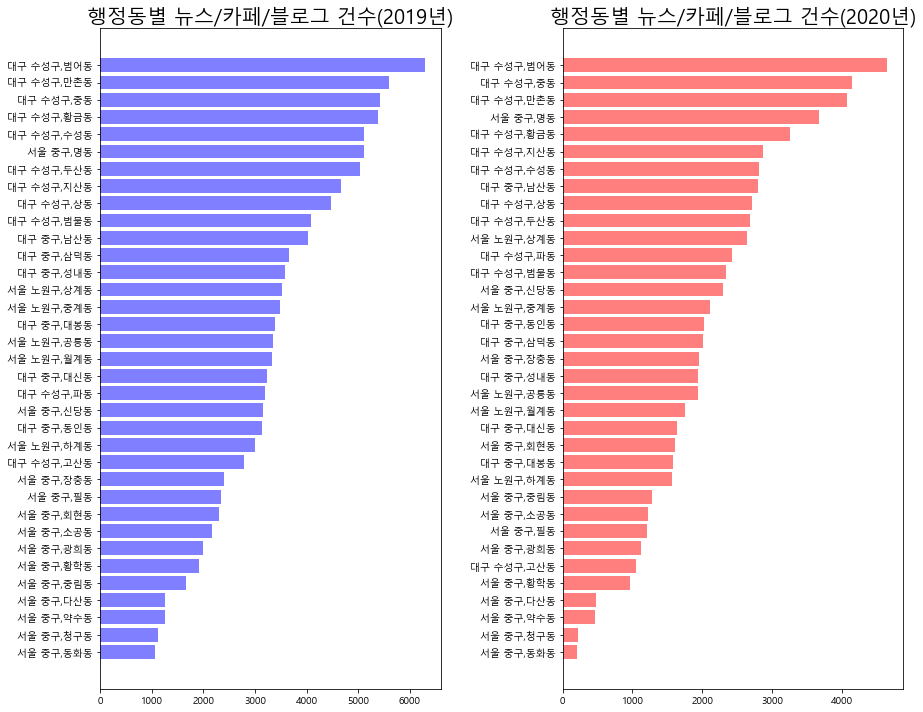

In [9]:
# 블로그+카페+뉴스 언급 행정동 순위 :: 전체적으로 건수는 감소
plt.figure(figsize=(13, 10))

plt.subplot(121)
g1 = df[df['CAT'].str.contains('CNT')].query('YEAR == 2019').groupby(['GU_DONG'])['CNT'].sum().sort_values(ascending=True)
label1 = list(g1.reset_index()['GU_DONG'])
index1 = np.arange(len(label1))
alpha = 0.5
p1 = plt.barh(index1, g1, color='b', alpha=alpha)
plt.title('행정동별 뉴스/카페/블로그 건수(2019년)', fontsize=20)
plt.yticks(index1, label1, fontsize=10)


plt.subplot(122)
g2 = df[df['CAT'].str.contains('CNT')].query('YEAR == 2020').groupby(['GU_DONG'])['CNT'].sum().sort_values(ascending=True)
label2 = list(g2.reset_index()['GU_DONG'])
index2 = np.arange(len(label2))
alpha = 0.5
p1 = plt.barh(index2, g2, color='r', alpha=alpha)
plt.title('행정동별 뉴스/카페/블로그 건수(2020년)', fontsize=20)
plt.yticks(index2, label2, fontsize=10)

plt.tight_layout()
plt.show()

코로나 이전과 이후 모두 대구의 언급량이 많음. 다만, 명동의 언급량이 코로나 이후 조금 더 많아졌음을 알 수 있음.

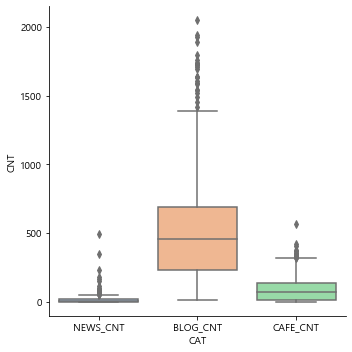

In [10]:
#블로그 언급이 압도적
import seaborn as sns
s = df[df['CAT'].str.contains('CNT')]
sns.factorplot(x='CAT', y='CNT', data=s, kind='box')

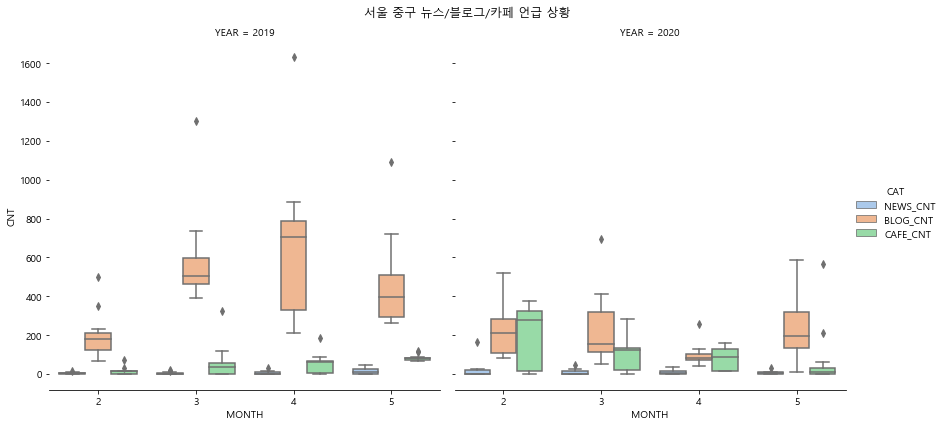

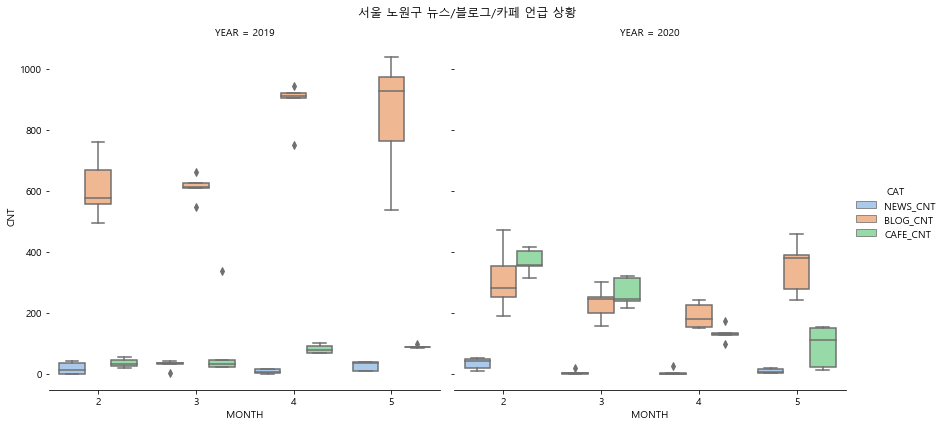

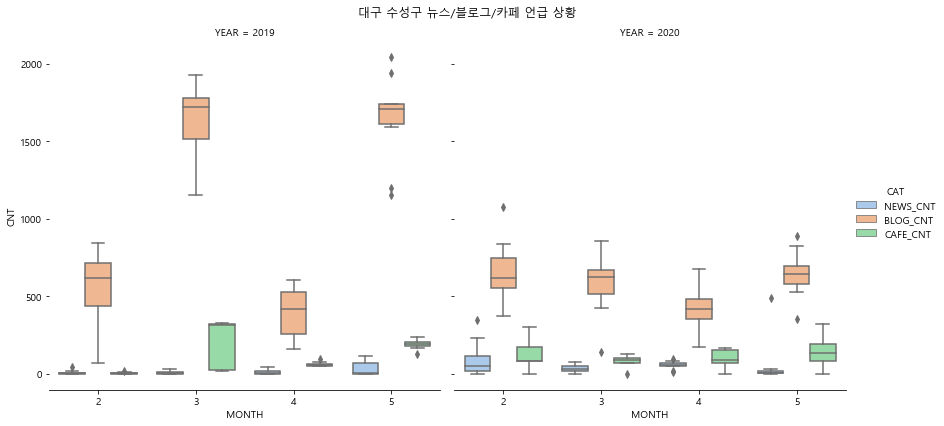

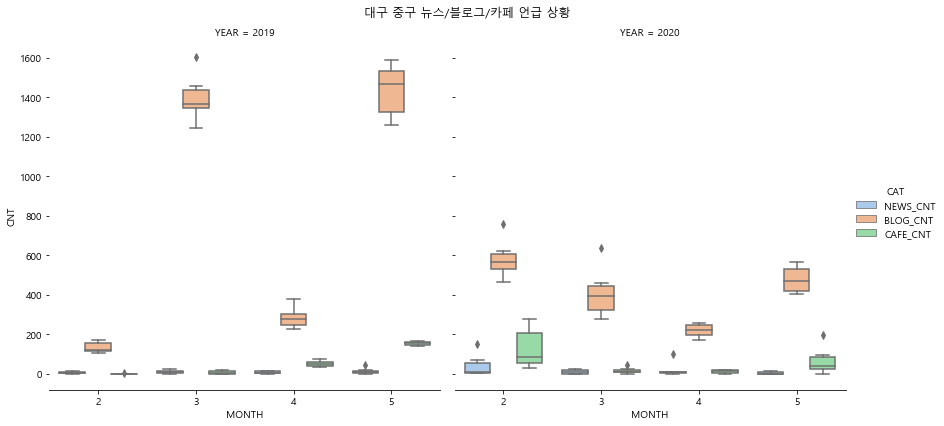

In [11]:
s = df[df['CAT'].str.contains('_CNT')]#.query('CAT != "BLOG_CNT"')
gd = s['GU_NM'].unique()

for d in gd:
    temp = s.loc[s['GU_NM']==d, :]
    j = sns.factorplot(data=temp, x='MONTH', y='CNT', size=6, kind='box', hue='CAT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 뉴스/블로그/카페 언급 상황')

- 코로나 이전에는 블로그를 제외한 뉴스와 카페의 언급량이 달마다 서로 비슷한 추이를 보임.
- 코로나가 국내에 감염되기 시작한 2월 경, 모든 구에서 코로나 이전보다 뉴스 건수가 일시적으로 증가.(편차도 커짐)
- 코로나 이후 2,3월에 대구에서 전년 대비 뉴스 건수가 늘었고(대구 신천지 사태로 인한 것으로 추정), 서울에서는 2~5월 동안 카페 건수가 전체적으로 늘었음
- 코로나 이후 5월 쯤에는 전년에 비해 모든 구에서 블로그 건수의 편차 감소.(건수도 감소 추세)

## 업종 긍정/부정 언급 횟수
- 서울과 대전의 인구 수의 차이에 따른 언급량의 차이의 우려가 있었으나, 아래 언급 빈도 탐색 결과 지역간 차이가 거의 없다고 판단되어 그대로 진행함
- 숙박(약 3000건)과 문화취미(약 10000건) 업종에서 명동의 언급이 압도적으로 많아, 전체 현황 시각화 때는 명동을 제거하고 진행

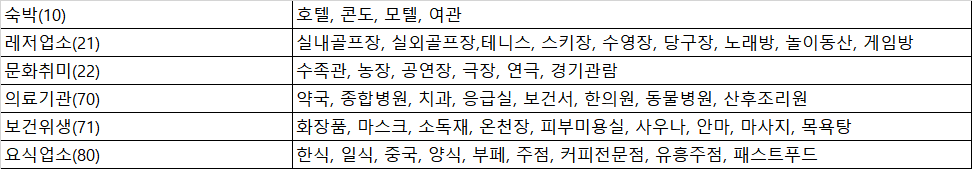

In [12]:
df0 = df.query('(GU_CD!=140) or (DONG_CD!=550)').reset_index(drop=True)

In [13]:
f = df[df['CAT'].str.contains('TIVE')]
f['UP'] = f['CAT'].str[:3]
d = f.groupby(['GU_NM','UP'])['CNT'].sum().reset_index()
f['SENTIMENT'] = f['CAT'].str[-8:-5]

### 전 지역

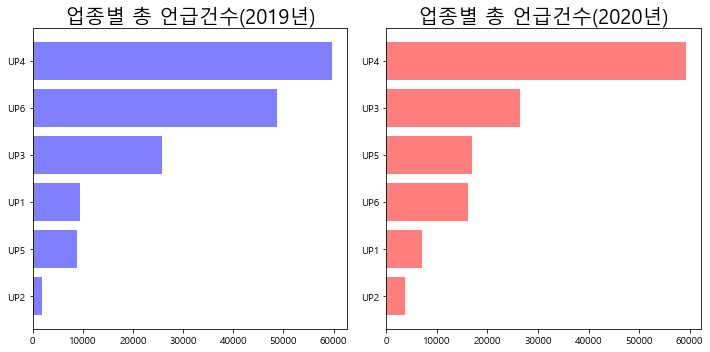

In [14]:
## 업종별 총 언급량
plt.figure(figsize=(10, 5))

plt.subplot(121)
g1 = f.query('YEAR == 2019').groupby(['UP'])['CNT'].sum().sort_values(ascending=True)
label1 = list(g1.reset_index()['UP'])
index1 = np.arange(len(label1))
alpha = 0.5
p1 = plt.barh(index1, g1, color='b', alpha=alpha)
plt.title('업종별 총 언급건수(2019년)', fontsize=20)
plt.yticks(index1, label1, fontsize=10)


plt.subplot(122)
g2 = f.query('YEAR == 2020').groupby(['UP'])['CNT'].sum().sort_values(ascending=True)
label2 = list(g2.reset_index()['UP'])
index2 = np.arange(len(label2))
alpha = 0.5
p1 = plt.barh(index2, g2, color='r', alpha=alpha)
plt.title('업종별 총 언급건수(2020년)', fontsize=20)
plt.yticks(index2, label2, fontsize=10)

plt.tight_layout()
plt.show()

=> 의료기관 언급량 부동의 1위, 코로나 이후 요식업소의 언급이 확연히 줄어든 반면 보건위생과 문화취미 업종의 언급이 증가

### 행정 구 별

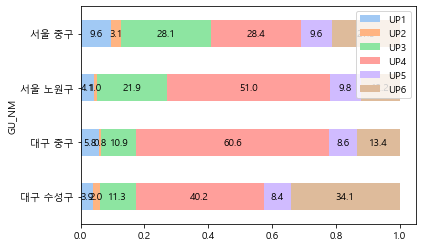

In [15]:
## 행정구별 업종 언급 현황
up_gu1 = pd.pivot_table(d,index='GU_NM',columns='UP',values='CNT')
total_up = df[df['CAT'].str.contains('TIVE')].groupby(['GU_NM'])['CNT'].sum()

for i in range(len(up_gu1.columns)):
    up_gu1.iloc[:,i] = up_gu1.iloc[:,i]/total_up
ax = up_gu1.plot.barh(stacked=True)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    

plt.legend(loc='upper right')
plt.show()

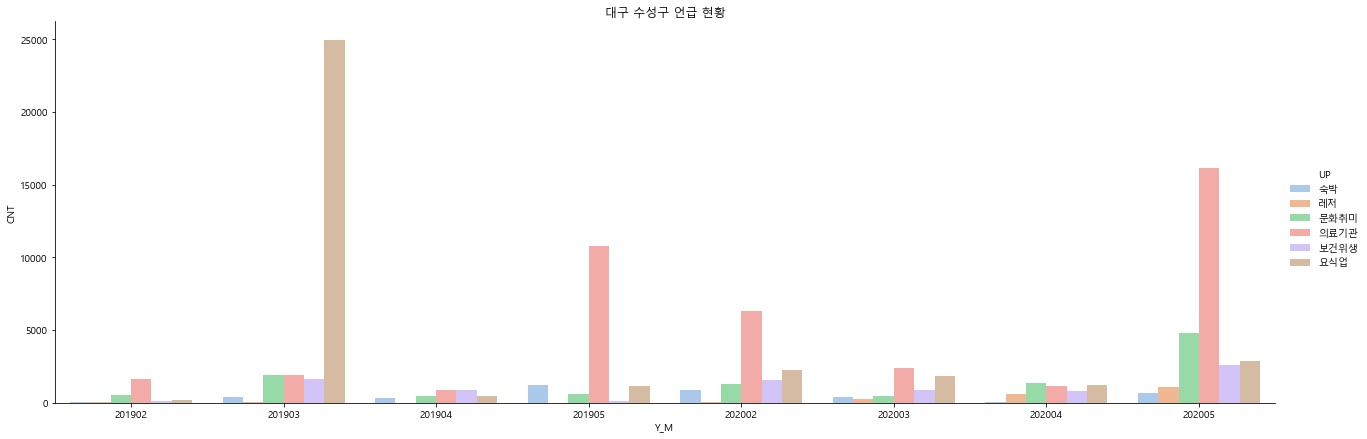

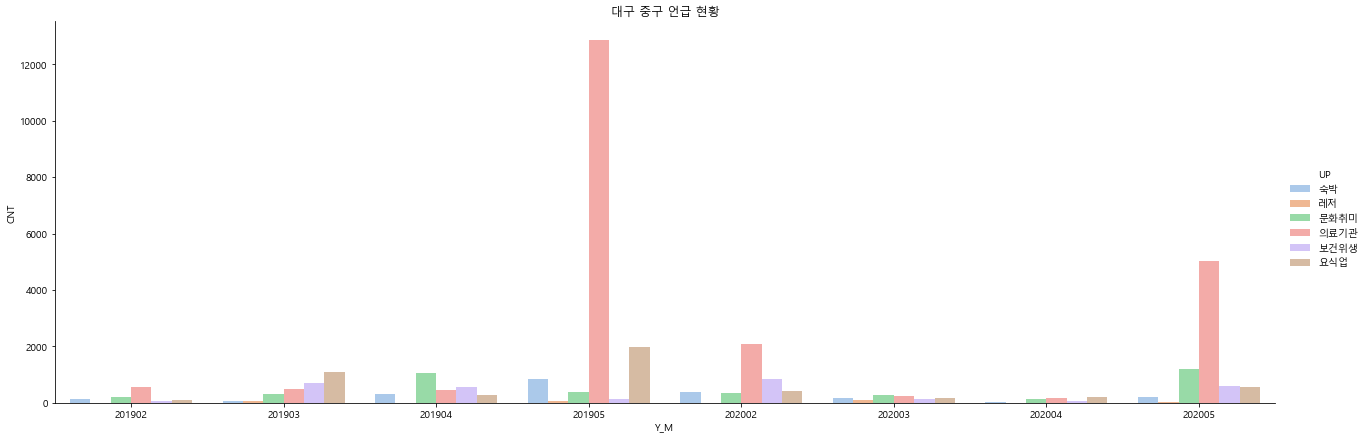

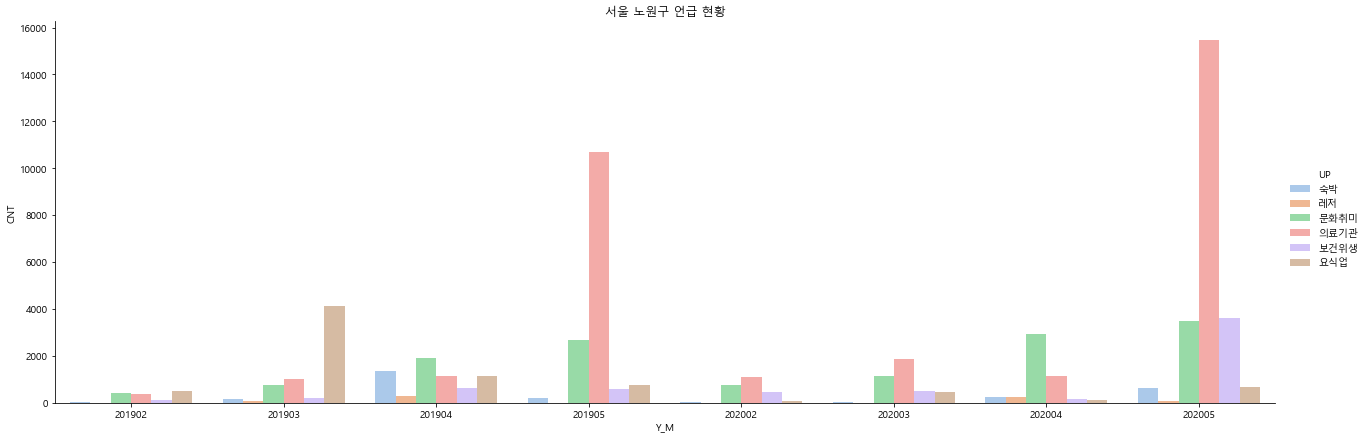

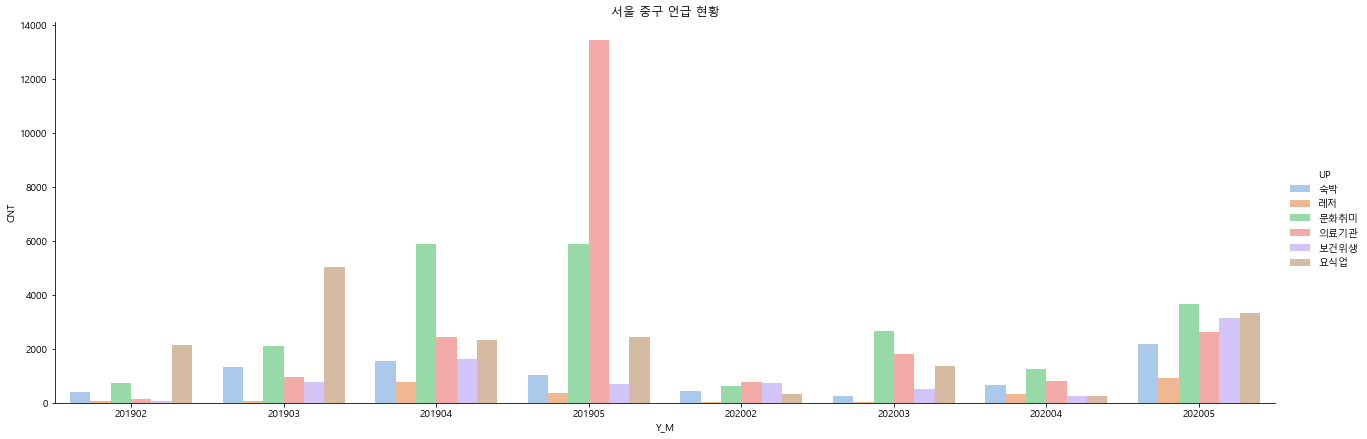

In [16]:
## 행정구 업종 별 언급 현황
e = f.groupby(['GU_NM','MONTH','YEAR','UP'])['CNT'].sum().reset_index()
e.loc[e['UP'] == 'UP1', 'UP'] = '숙박'
e.loc[e['UP'] == 'UP2', 'UP'] = '레저'
e.loc[e['UP'] == 'UP3', 'UP'] = '문화취미'
e.loc[e['UP'] == 'UP4', 'UP'] = '의료기관'
e.loc[e['UP'] == 'UP5', 'UP'] = '보건위생'
e.loc[e['UP'] == 'UP6', 'UP'] = '요식업'

gu = e['GU_NM'].unique()

for i in gu:
    temp = e.loc[e['GU_NM']==i, :]
    temp['Y_M'] = temp['YEAR'].apply(lambda x:str(x)+'0')+temp['MONTH'].apply(lambda x:str(x))
    sns.catplot(data=temp, x='Y_M', y='CNT', size=6, aspect=3, kind='bar', hue='UP')
    plt.title(i + ' 언급 현황')

- 대구 수성구 : 코로나 이전 2019년 3월에 요식업 언급 증가, 코로나 이후에는 2020년 5월 전년 동월 대비 의료기관 언급이 더 많음
- 대구 중구 : 코로나 직후 의료기관 언급량이 전년 동월 대비 증가, 하지만 코로나 이후 5월 의료기관 언급량은 전년 동월에 비해 감소
- 서울 노원구 : 대구 수성구와 같이 2020년 5월에 전년 동월 대비 의료기관 언급 증가. 코로나 이전과 비교해 요식업종은 언급이 감소한 반면 문화취미 언급은 증가
- 서울 중구 : 2019년 3~5월 문화취미 언급 점차 증가, 2020년은 4월에 감소했다가 다시 증가. 2020년 5월은 전월 대비 모든 업종 언급 증가(긴급재난지원금 소비 활성화로 추정)



<br>**2020년 5월 정부 긴급재난지원금 지급으로, 코로나 이후 다른 월에 비해 5월 모든 업종에 대해 언급량 증가한 것으로 추정**
<br>
- 의료기관 : **대체로 5월에 두드러진 의료기관 언급** => 코로나 이후 긴급재난지원금으로 인해 같은 해 다른 월에 비해 의료기관 소비 증가, 하지만 대구 중구의 코로나 이전 2019년 5월은 왜?
- 문화취미 : 전년도와 비슷한 언급 수준. **코로나 이후 서울 중구를 제외한 지역의 문화취미 언급 꾸준한 증가 추세** => 서울 중구에 주로 많은 대형 문화시설의 방문을 아직 꺼리는 것으로 해석
- 보건위생 : **대구에서 2월 의료기관, 보건위생 반짝 증가** => 대구에서 코로나가 유행한 시기인 2월 한달간 의료기관과 보건위생 업종의 언급이 많았음. 전년 동월 대비 많아졌지만, 2020년 3월이 되자마자 바로 감소. 서울은 대구에 비해 전년 동월 대비 아주 미미한 증가.
- 요식업 : **대구 수성구 제외 지역 전년 동기간 대비 대체로 언급량 감소** (특이값 : 2019년 3월 대구 수성구)
- 숙박 : 전년과 언급 양상이 비슷함. 여름에 가까워질수록 증가 추세.
- 레저 : 서울 중구에서는 코로나 이후 꾸준히 언급이 증가하지만 다른 지역에서는 언급이 미미함.

### 행정동 별

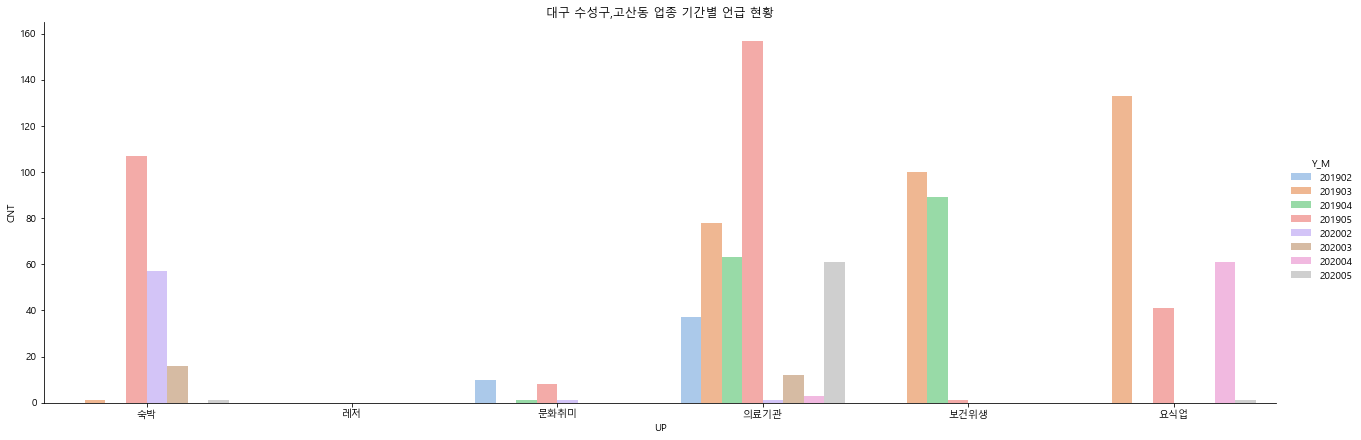

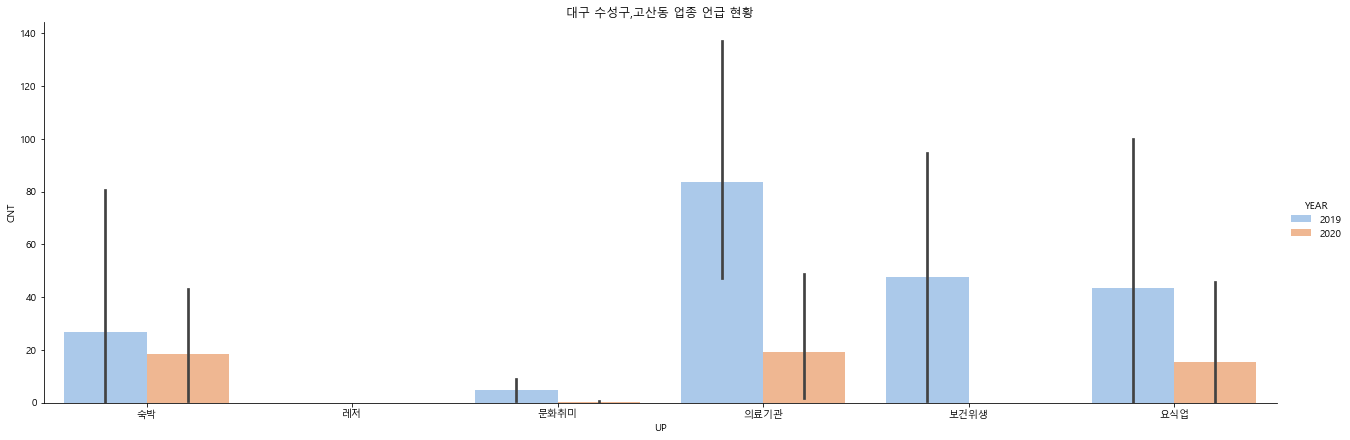

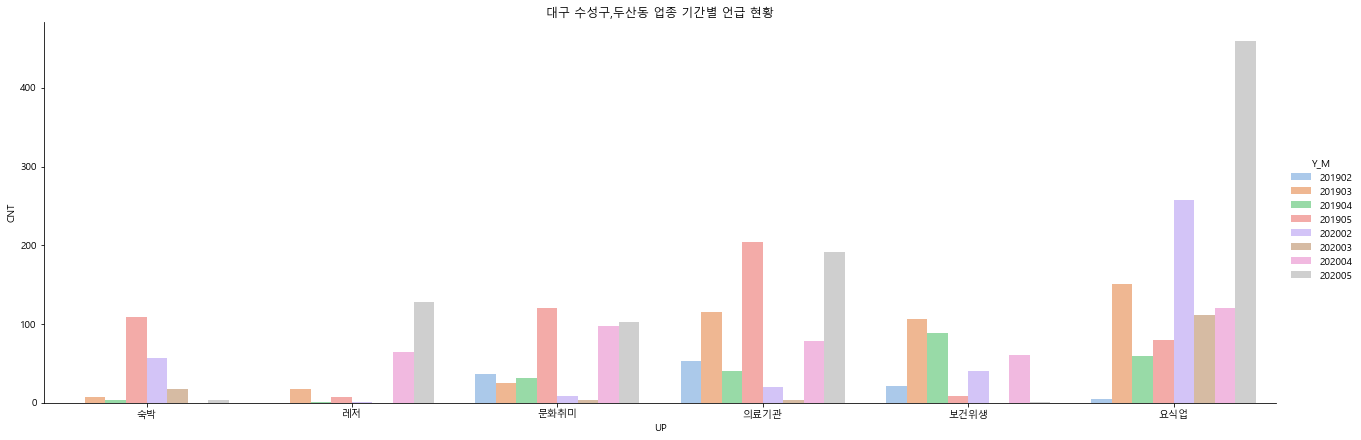

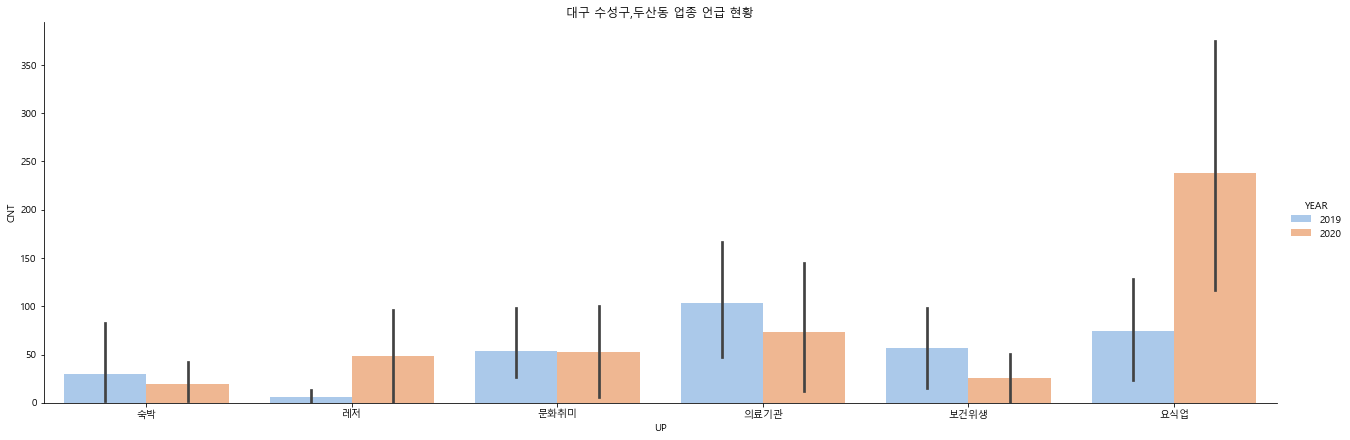

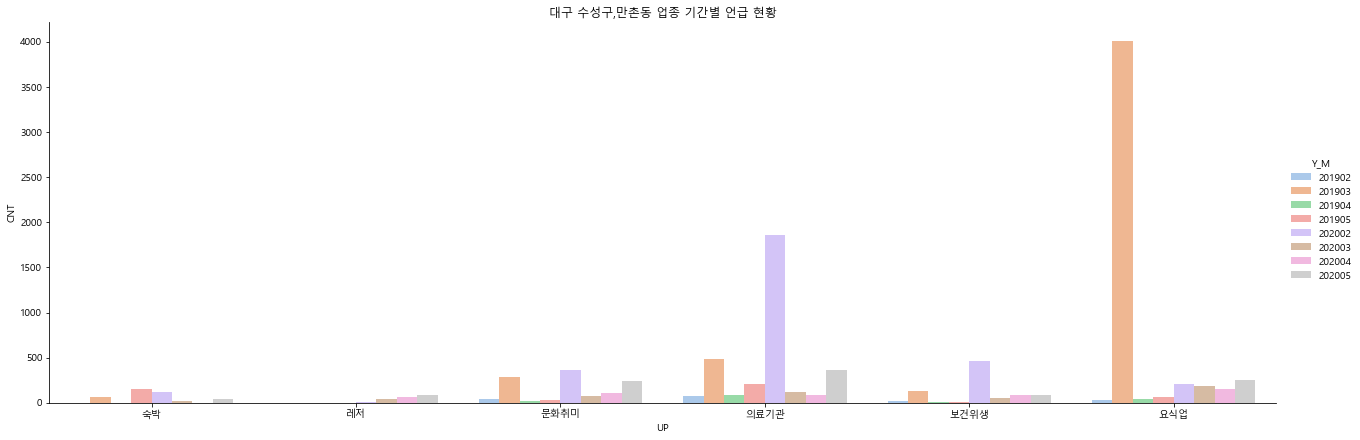

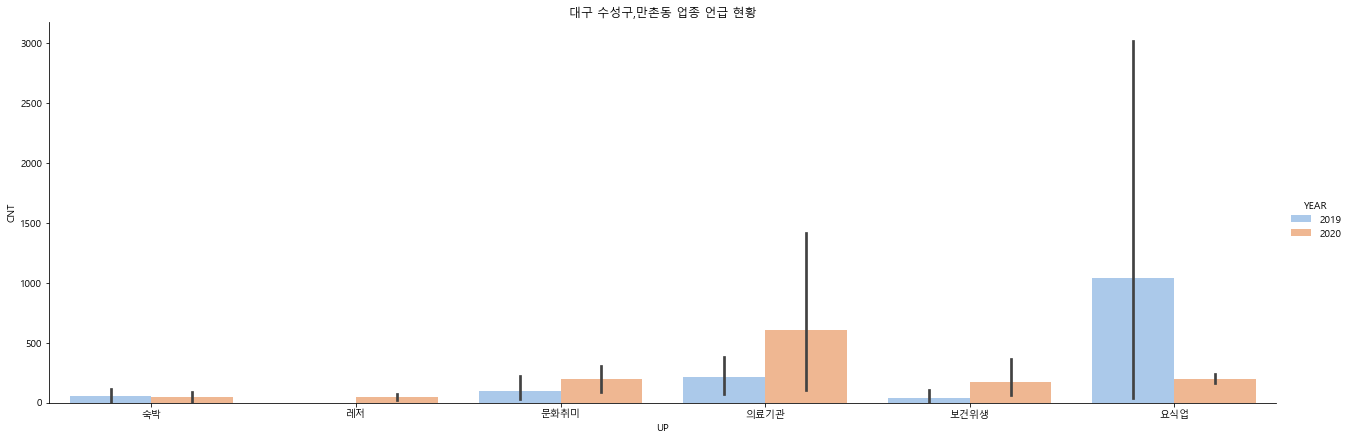

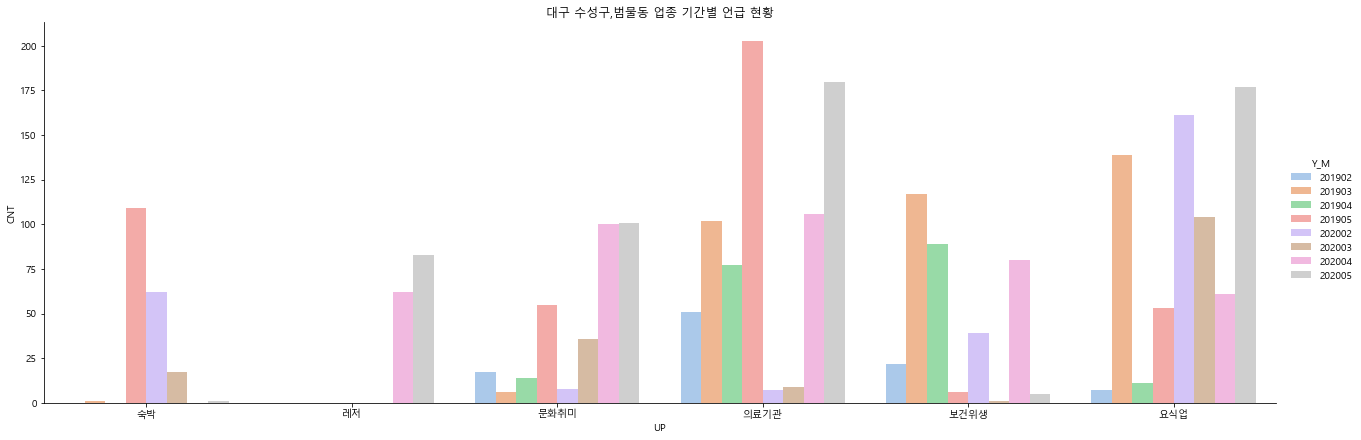

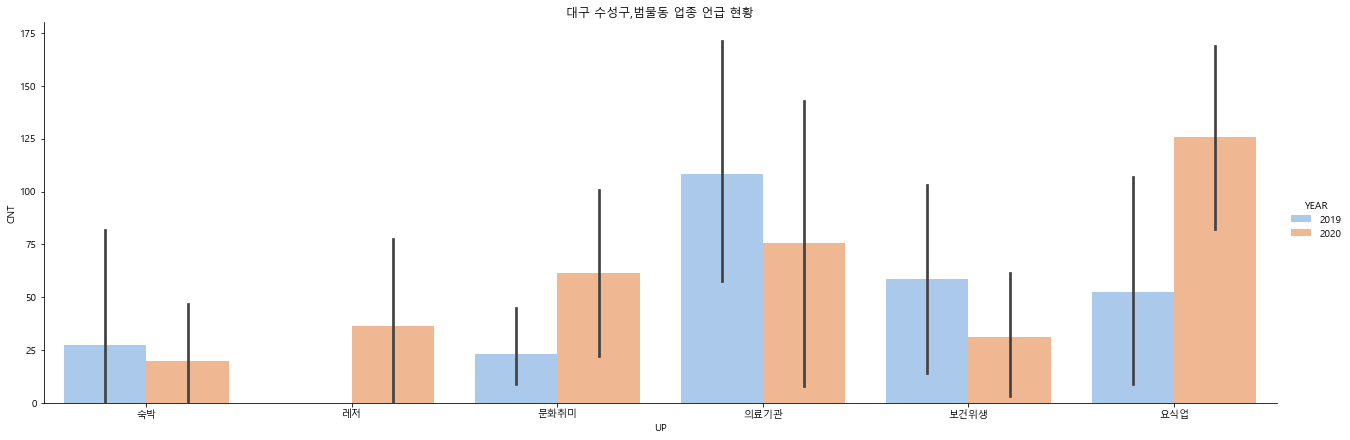

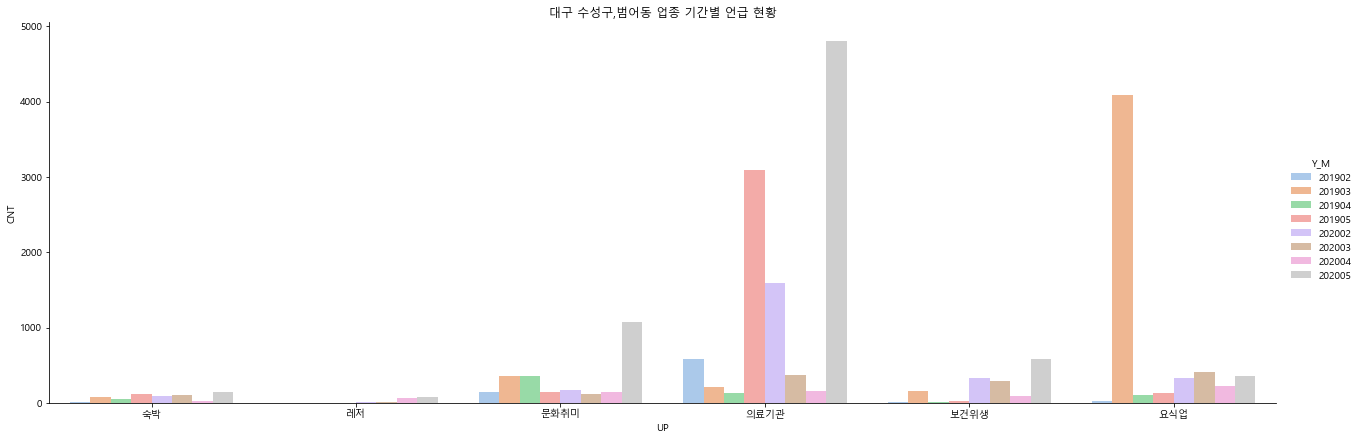

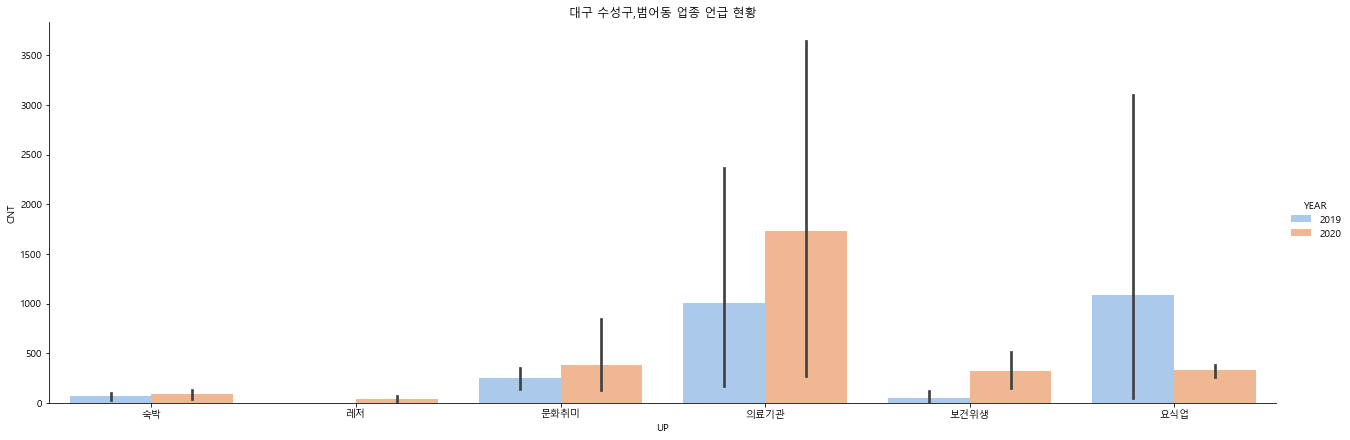

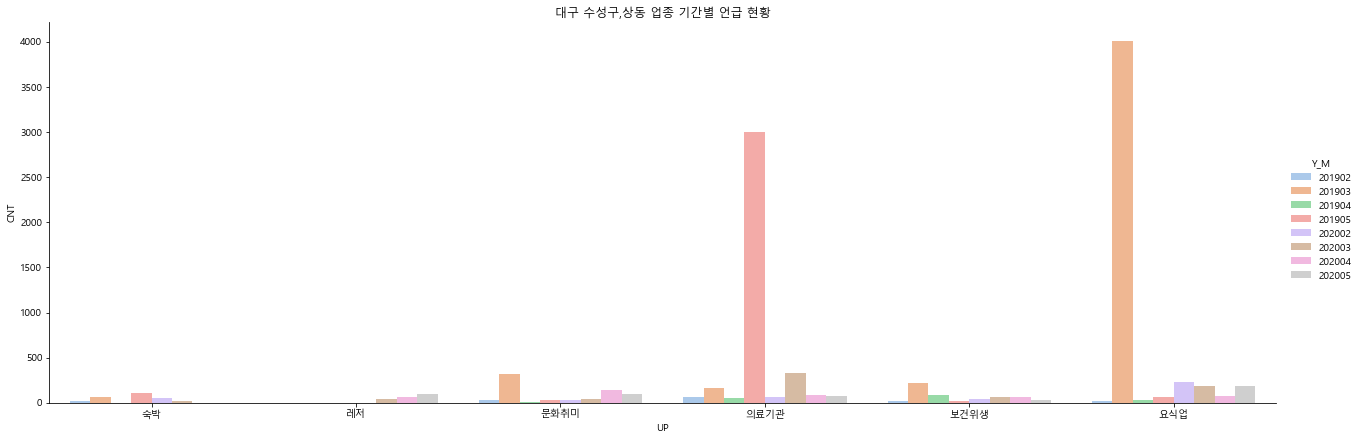

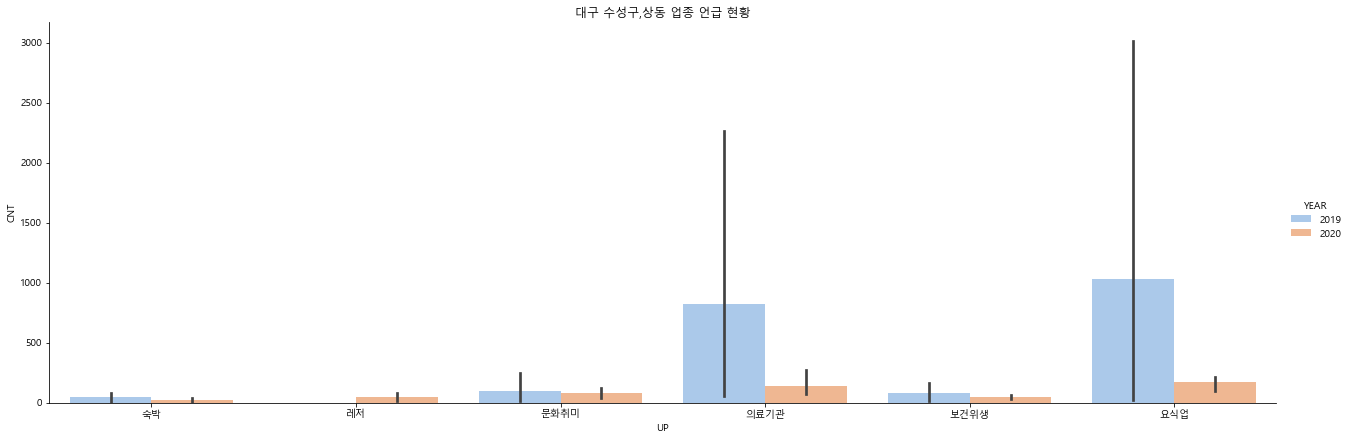

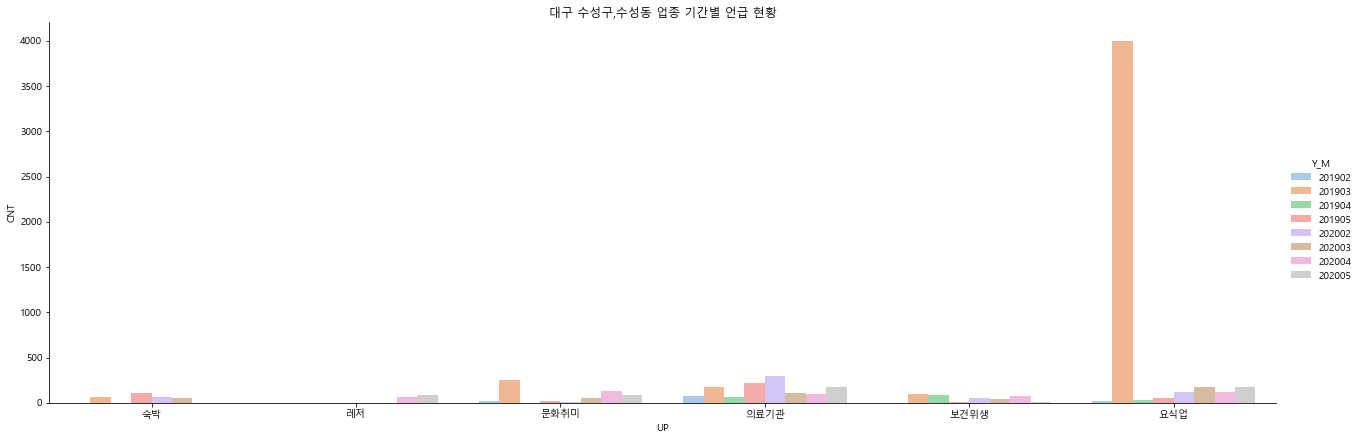

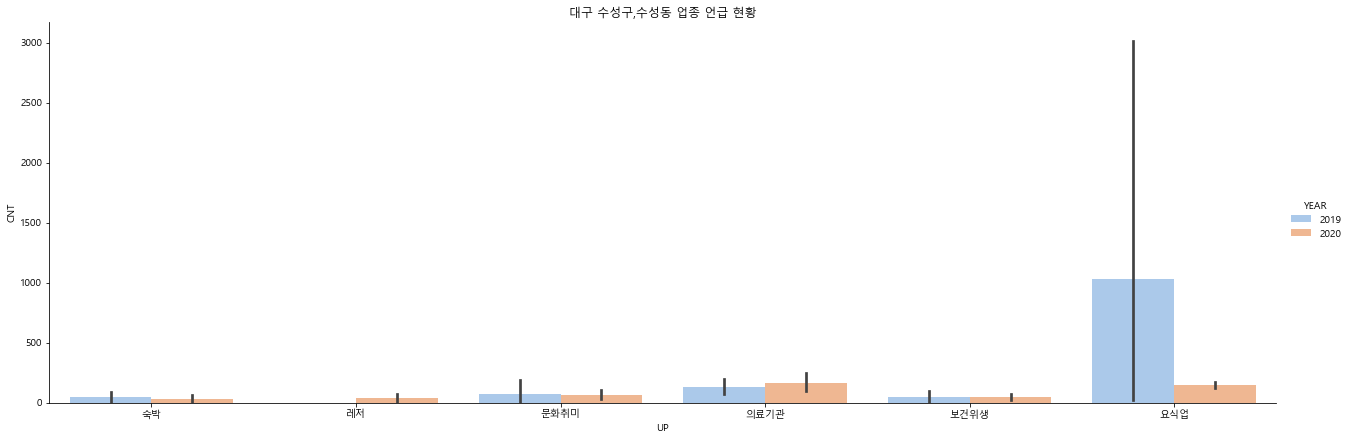

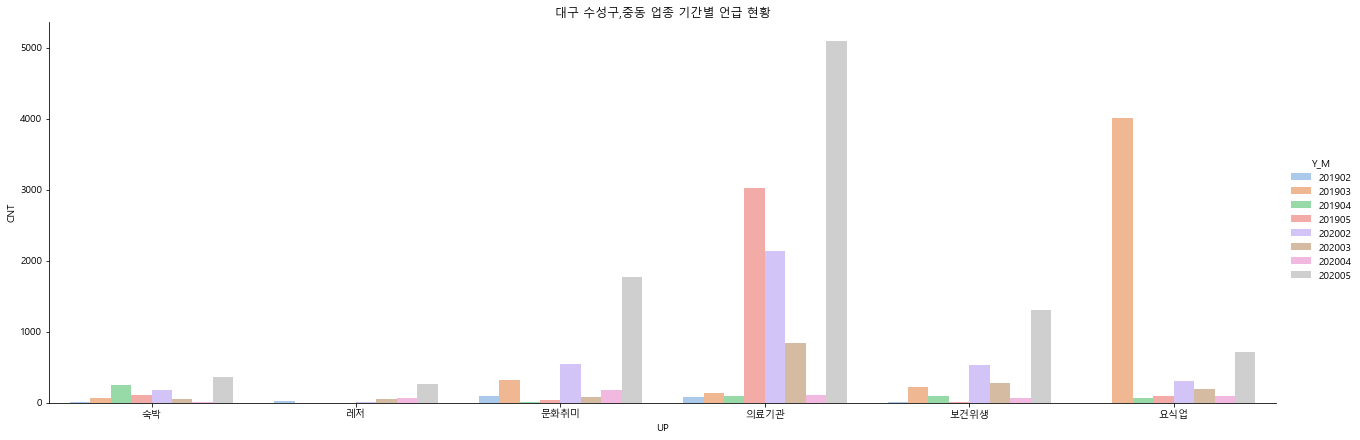

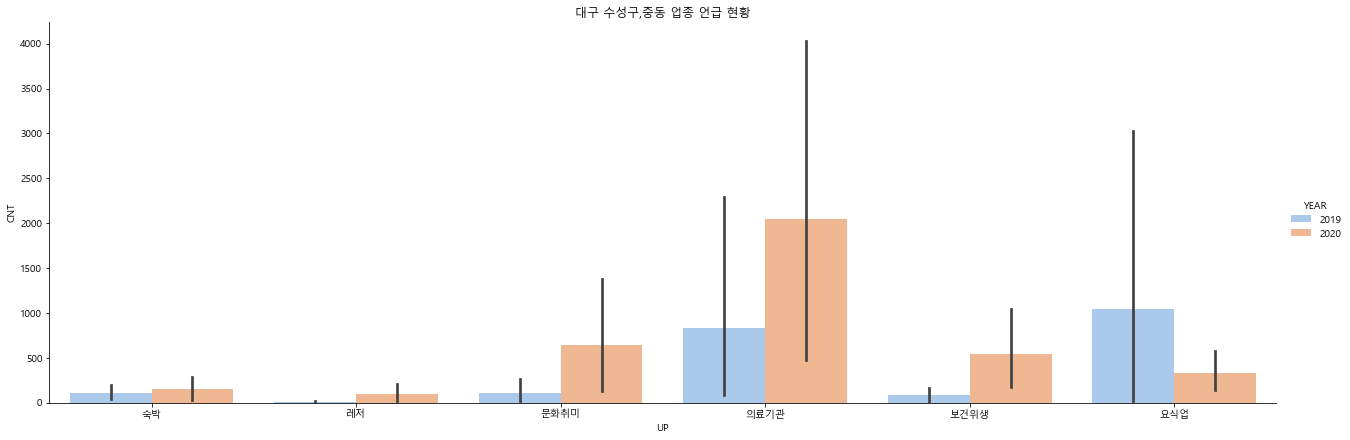

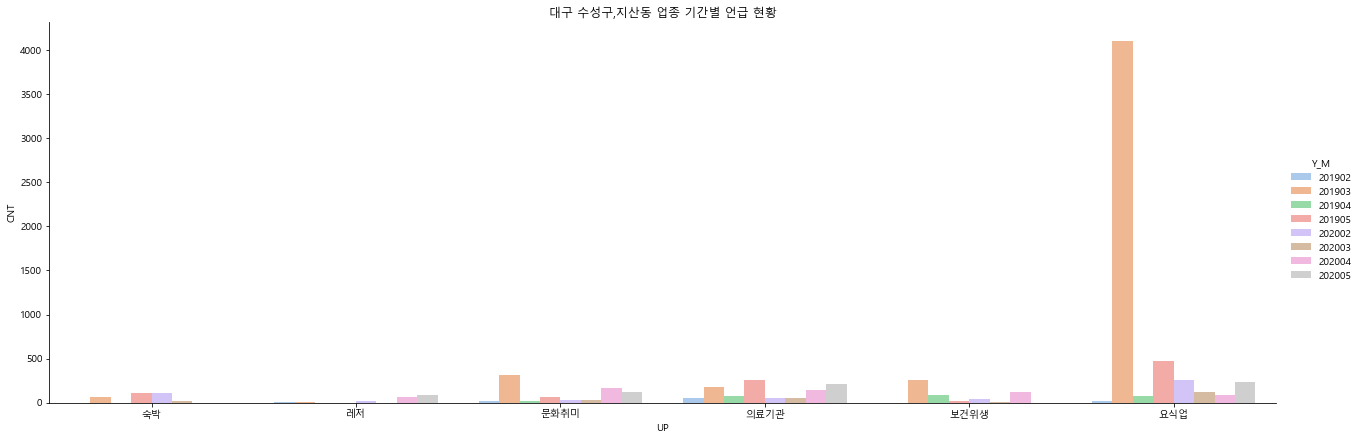

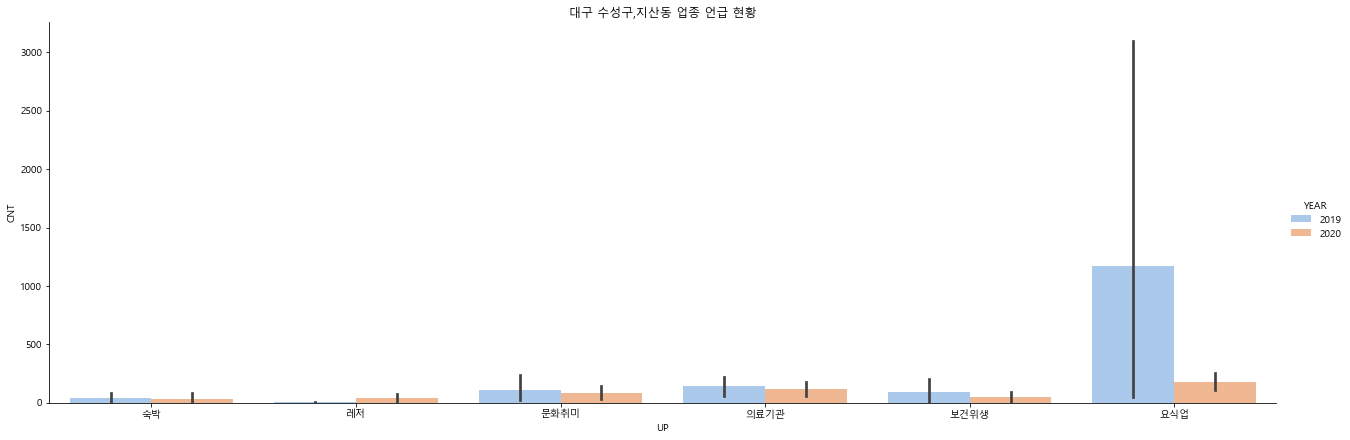

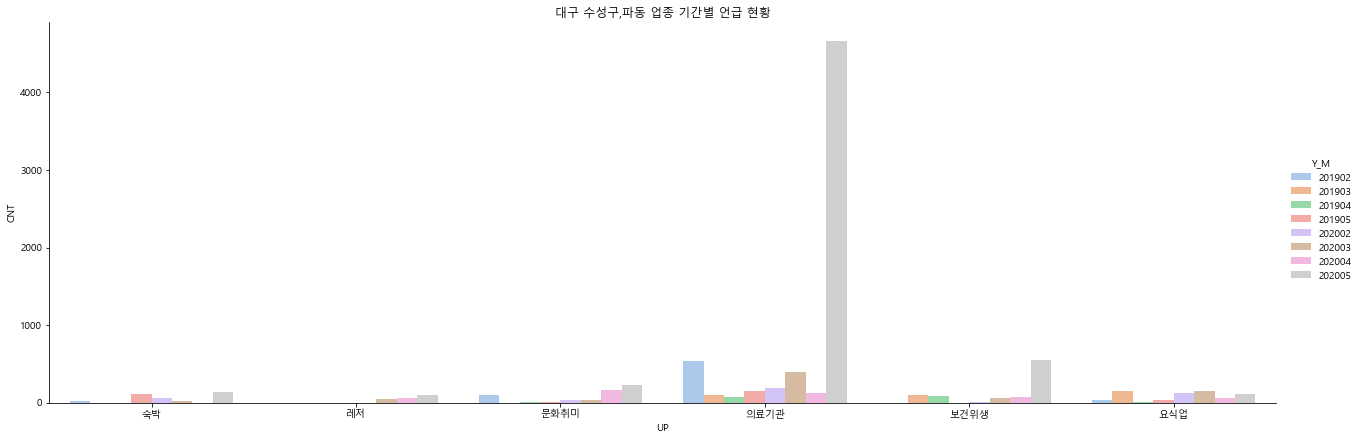

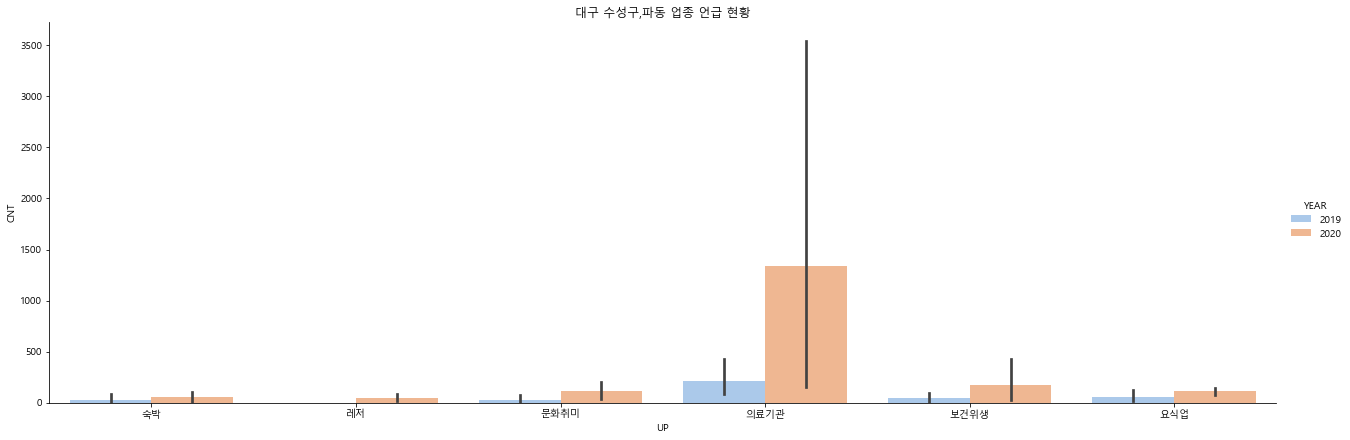

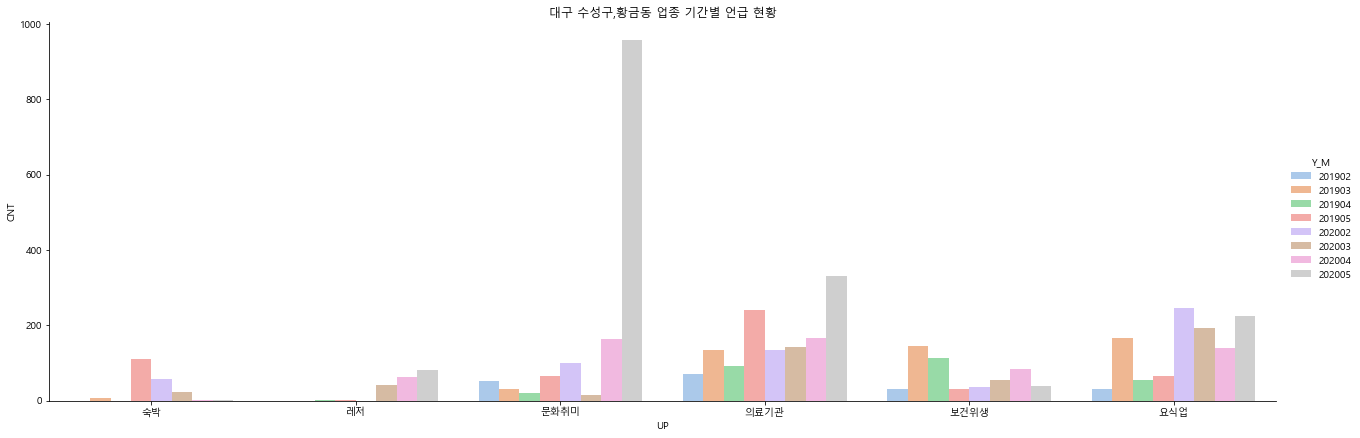

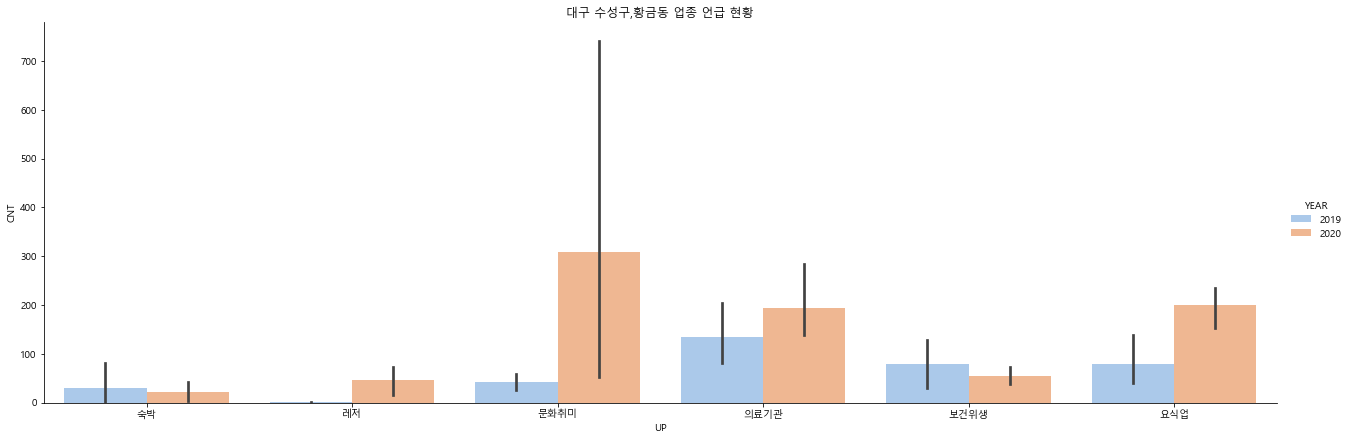

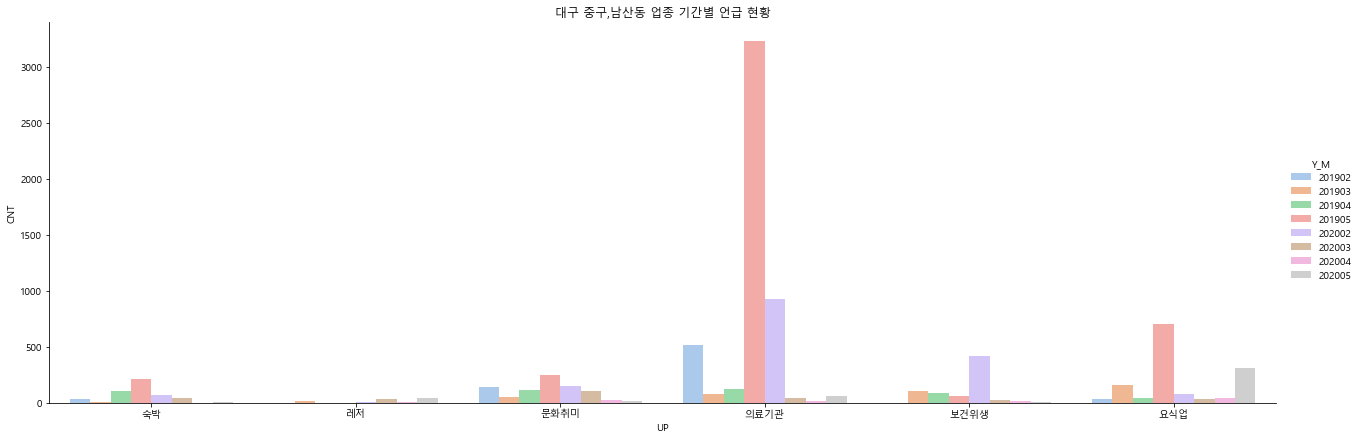

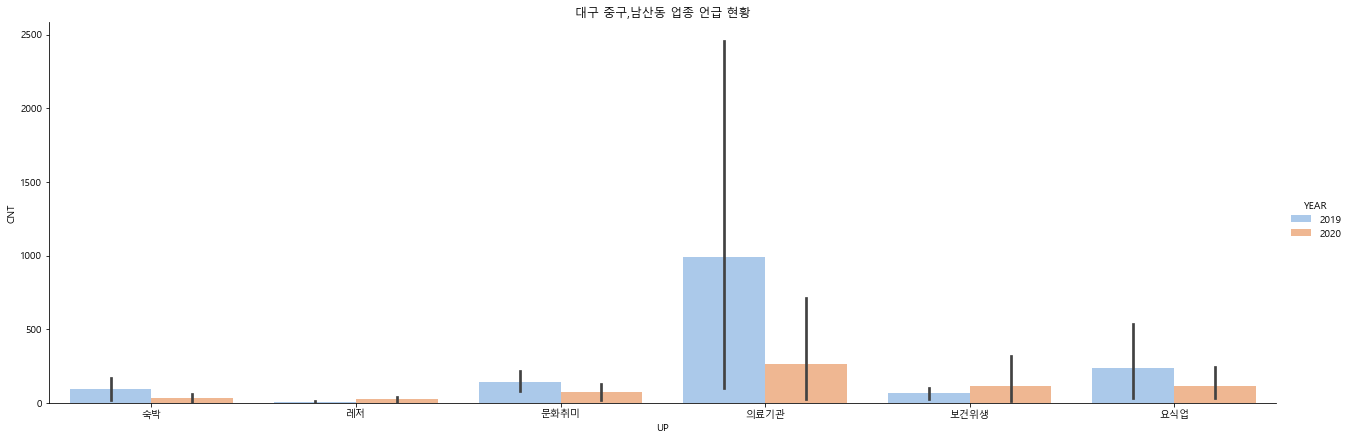

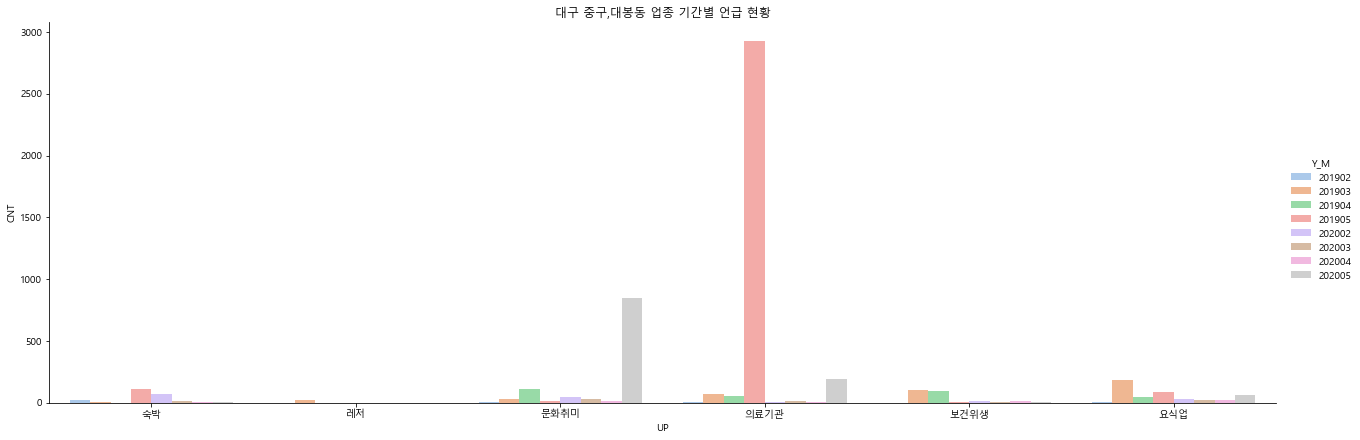

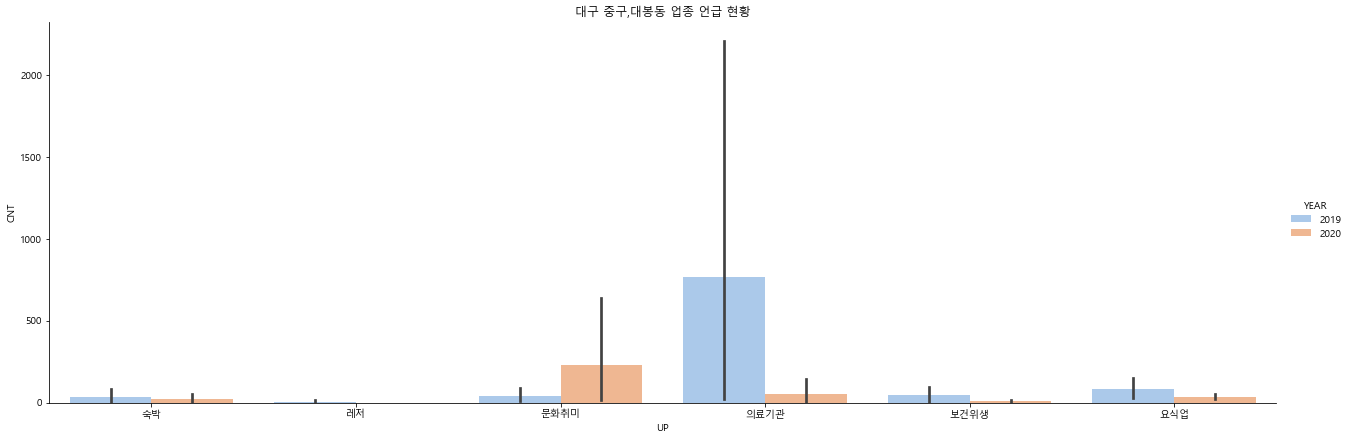

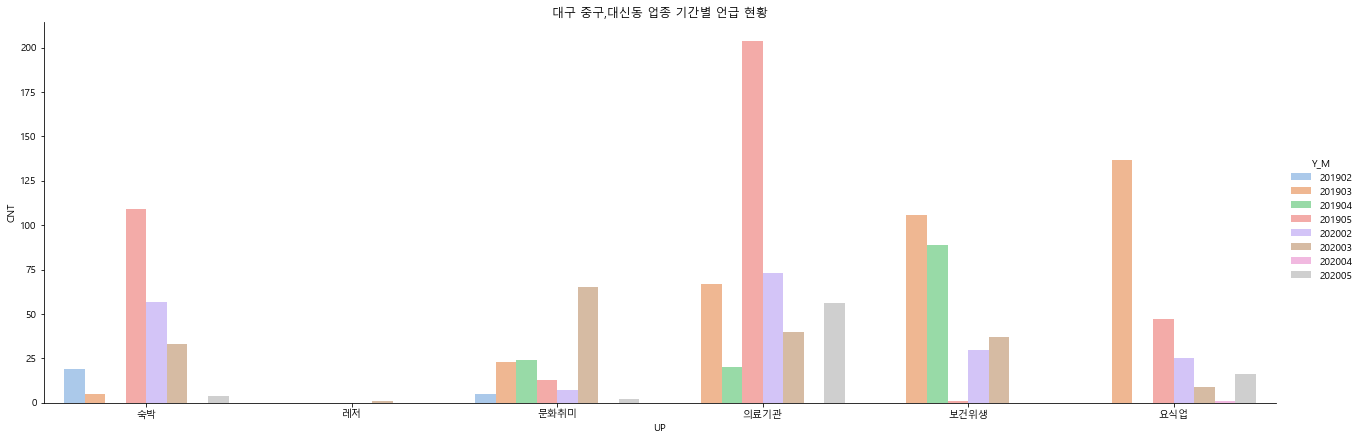

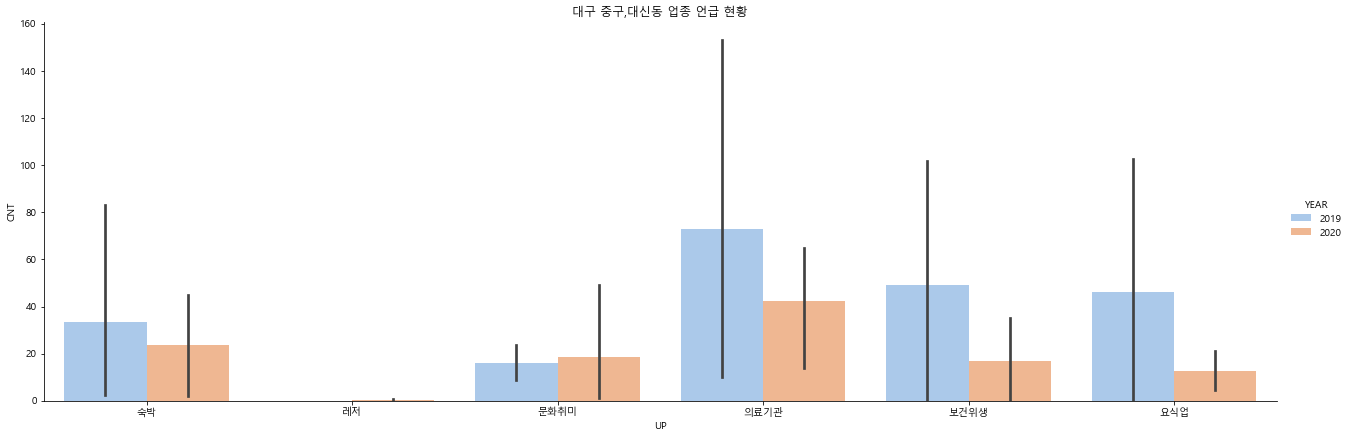

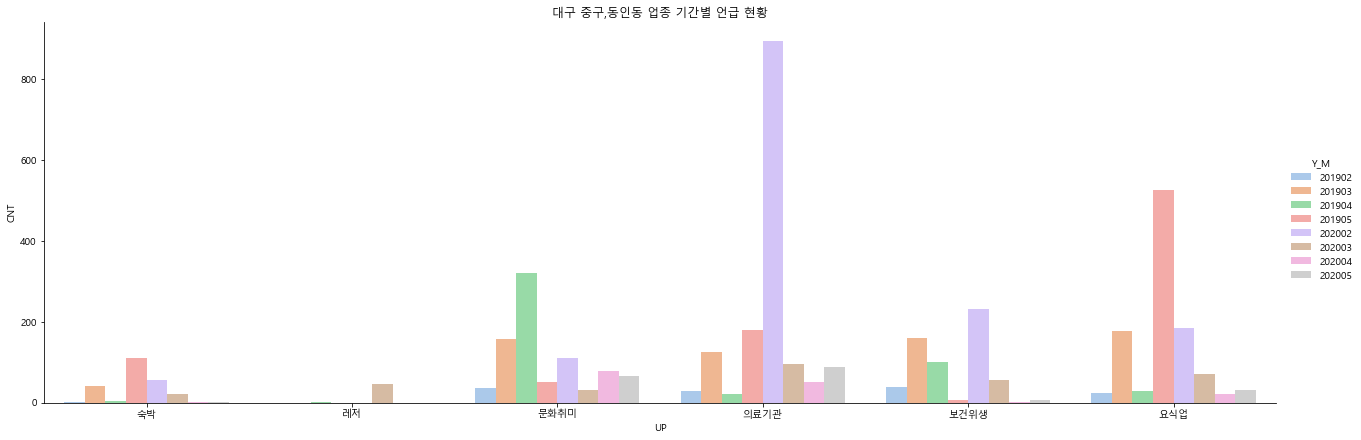

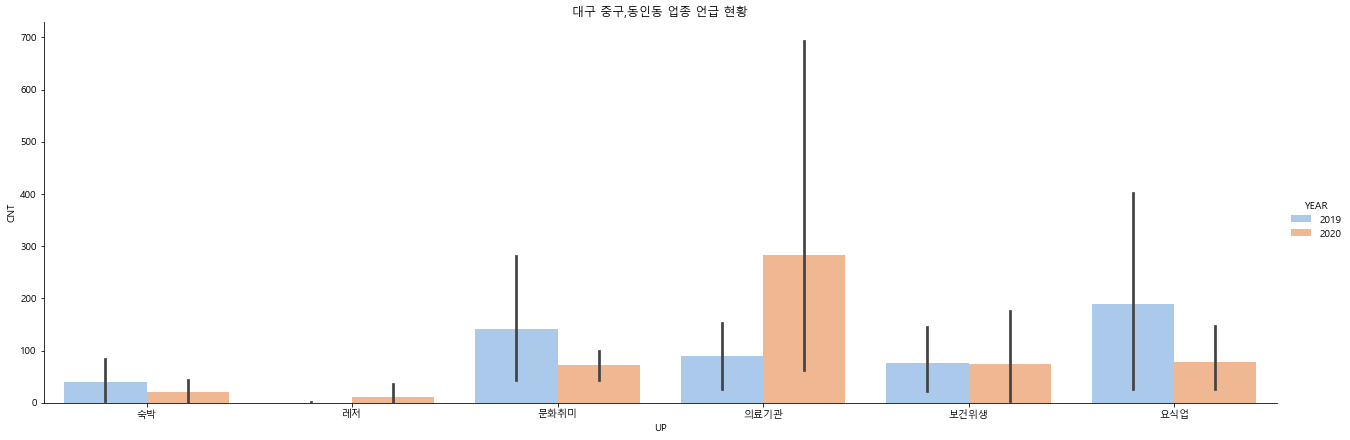

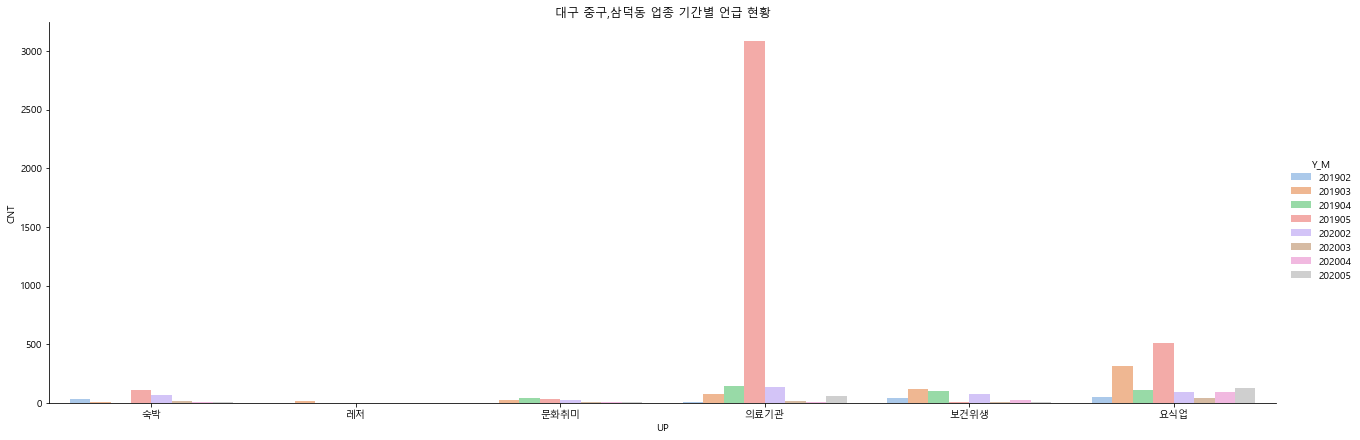

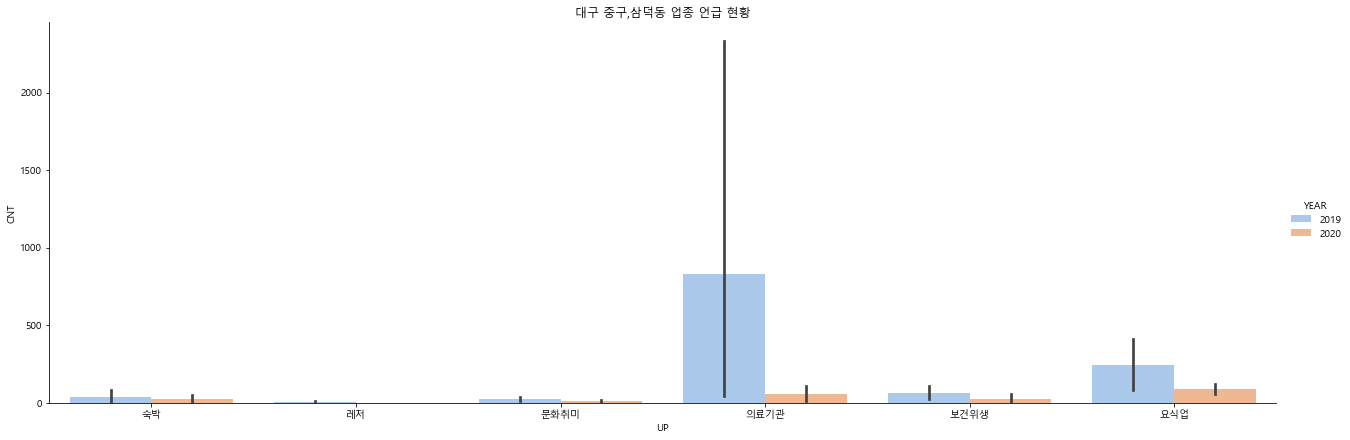

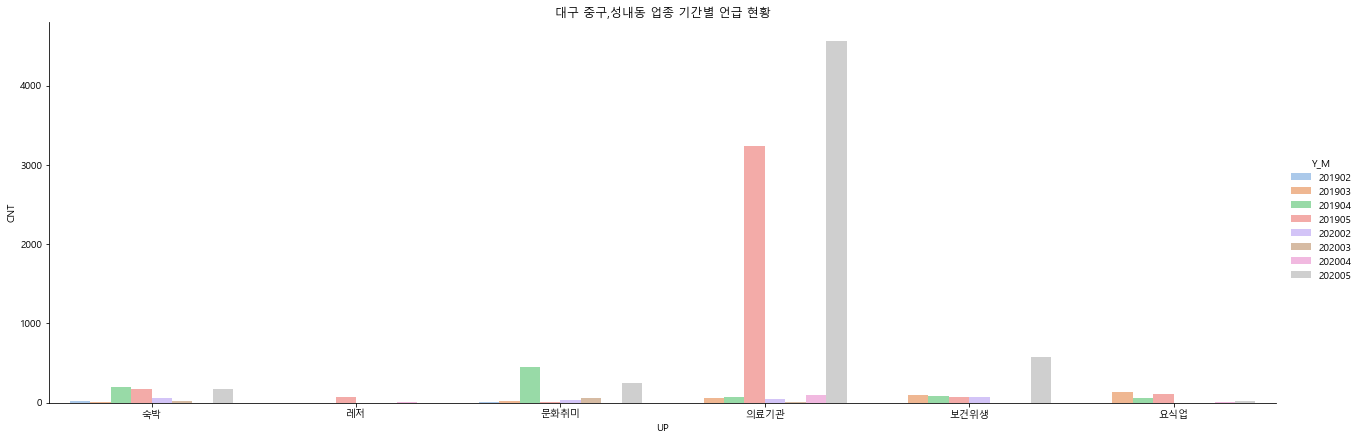

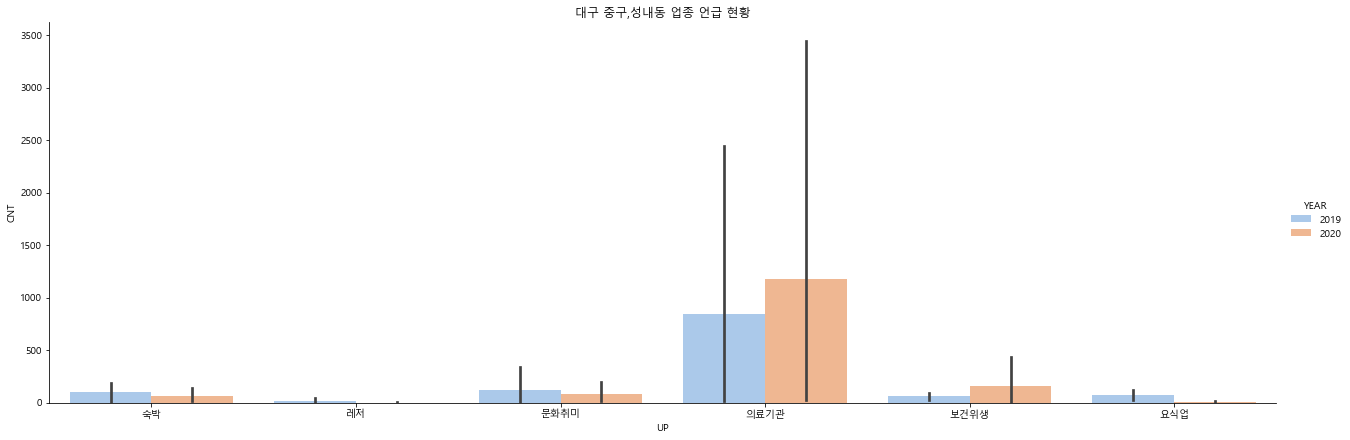

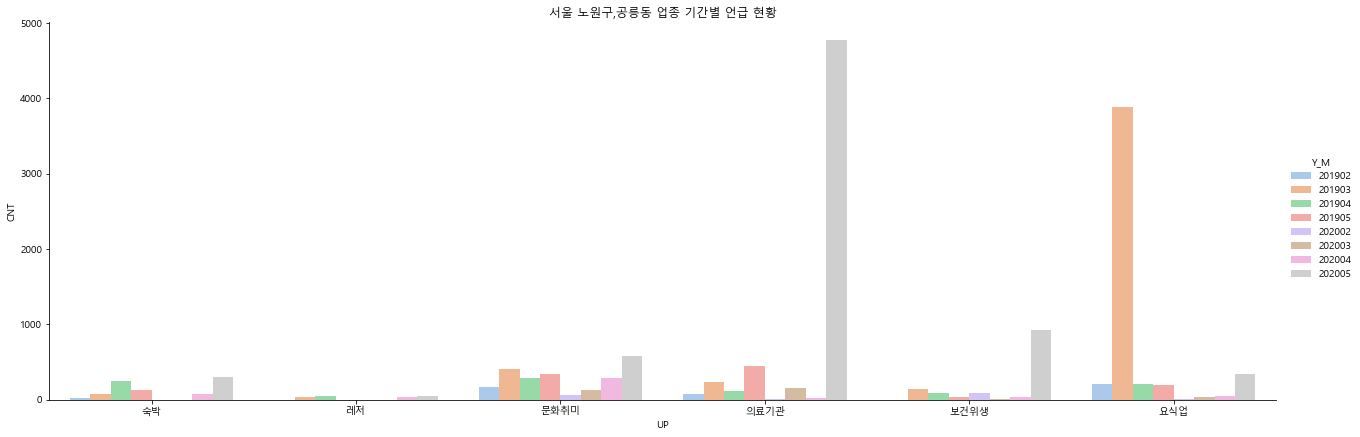

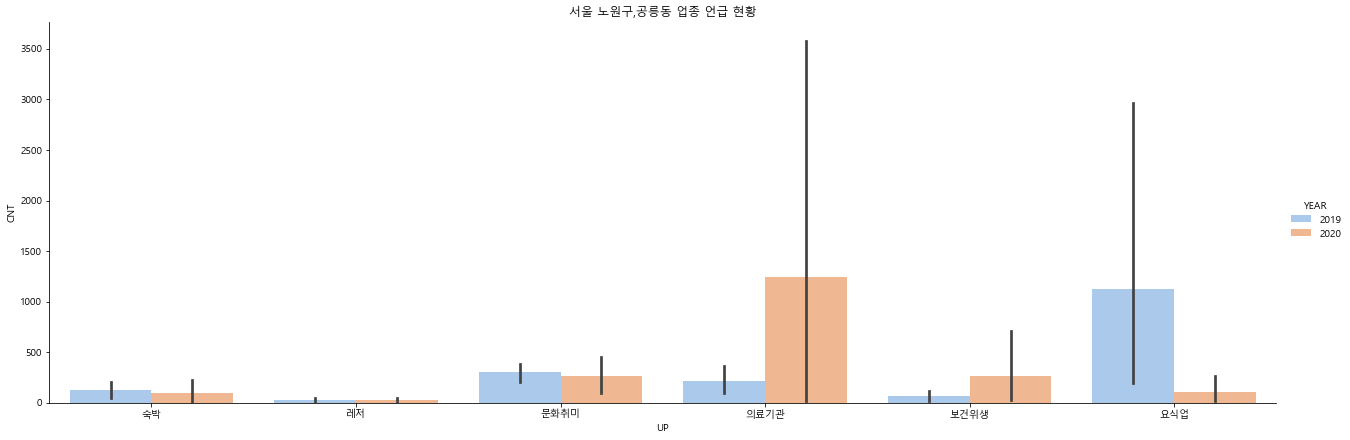

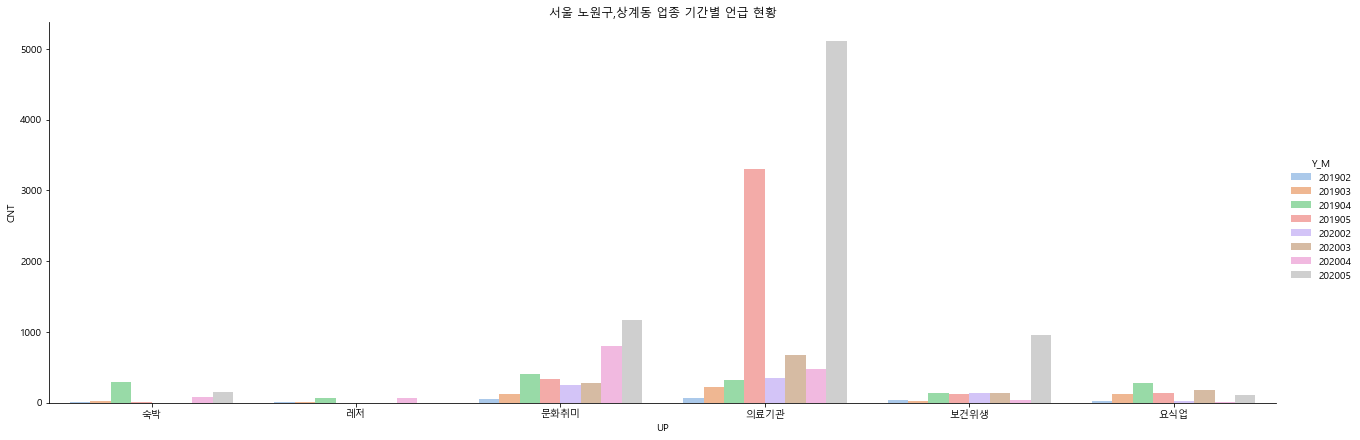

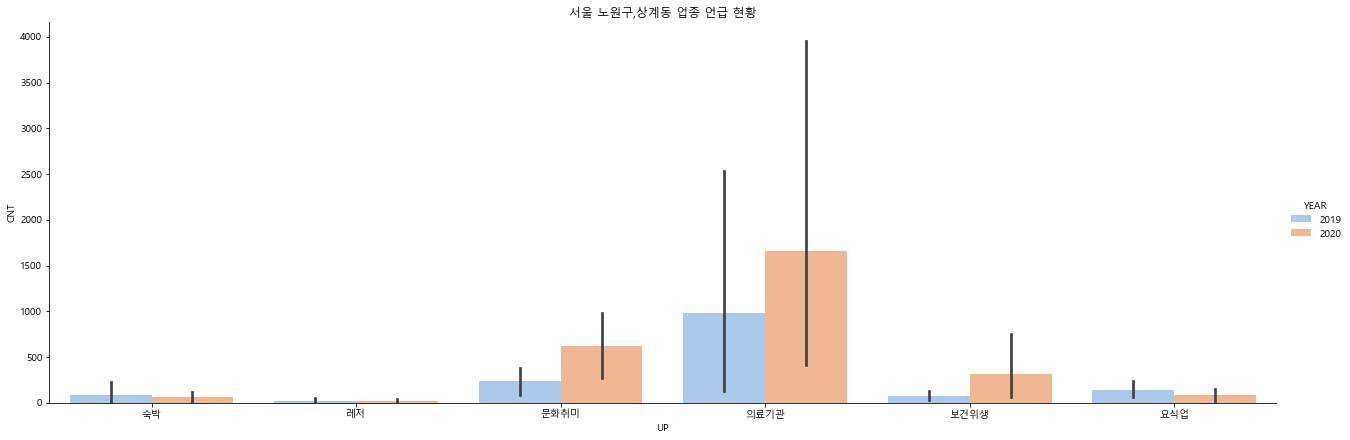

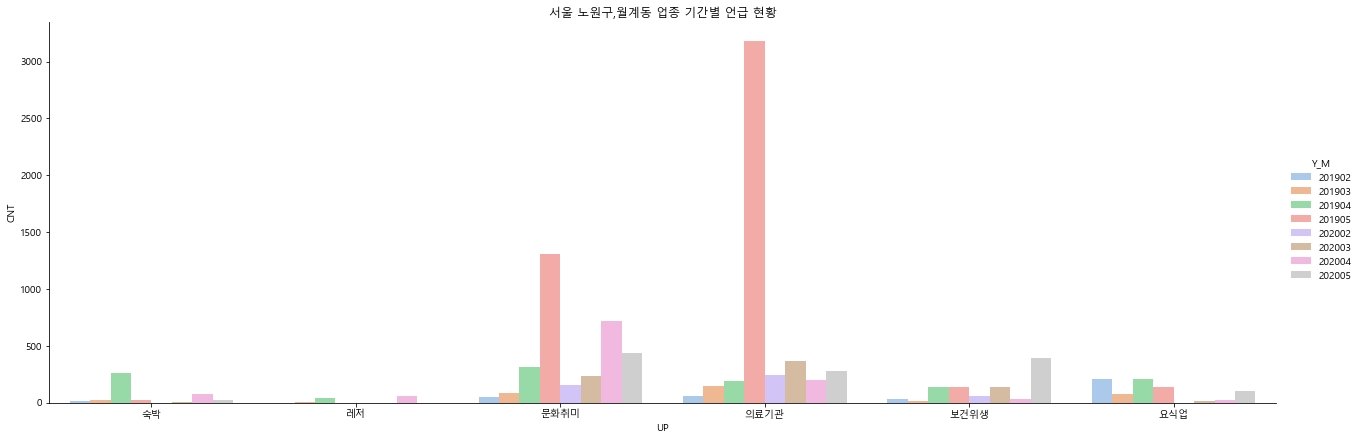

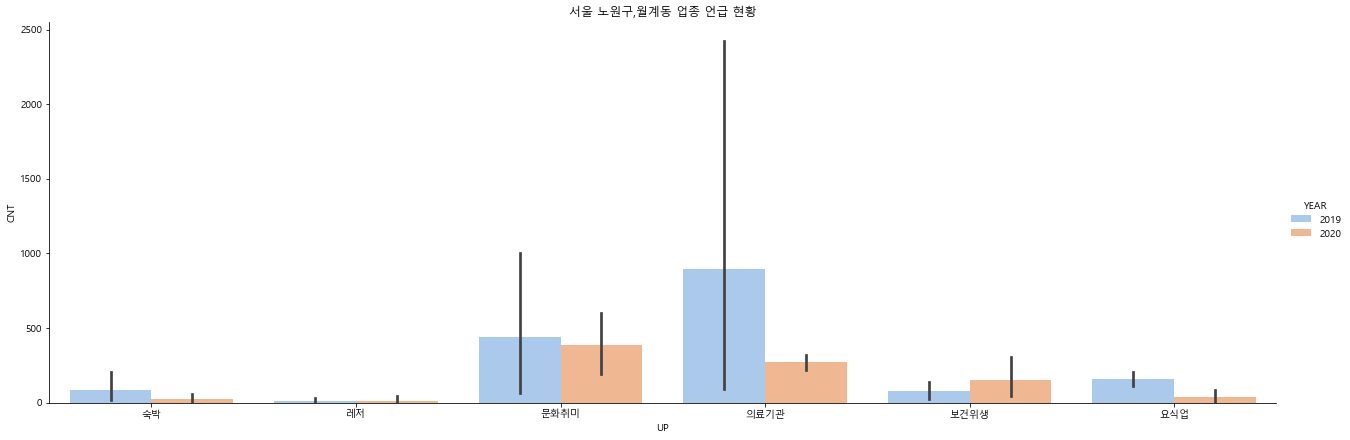

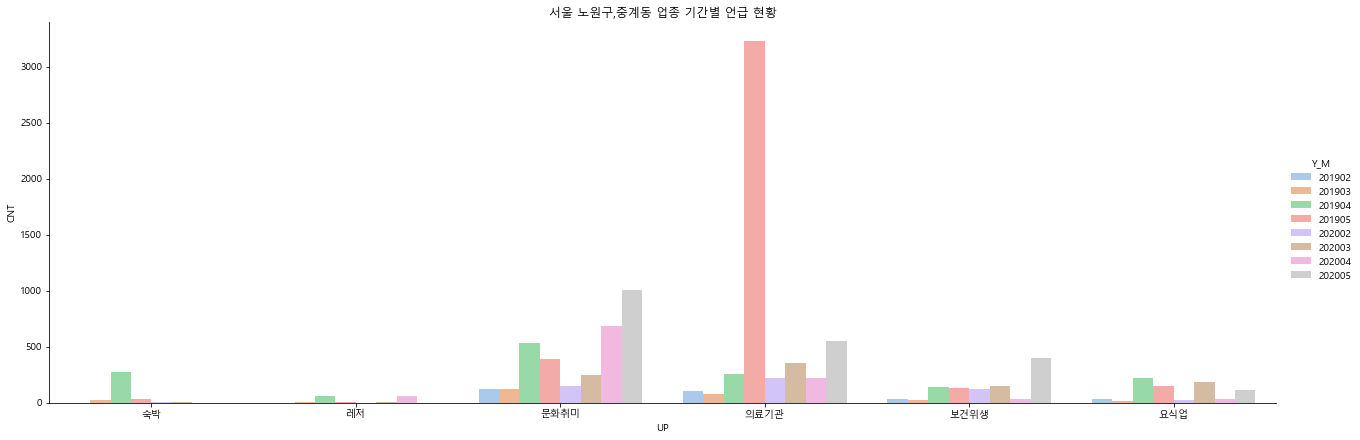

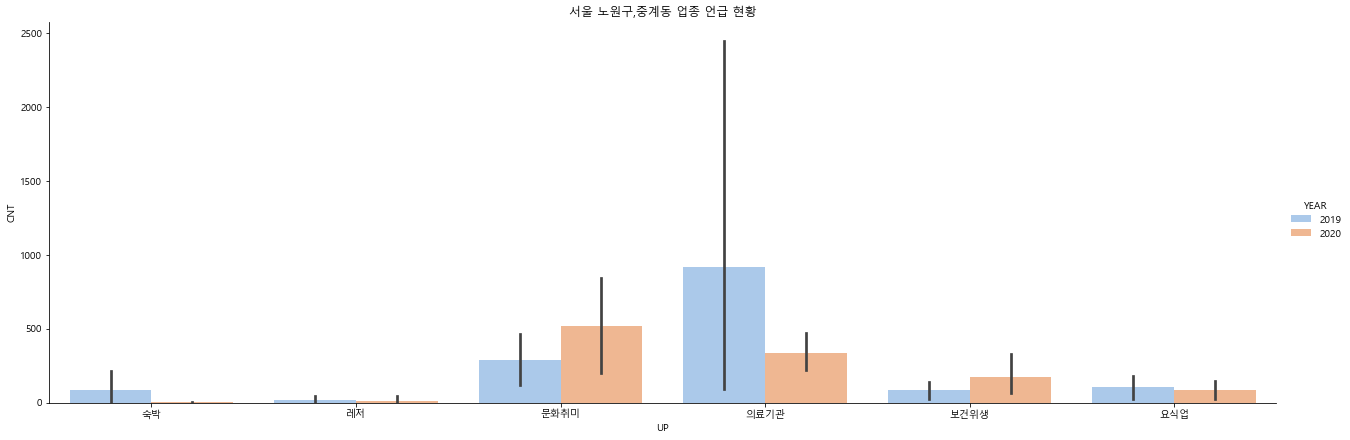

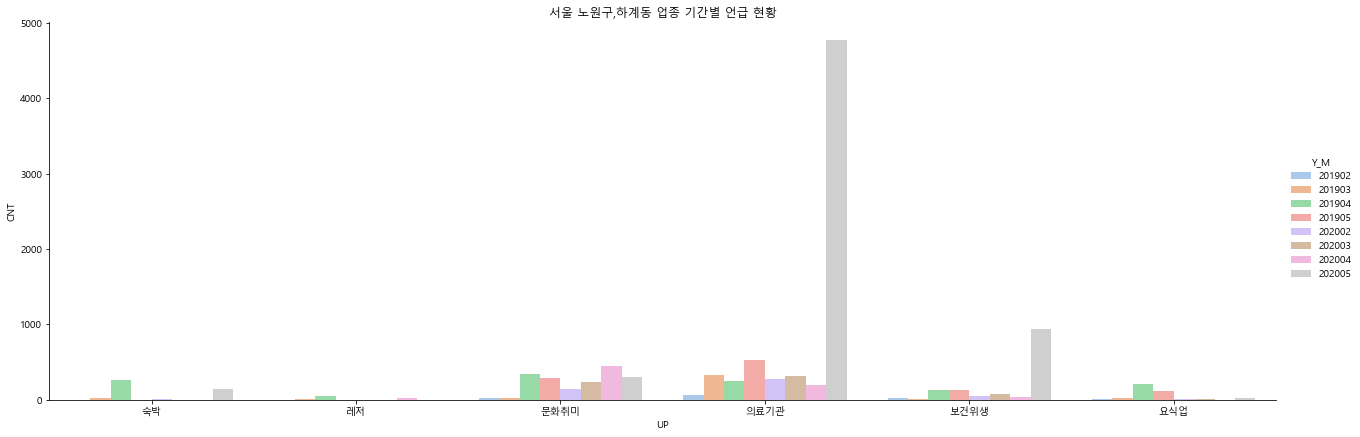

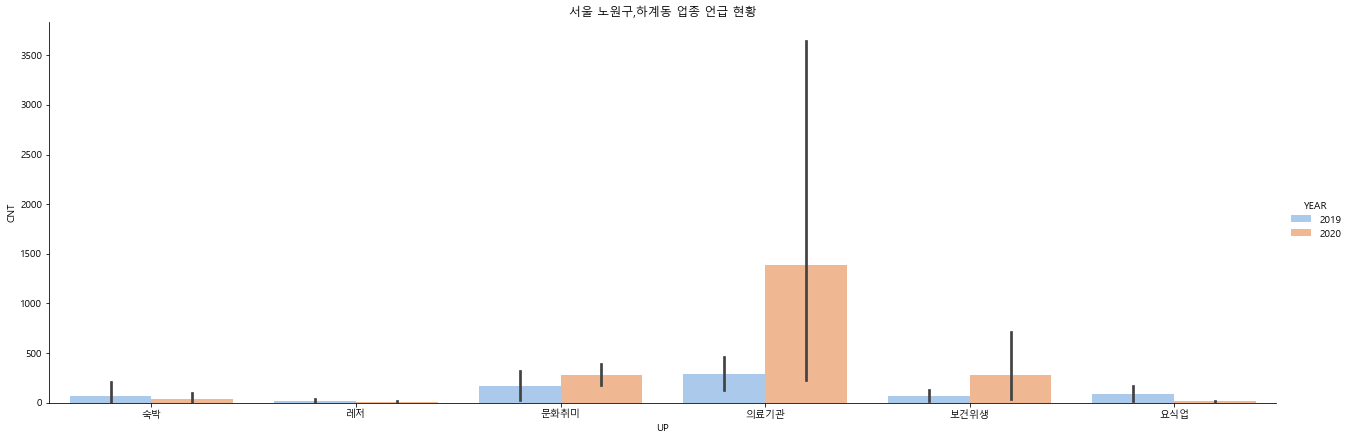

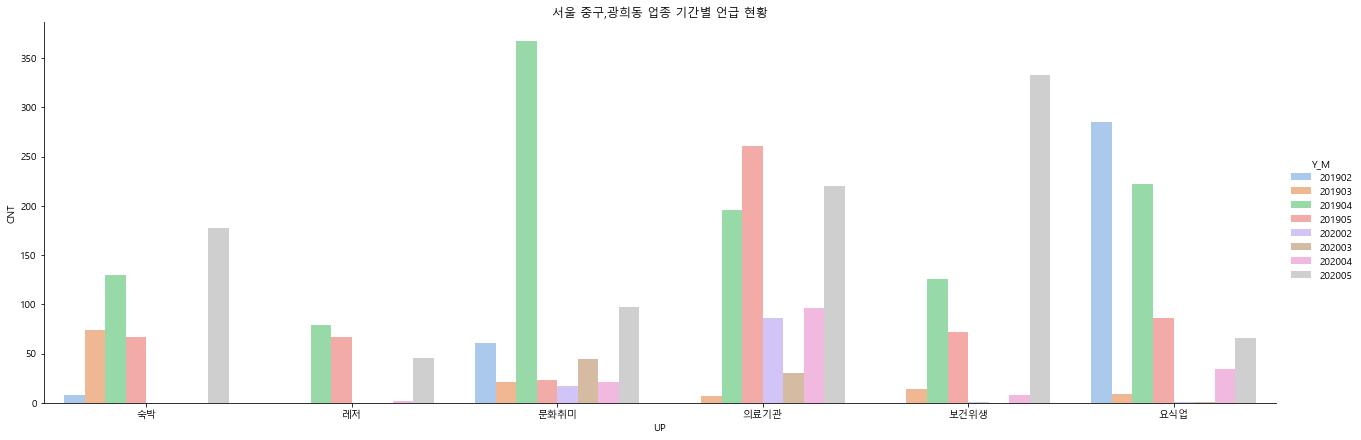

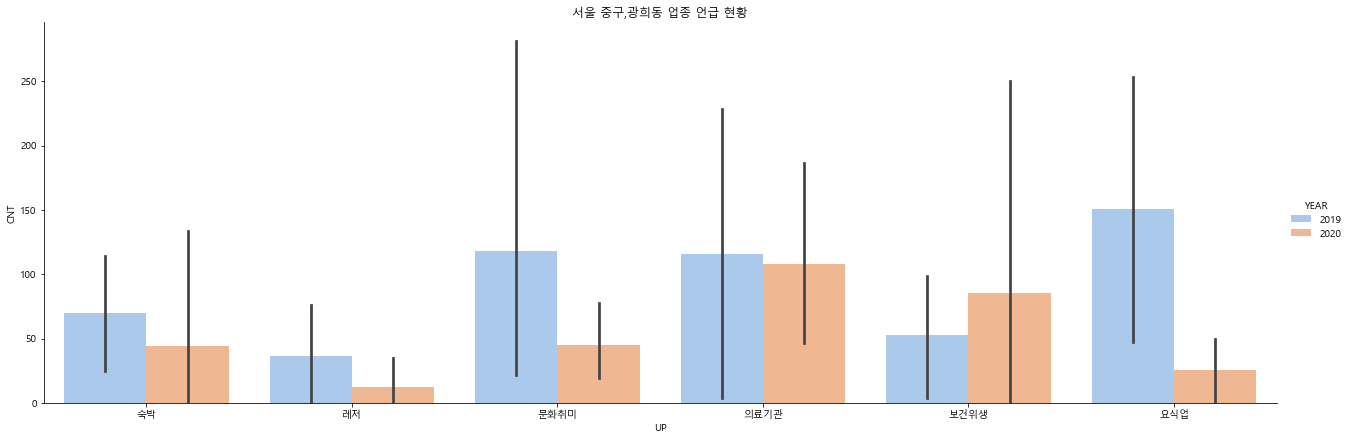

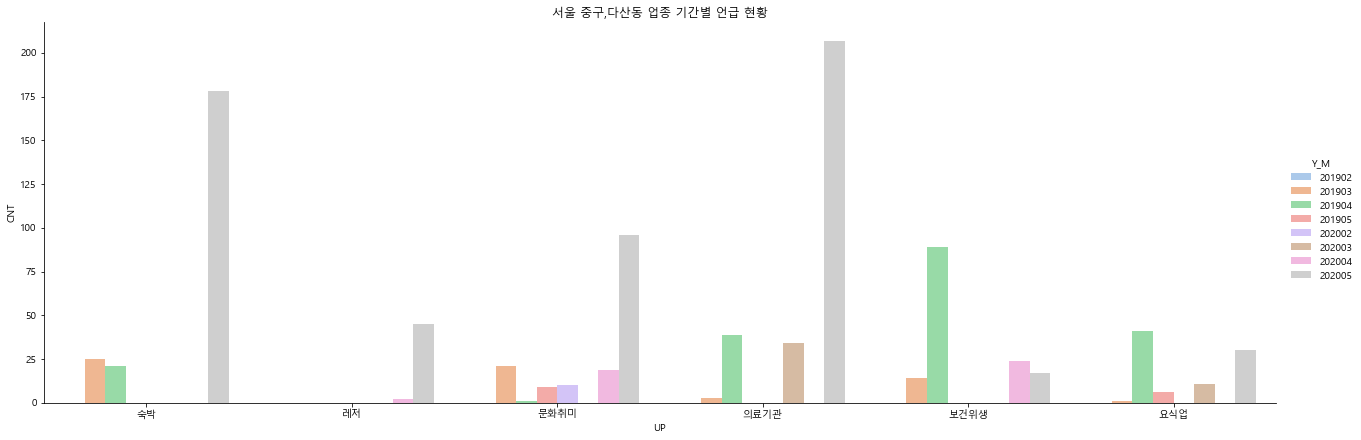

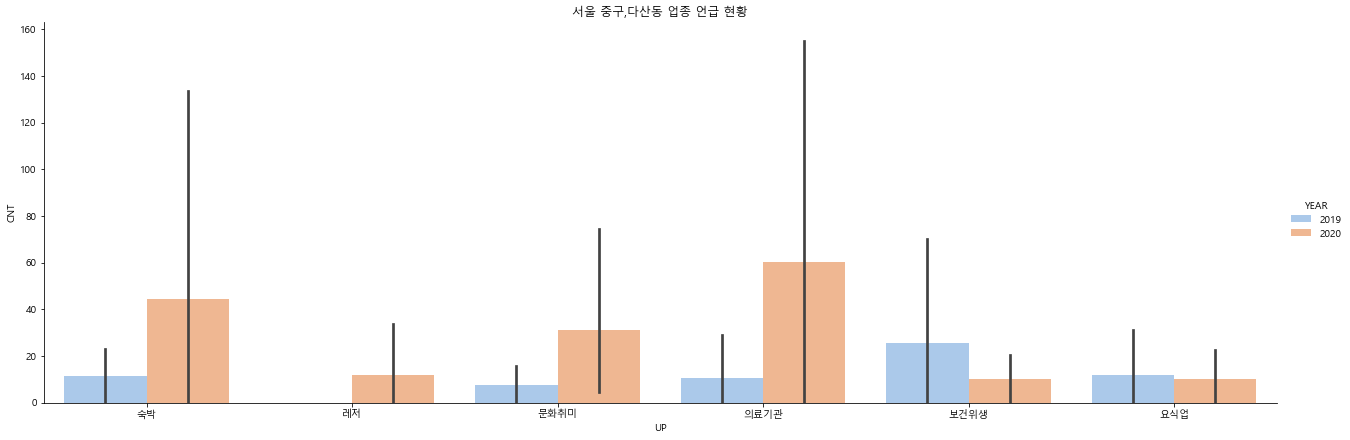

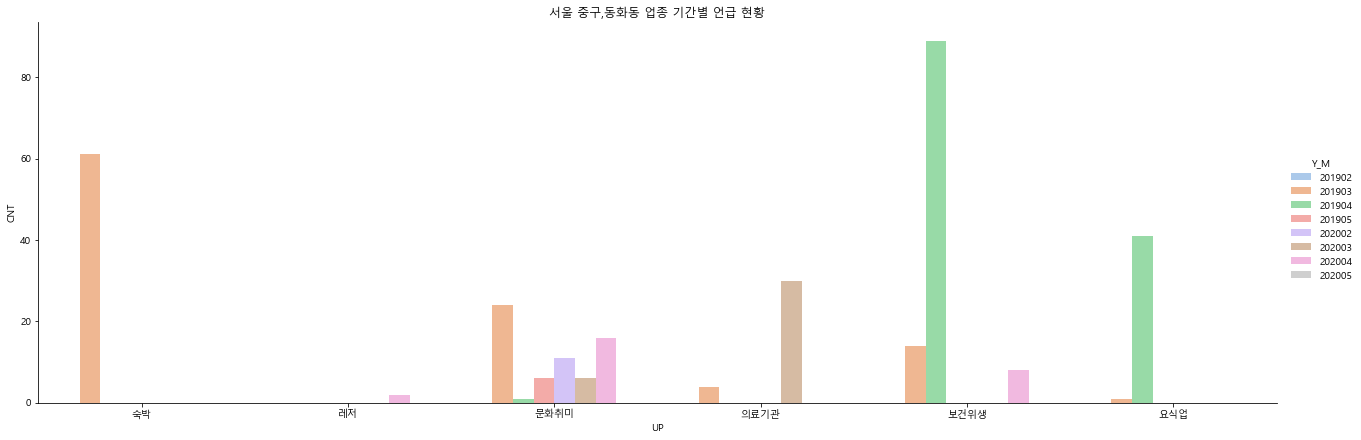

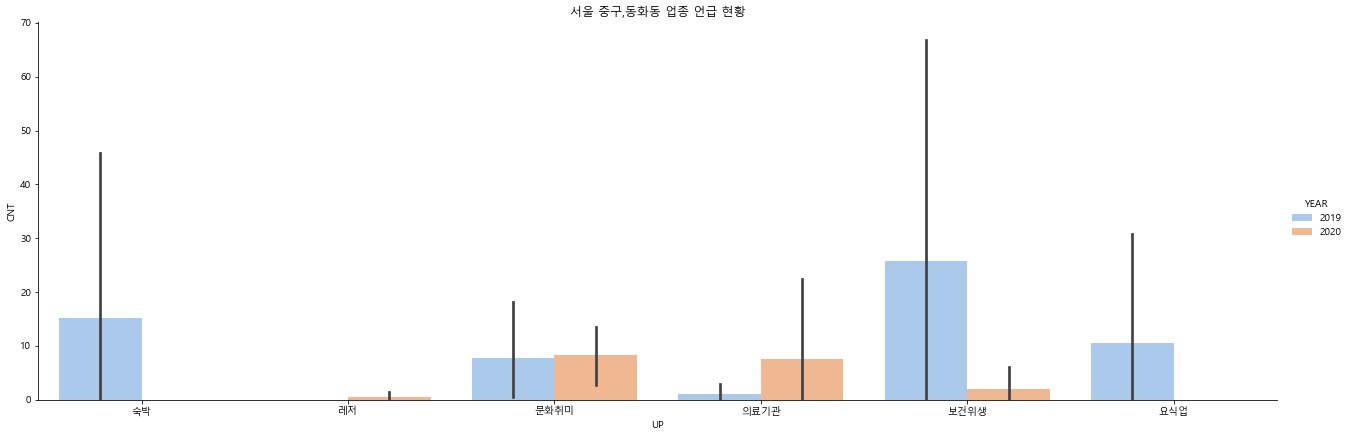

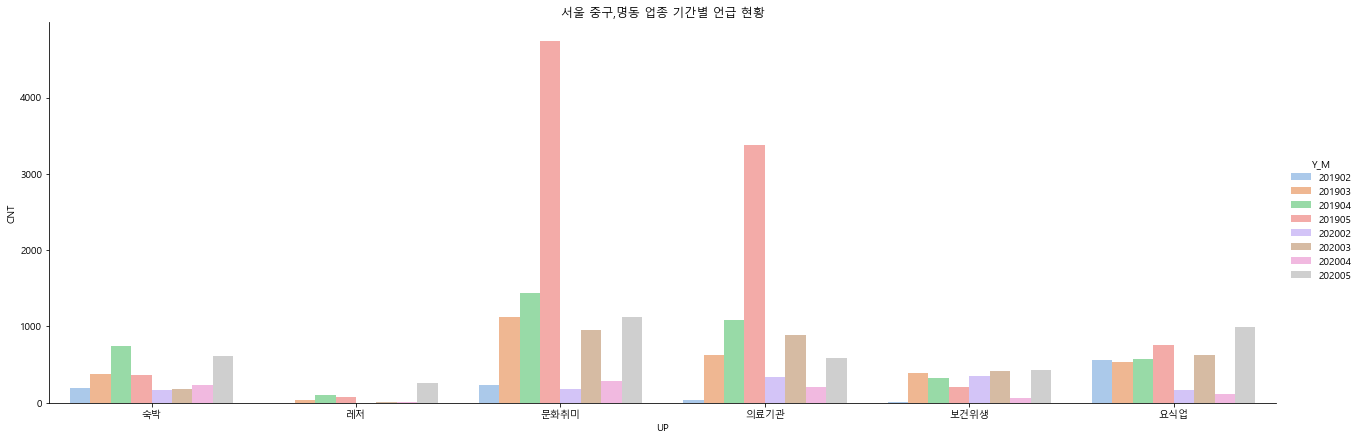

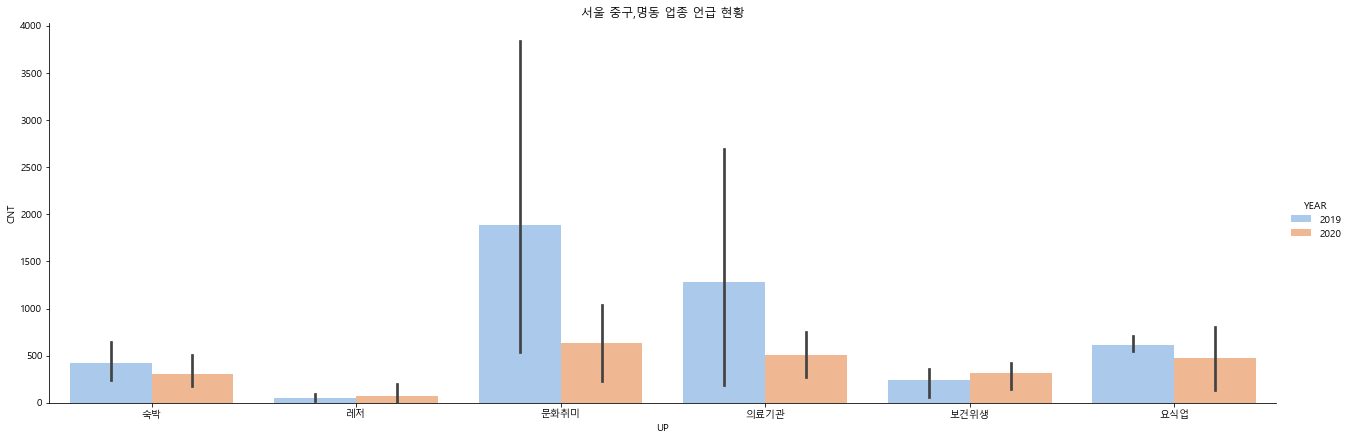

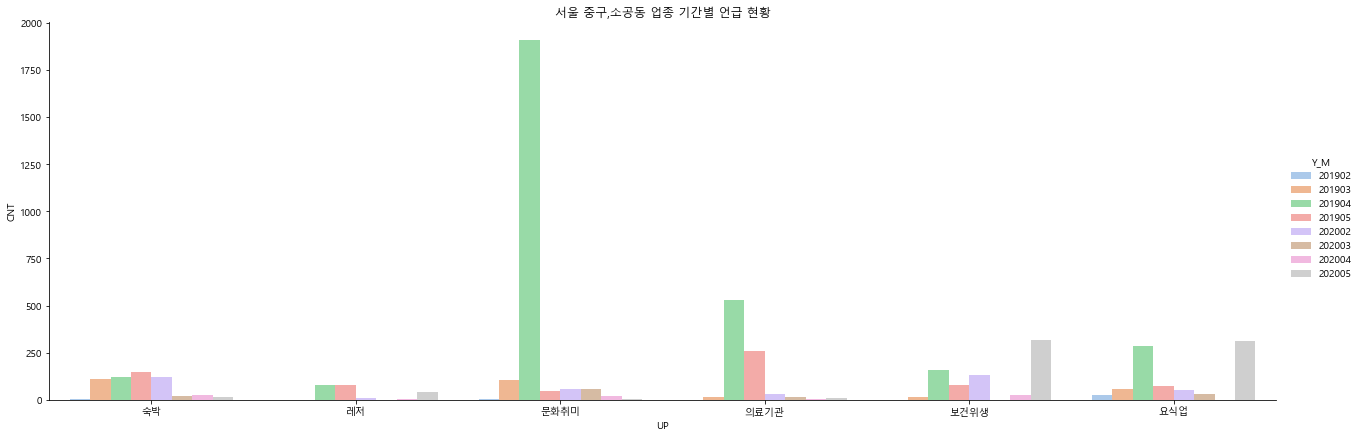

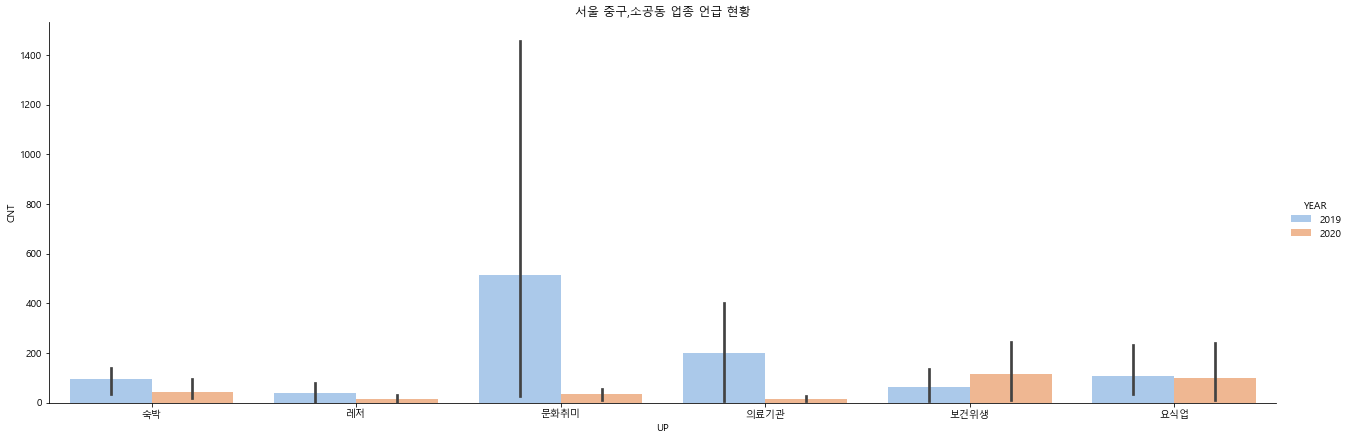

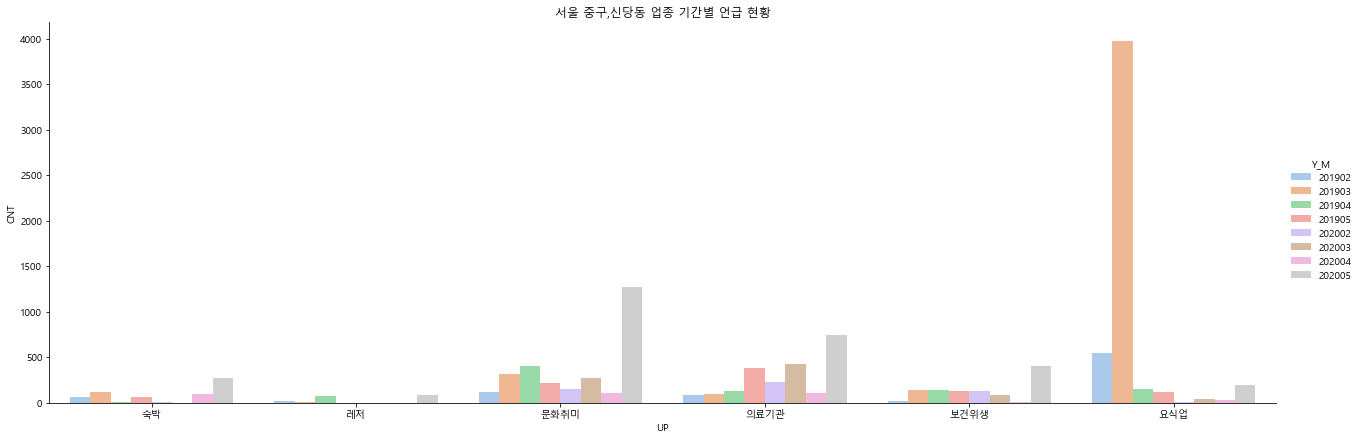

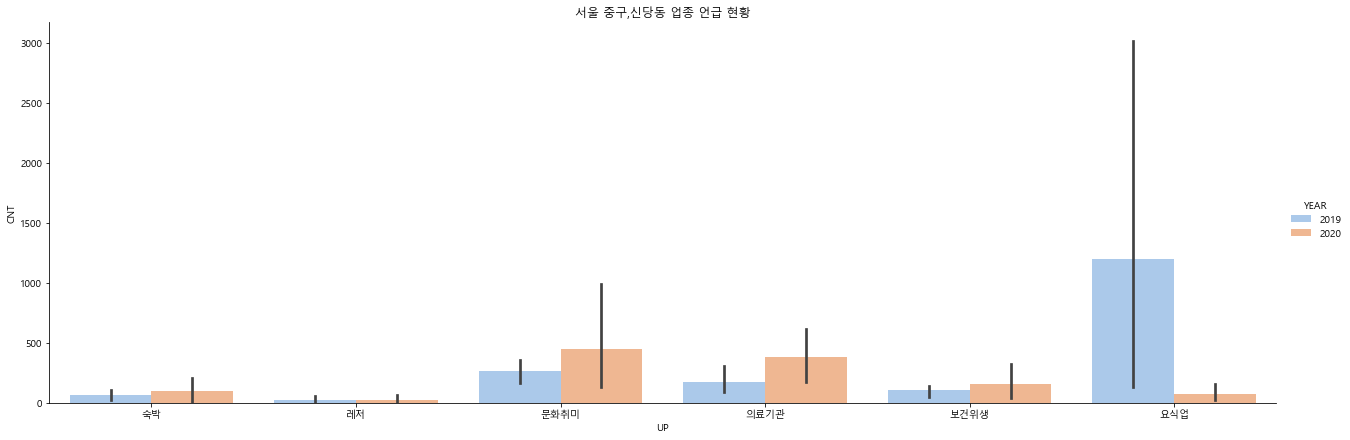

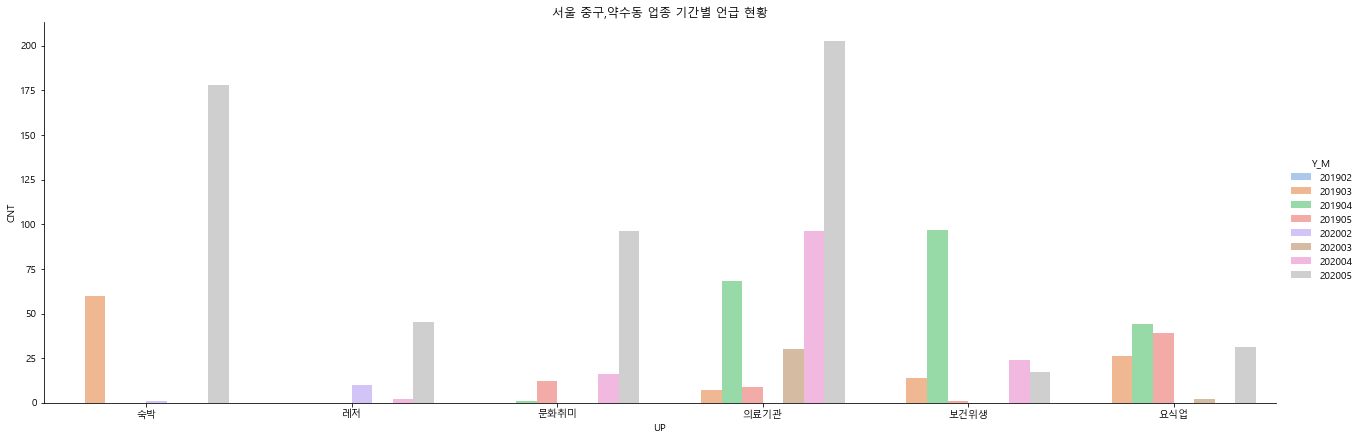

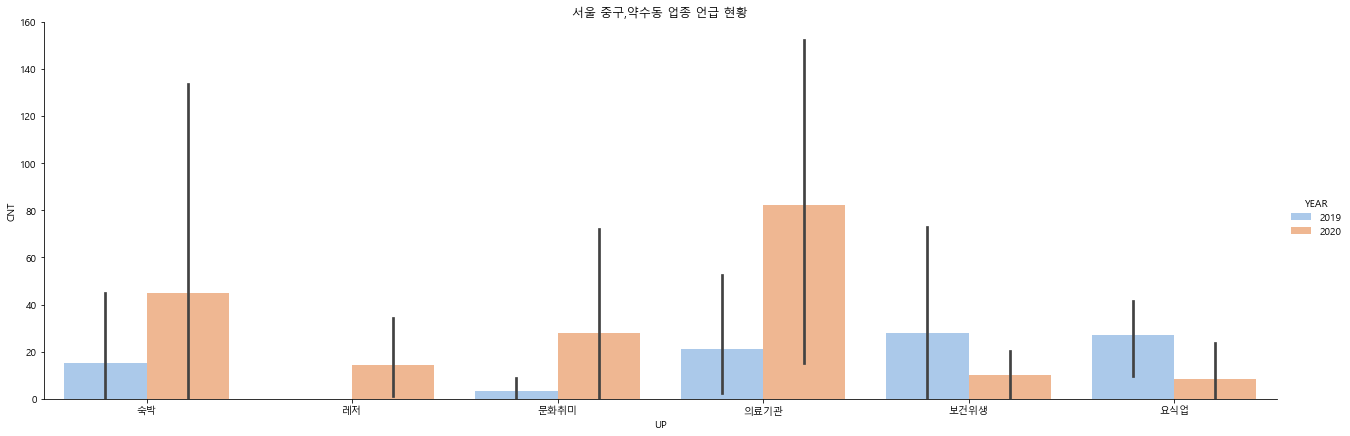

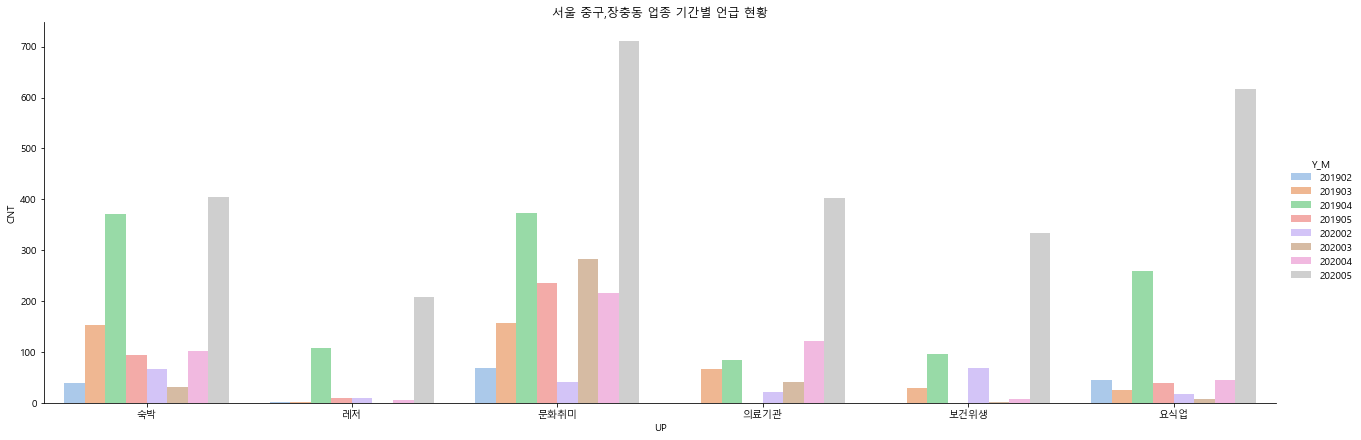

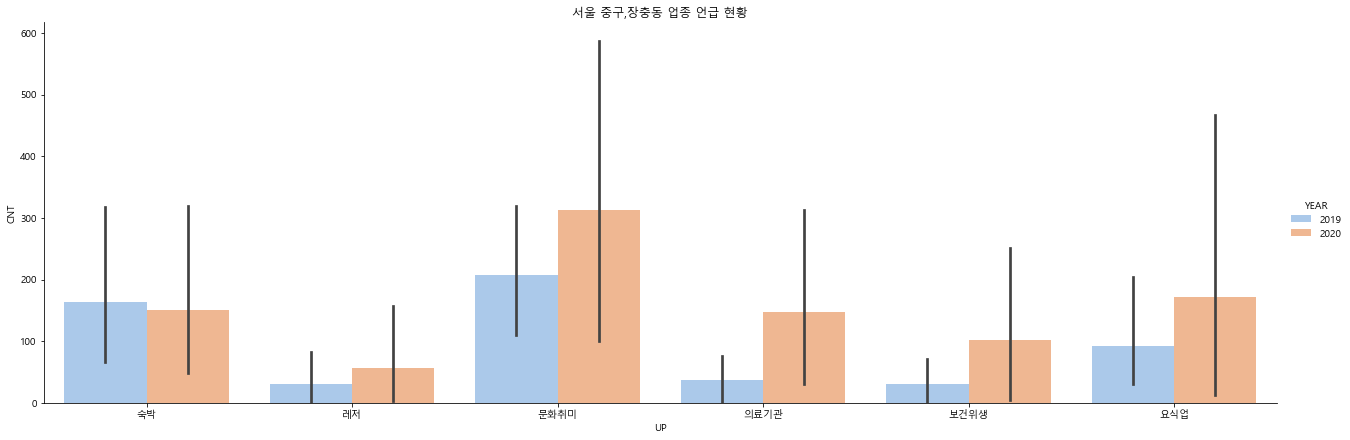

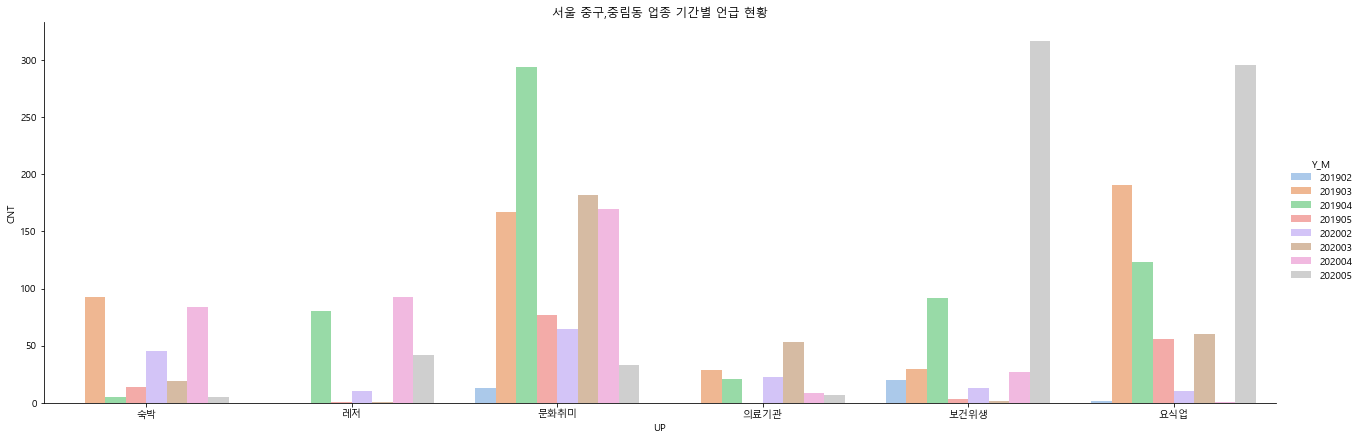

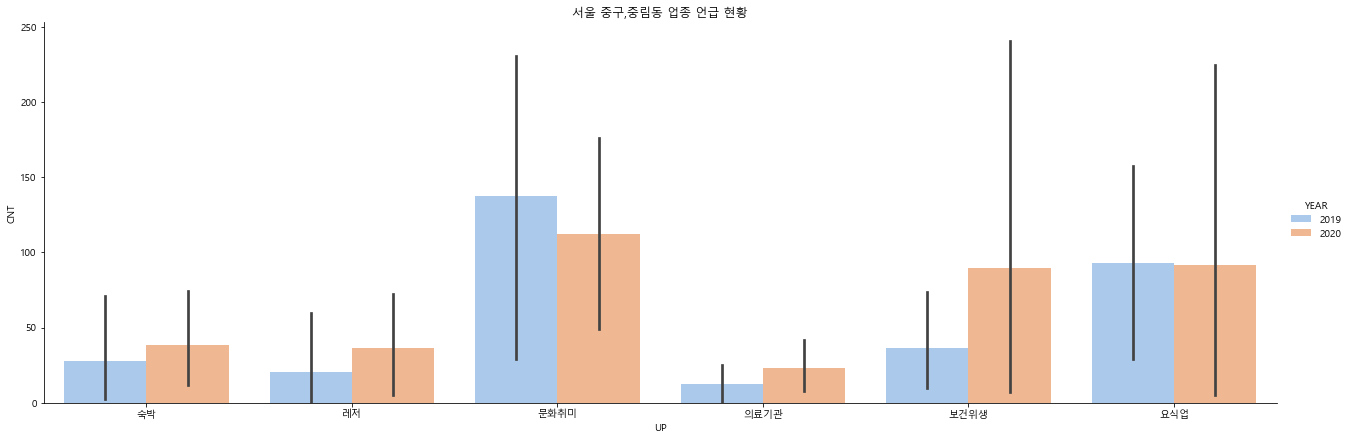

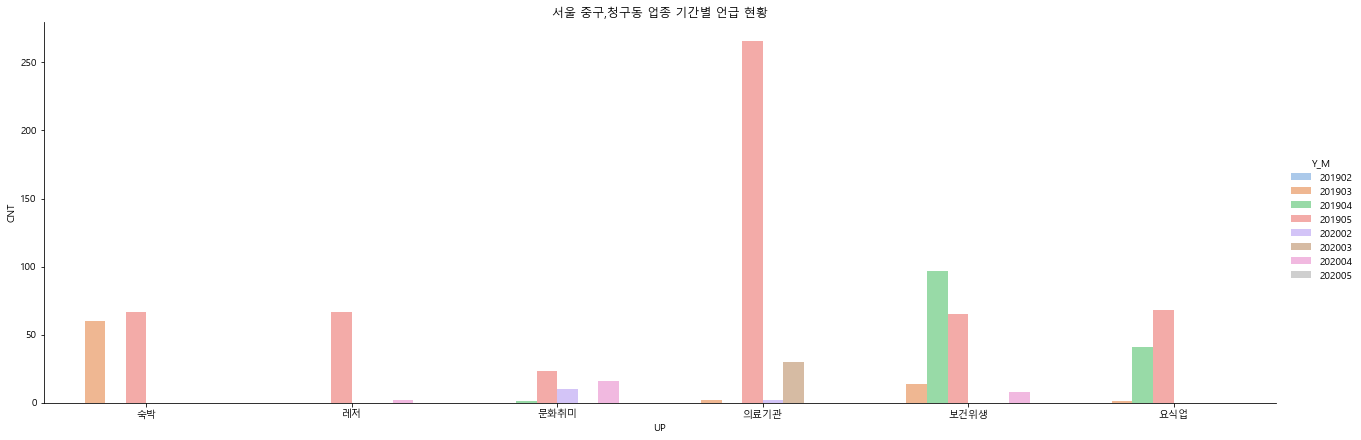

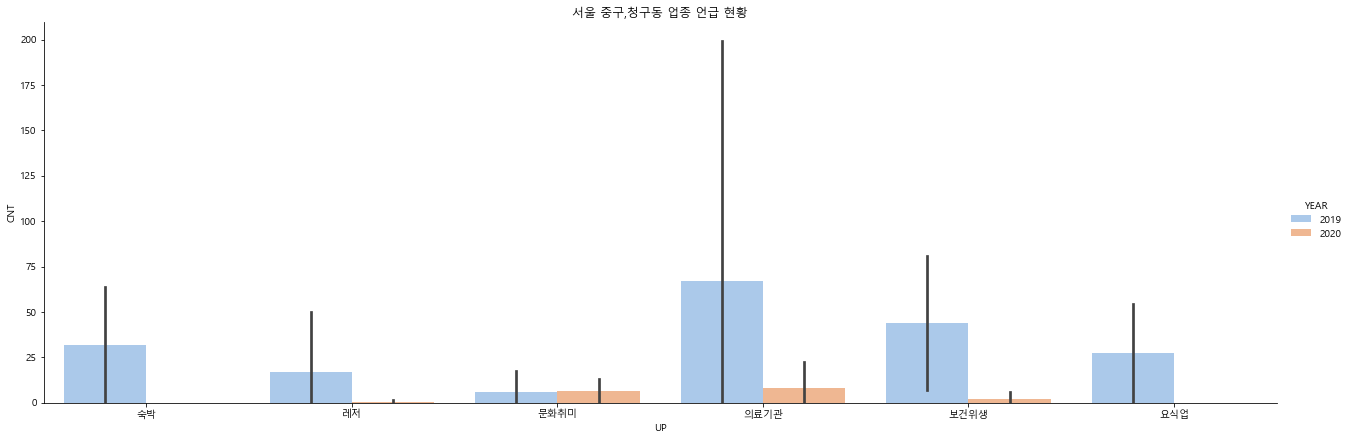

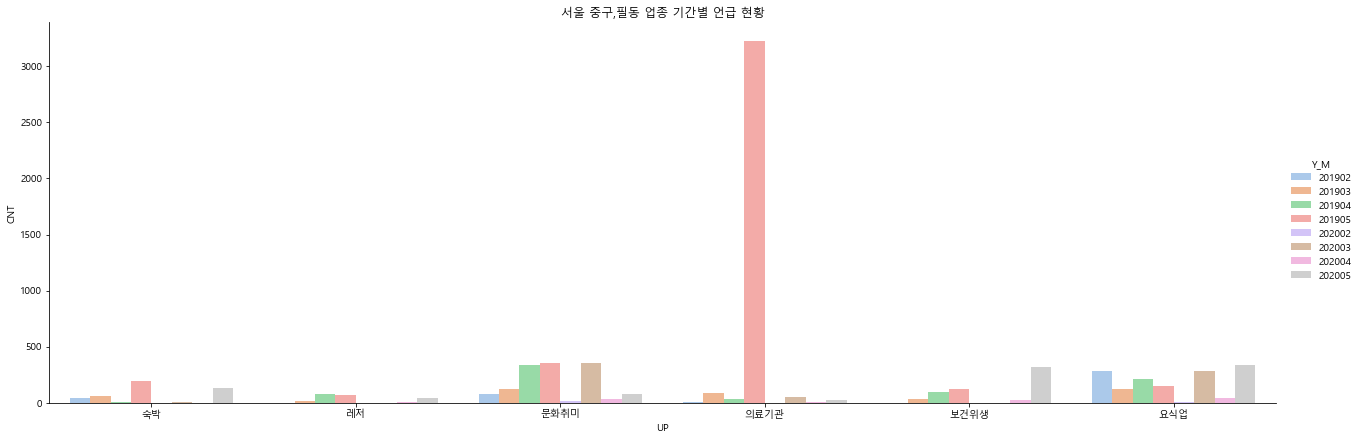

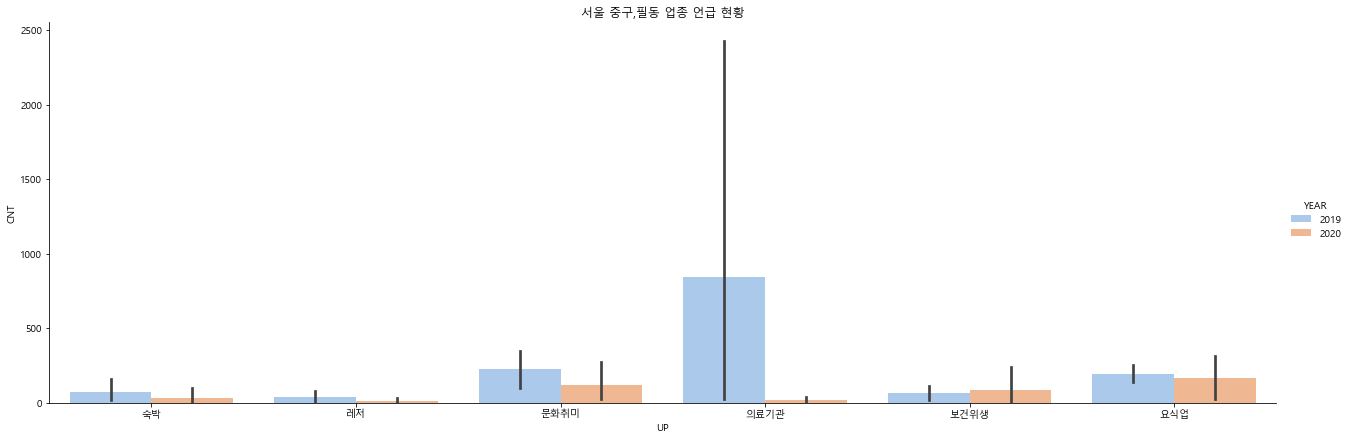

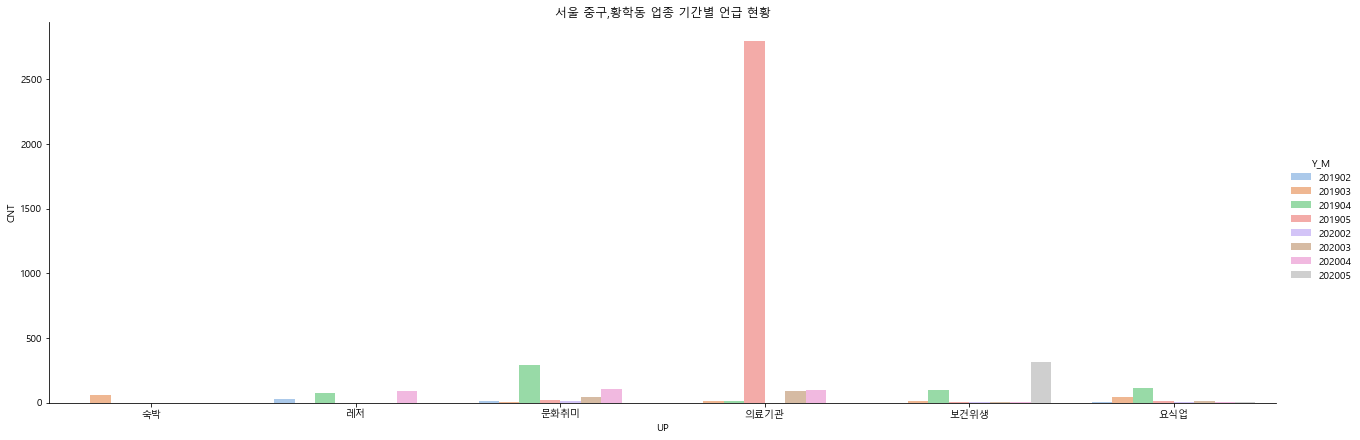

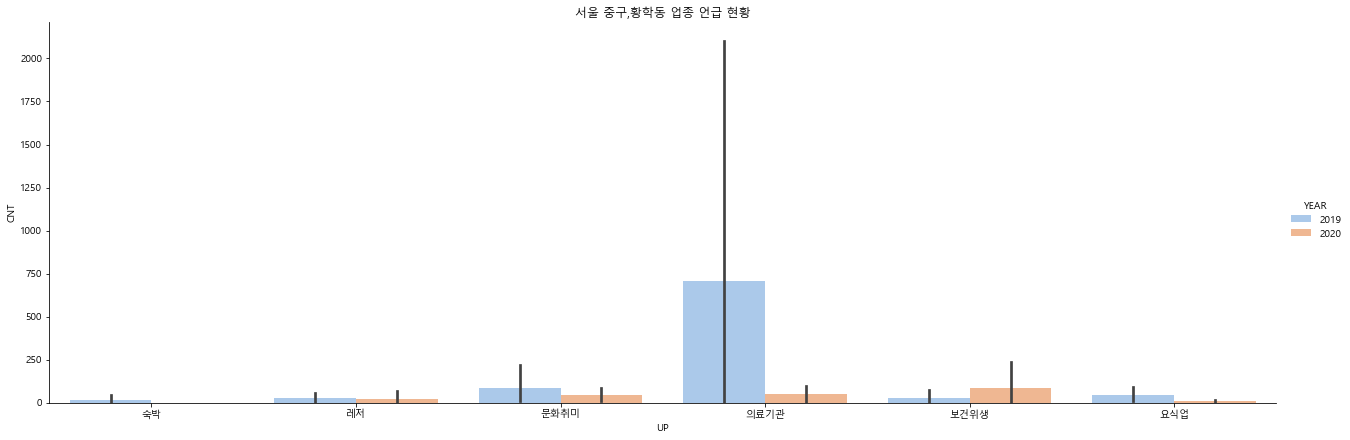

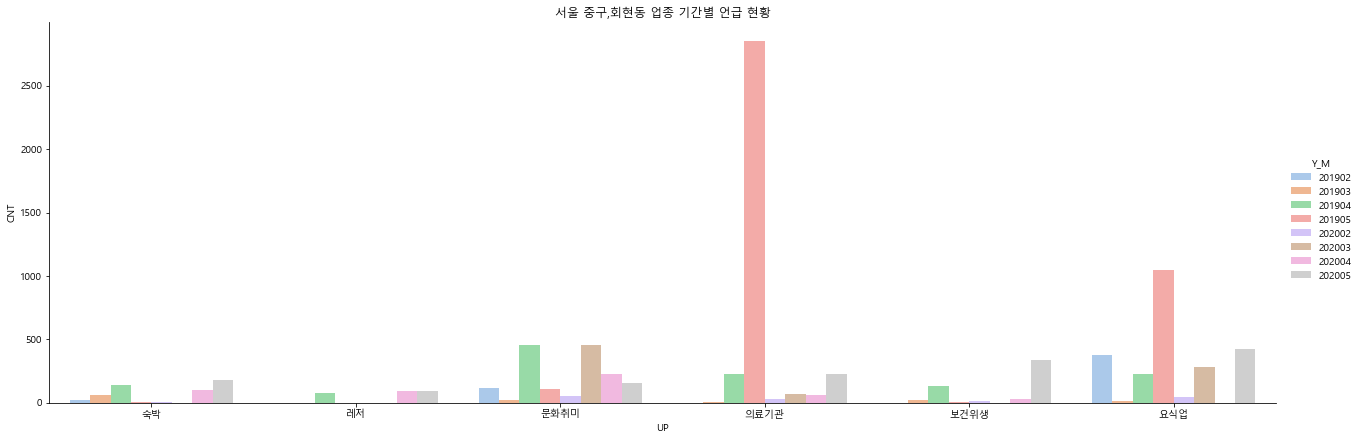

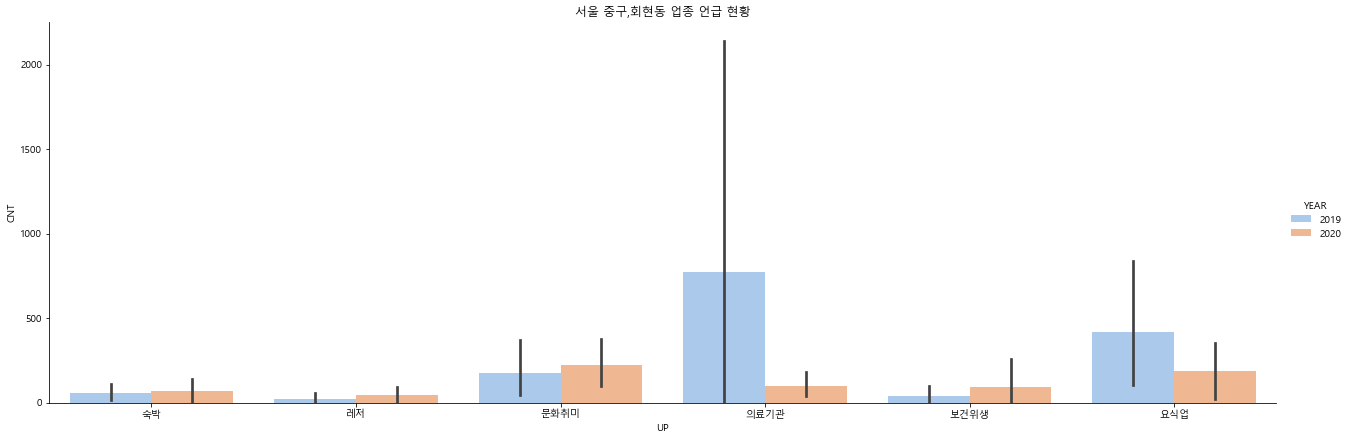

In [17]:
## 행정동 업종별 언급횟수
e = f.groupby(['GU_DONG','MONTH','YEAR','UP'])['CNT'].sum().reset_index()
e.loc[e['UP'] == 'UP1', 'UP'] = '숙박'
e.loc[e['UP'] == 'UP2', 'UP'] = '레저'
e.loc[e['UP'] == 'UP3', 'UP'] = '문화취미'
e.loc[e['UP'] == 'UP4', 'UP'] = '의료기관'
e.loc[e['UP'] == 'UP5', 'UP'] = '보건위생'
e.loc[e['UP'] == 'UP6', 'UP'] = '요식업'

gu = e['GU_DONG'].unique()

for i in gu:
    temp = e.loc[e['GU_DONG']==i, :]
    temp['Y_M'] = temp['YEAR'].apply(lambda x:str(x)+'0')+temp['MONTH'].apply(lambda x:str(x))
    sns.catplot(data=temp, x='UP', y='CNT', size=6, aspect=3, kind='bar', hue='Y_M')
    plt.title(i + ' 업종 기간별 언급 현황')
    sns.catplot(data=temp, x='UP', y='CNT', size=6, aspect=3, kind='bar', hue='YEAR')
    plt.title(i + ' 업종 언급 현황')

**대구 수성구 범물동과 두산동 같이 업종 별 기간 동안 증감 추세가 비슷한 지역이 있음 => 군집화 가능성**

In [18]:
## 업종별 행정동 분석에서 쓸 클러스터 함수
def UPcluster(data, cls_num):
    temp = data.query("cls == {}".format(cls_num))
    DL = temp['GU_DONG'].unique()
    for d in DL:
        t = j0.loc[j0['GU_DONG']==d, :]
        j = sns.catplot(data=t, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
        j.despine(left=True)
        plt.subplots_adjust(top=0.9)
        j.fig.suptitle(d + ' 언급 상황')

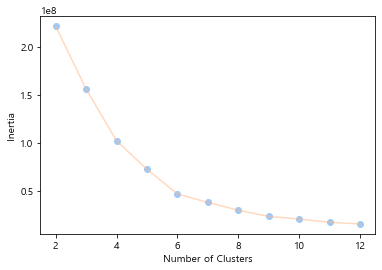

<Figure size 720x720 with 0 Axes>

In [19]:
## 행정동 별 언급 추세 군집화
c = e.copy()
c['Y_M'] = c['YEAR'].apply(lambda x:str(x)+'0')+c['MONTH'].apply(lambda x:str(x))
cc = pd.pivot_table(c,index=['GU_DONG'],columns=['Y_M','UP'],values=['CNT'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(cc)
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(cc)
cc.columns = [' '.join(col).strip() for col in cc.columns.values]
cc['cls'] = kmeans.labels_
total = pd.merge(cc.reset_index()[['GU_DONG','cls']],c,on='GU_DONG')

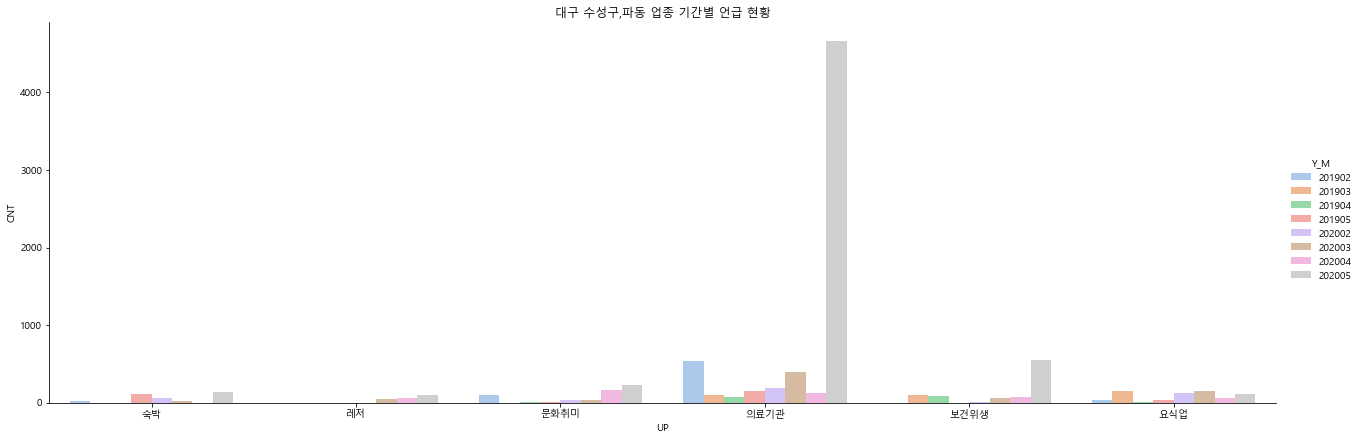

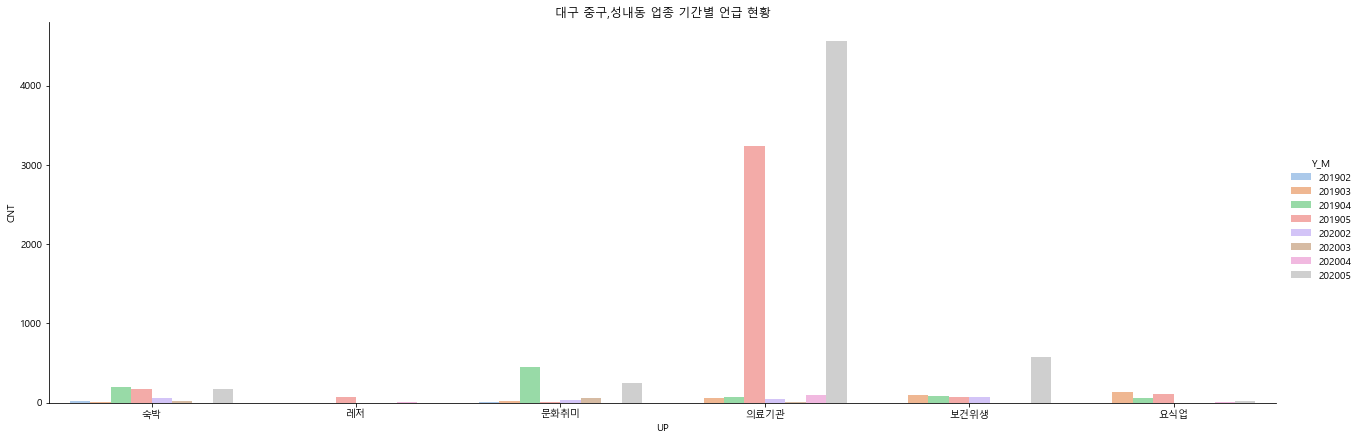

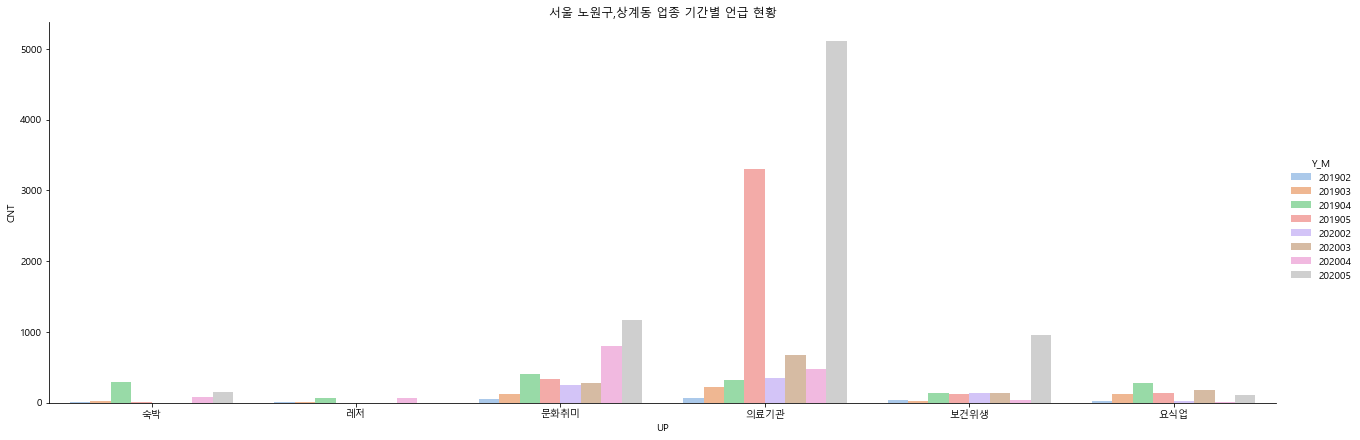

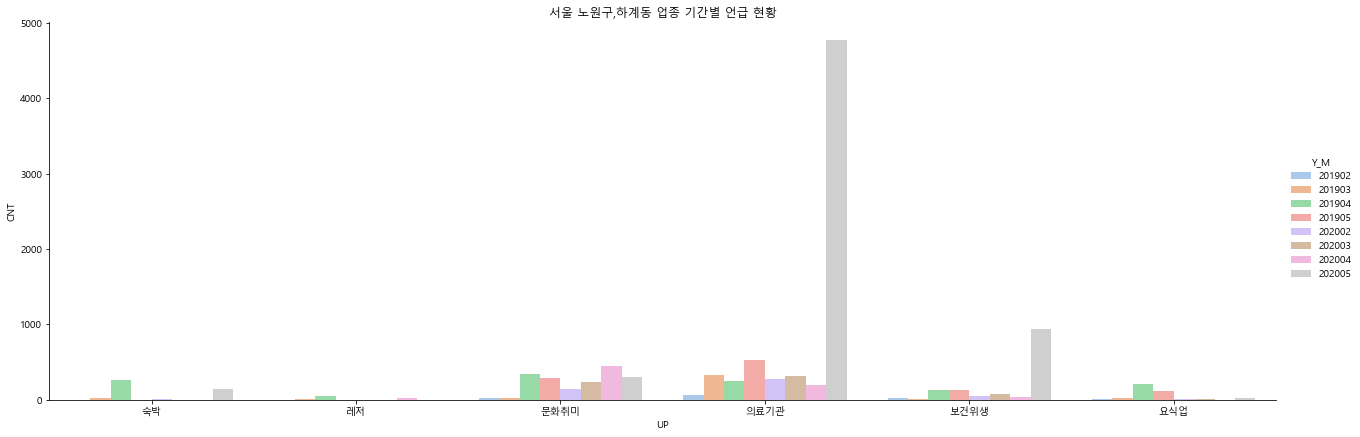

In [21]:
## 클러스터링 성공!
cls_num=5
temp99 = total.query("cls == {}".format(cls_num))
DL = temp99['GU_DONG'].unique()
for i in DL:
    tt = total.loc[total['GU_DONG']==i, :]
    sns.catplot(data=tt, x='UP', y='CNT', size=6, aspect=3, kind='bar', hue='Y_M')
    plt.title(i + ' 업종 기간별 언급 현황')

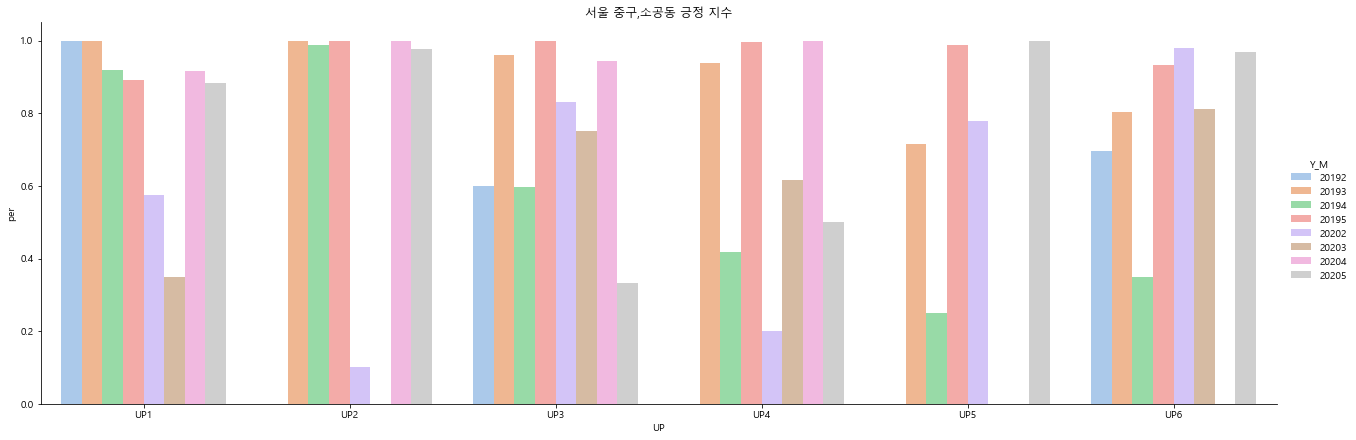

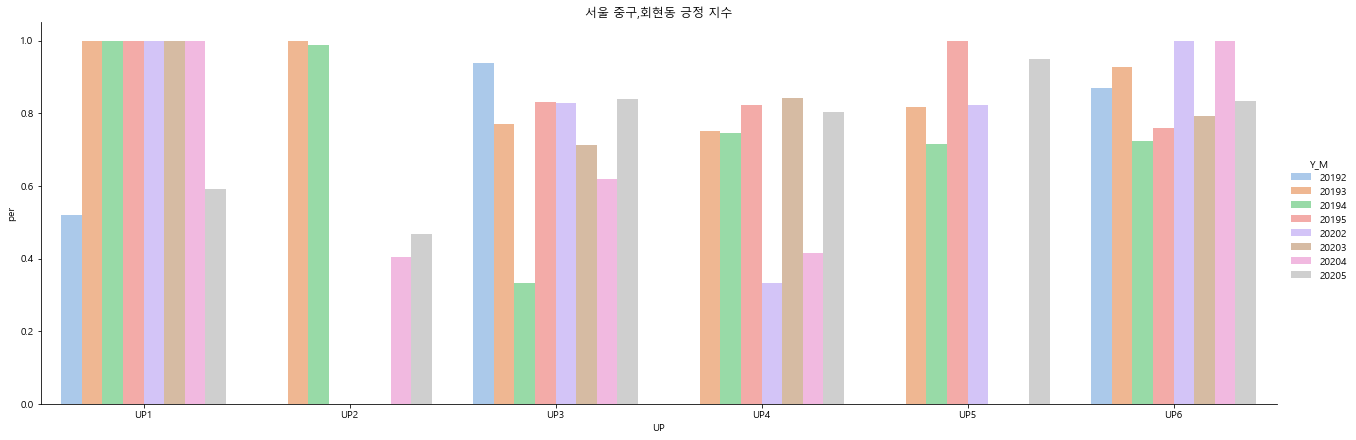

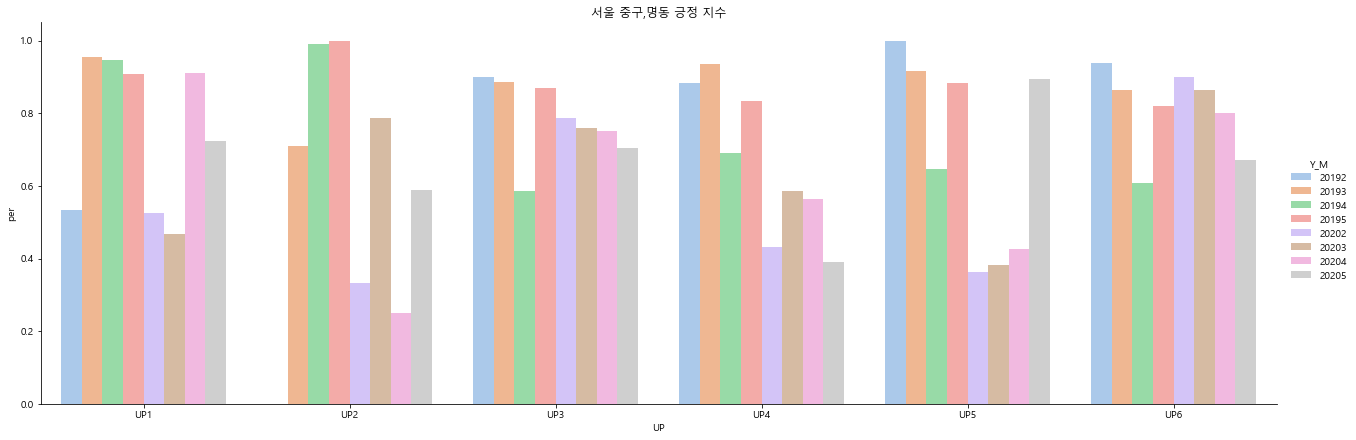

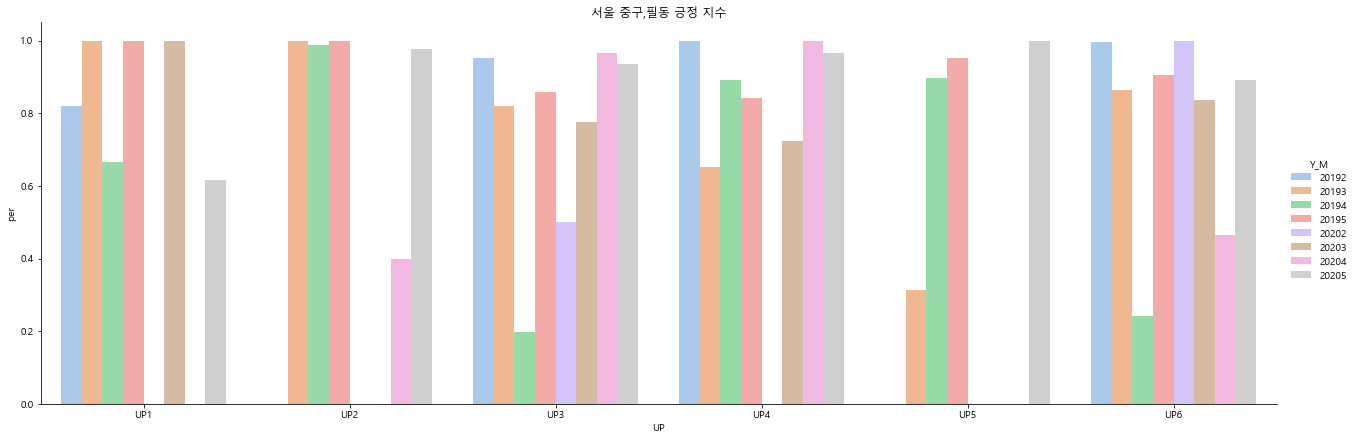

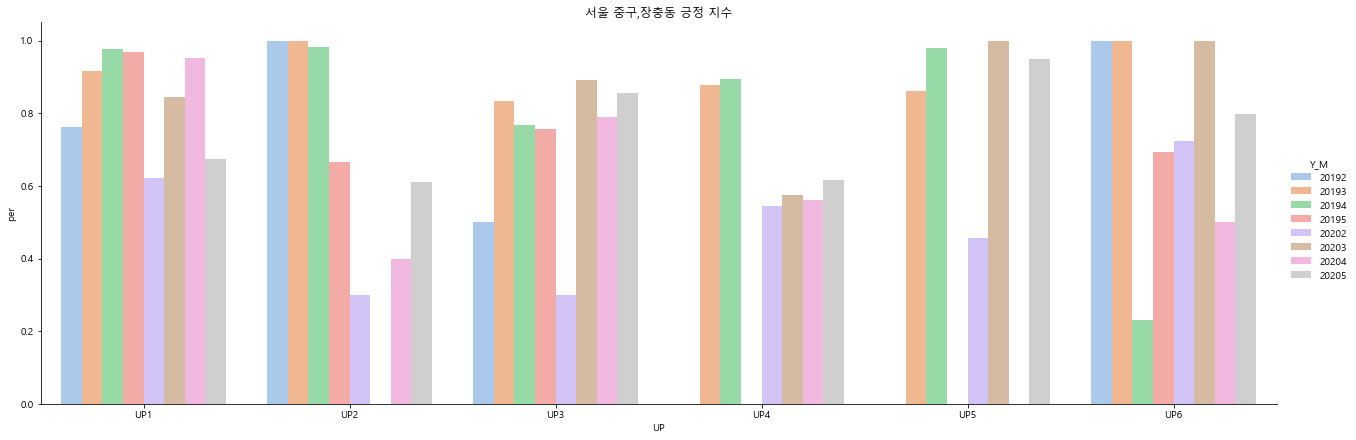

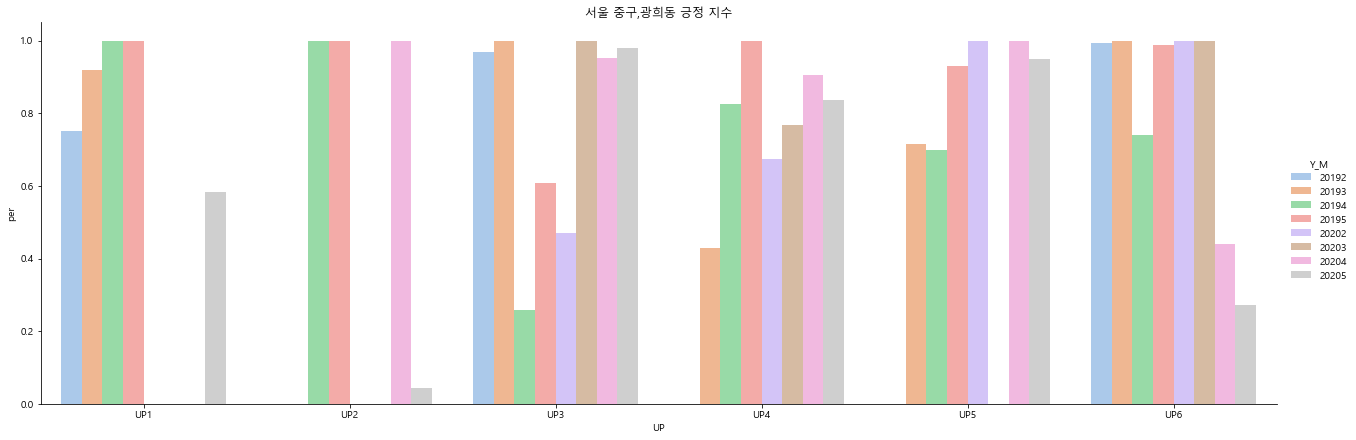

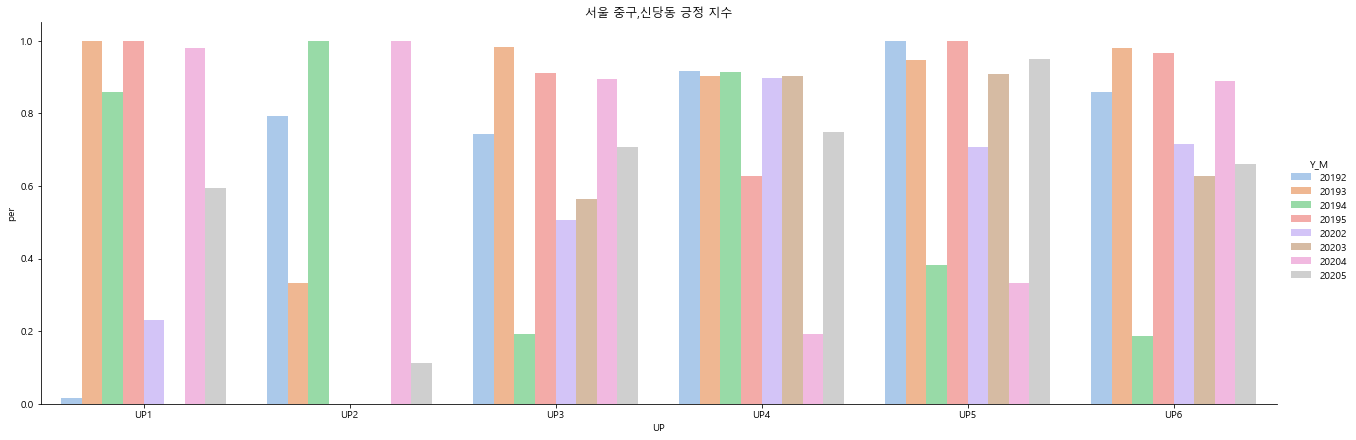

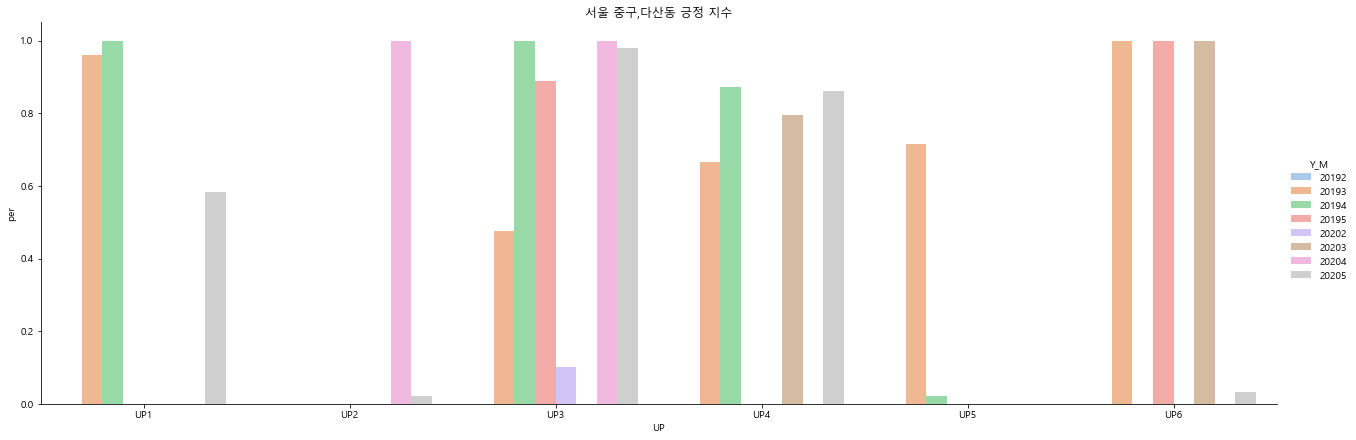

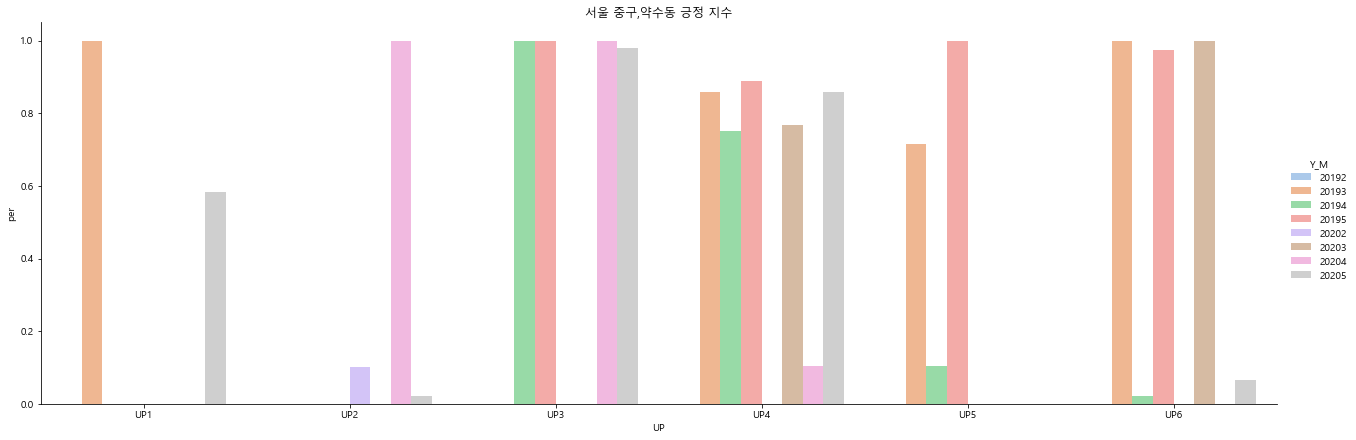

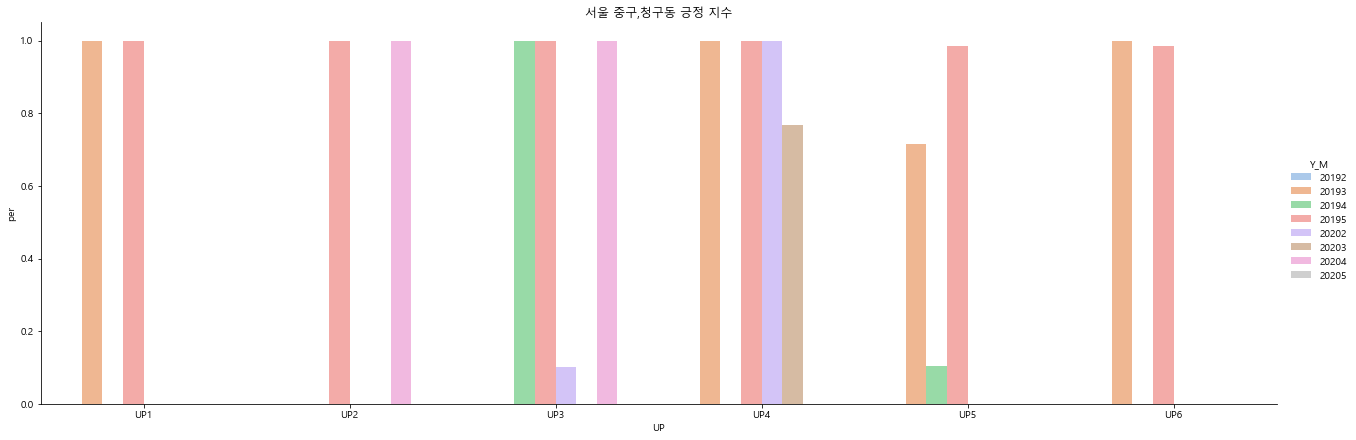

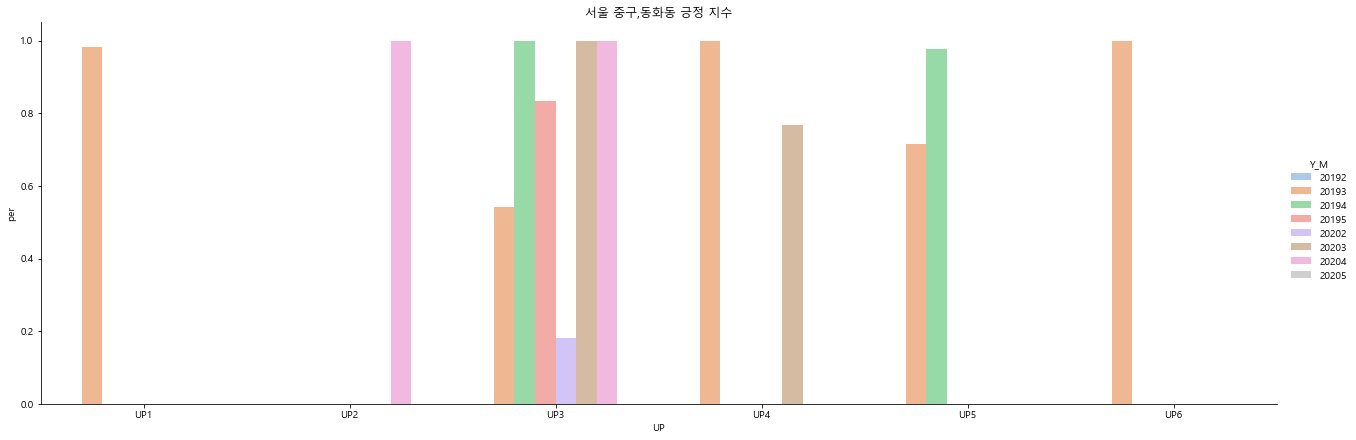

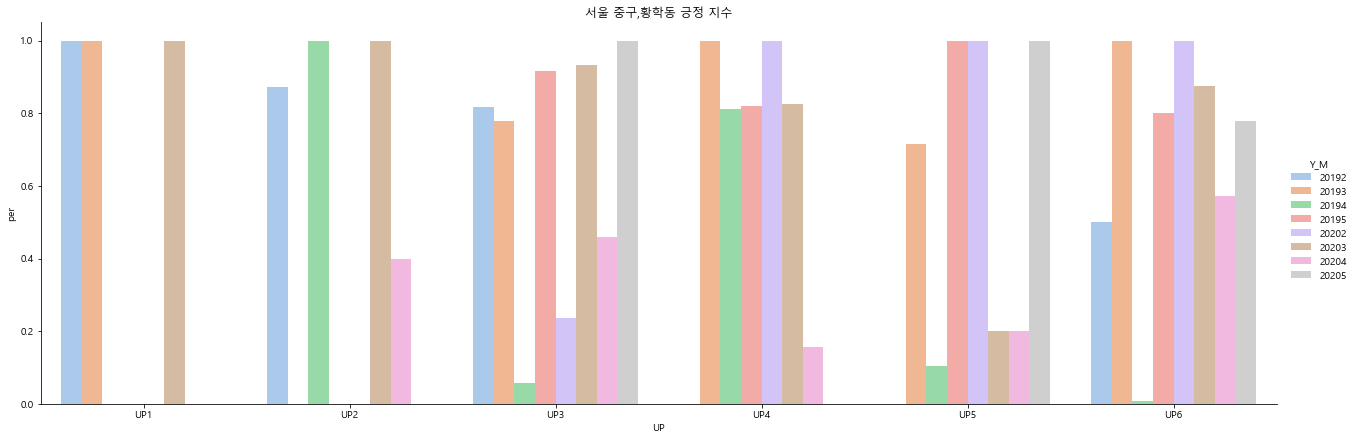

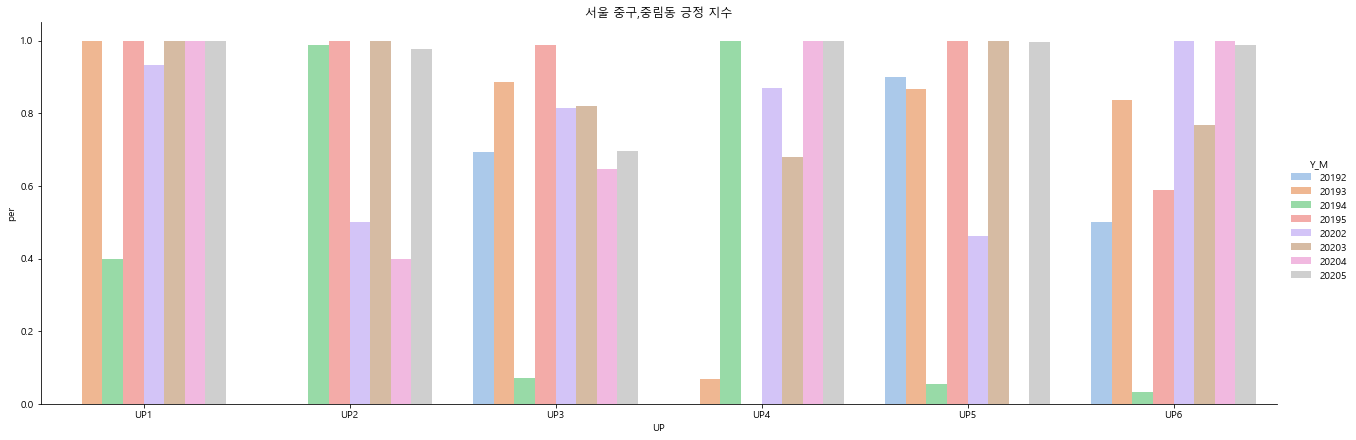

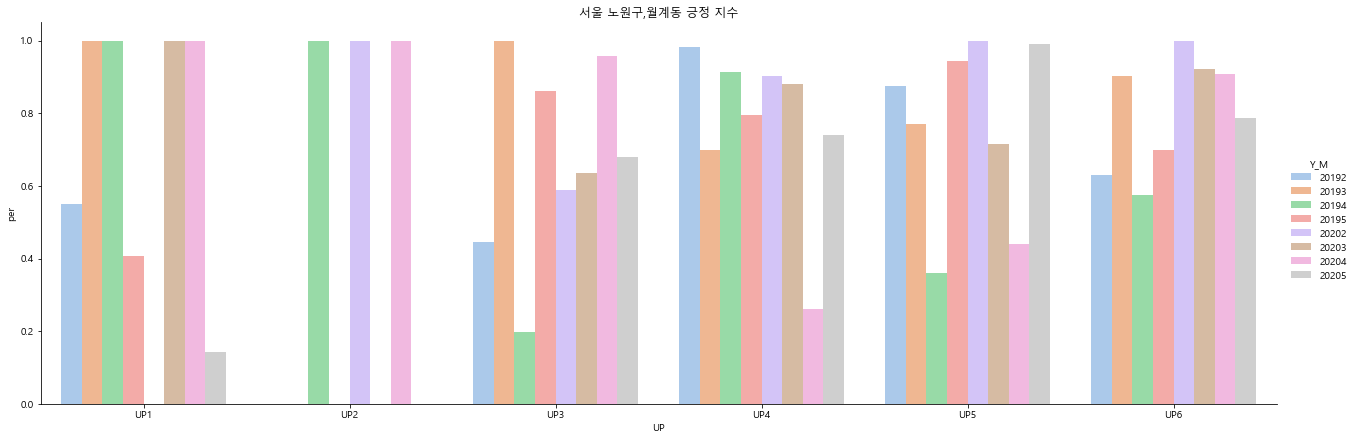

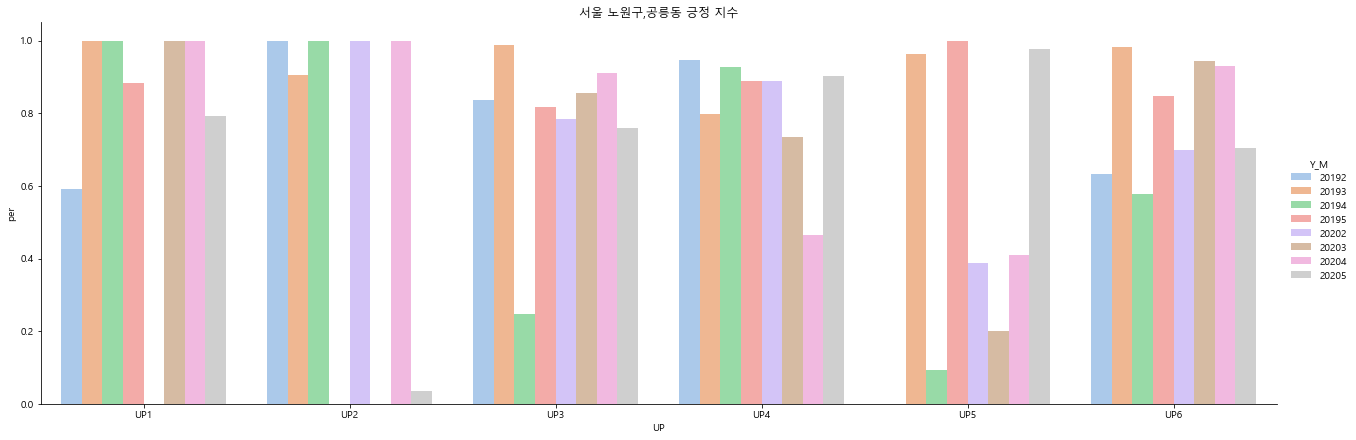

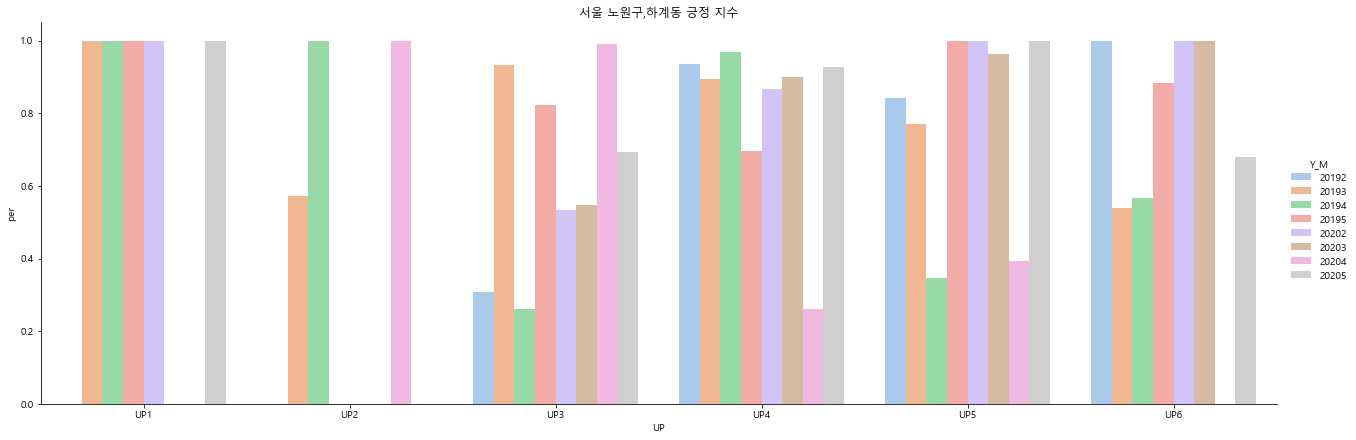

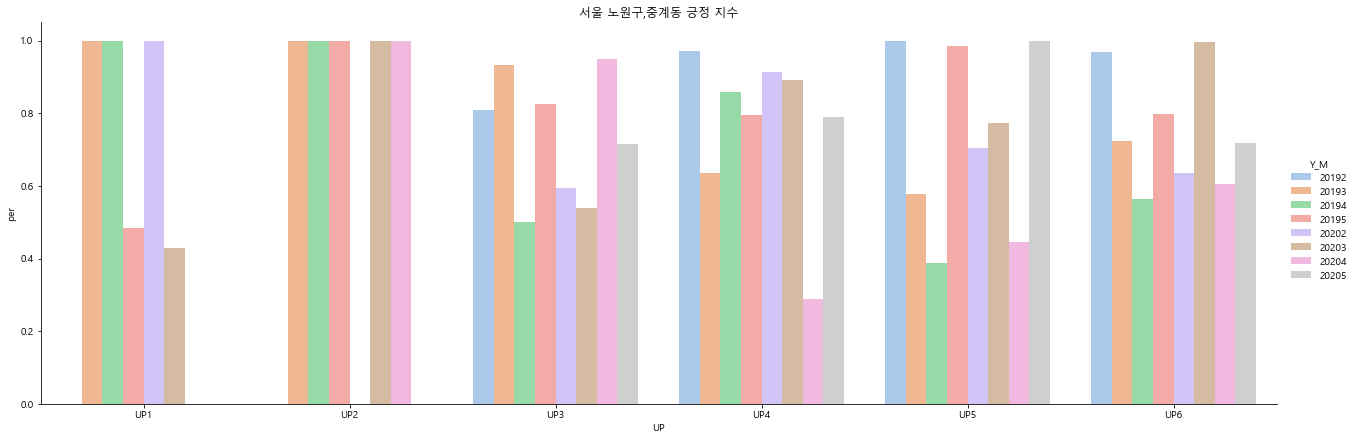

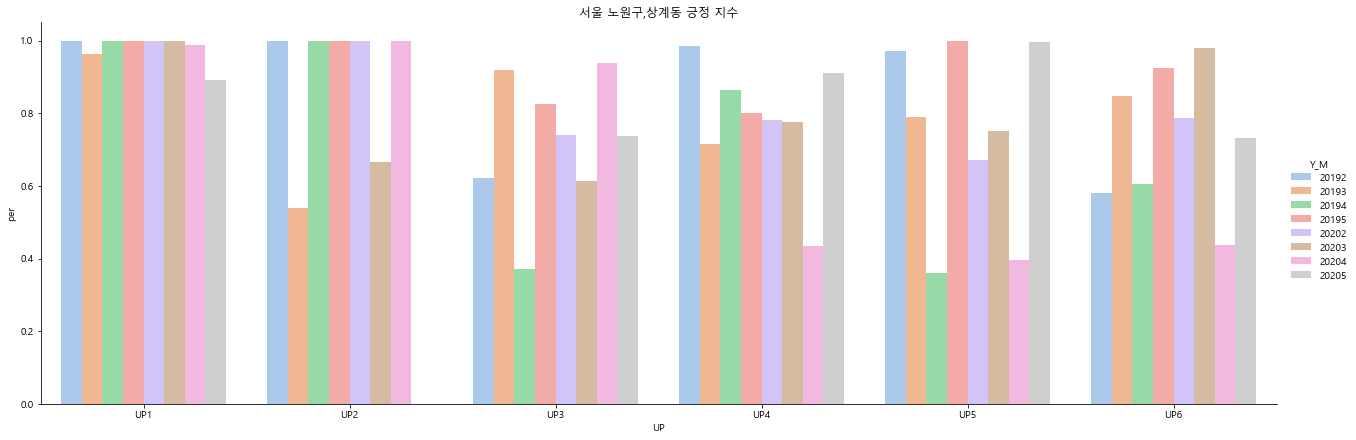

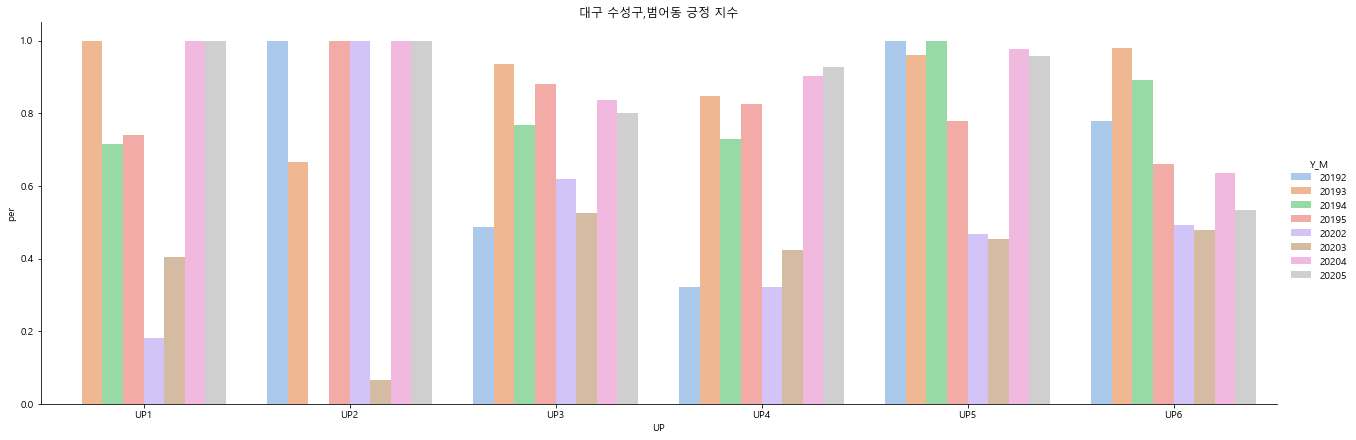

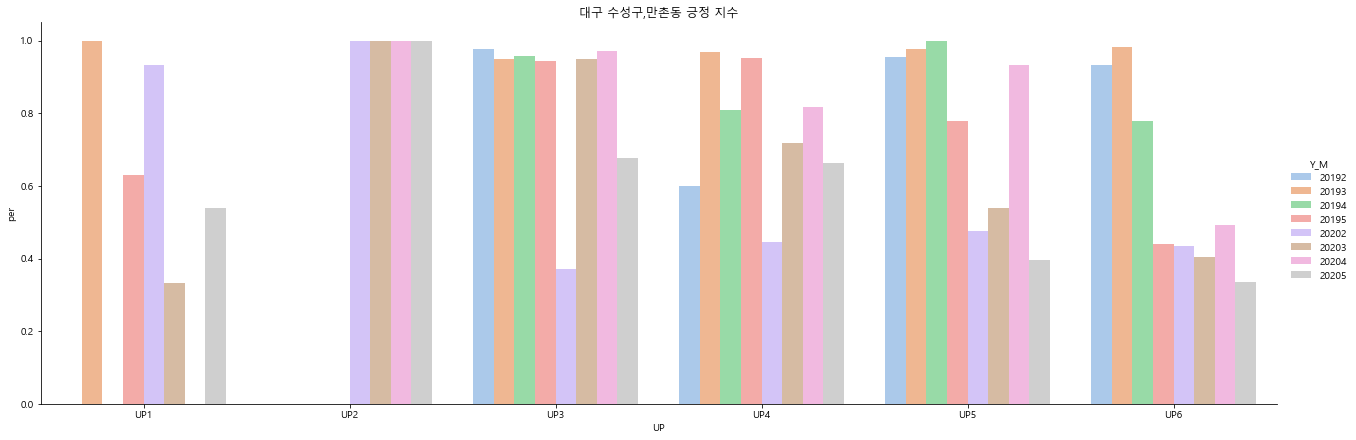

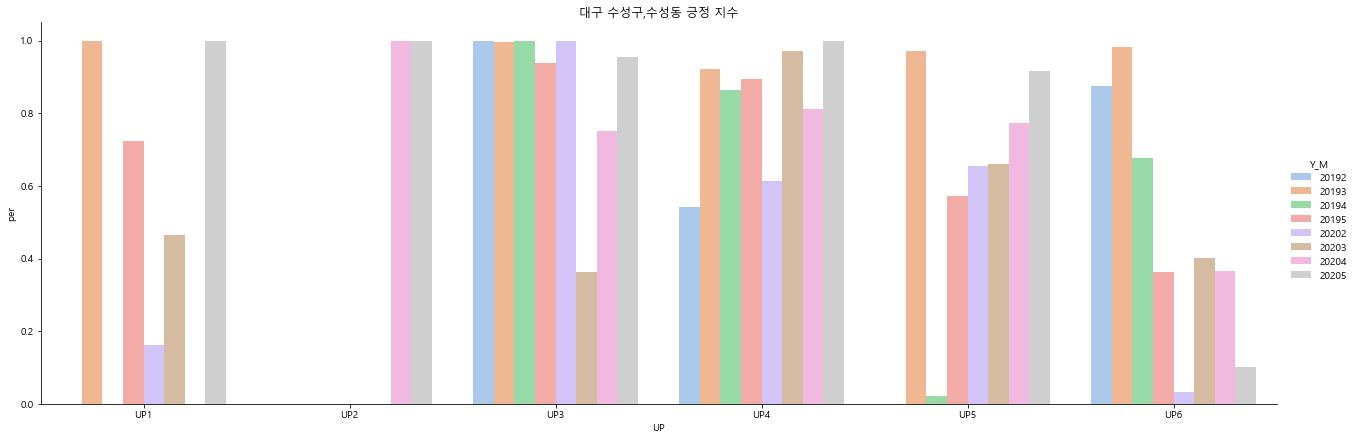

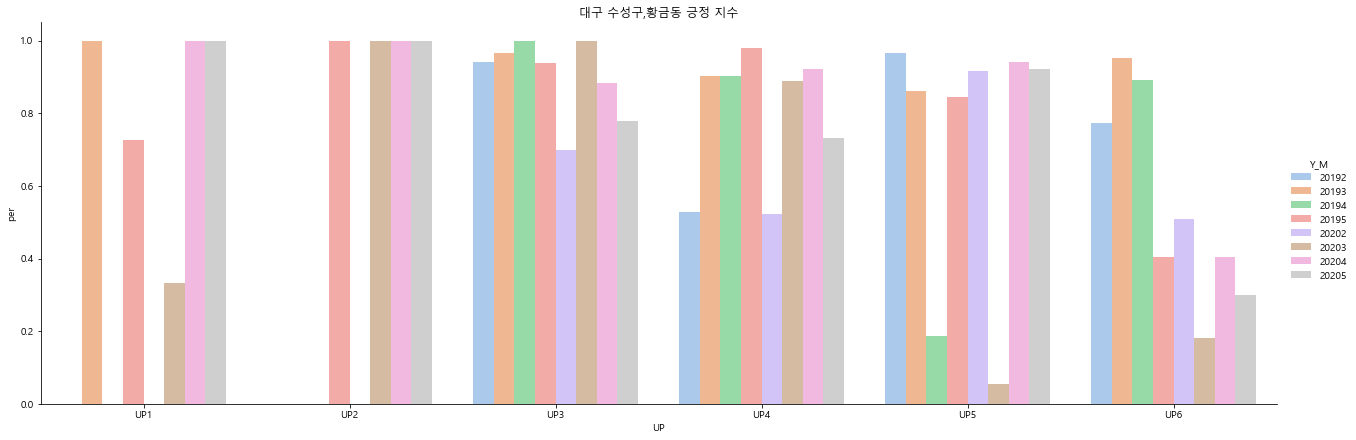

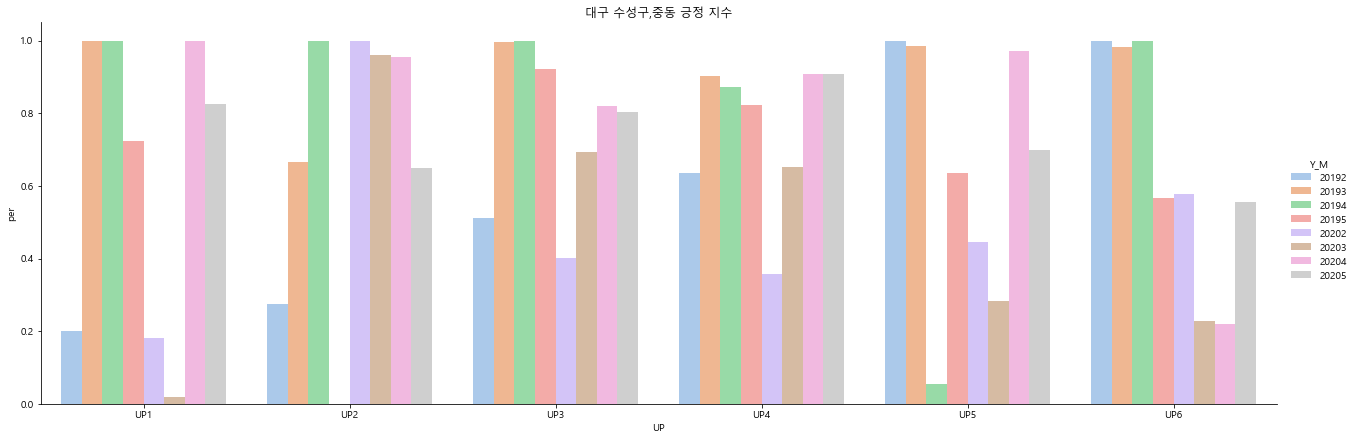

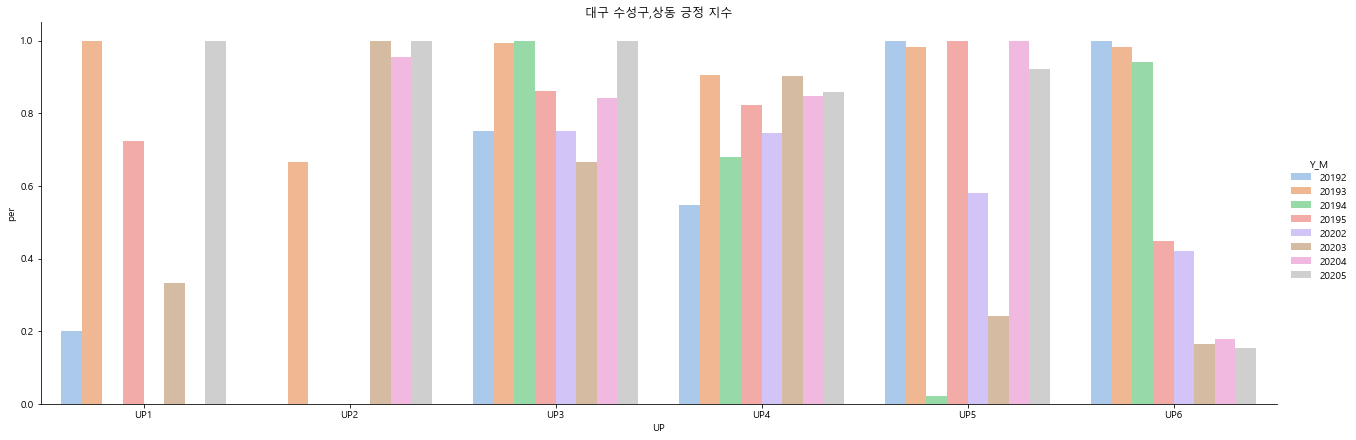

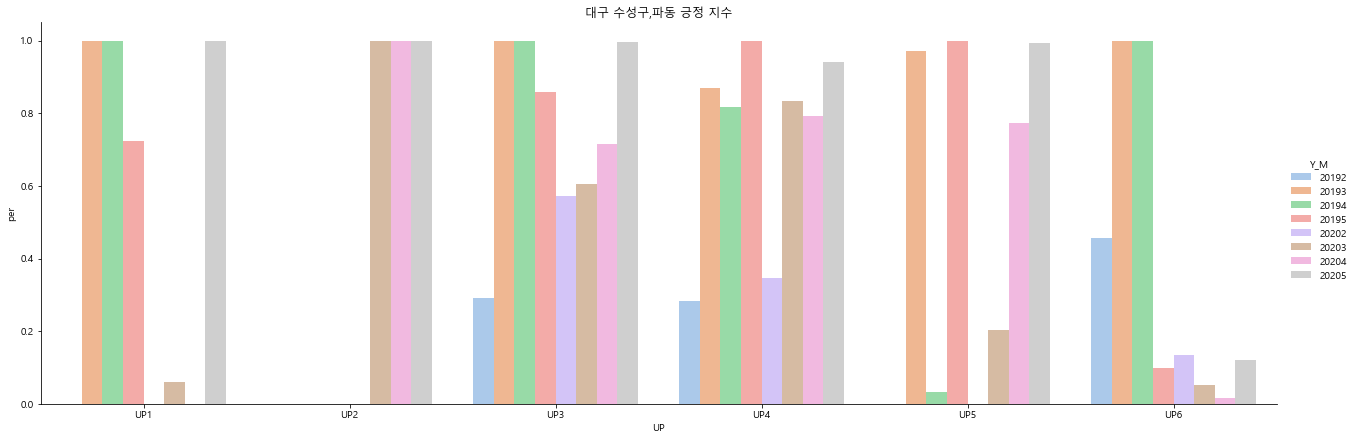

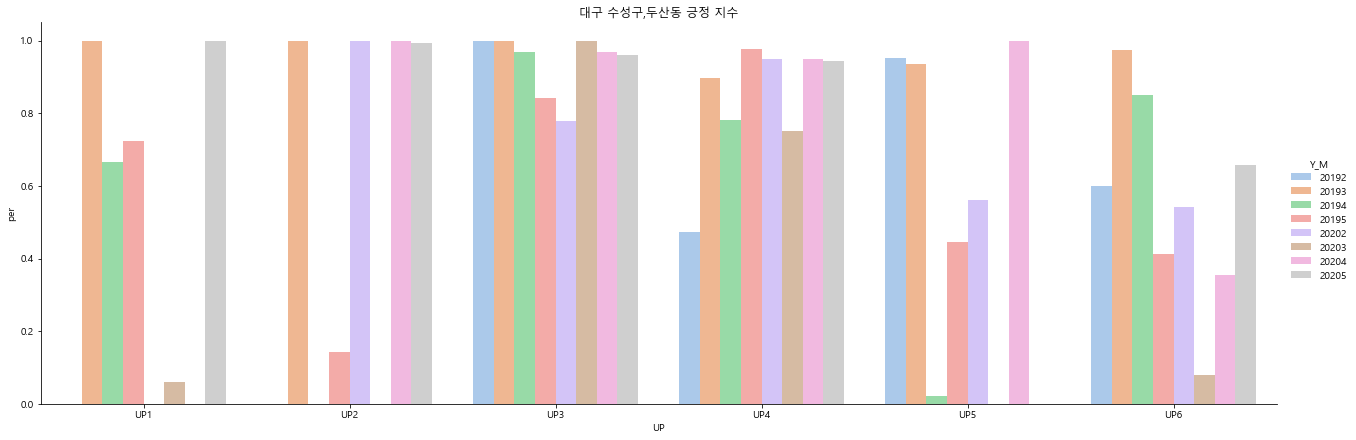

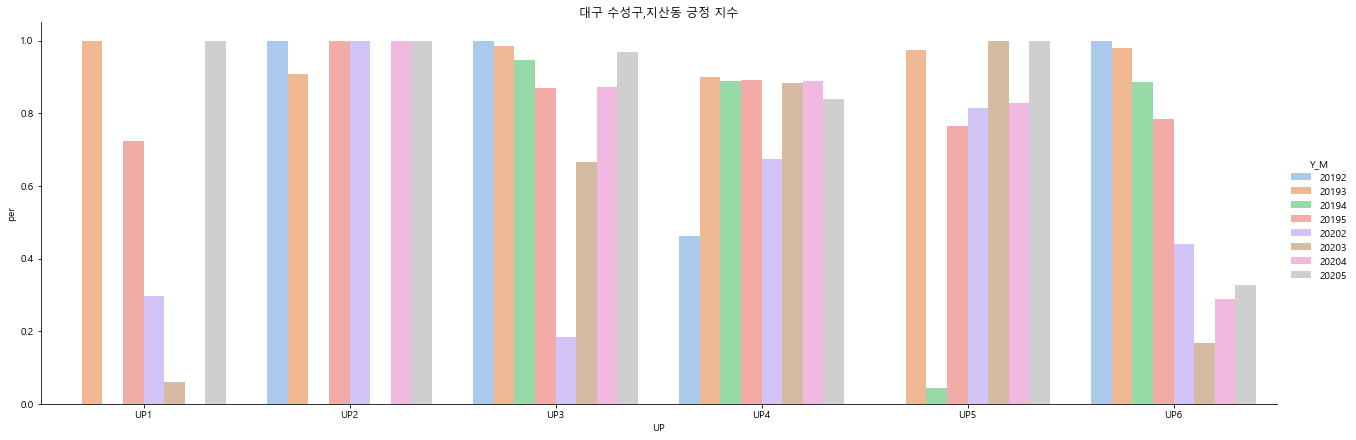

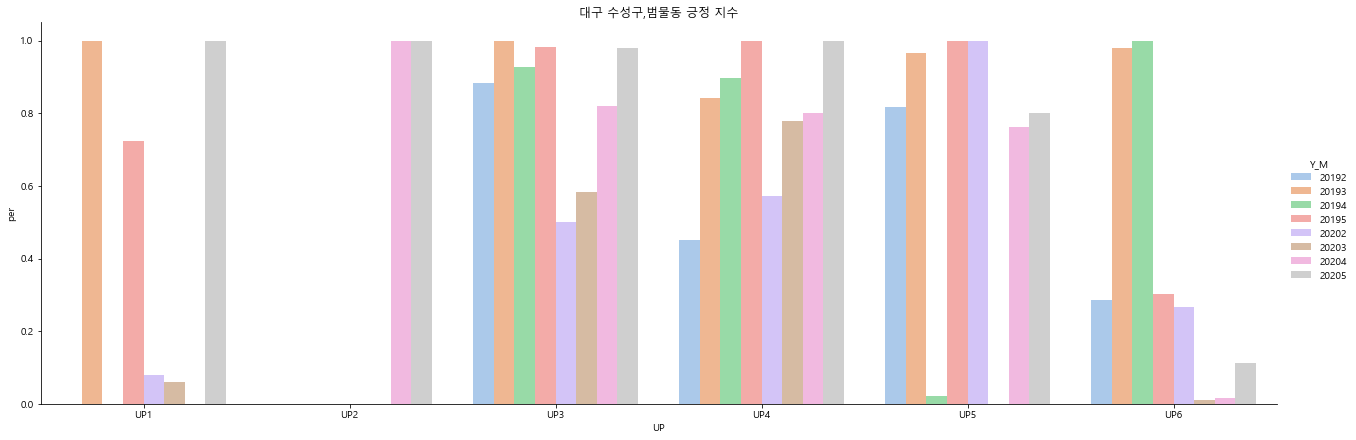

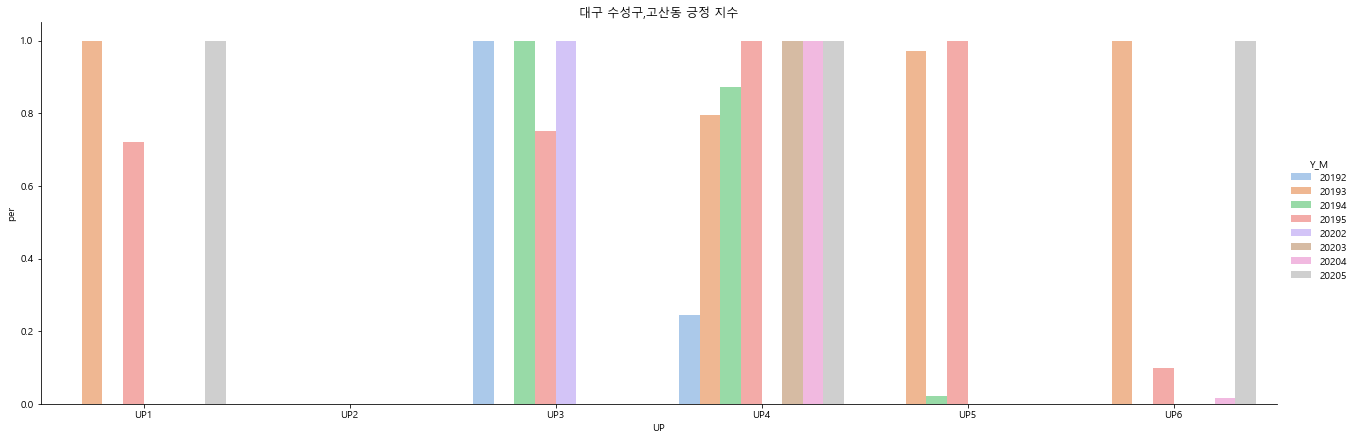

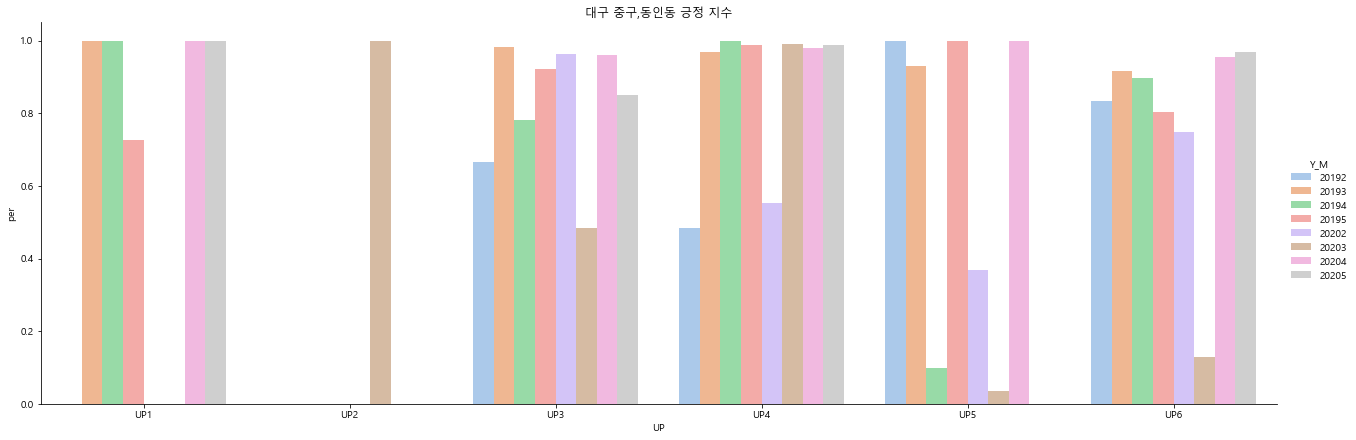

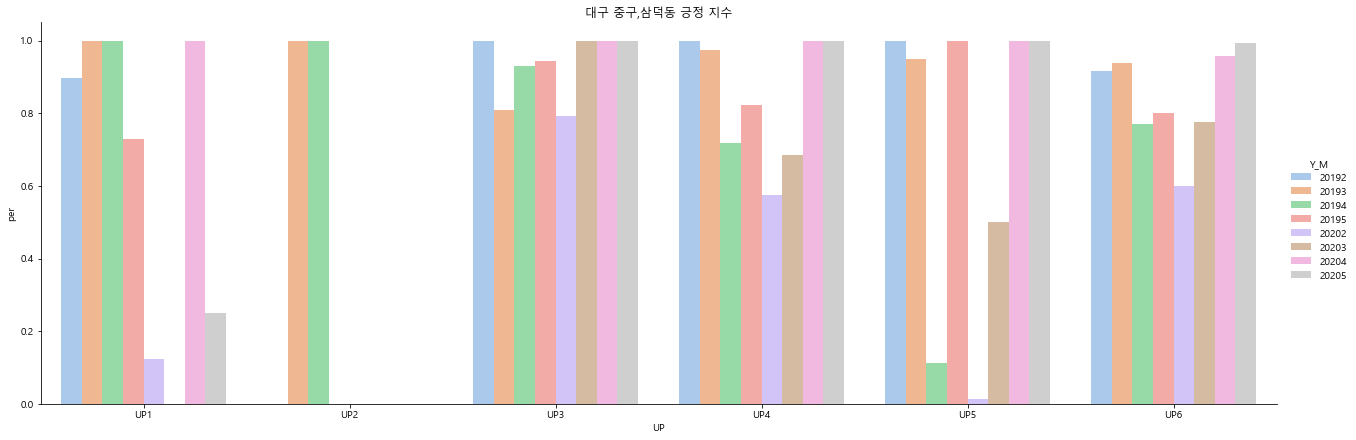

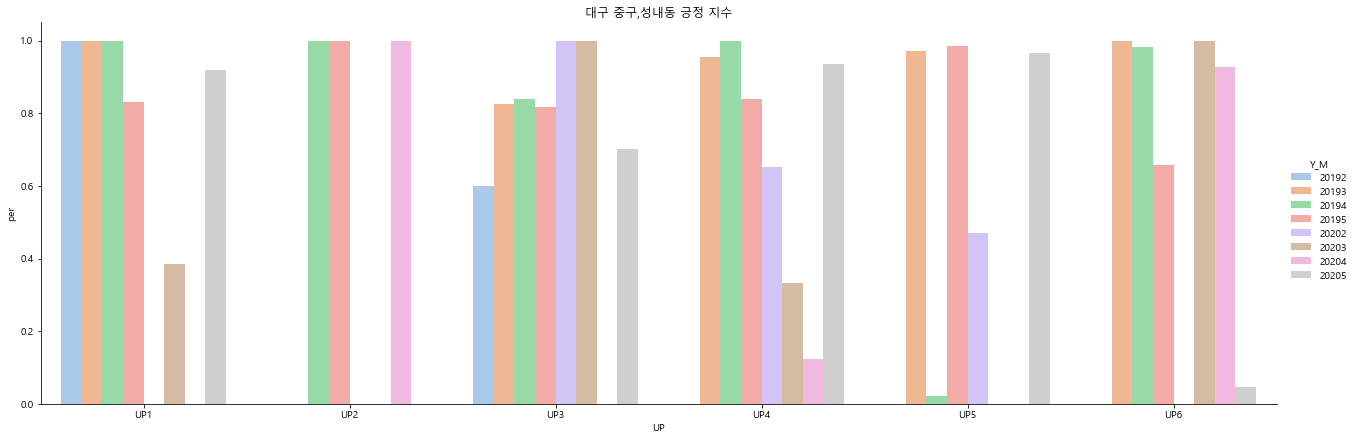

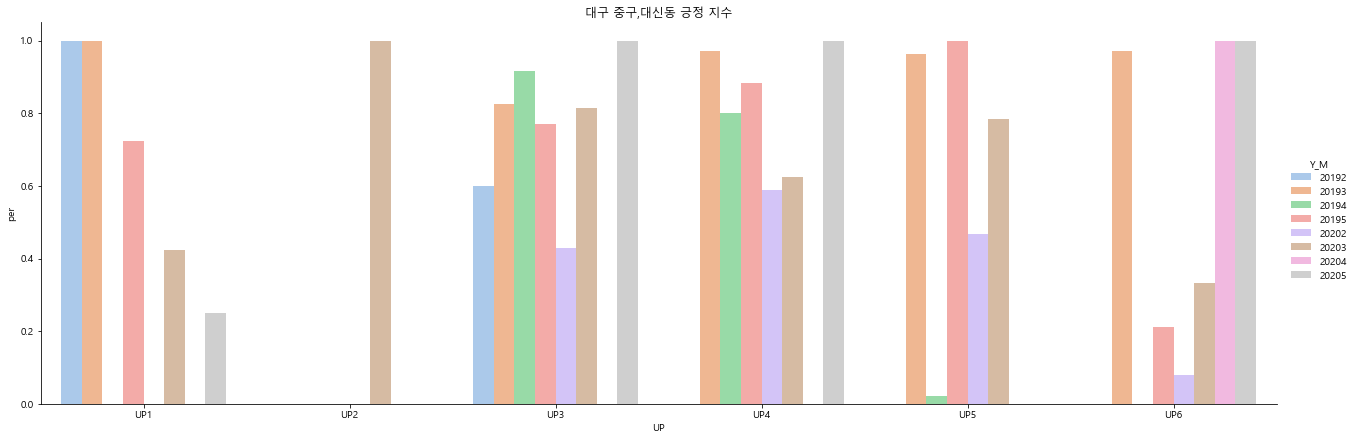

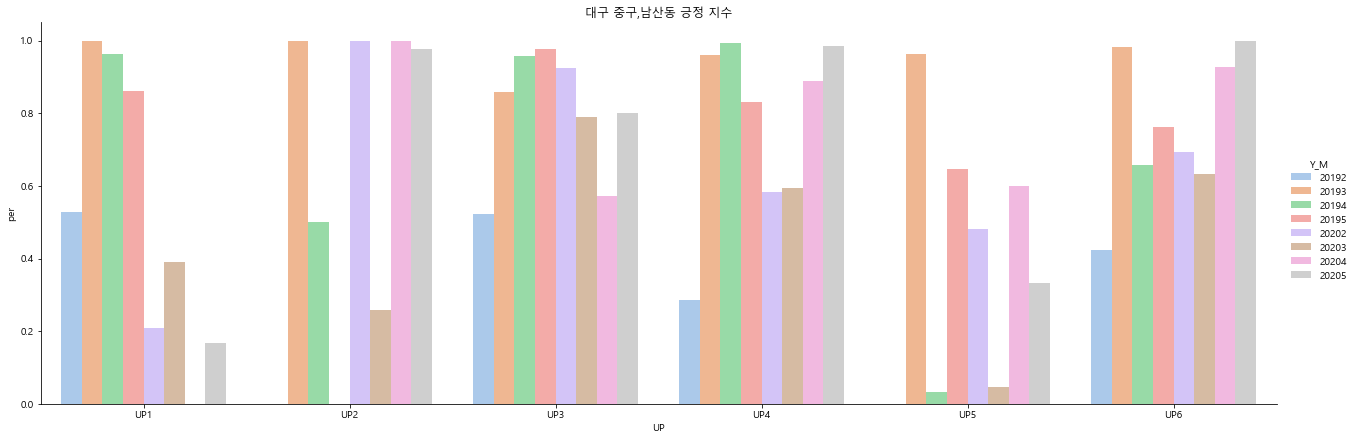

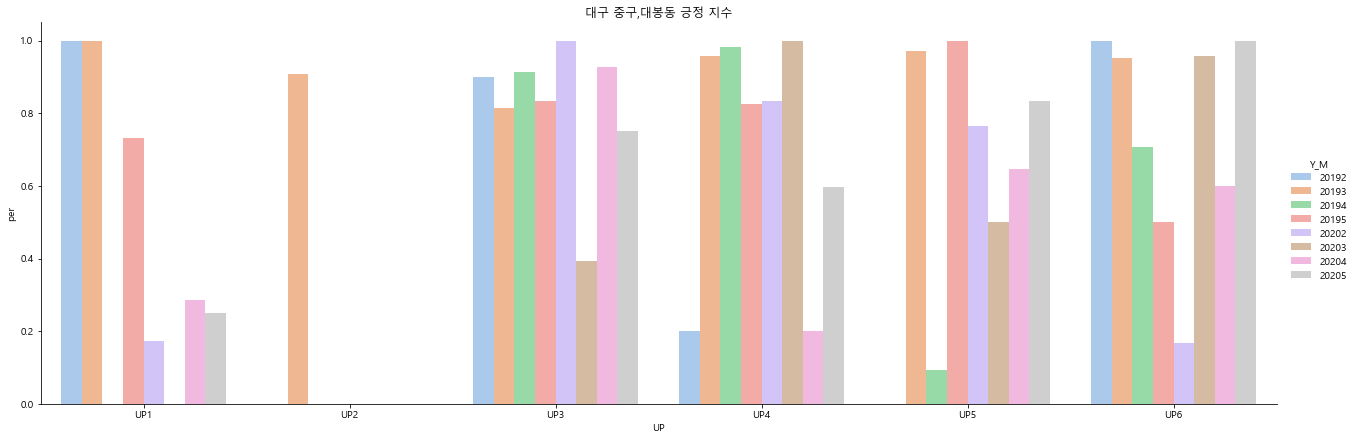

In [22]:
## 행정동 업종별 긍정지수 :: (긍정 언급량 - 부정 언급량) / 총 언급량 => 군집화 지표로 사용 고려

pg = f.groupby(['GU_DONG', 'YEAR', 'MONTH','UP'])['CNT'].sum().reset_index()
gd = f['GU_DONG'].unique()
pg0 = f.groupby(['GU_DONG', 'YEAR', 'MONTH','UP'])['CNT'].sum().reset_index()['CNT']
pg21 = f[f['CAT'].str.contains('POS')].groupby(['GU_DONG', 'YEAR', 'MONTH','UP'])['CNT'].sum().reset_index()['CNT']

r = (pg21/pg0).fillna(0)
pg['per'] = r

for d in gd:
    temp = pg.loc[pg['GU_DONG']==d, :]
    temp['Y_M'] = temp['YEAR'].apply(lambda x:str(x))+temp['MONTH'].apply(lambda x:str(x))
    sns.catplot(data=temp, x='UP', y='per', size=6, aspect=3, kind='bar', hue='Y_M')
    plt.title(d + ' 긍정 지수')

In [23]:
pg['Y_M'] = pg['YEAR'].apply(lambda x:str(x))+'0'+pg['MONTH'].apply(lambda x:str(x))

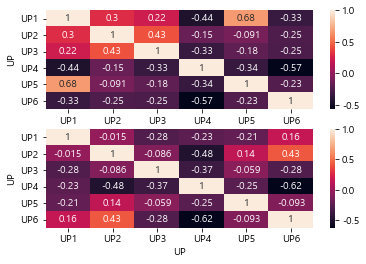

<Figure size 936x936 with 0 Axes>

In [24]:
## 부록 - 업종 간 상관계수 :: (상)2019년 업종 상관계수 (하)2020년 업종 상관계수
pp = f.groupby(['GU_DONG', 'YEAR','UP'])['CNT'].sum().reset_index()
up_year_total = pd.pivot_table(pp, index=['GU_DONG','YEAR'], columns='UP', values='CNT')
up_per = up_year_total.apply(lambda x : round(x/up_year_total.sum(axis=1)*100,2))

fig, (ax1, ax2) = plt.subplots(2,1)
sns.heatmap(up_per.query('YEAR == 2019').corr(), annot=True, ax=ax1)
sns.heatmap(up_per.query('YEAR == 2020').corr(), annot=True, ax=ax2)

plt.figure(figsize=(13, 13))
plt.show()

2019년 언급 상관계수가 높은 업종은 보건위생과 숙박(+), 의료기관과 요식업소(-)
<br>
2020년 언급 상관계수가 높은 업종은 의료기관과 요식업소(-)

### 업종 별

#### 숙박

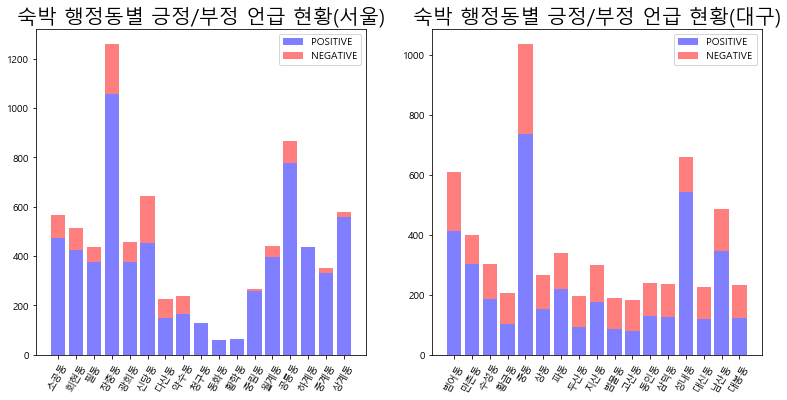

<Figure size 432x288 with 0 Axes>

In [25]:
## 숙박 : 장충동과 중동에서 언급이 많고, 언급량이 적은 곳에서 비교적 부정적 언급의 비중이 높음.
##        서울보다 대구에서 부정적 언급 비율이 조금 더 높음

plt.figure(figsize=(13, 6))

plt.subplot(121)
df2_pos_S = df0[df0['CAT'].str.startswith('UP1_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df2_neg_S = df0[df0['CAT'].str.startswith('UP1_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df0.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df0.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df2_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df2_neg_S, color='r', alpha=alpha,
             bottom=df2_pos_S) # stacked bar chart
plt.title('숙박 행정동별 긍정/부정 언급 현황(서울)', fontsize=20)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df2_pos_D = df0[df0['CAT'].str.startswith('UP1_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df2_neg_D = df0[df0['CAT'].str.startswith('UP1_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df0.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df0.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df2_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df2_neg_D, color='r', alpha=alpha,
             bottom=df2_pos_D) # stacked bar chart
plt.title('숙박 행정동별 긍정/부정 언급 현황(대구)', fontsize=20)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.show()
plt.tight_layout()

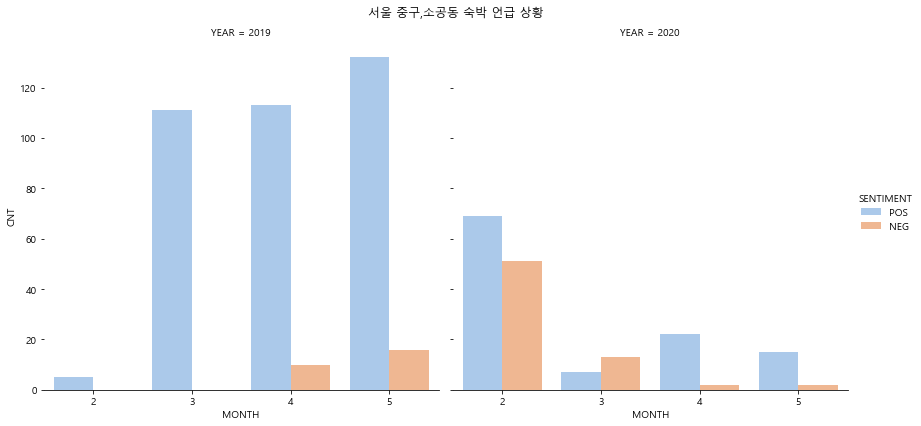

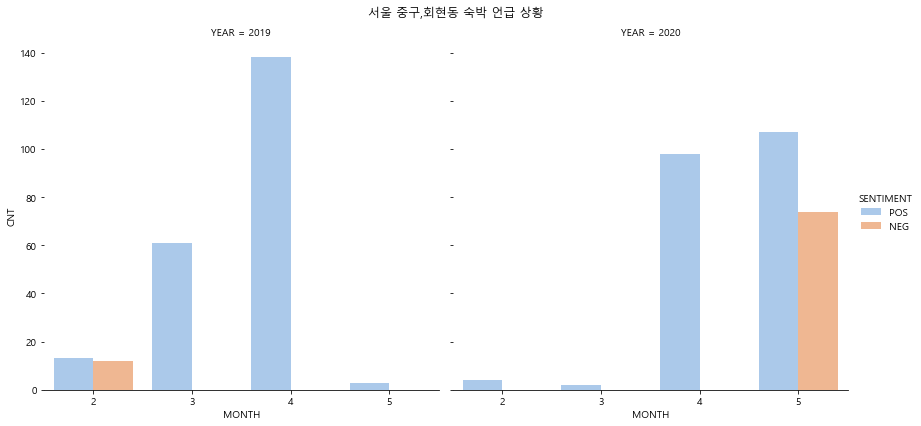

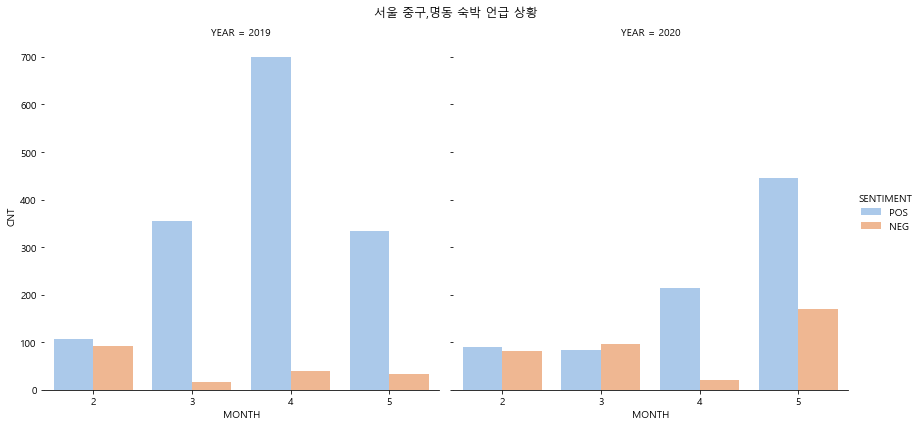

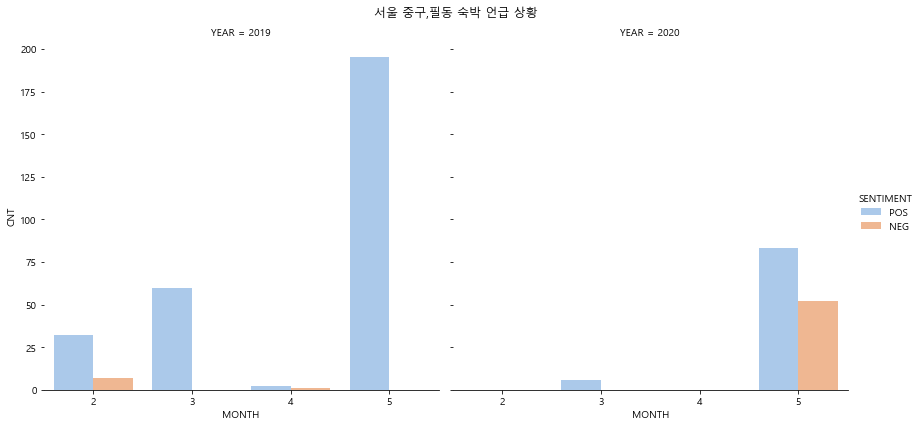

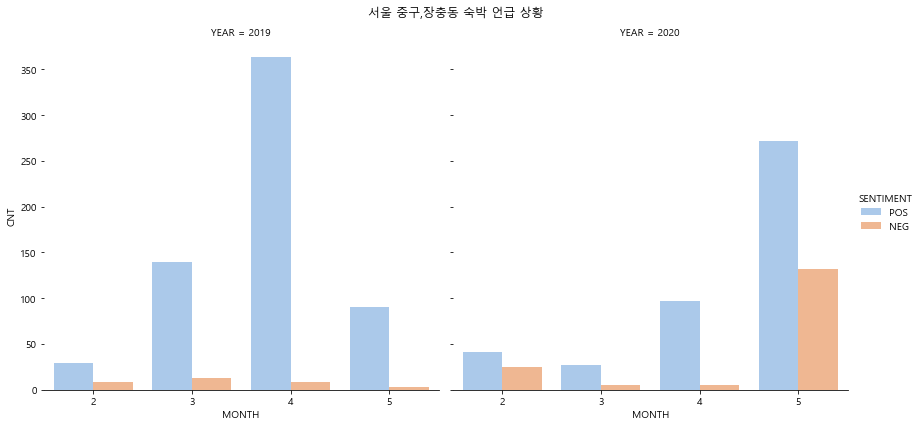

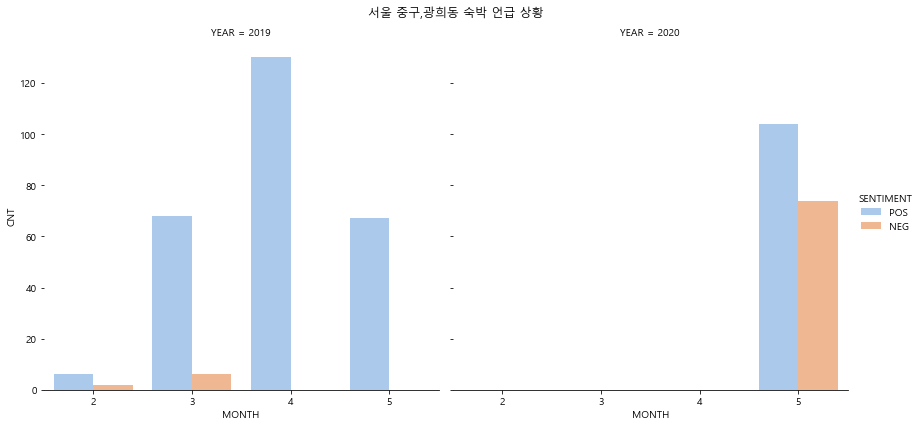

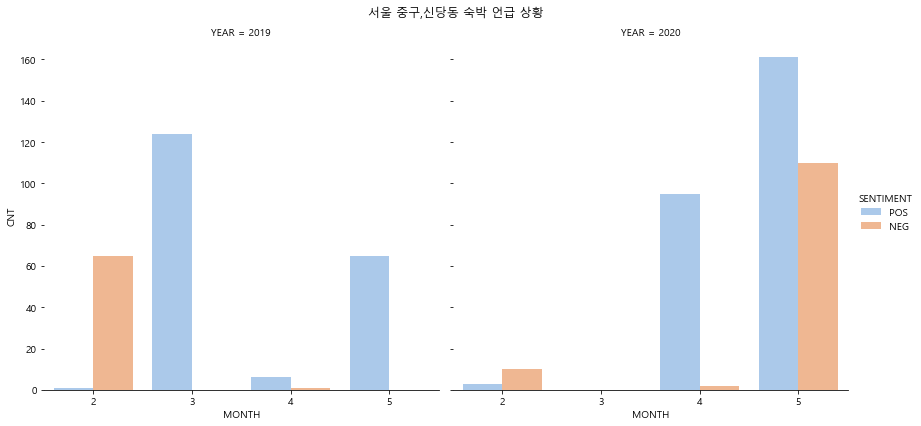

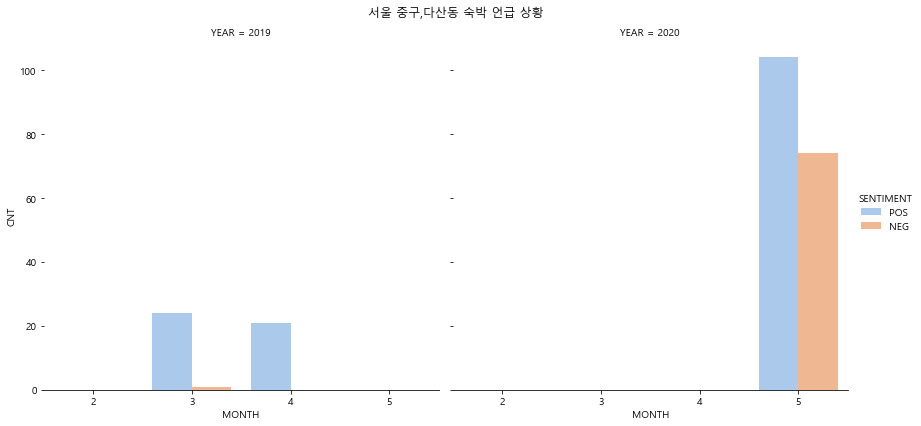

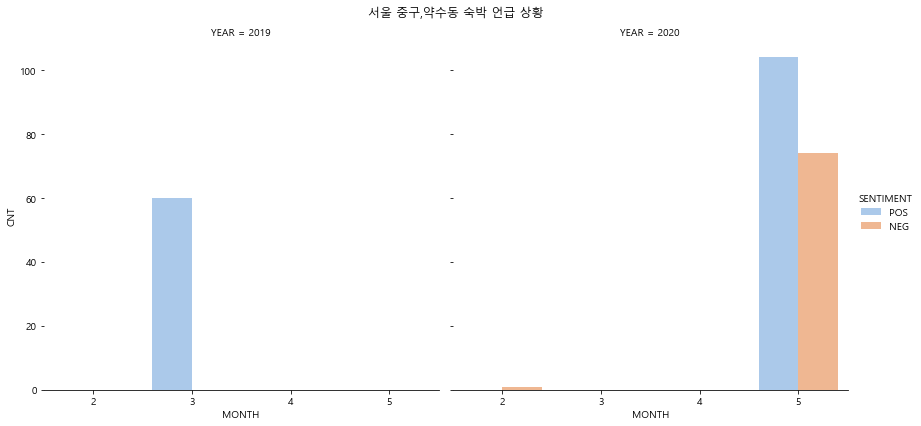

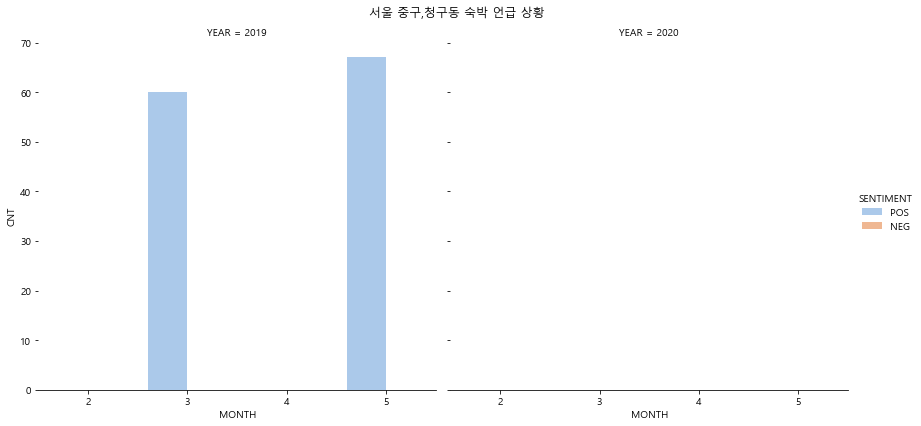

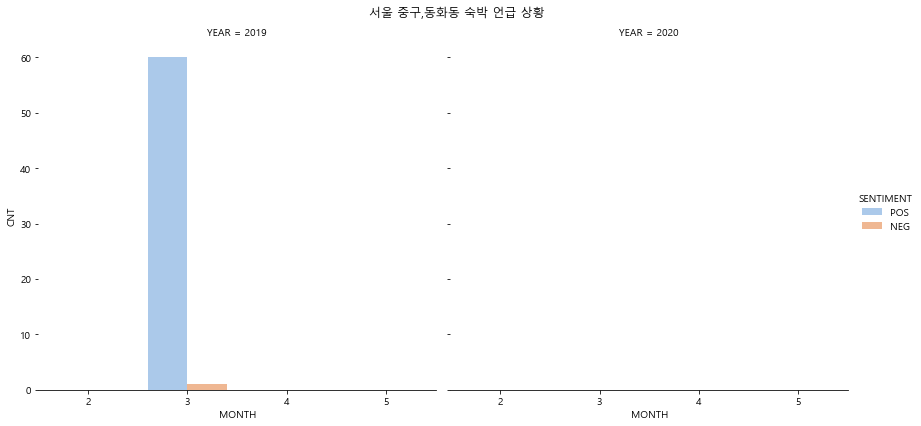

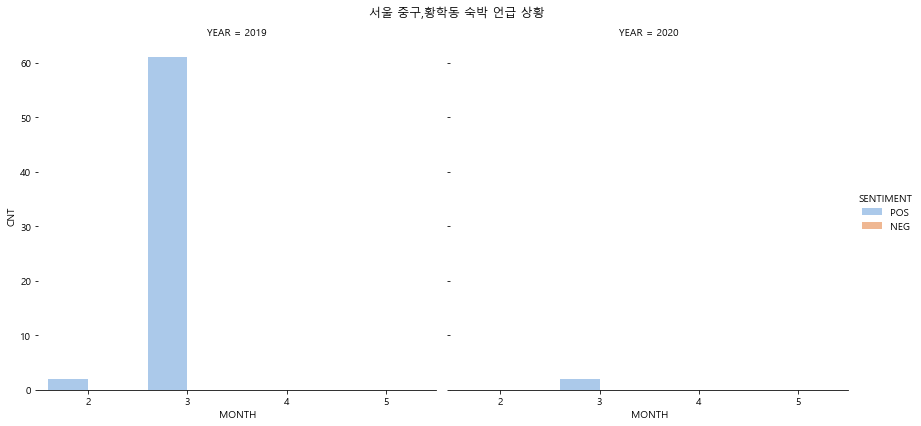

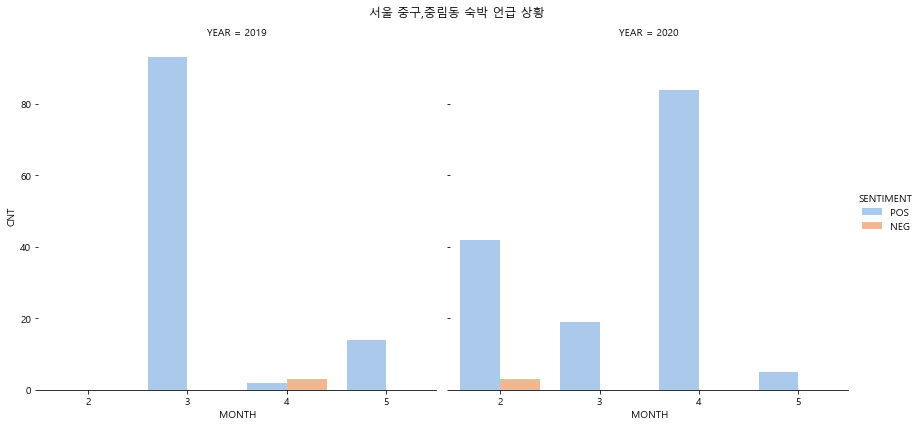

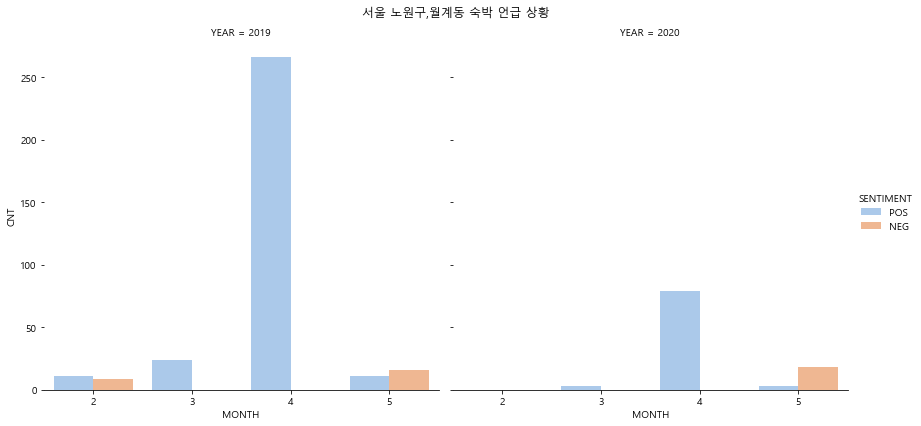

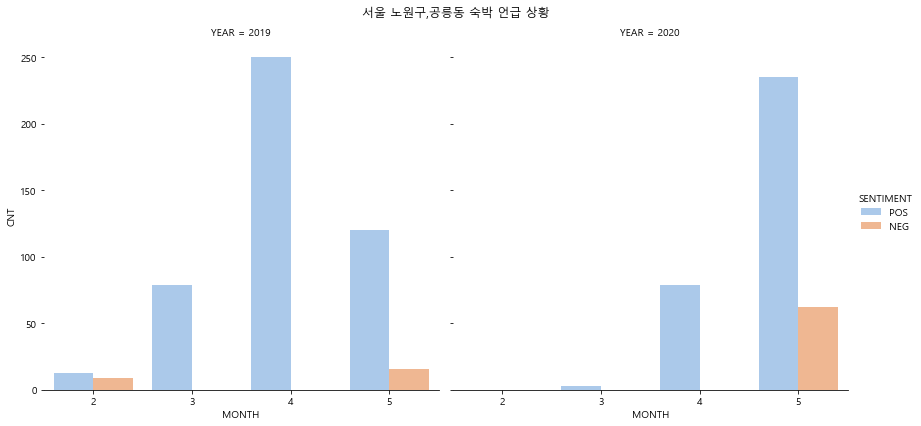

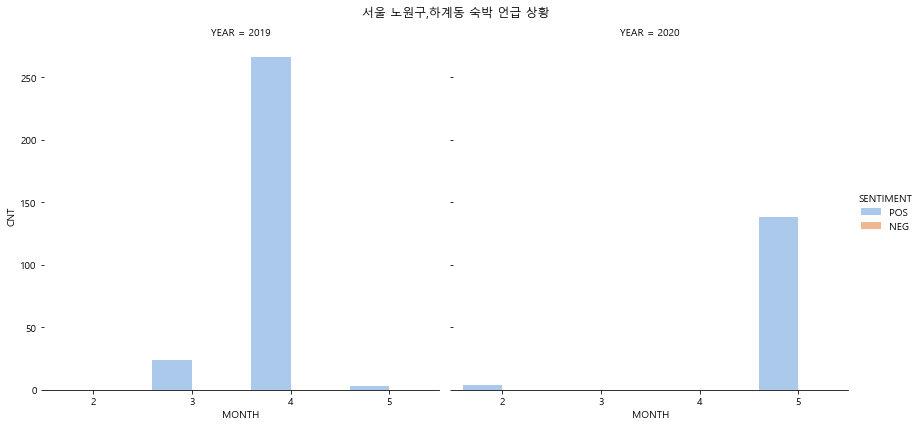

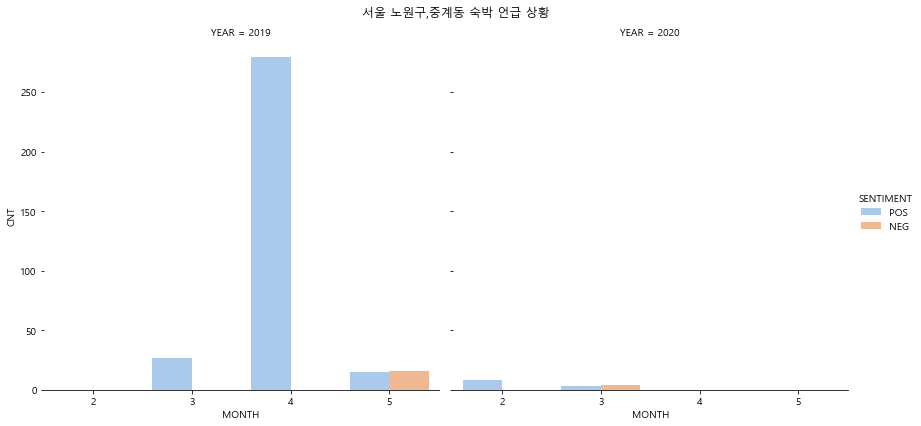

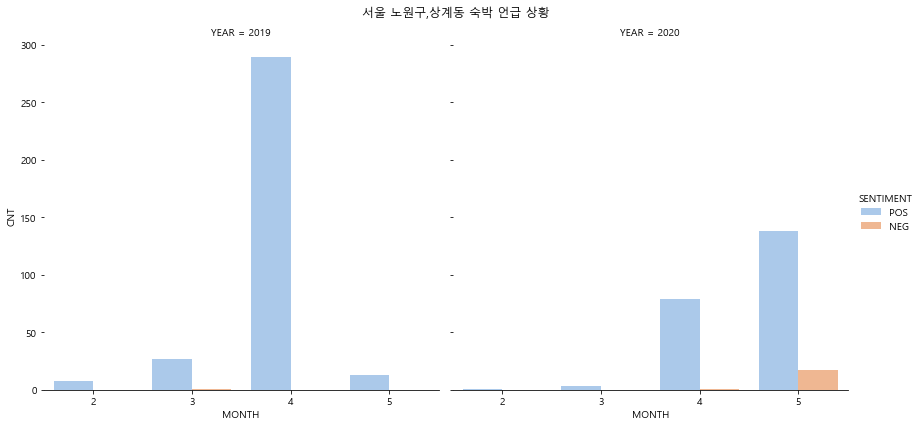

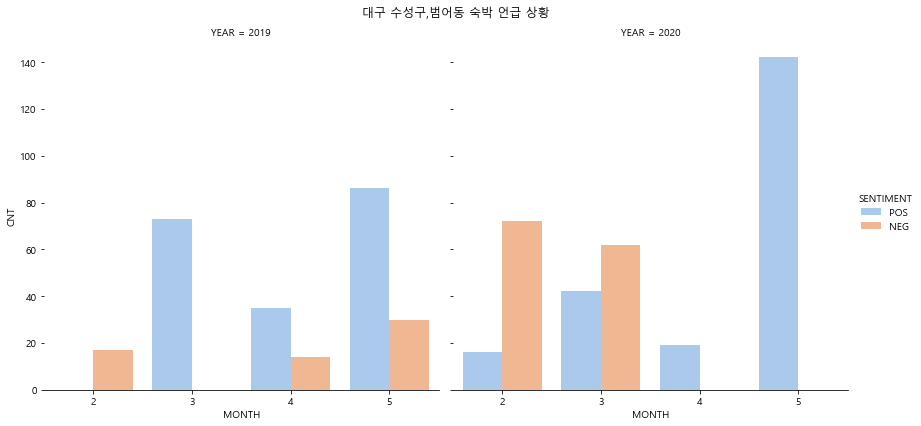

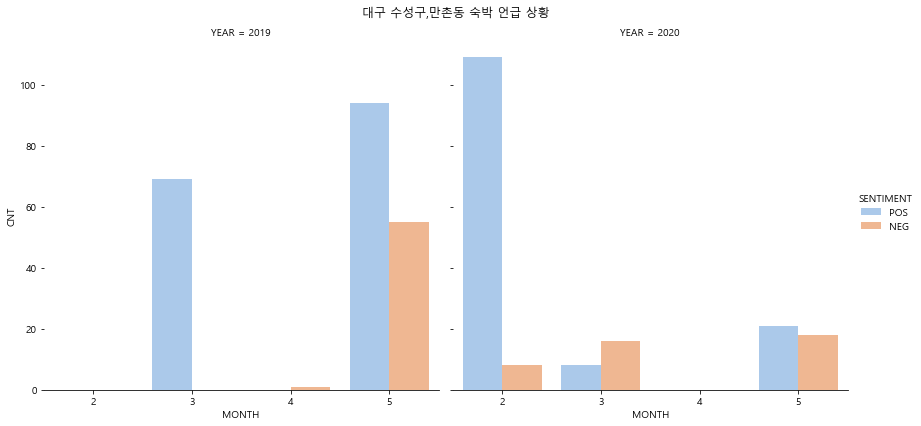

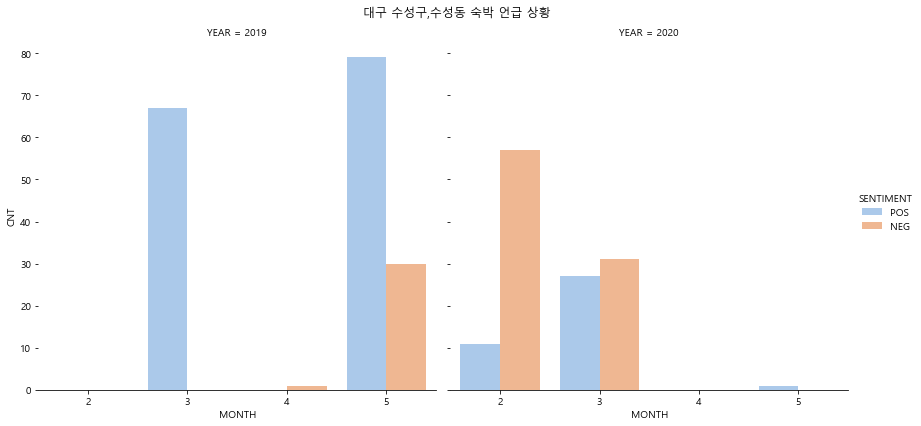

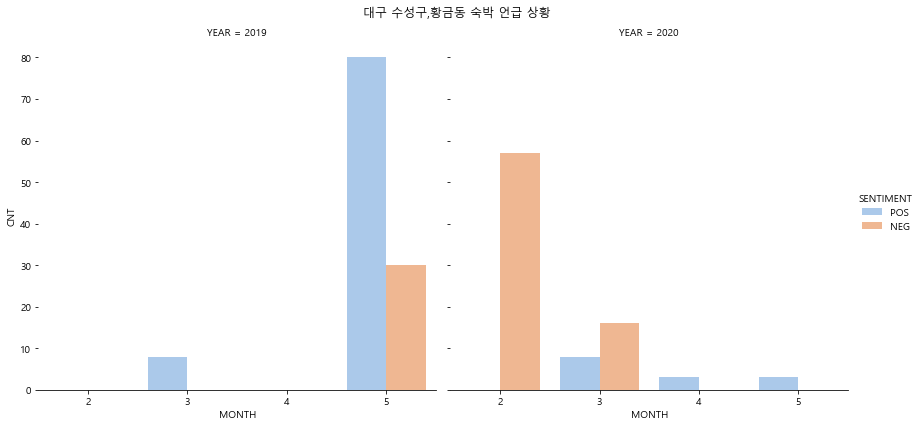

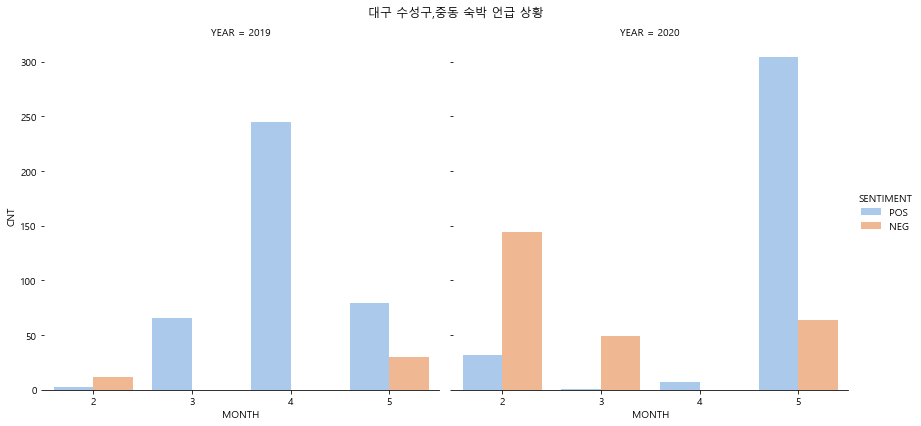

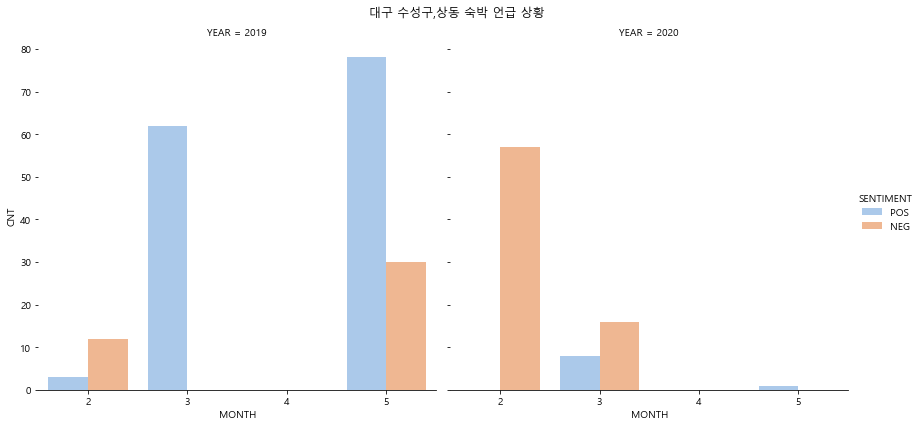

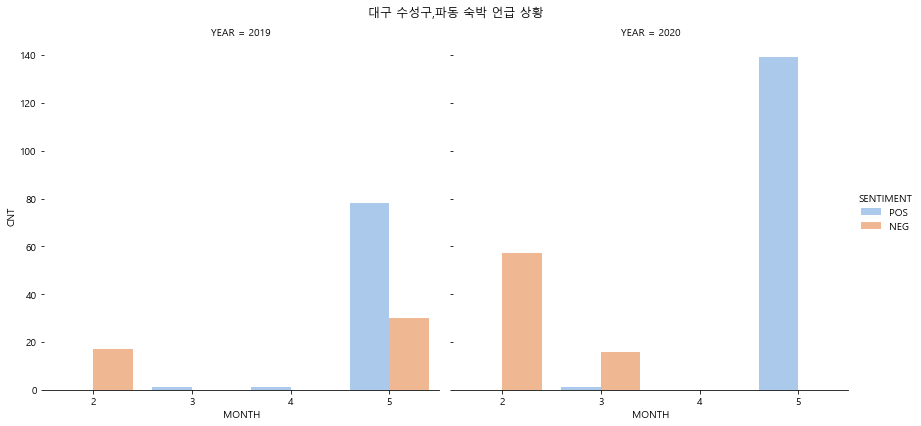

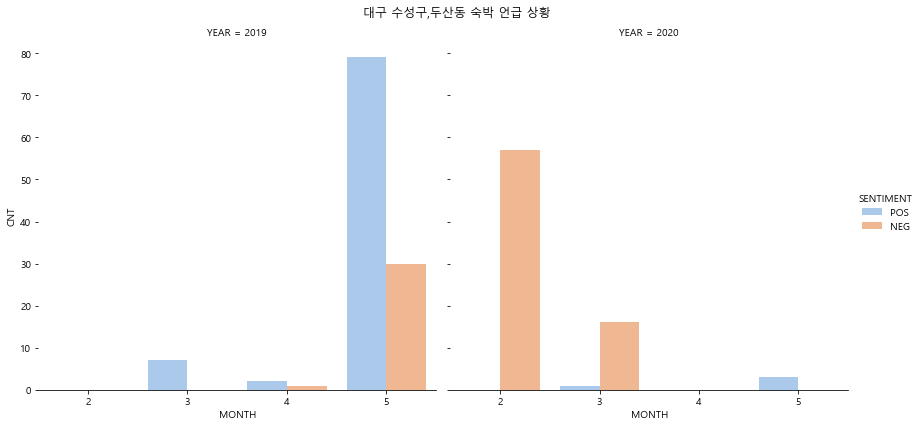

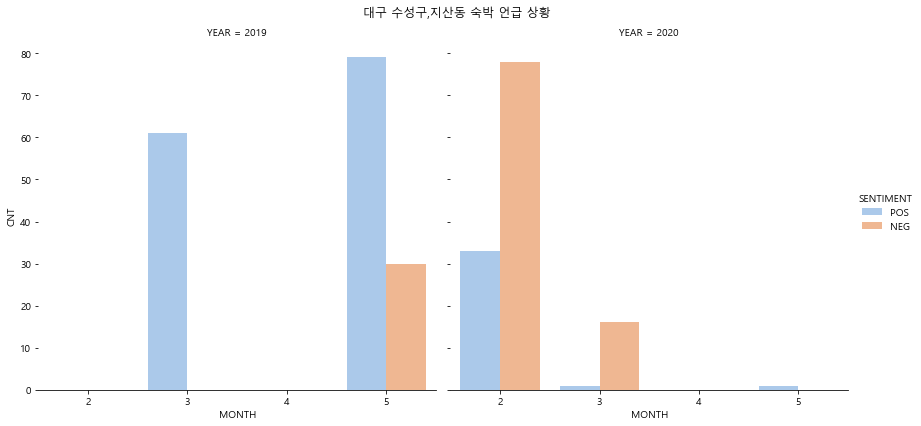

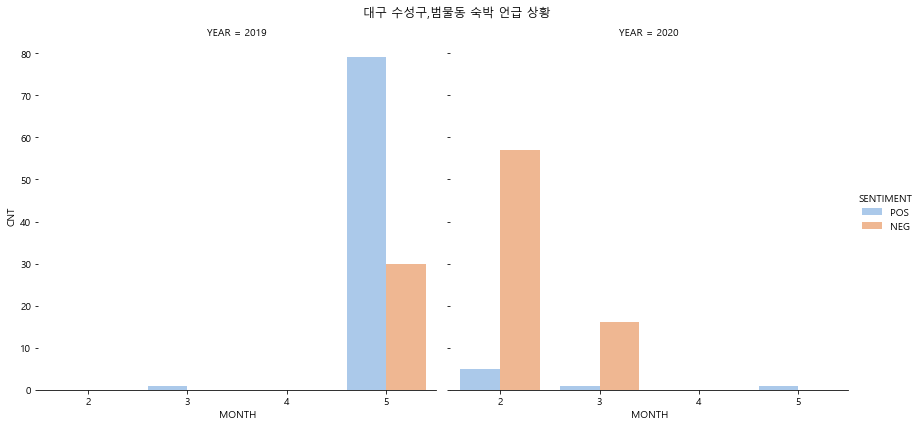

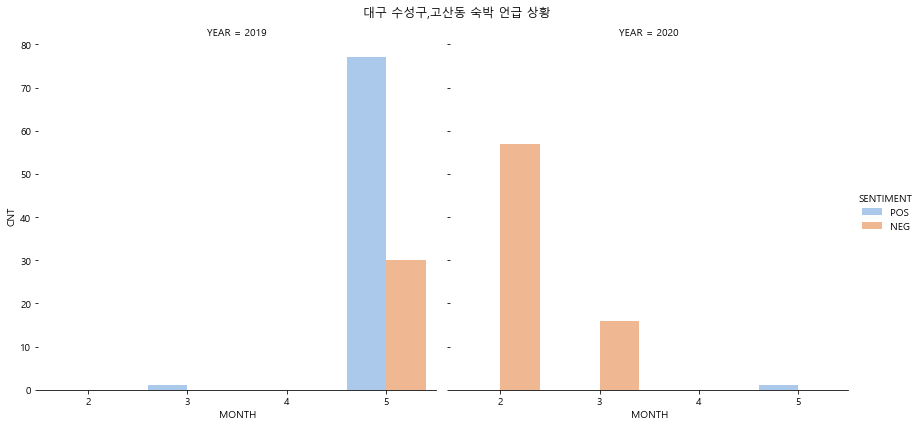

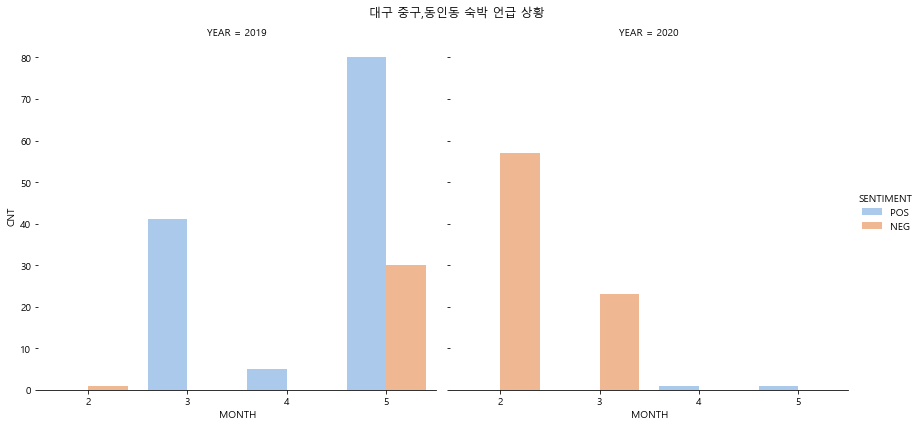

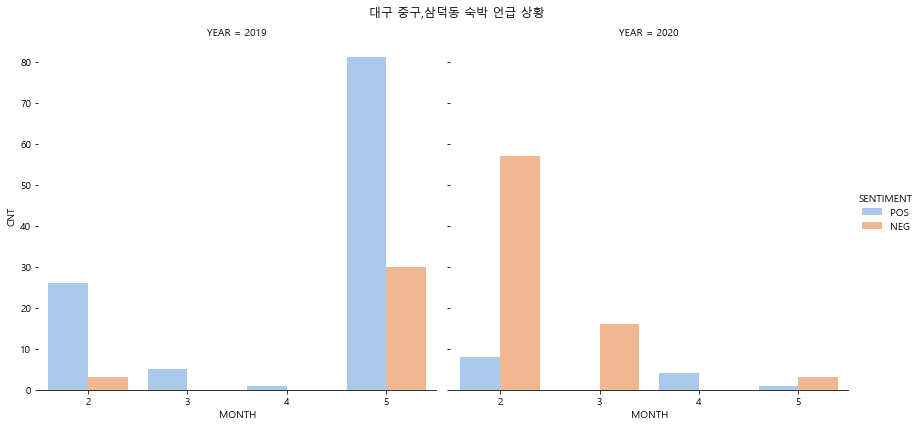

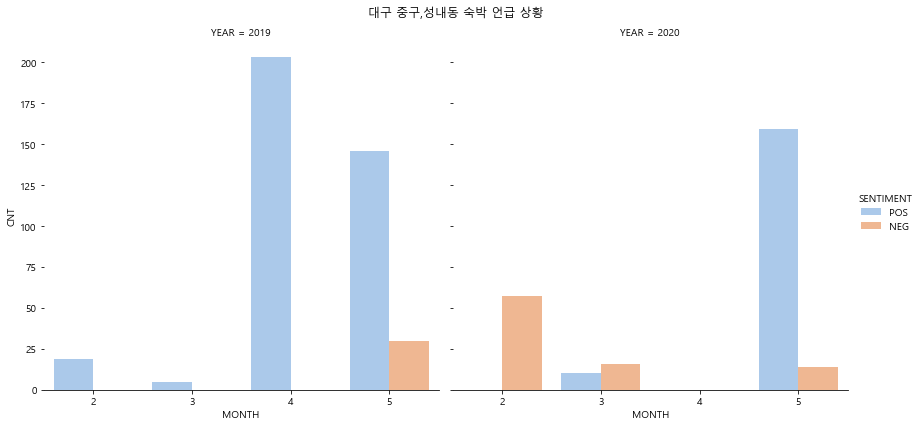

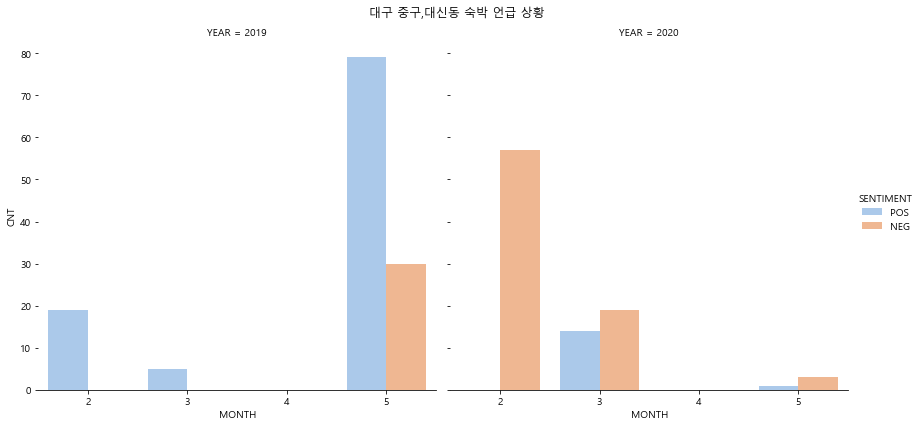

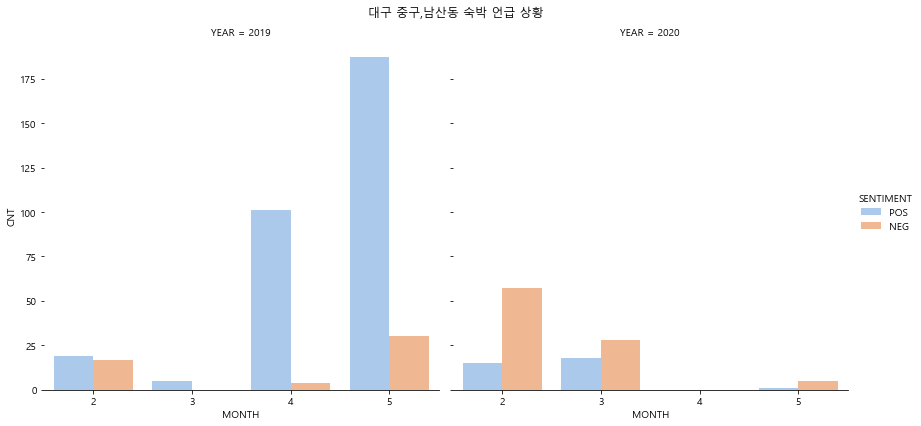

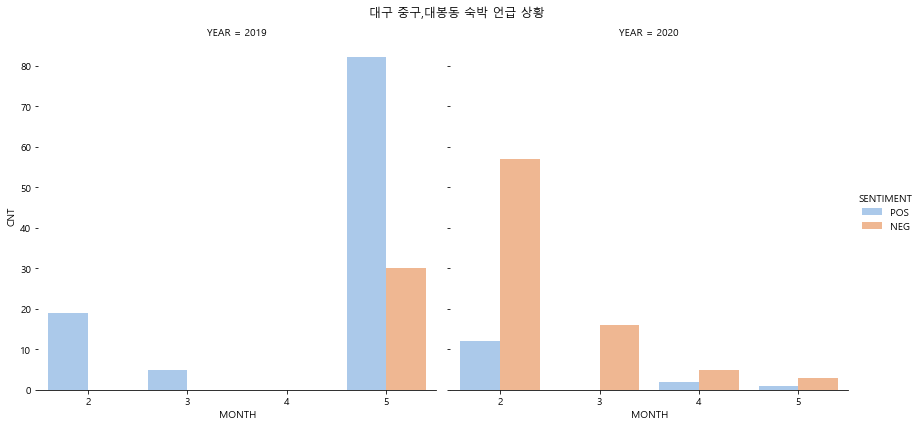

In [26]:
## 행정동별 숙박업 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP1"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 숙박 언급 상황')

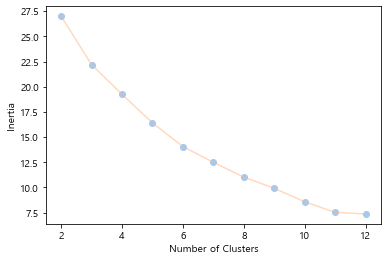

<Figure size 720x720 with 0 Axes>

In [27]:
up1 = pd.pivot_table(pg.query('UP == "UP1"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up1.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(up1.iloc[:,])
up1.columns = [' '.join(col).strip() for col in up1.columns.values]
up1['cls'] = kmeans.labels_
up1_per = pd.merge(up1.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

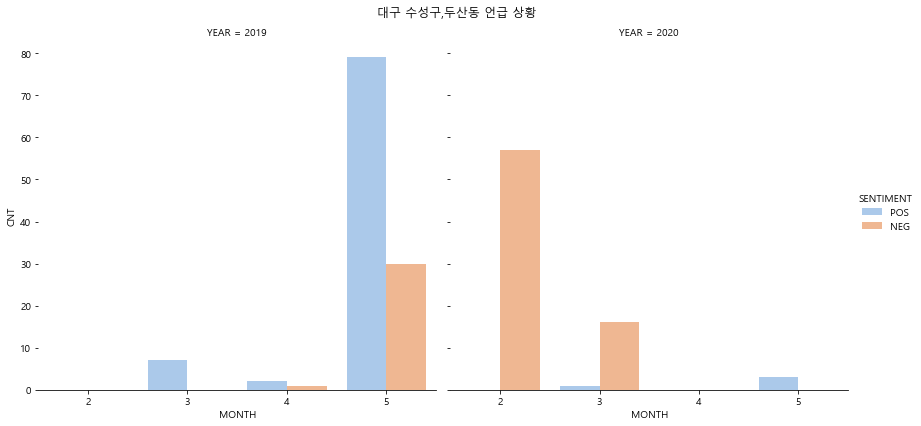

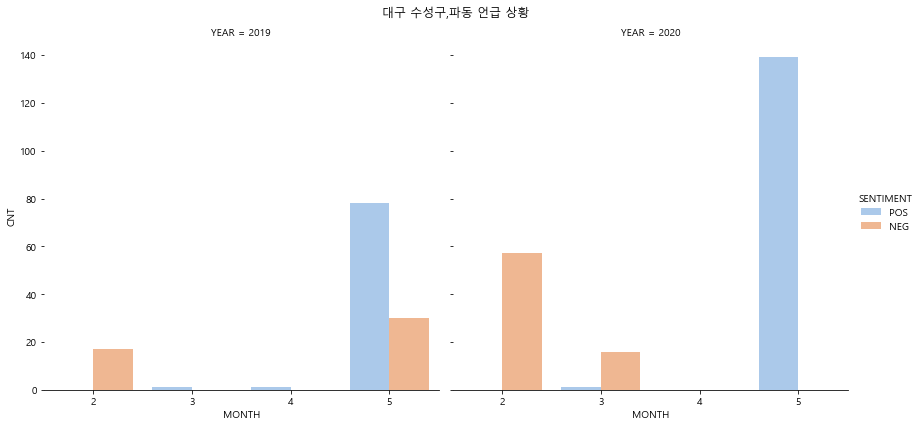

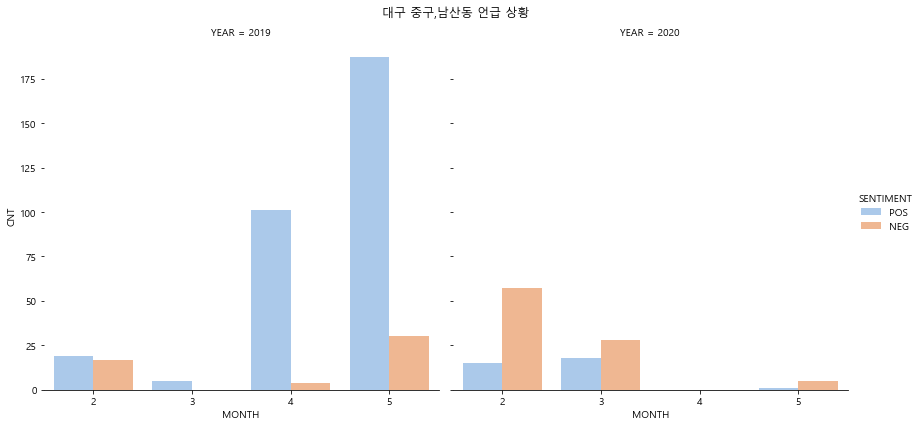

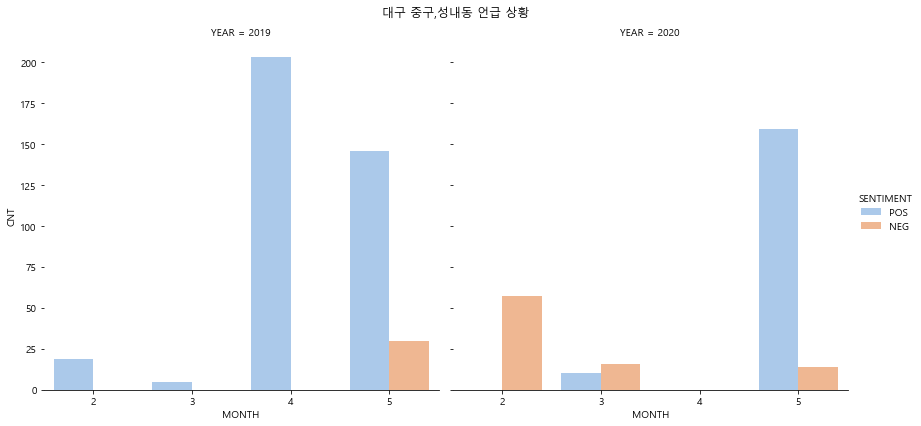

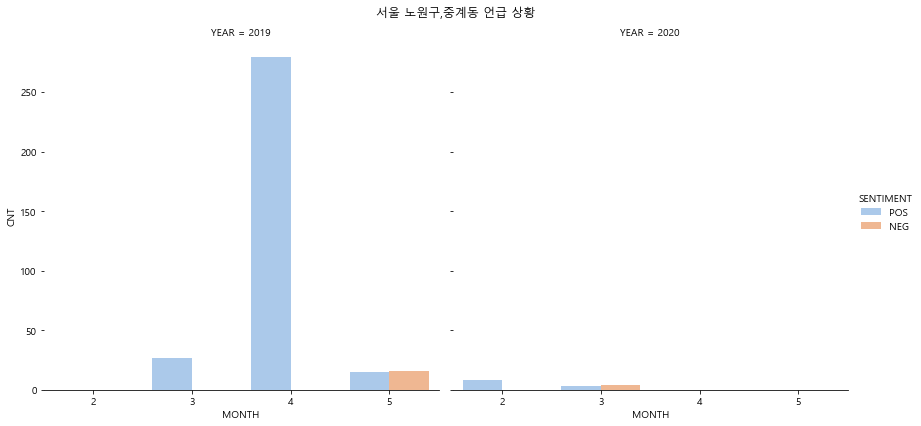

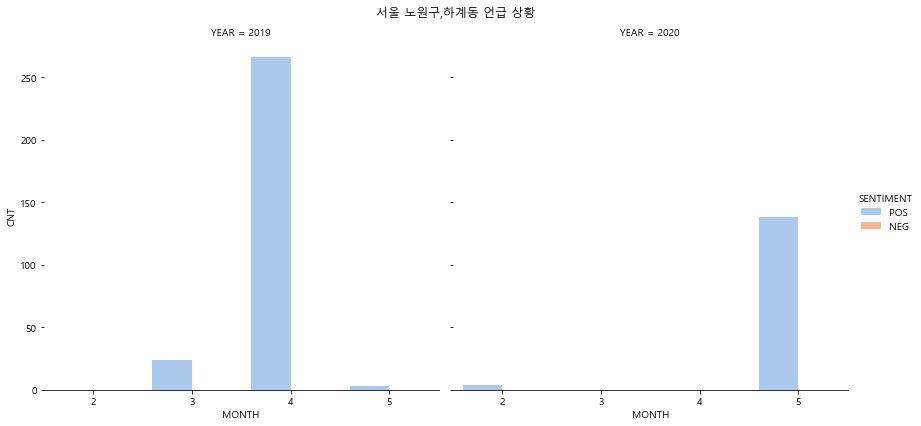

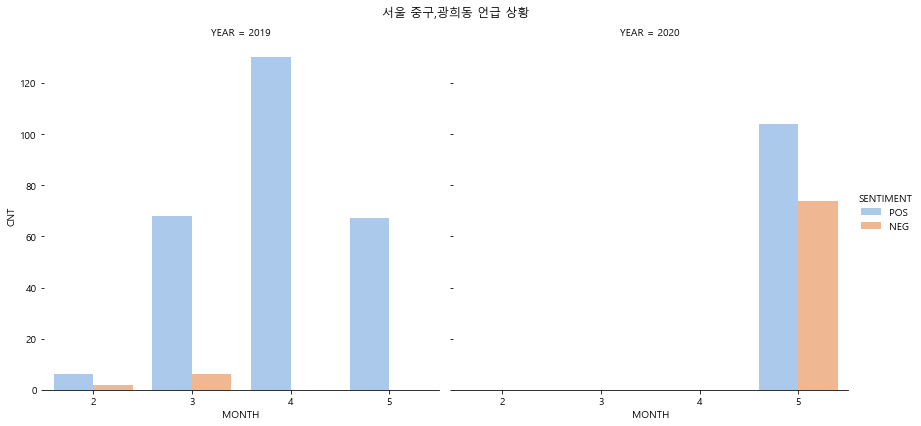

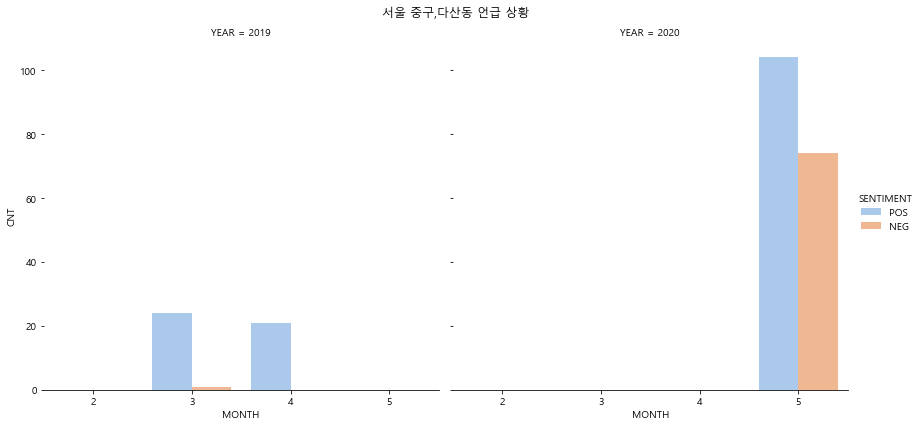

In [29]:
UPcluster(up1_per,3)

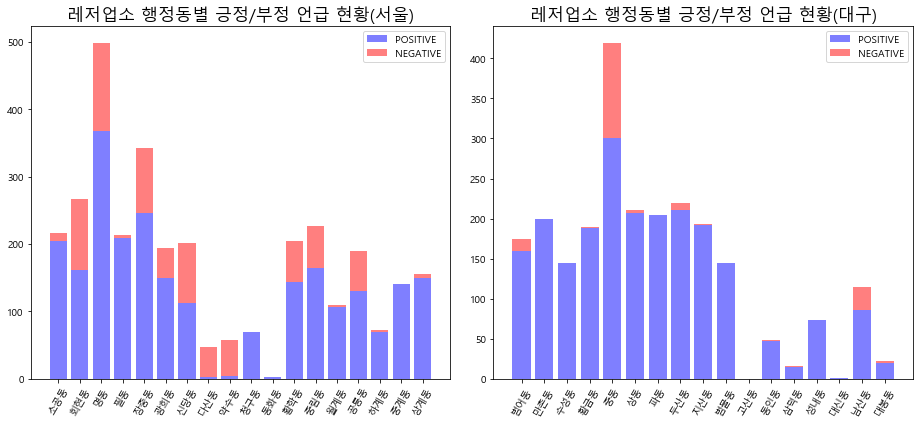

In [30]:
## 레저업소 : 서울은 명동, 대구는 중동의 언급량이 많은데 둘 다 부정적 언급도 많음. 
##            서울에서는 다산동과 약수동의 부정적 언급량이 긍정적인 쪽보다 더 많음.

plt.figure(figsize=(13, 6))

plt.subplot(121)
df21_pos_S = df[df['CAT'].str.startswith('UP2_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df21_neg_S = df[df['CAT'].str.startswith('UP2_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df21_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df21_neg_S, color='r', alpha=alpha,
             bottom=df21_pos_S) # stacked bar chart
plt.title('레저업소 행정동별 긍정/부정 언급 현황(서울)', fontsize=17)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df21_pos_D = df[df['CAT'].str.startswith('UP2_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df21_neg_D = df[df['CAT'].str.startswith('UP2_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df21_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df21_neg_D, color='r', alpha=alpha,
             bottom=df21_pos_D) # stacked bar chart
plt.title('레저업소 행정동별 긍정/부정 언급 현황(대구)', fontsize=17)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.tight_layout()
plt.show()

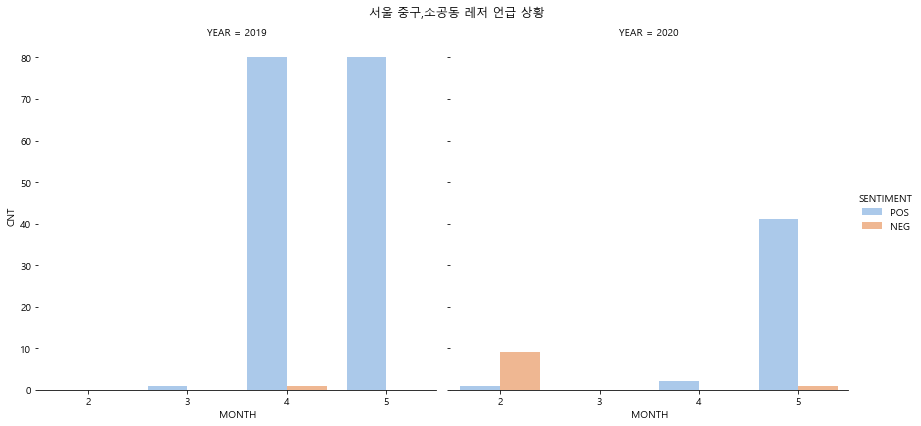

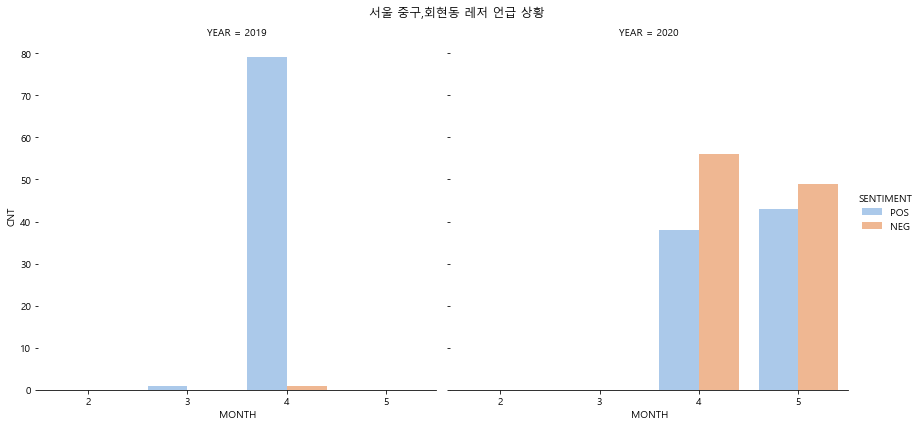

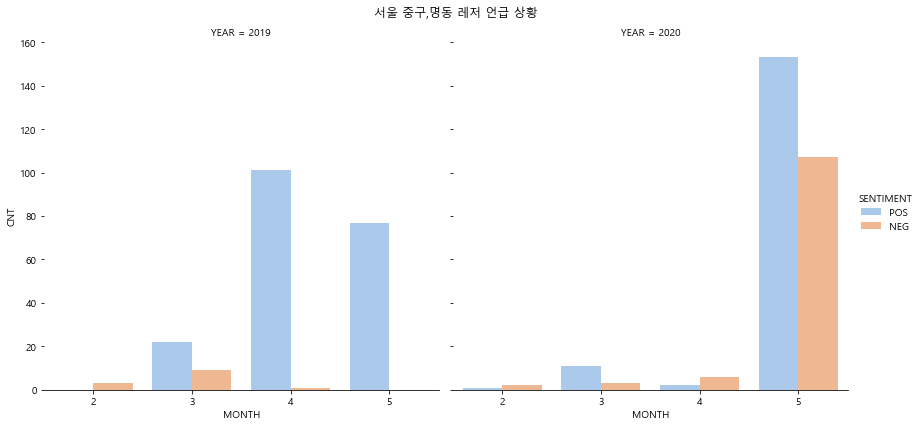

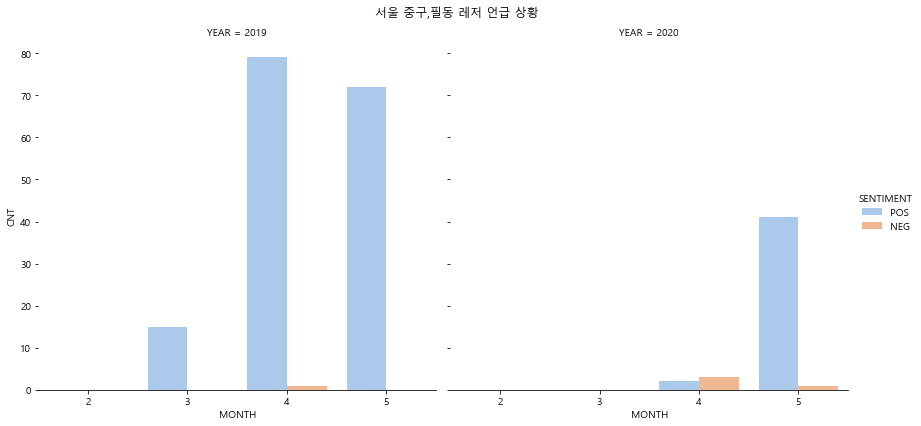

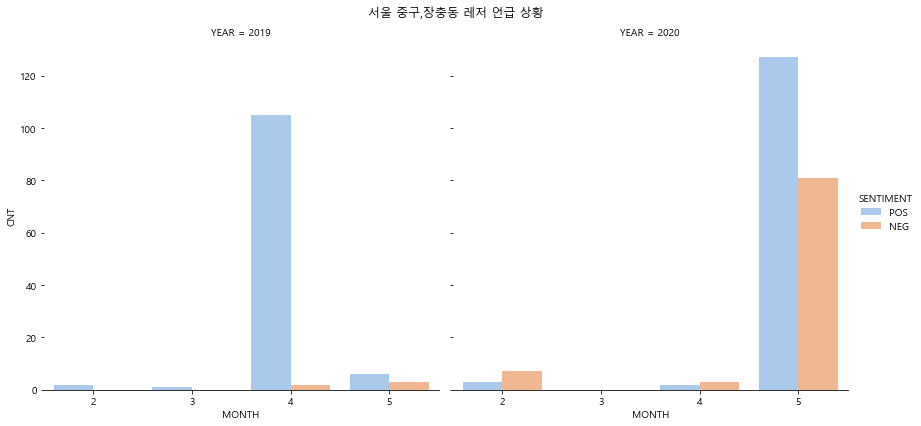

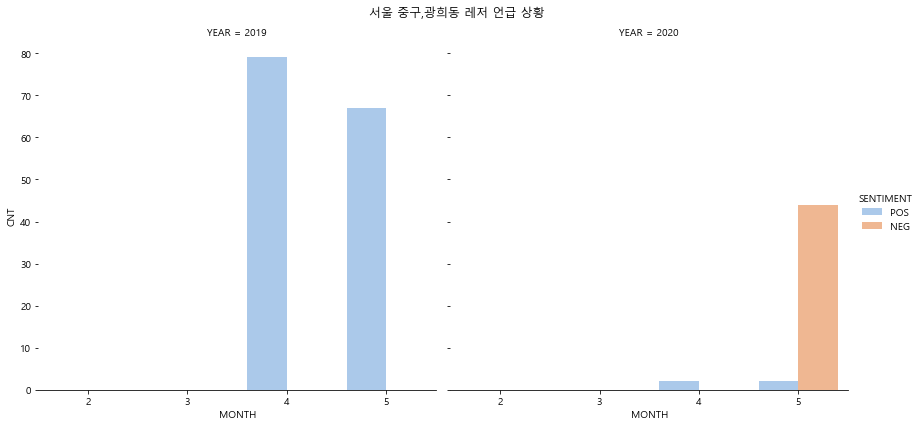

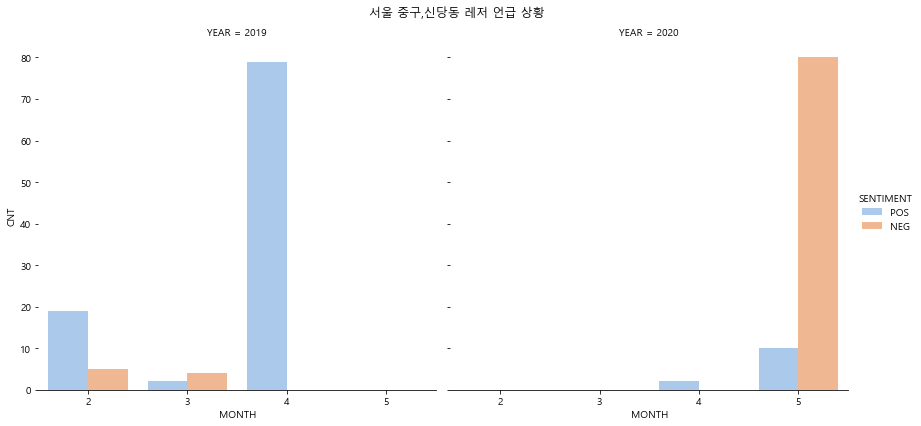

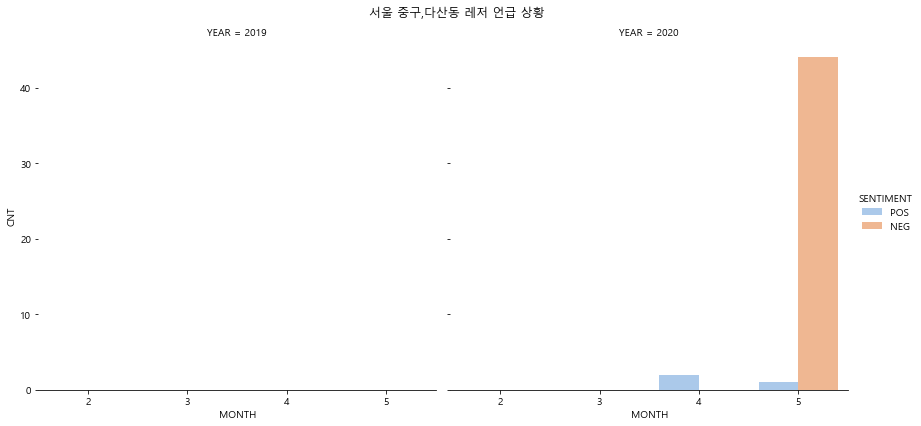

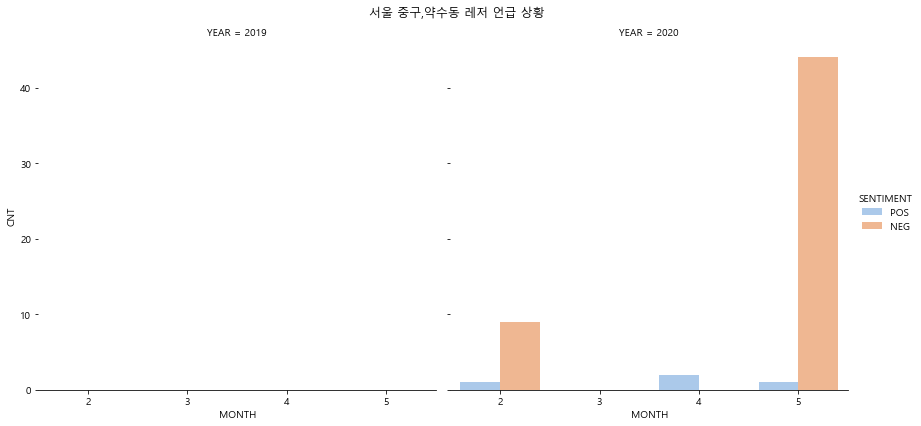

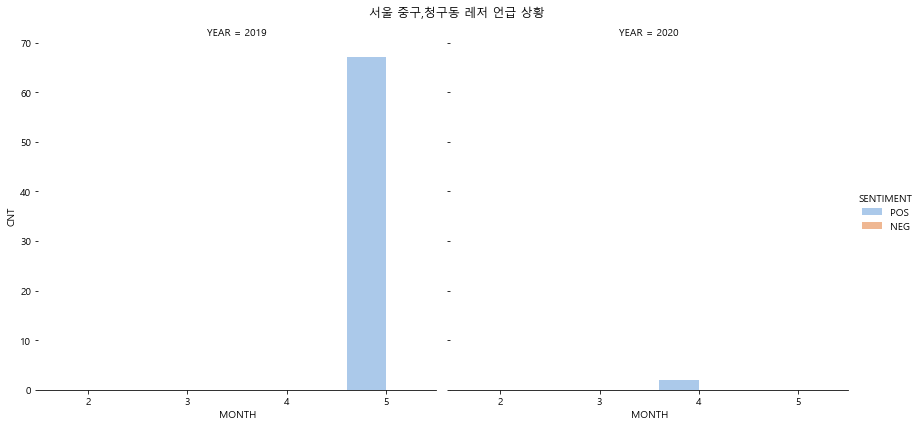

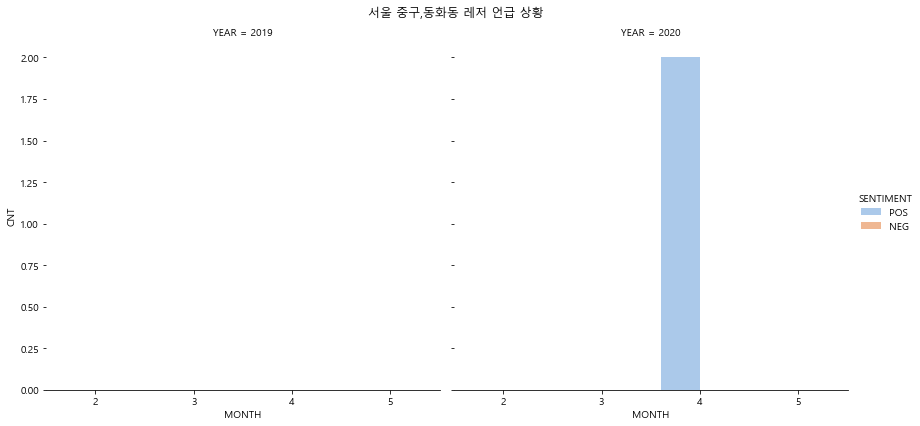

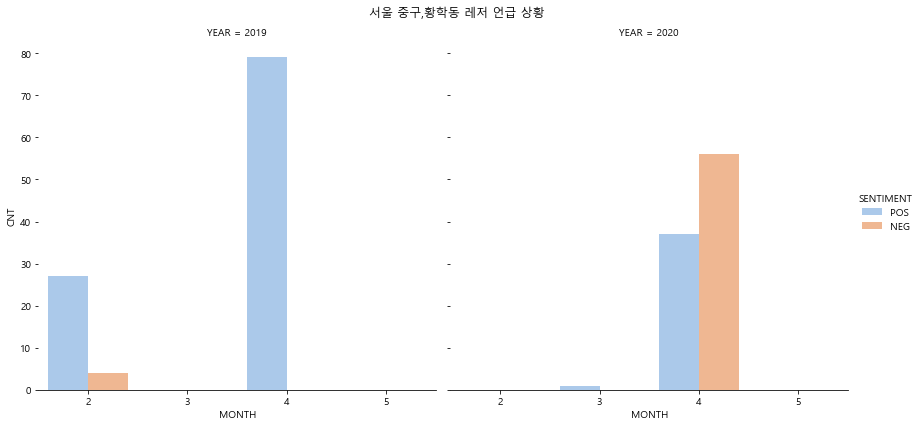

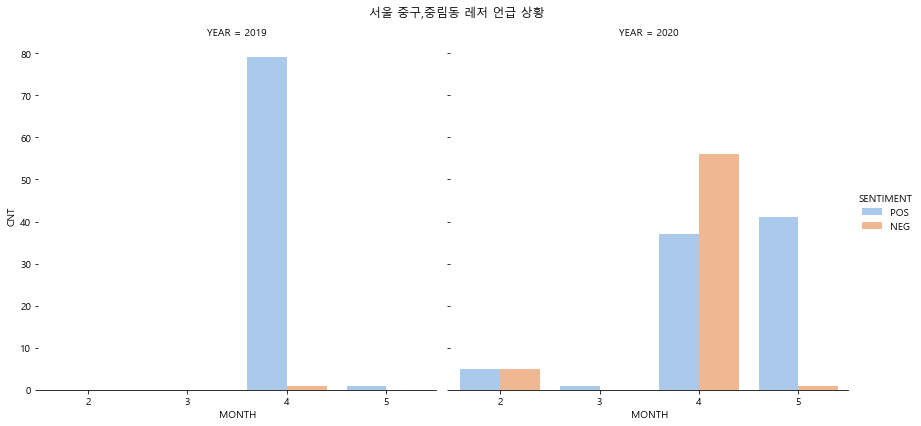

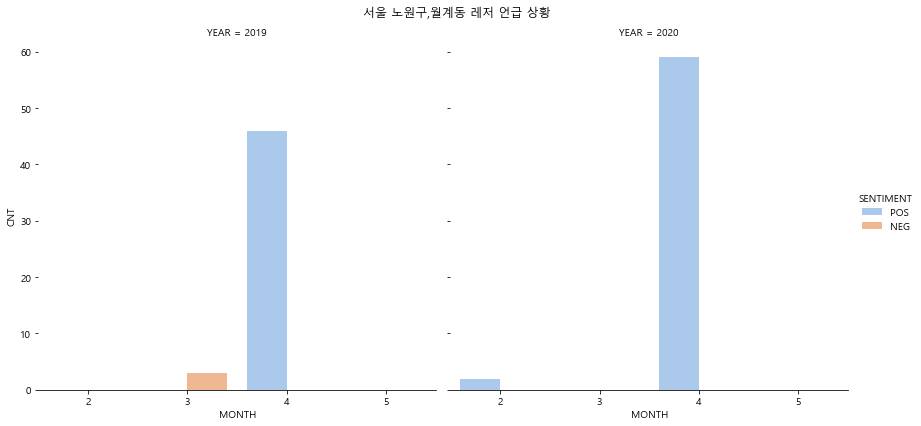

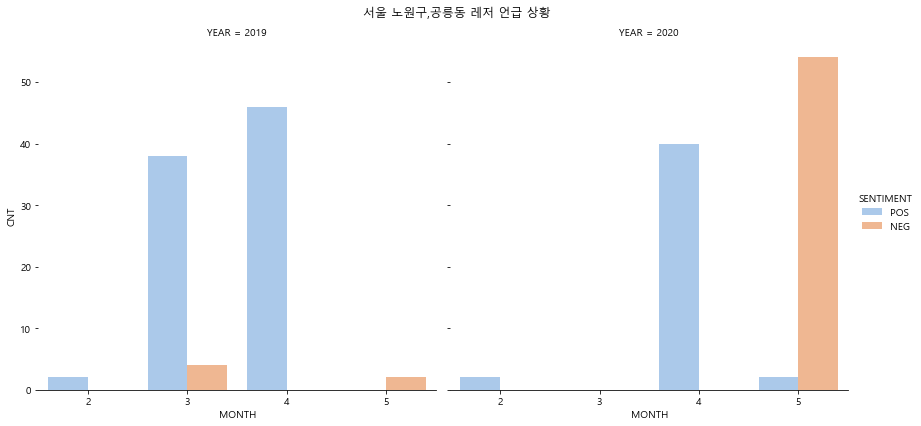

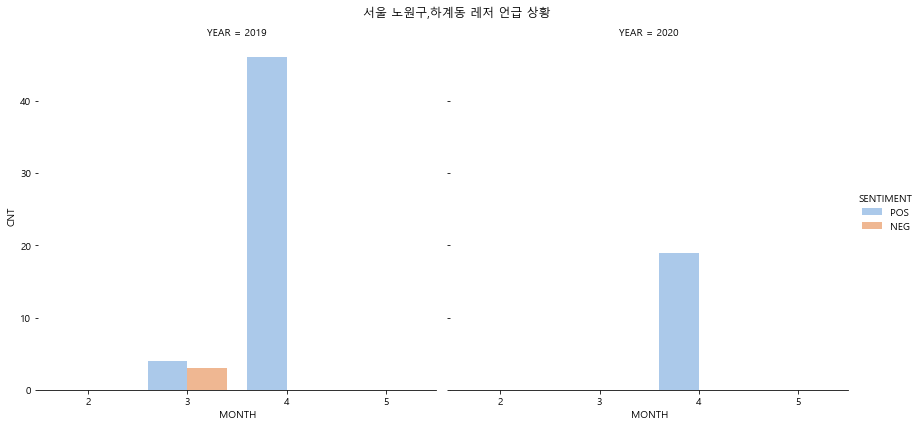

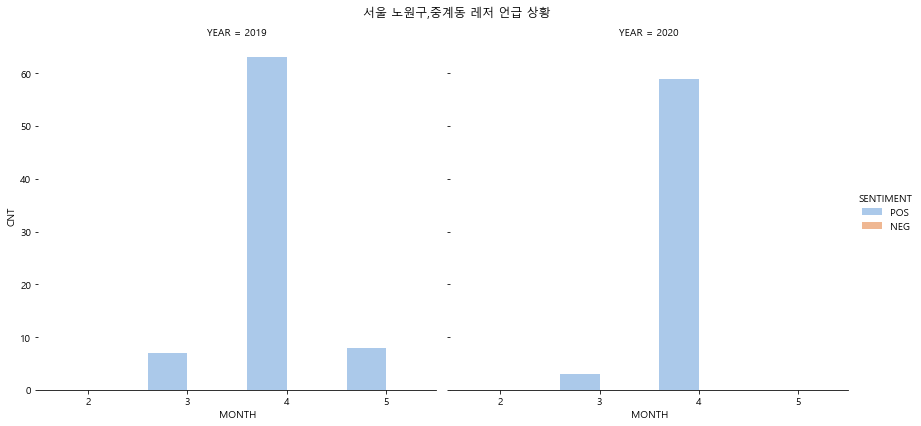

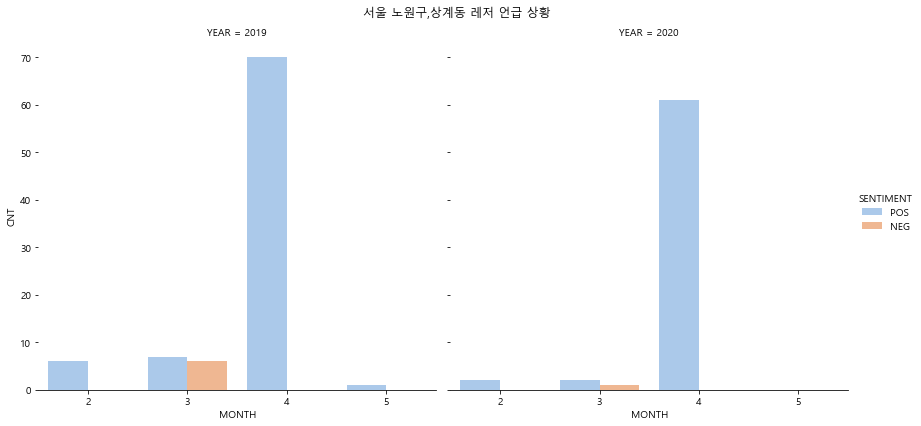

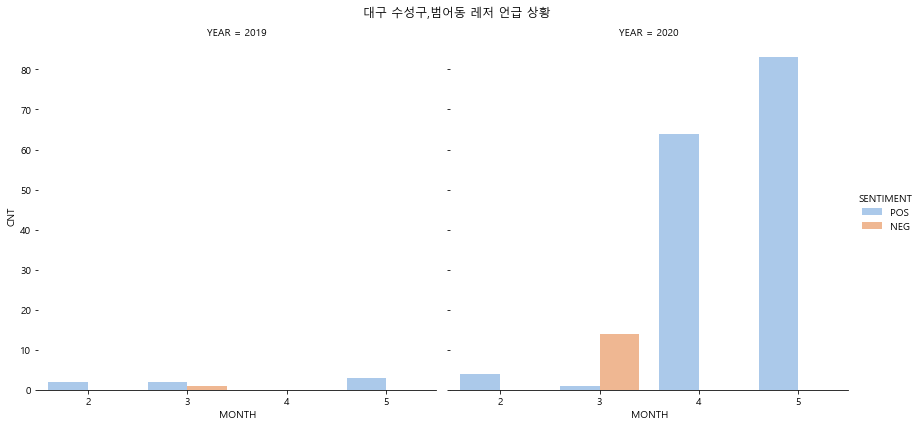

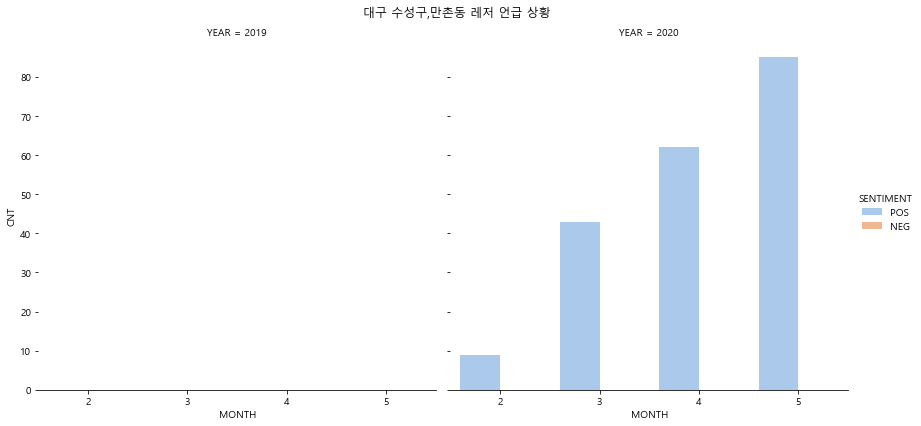

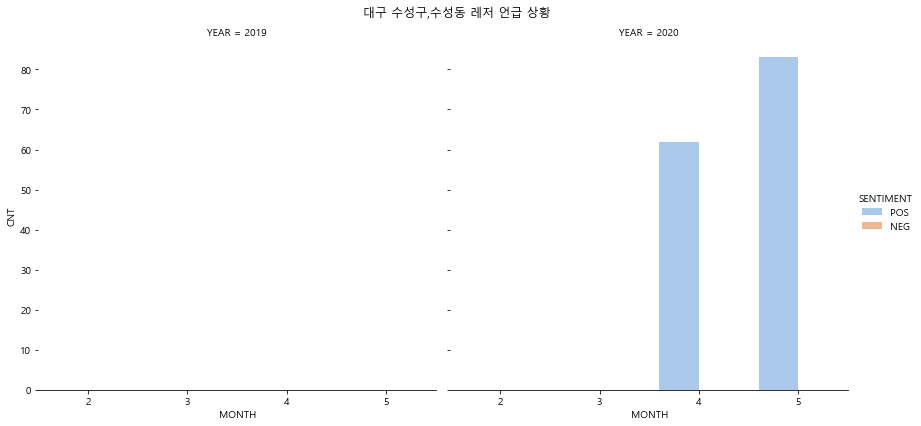

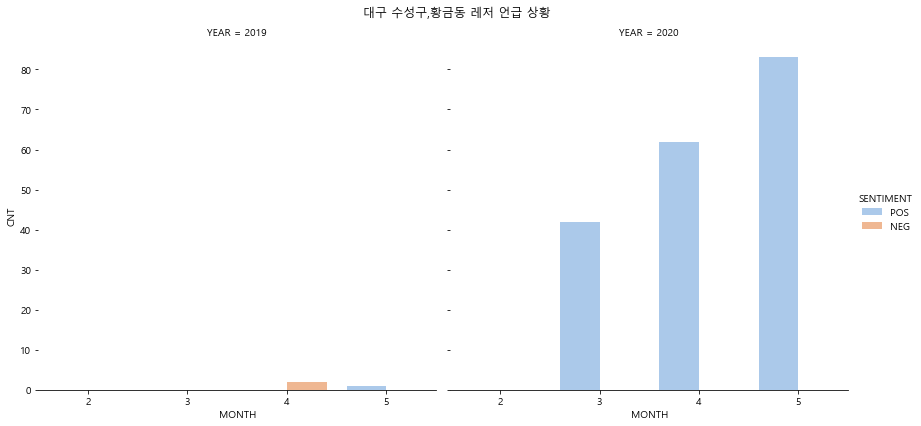

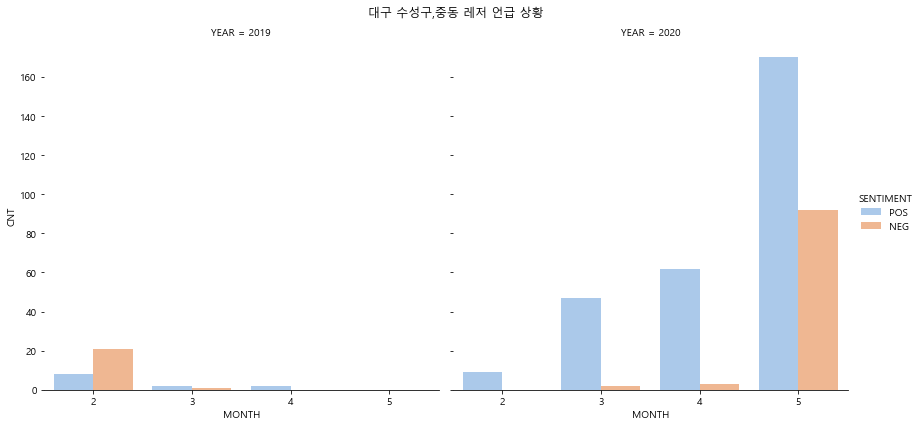

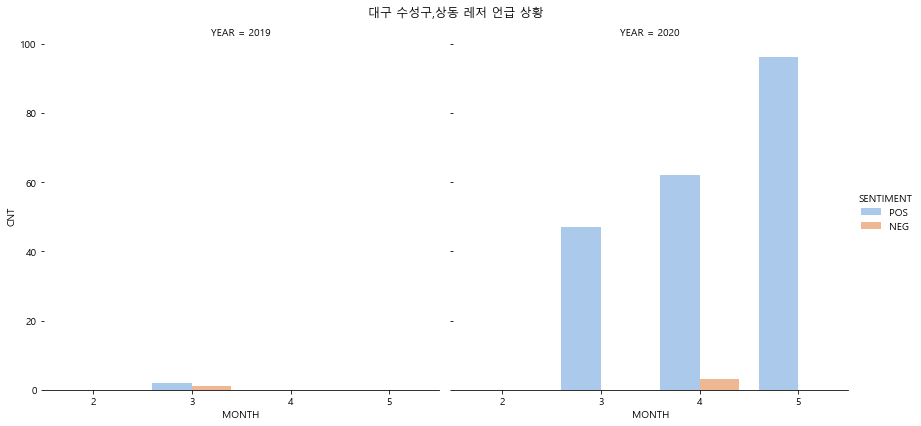

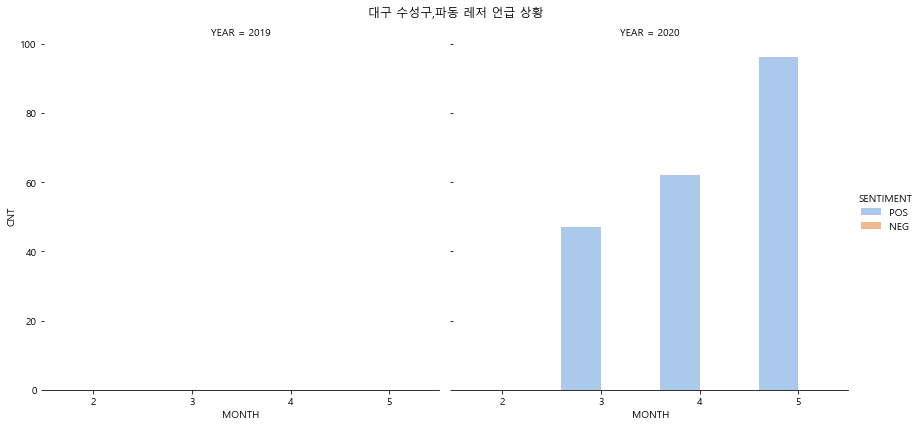

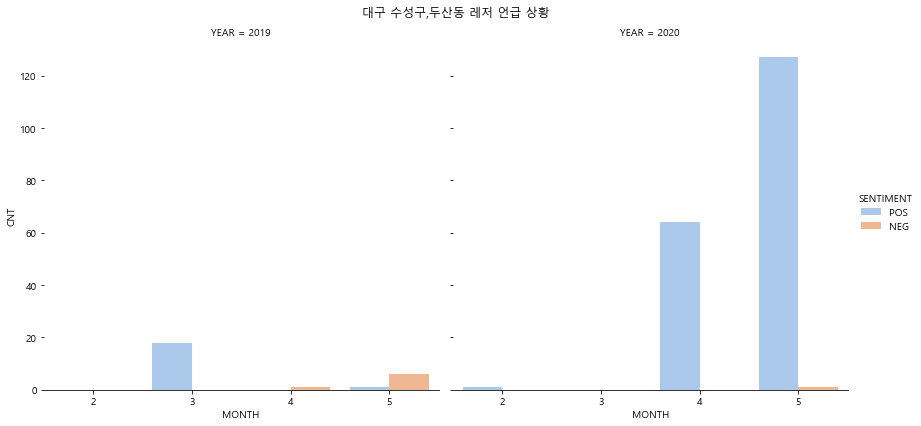

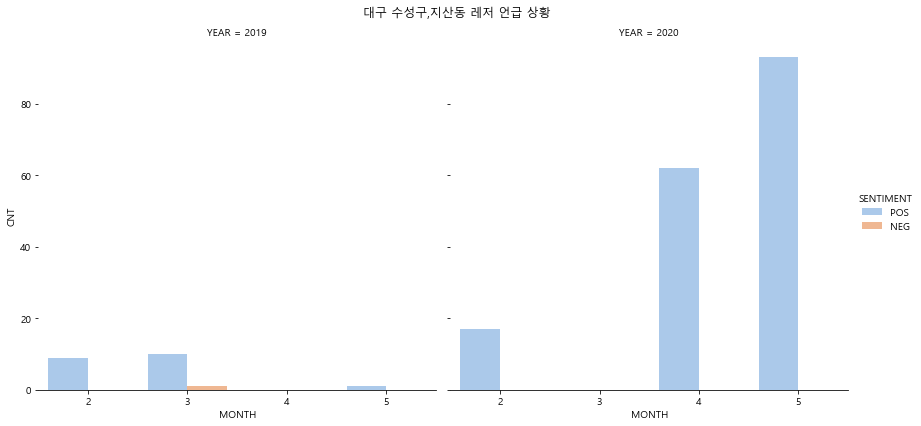

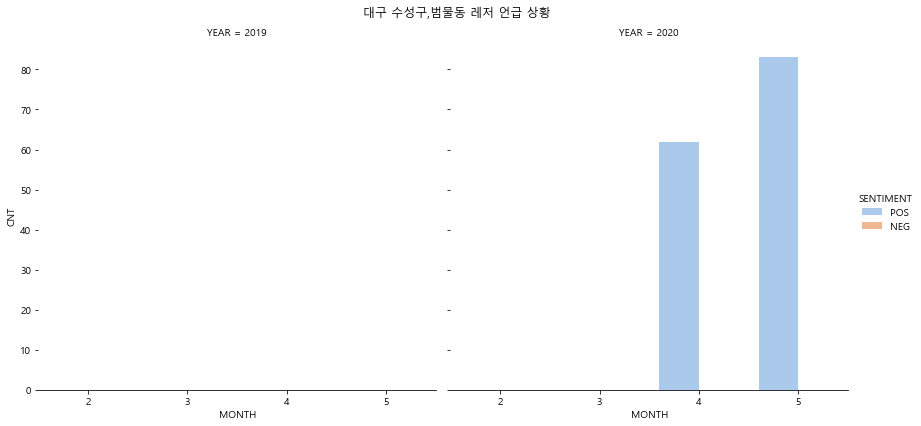

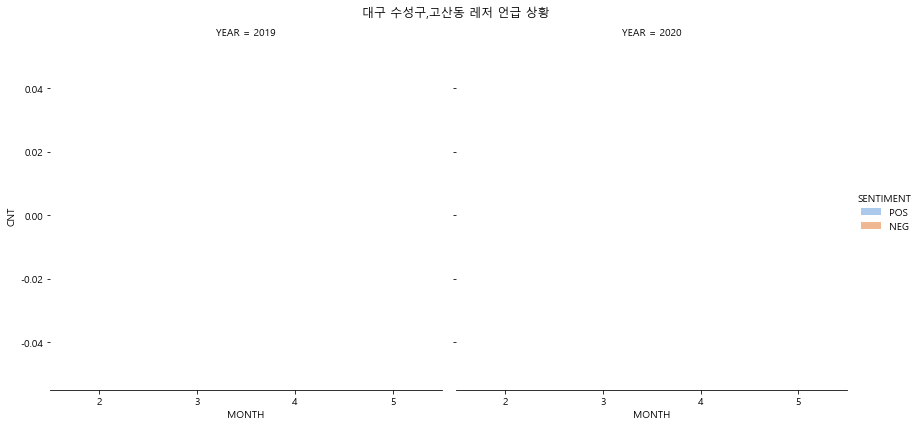

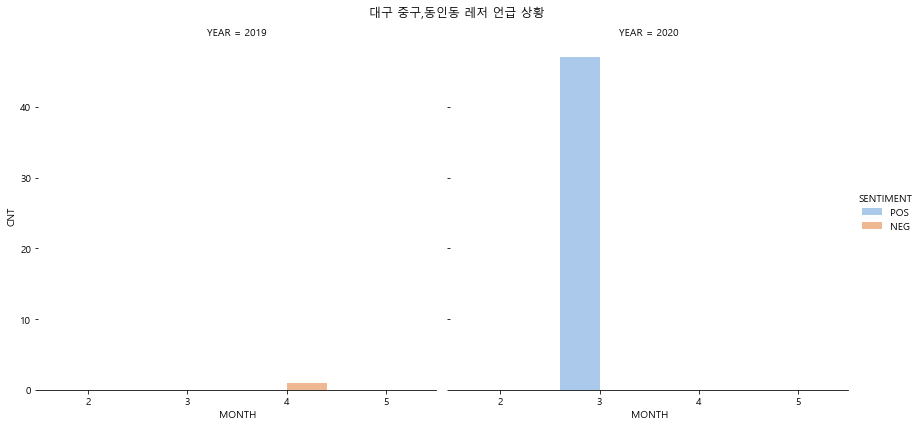

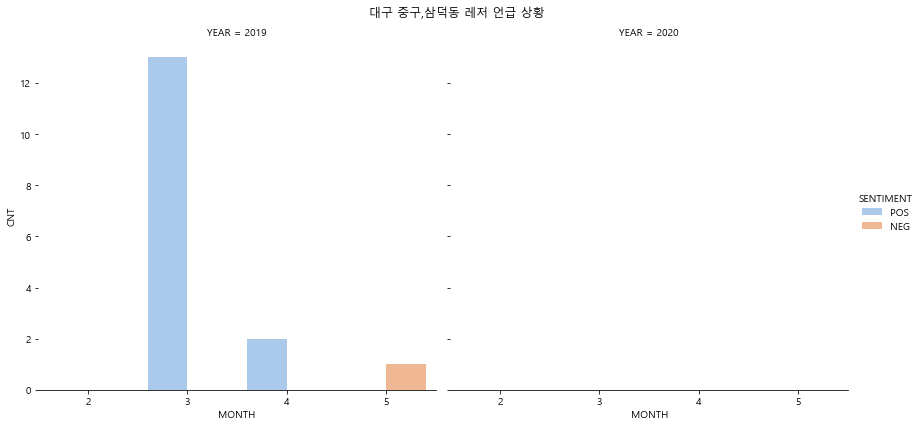

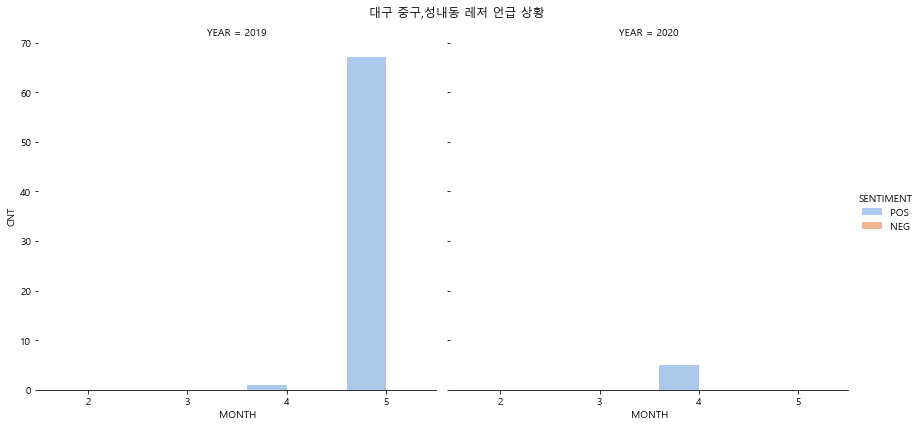

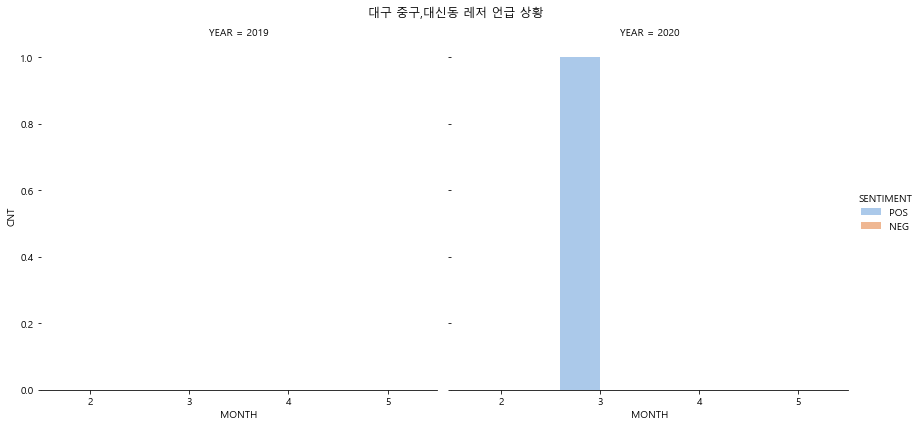

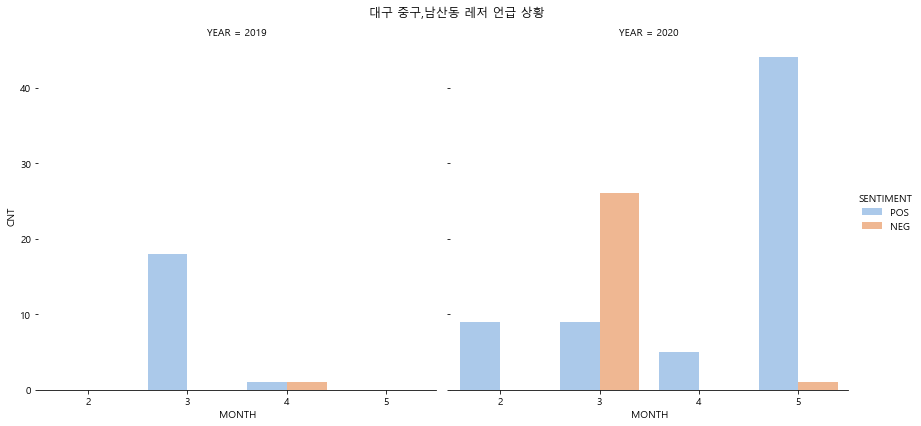

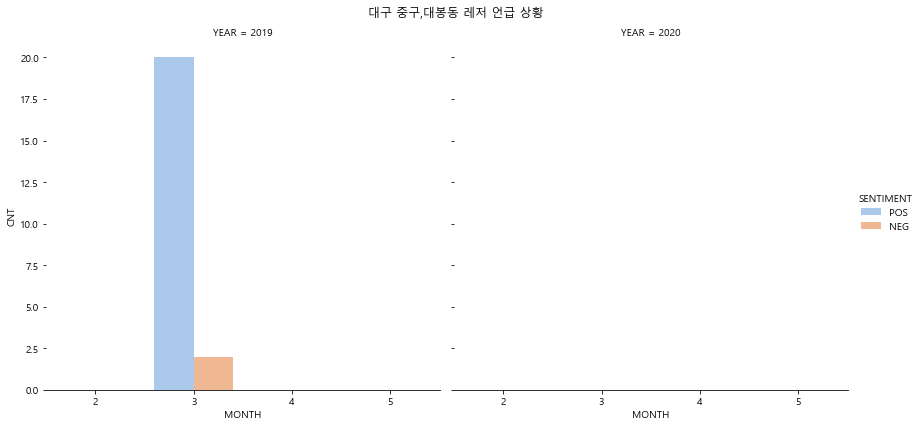

In [31]:
## 행정동별 레저 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP2"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 레저 언급 상황')

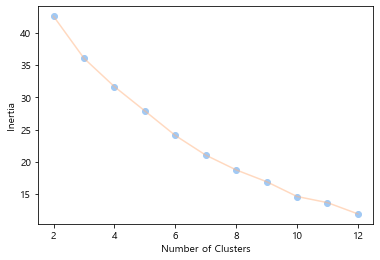

<Figure size 720x720 with 0 Axes>

In [32]:
up2 = pd.pivot_table(pg.query('UP == "UP2"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up2.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [33]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(up2)
print(pd.Series(kmeans.labels_).value_counts())

2    8
3    6
1    6
5    4
4    4
0    4
6    3
dtype: int64


In [34]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(up2.iloc[:,])
up2.columns = [' '.join(col).strip() for col in up2.columns.values]
up2['cls'] = kmeans.labels_
up2_per = pd.merge(up2.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

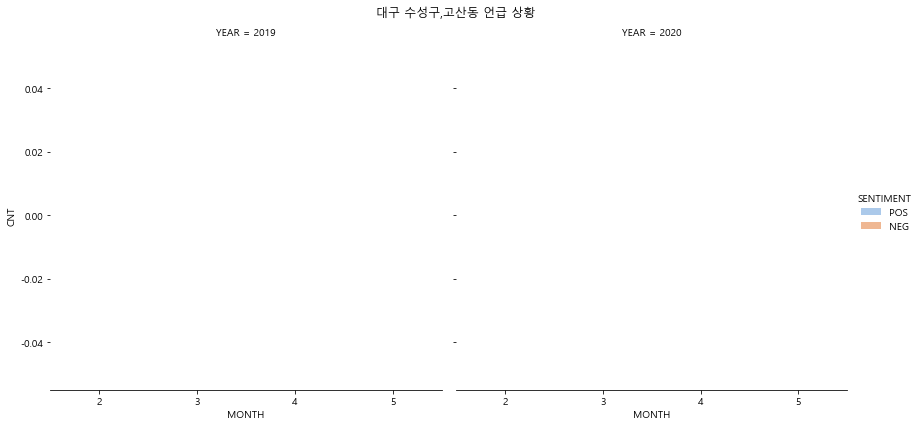

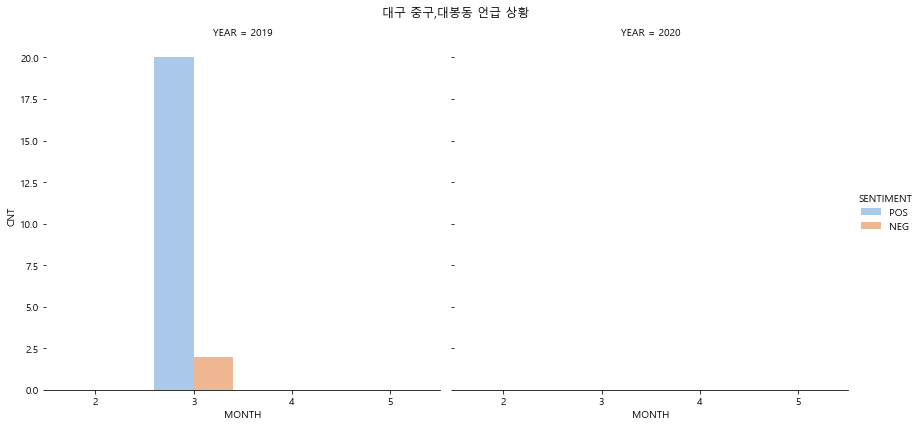

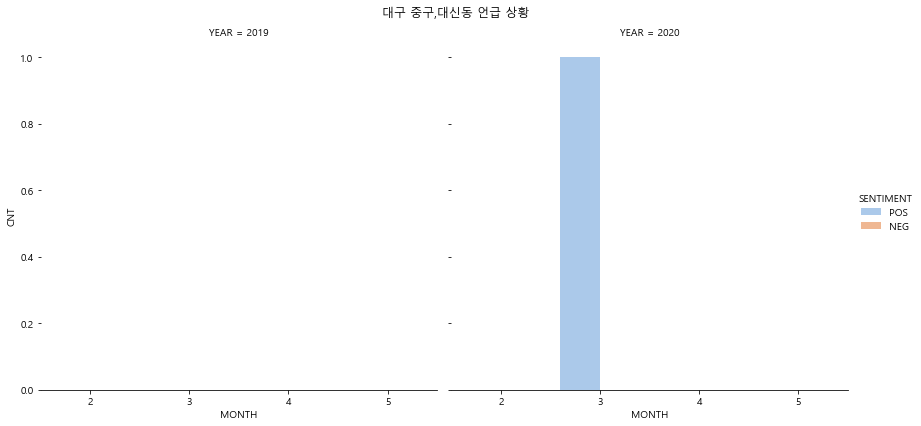

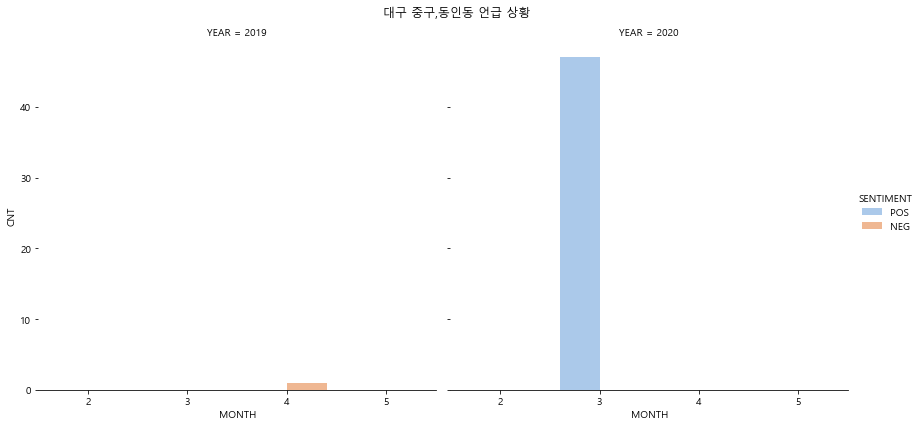

In [35]:
UPcluster(up2_per,4) #실패!

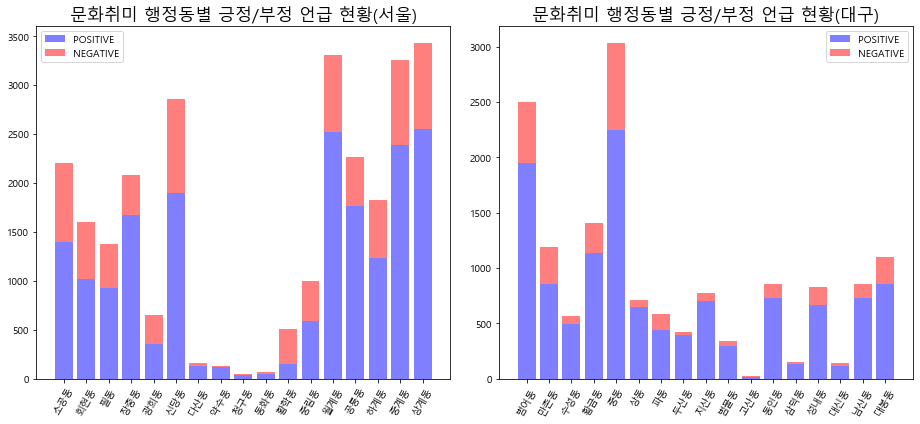

In [36]:
## 문화취미 : 서울과 대구 모두 언급량이 동마다 극과 극. 서울에서 부정적 언급의 비중이 조금 더 높음.

plt.figure(figsize=(13, 6))

plt.subplot(121)
df22_pos_S = df0[df0['CAT'].str.startswith('UP3_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df22_neg_S = df0[df0['CAT'].str.startswith('UP3_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df0.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df0.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df22_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df22_neg_S, color='r', alpha=alpha,
             bottom=df22_pos_S) # stacked bar chart
plt.title('문화취미 행정동별 긍정/부정 언급 현황(서울)', fontsize=17)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df22_pos_D = df0[df0['CAT'].str.startswith('UP3_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df22_neg_D = df0[df0['CAT'].str.startswith('UP3_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df0.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df0.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df22_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df22_neg_D, color='r', alpha=alpha,
             bottom=df22_pos_D) # stacked bar chart
plt.title('문화취미 행정동별 긍정/부정 언급 현황(대구)', fontsize=17)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.tight_layout()
plt.show()

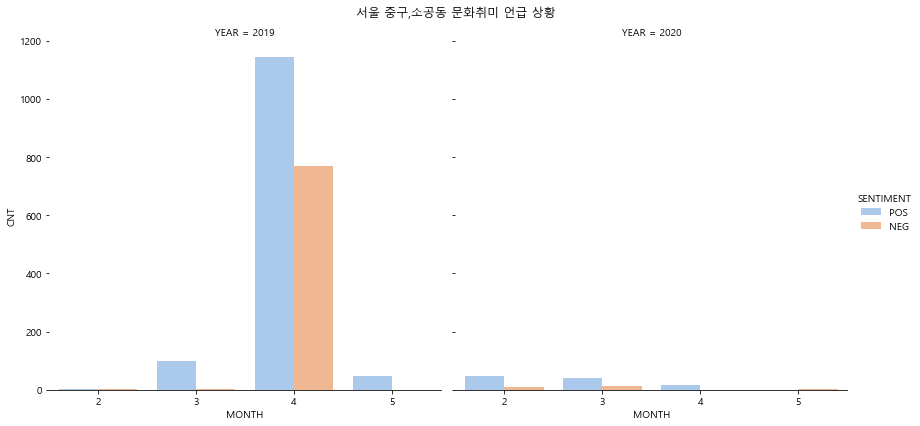

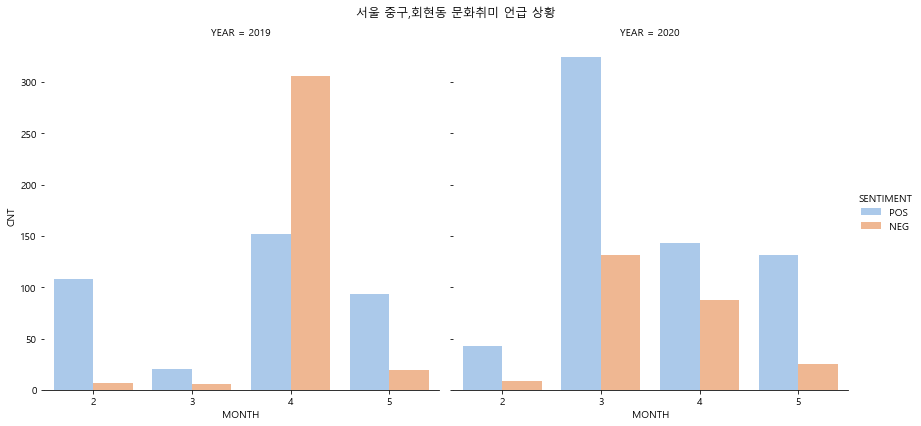

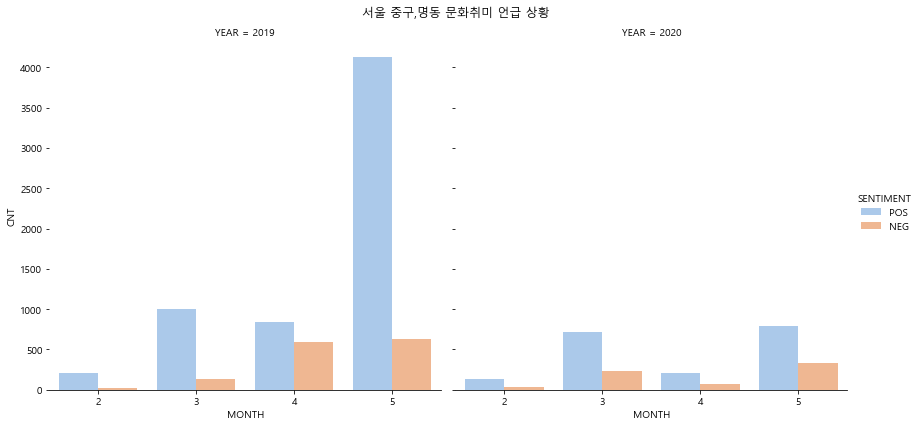

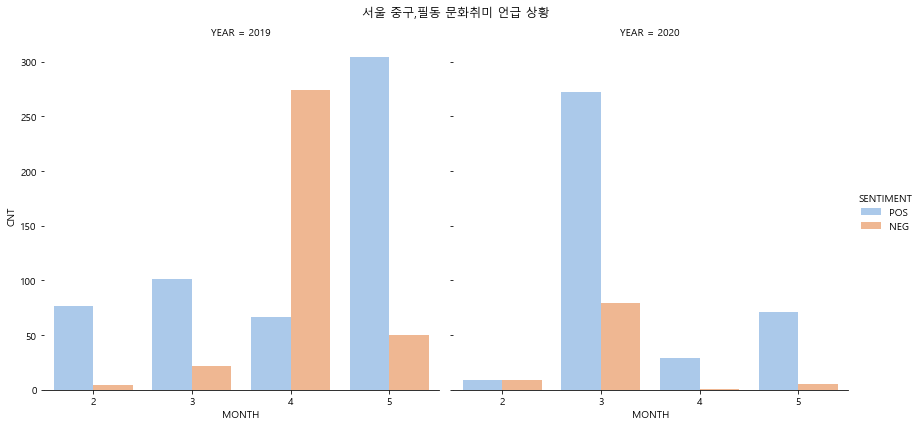

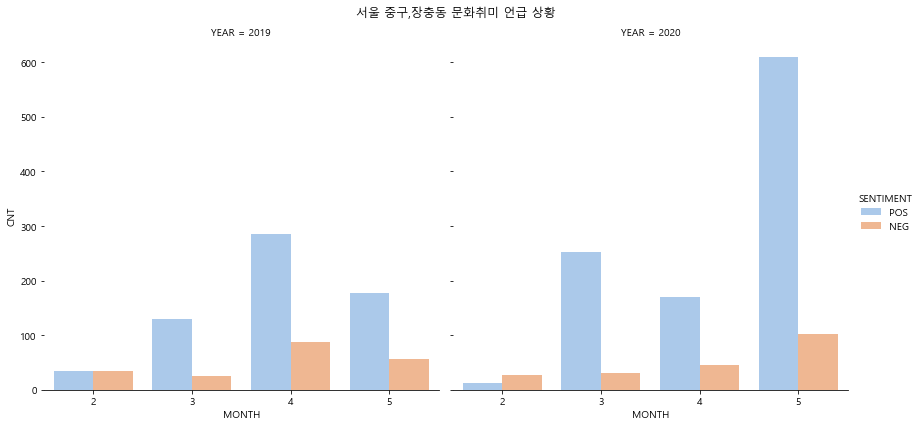

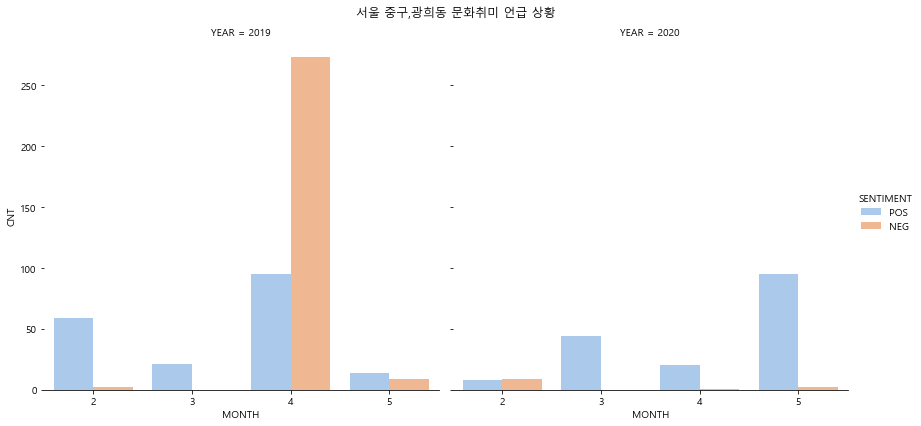

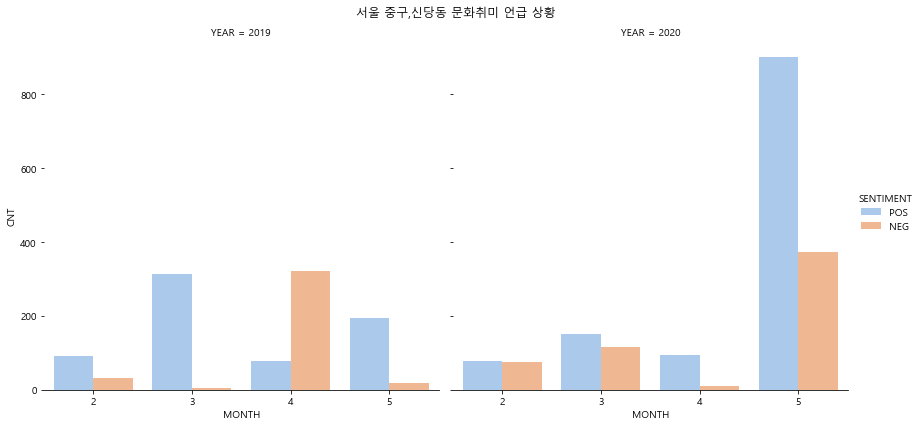

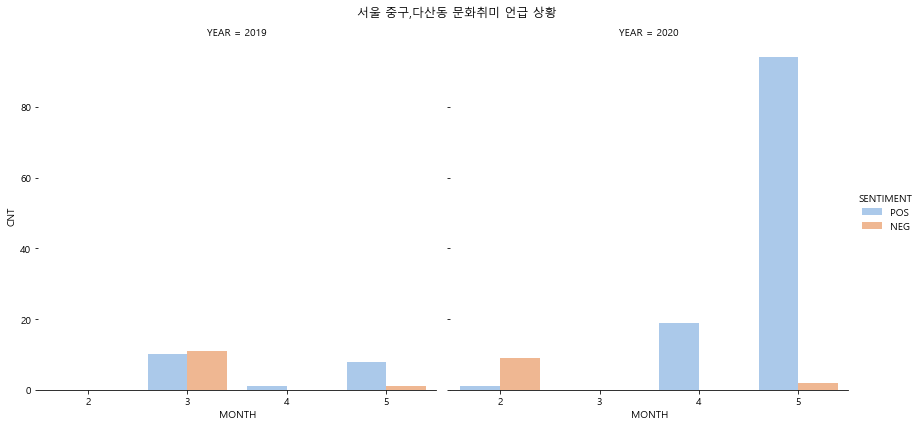

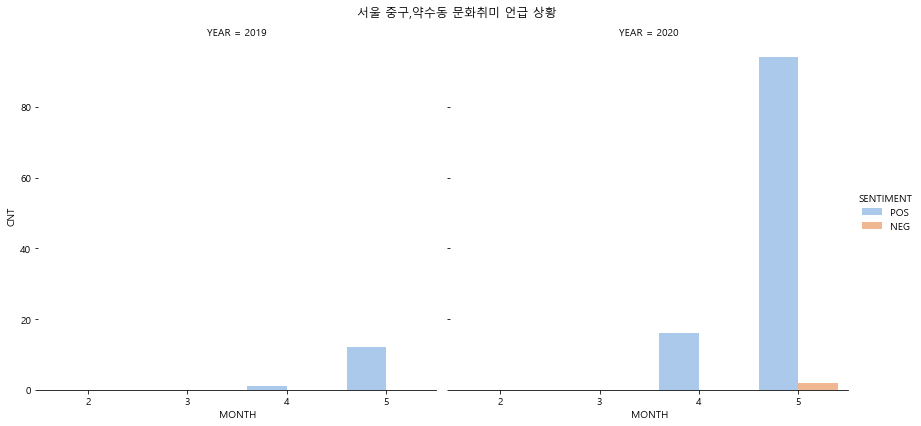

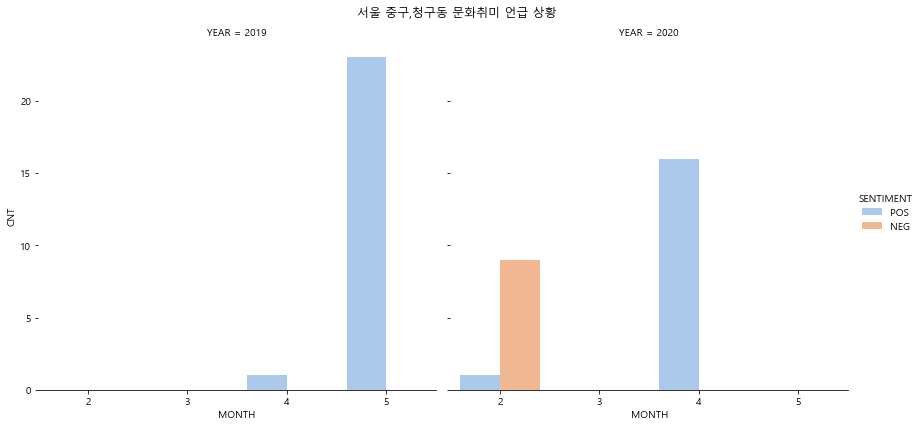

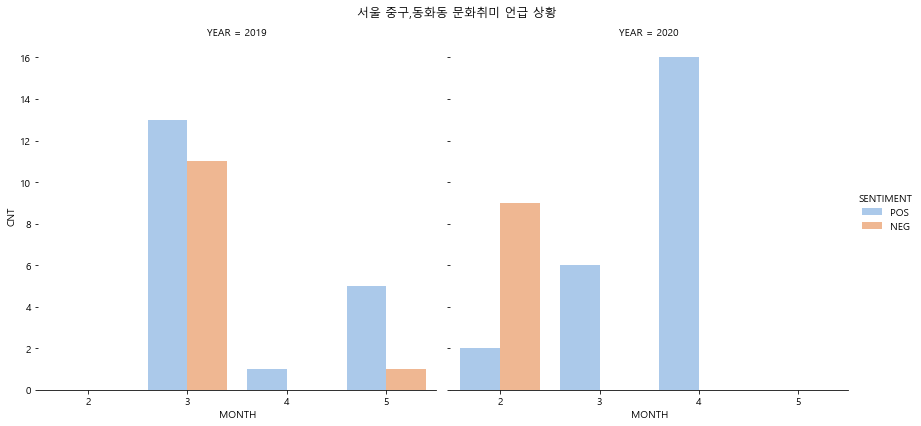

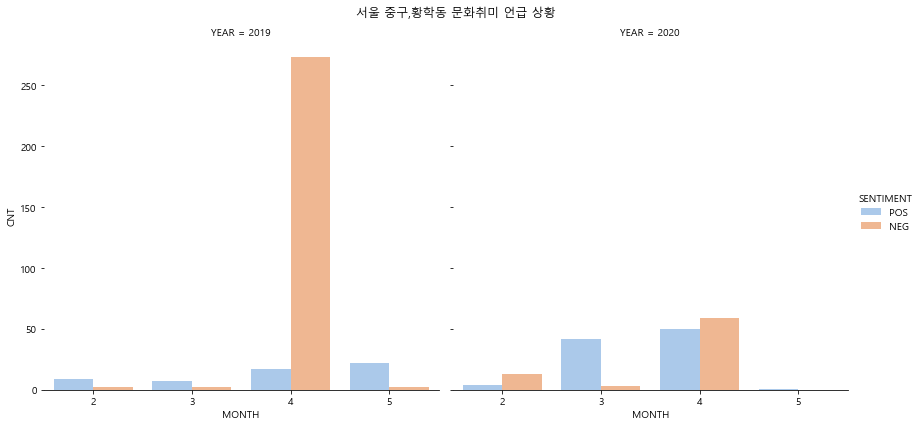

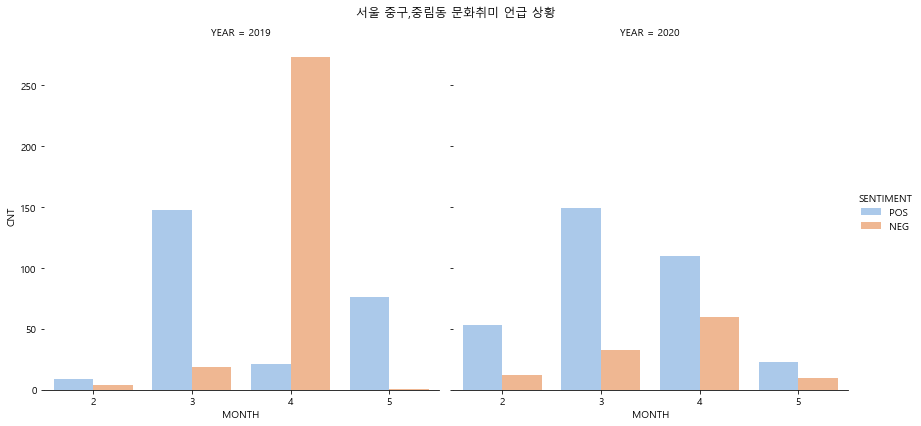

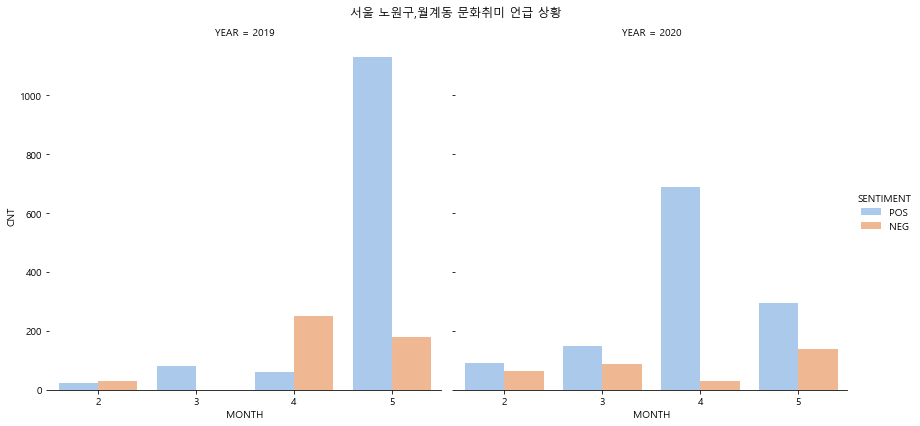

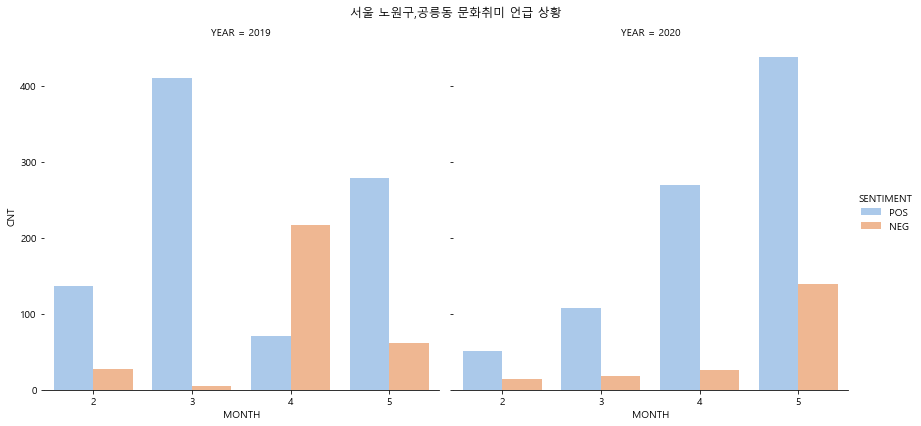

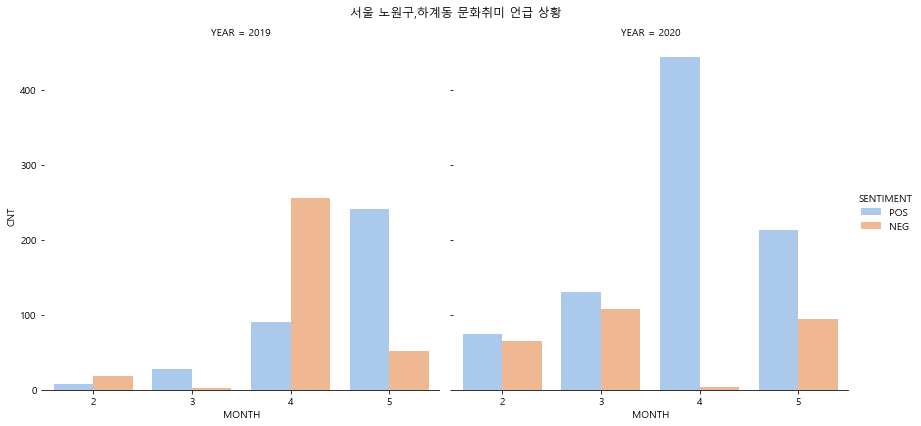

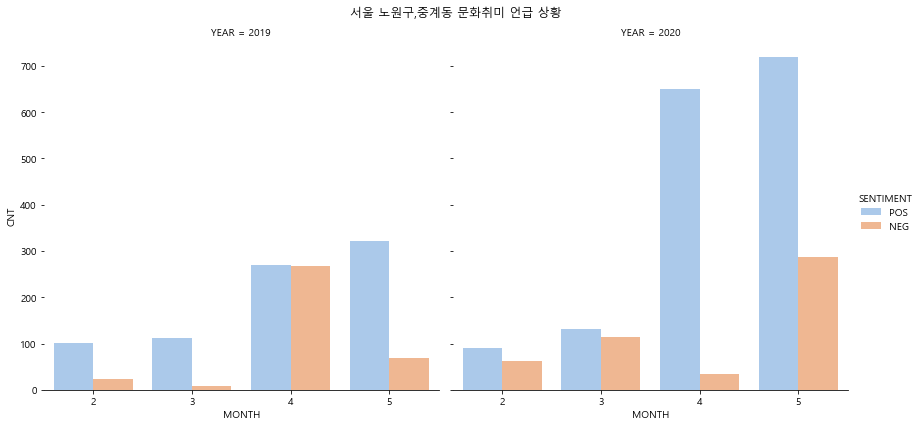

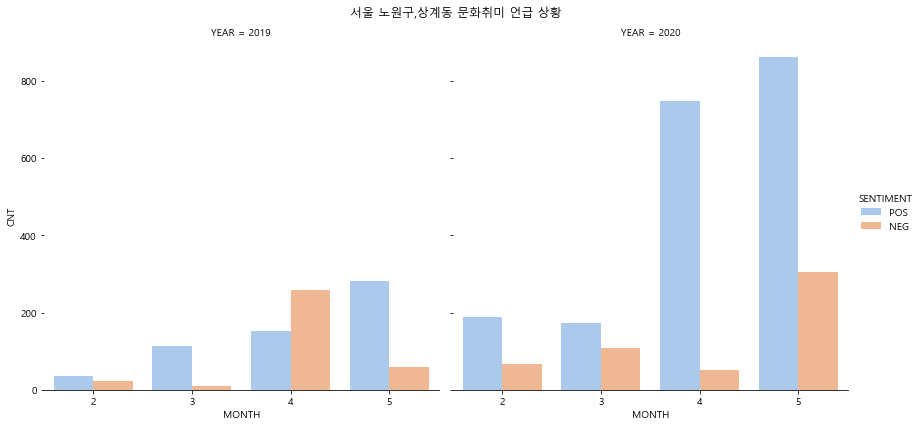

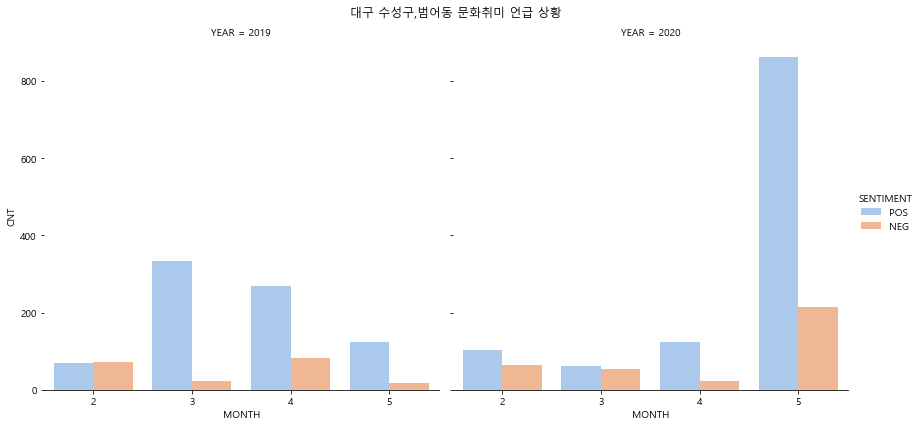

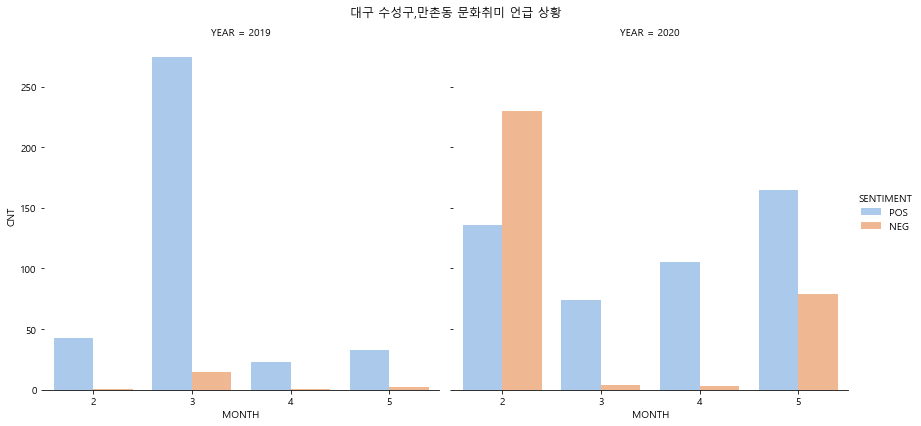

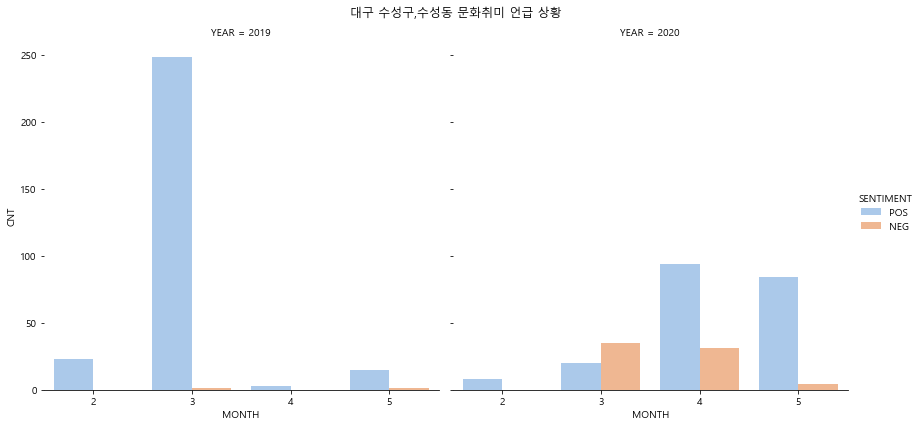

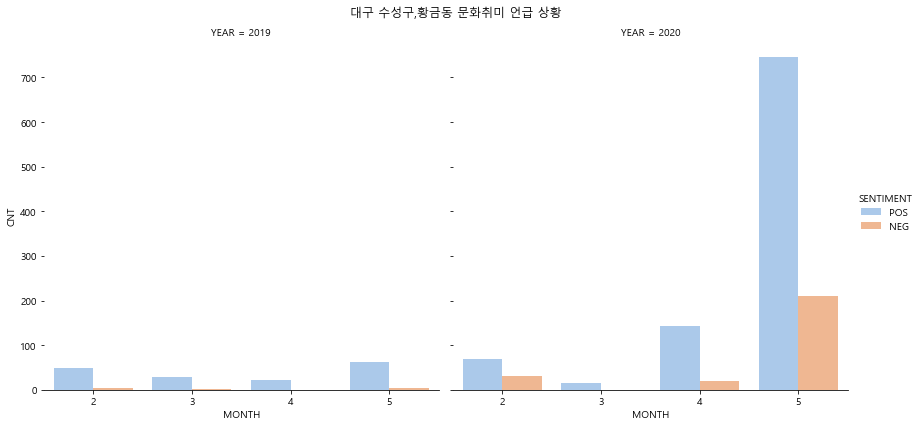

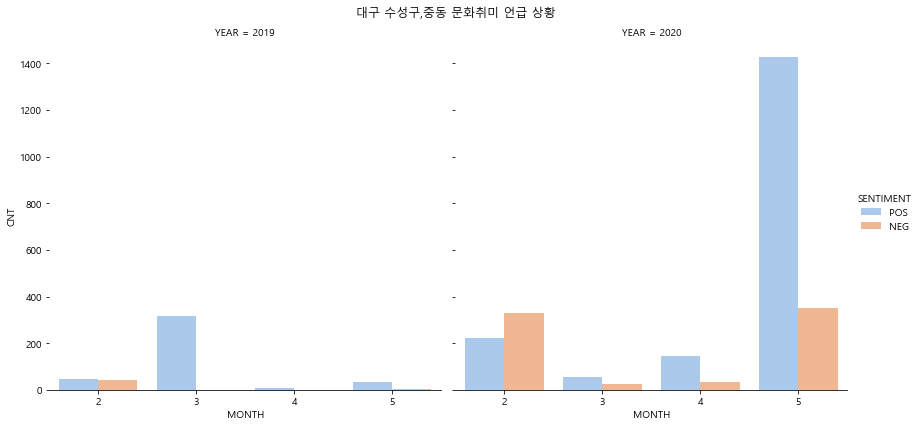

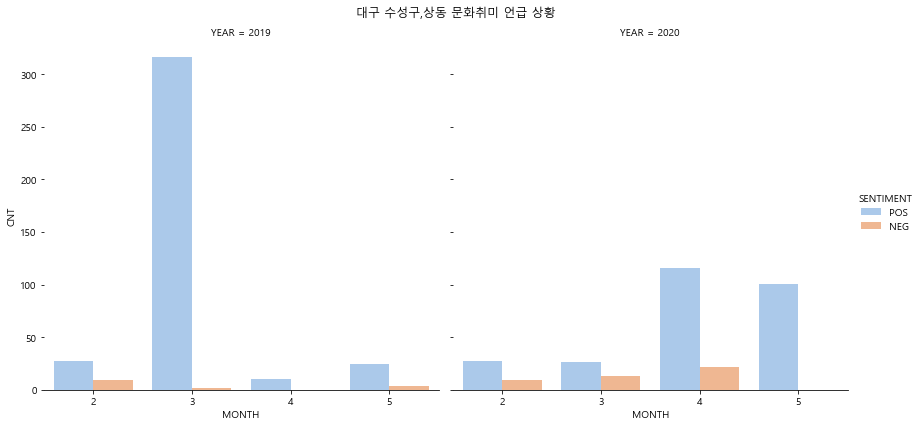

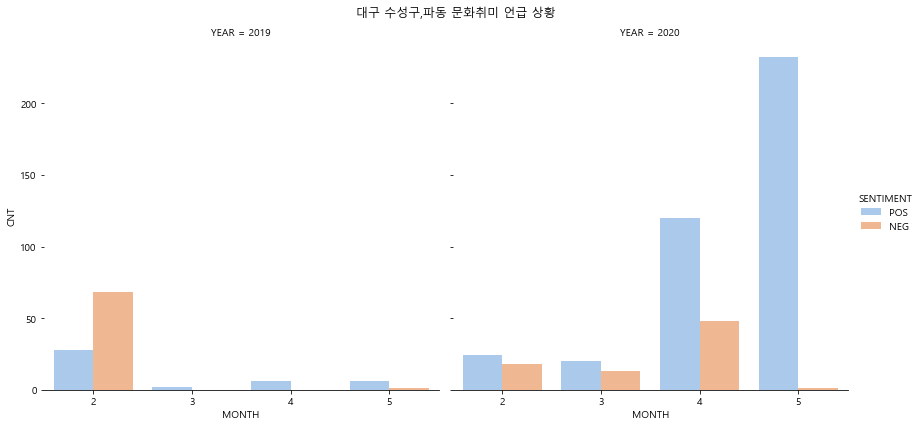

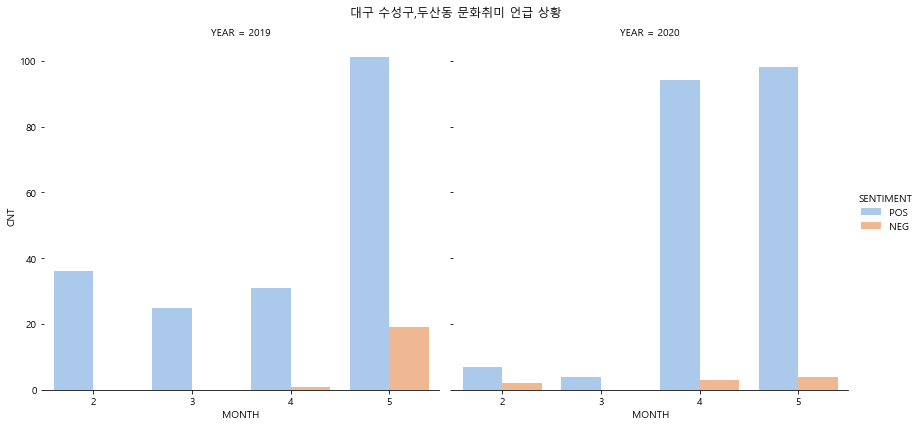

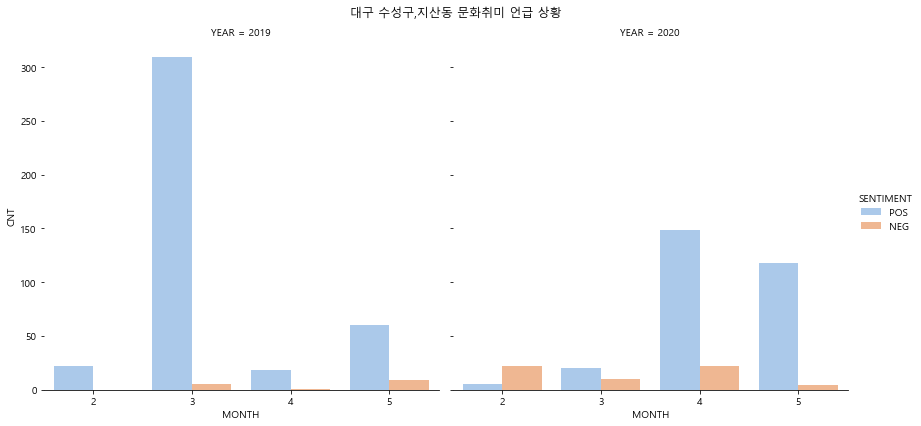

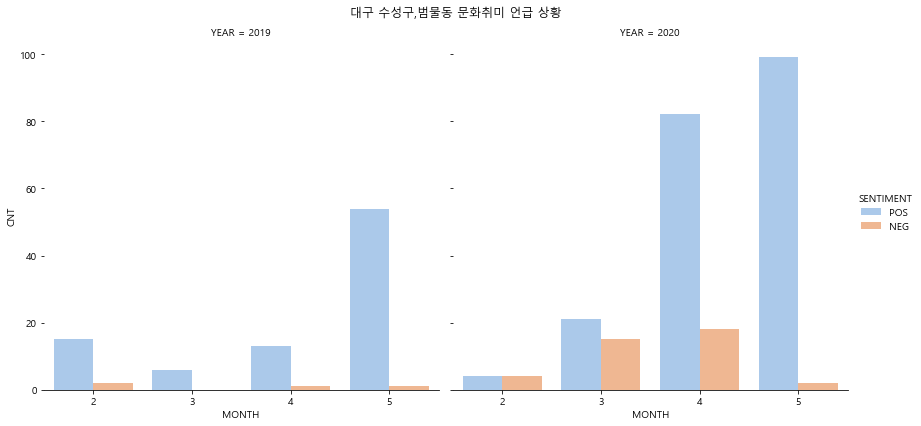

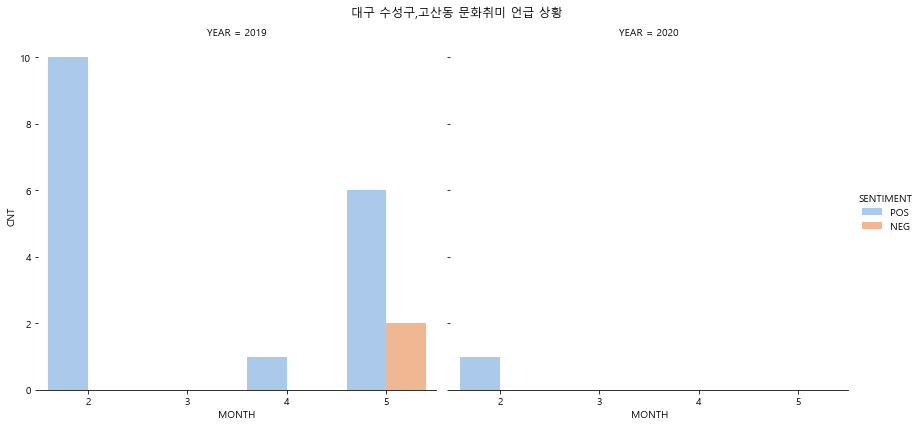

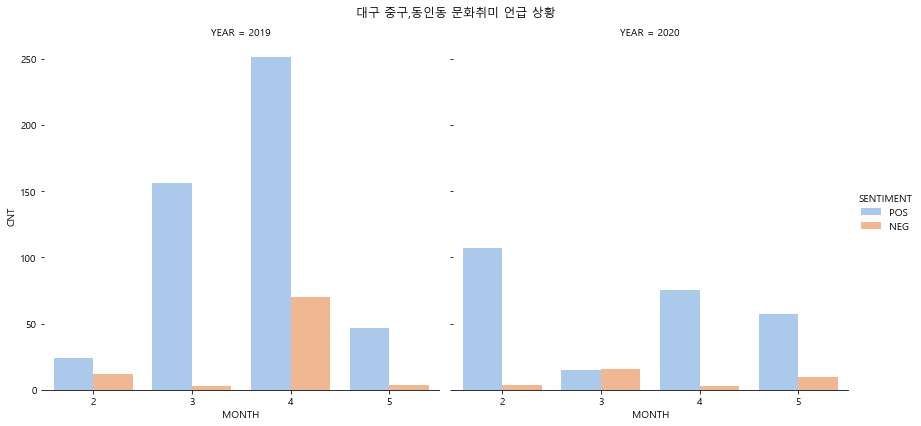

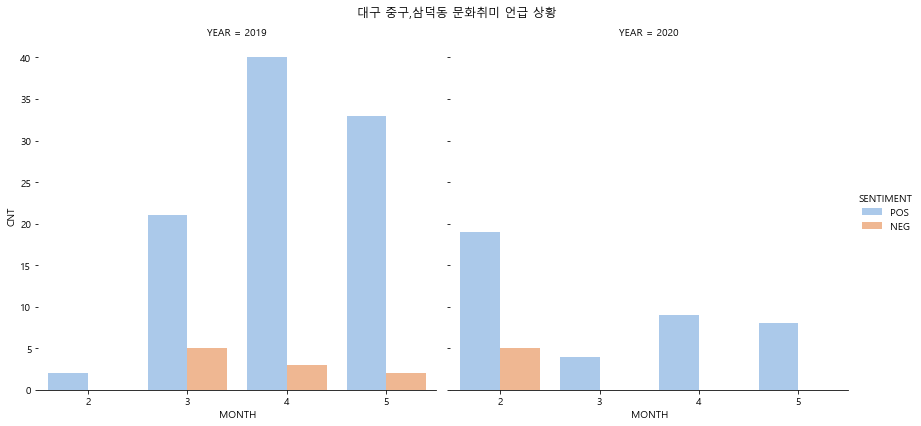

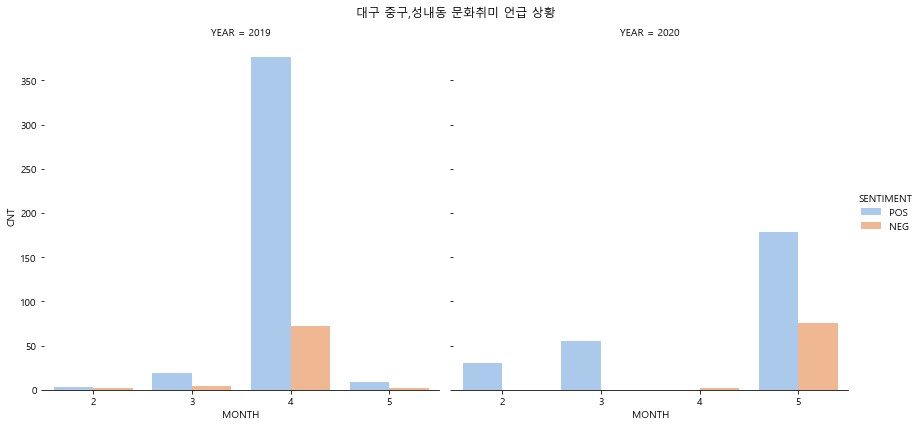

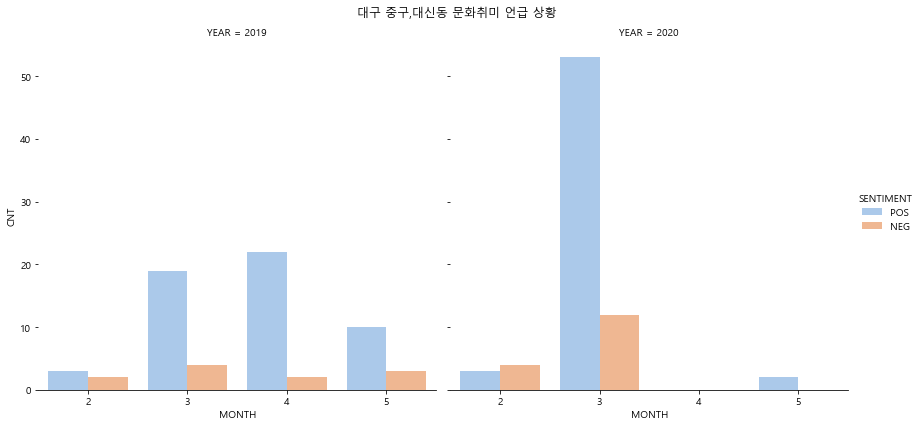

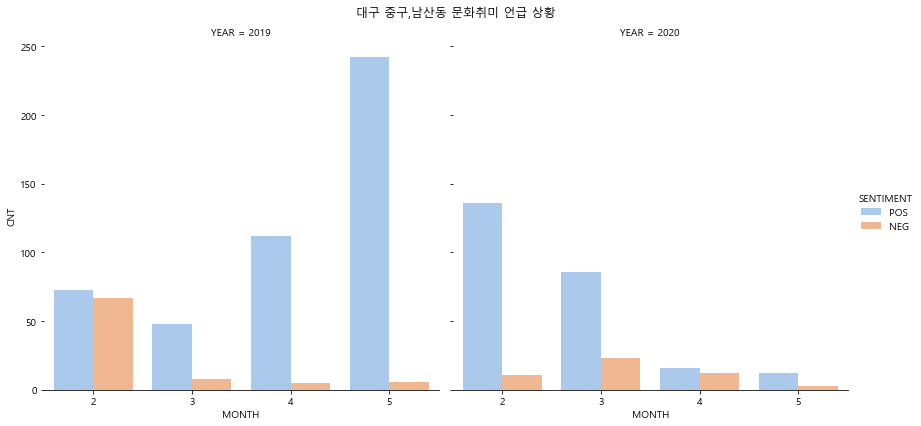

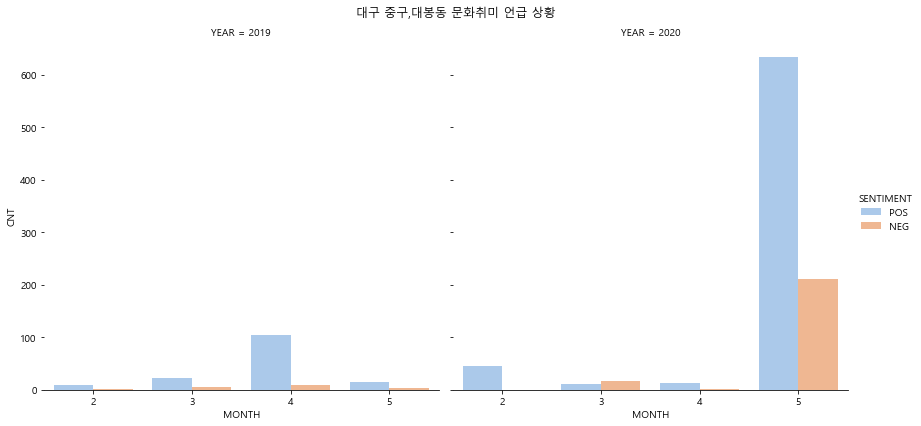

In [37]:
## 행정동별 문화취미 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP3"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 문화취미 언급 상황')

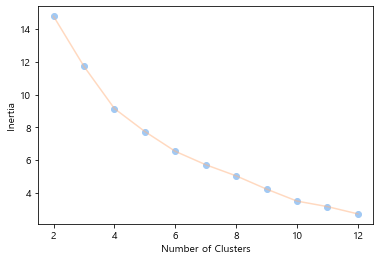

<Figure size 720x720 with 0 Axes>

In [38]:
up3 = pd.pivot_table(pg.query('UP == "UP3"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up3.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(up3)
print(pd.Series(kmeans.labels_).value_counts())

0    17
2    13
1     5
dtype: int64


In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(up3.iloc[:,])
up3.columns = [' '.join(col).strip() for col in up3.columns.values]
up3['cls'] = kmeans.labels_
up3_per = pd.merge(up3.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

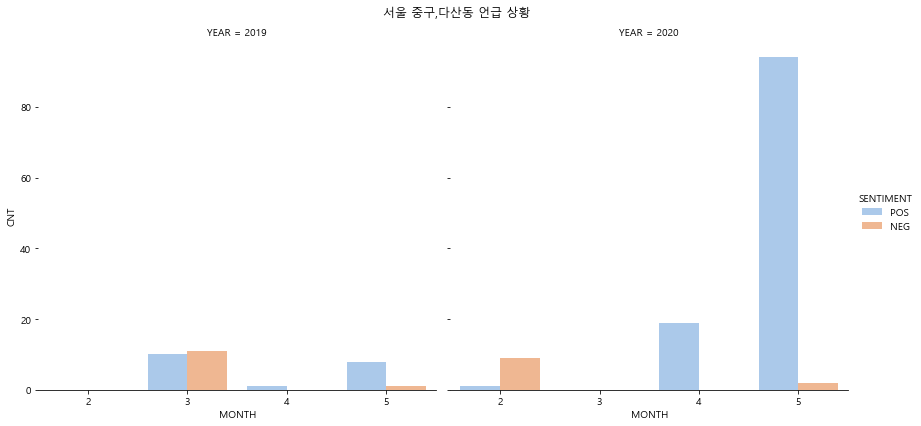

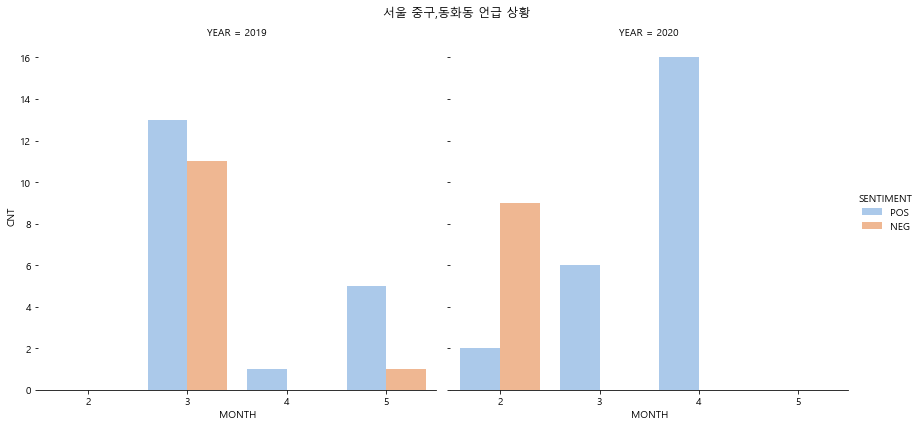

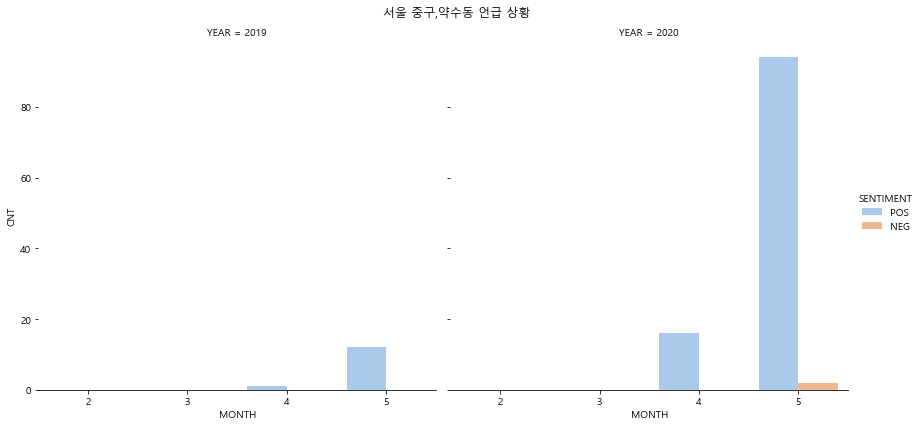

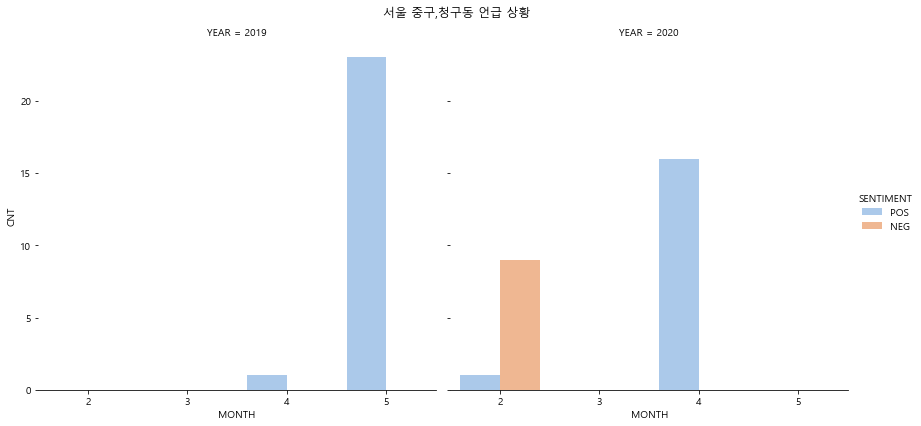

In [41]:
UPcluster(up3_per,0) #실패!

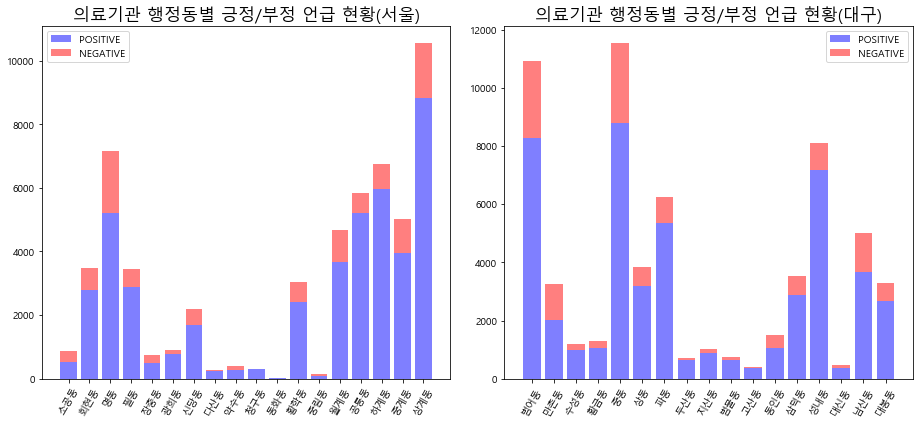

In [42]:
## 의료기관 : 서울은 상계동, 대구는 중동과 범어동의 언급량 많음. 서울과 대구 모두 언급이 극과 극인 지역 있음

plt.figure(figsize=(13, 6))

plt.subplot(121)
df23_pos_S = df[df['CAT'].str.startswith('UP4_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df23_neg_S = df[df['CAT'].str.startswith('UP4_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df23_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df23_neg_S, color='r', alpha=alpha,
             bottom=df23_pos_S) # stacked bar chart
plt.title('의료기관 행정동별 긍정/부정 언급 현황(서울)', fontsize=17)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df23_pos_D = df[df['CAT'].str.startswith('UP4_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df23_neg_D = df[df['CAT'].str.startswith('UP4_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df23_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df23_neg_D, color='r', alpha=alpha,
             bottom=df23_pos_D) # stacked bar chart
plt.title('의료기관 행정동별 긍정/부정 언급 현황(대구)', fontsize=17)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.tight_layout()
plt.show()

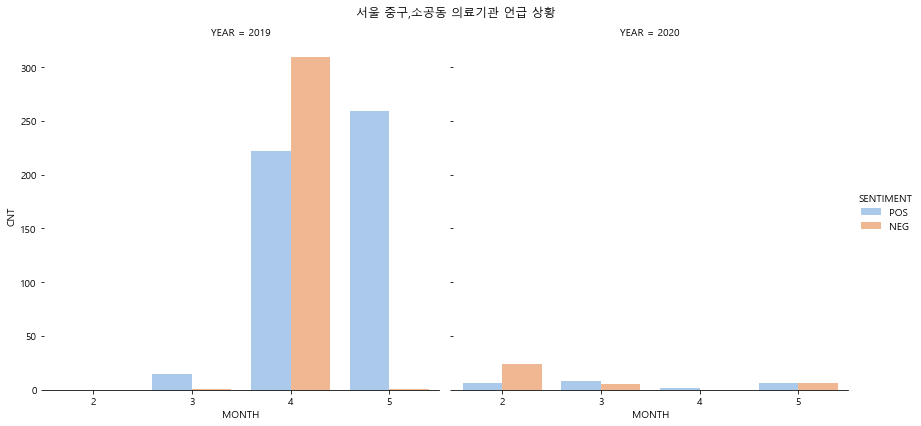

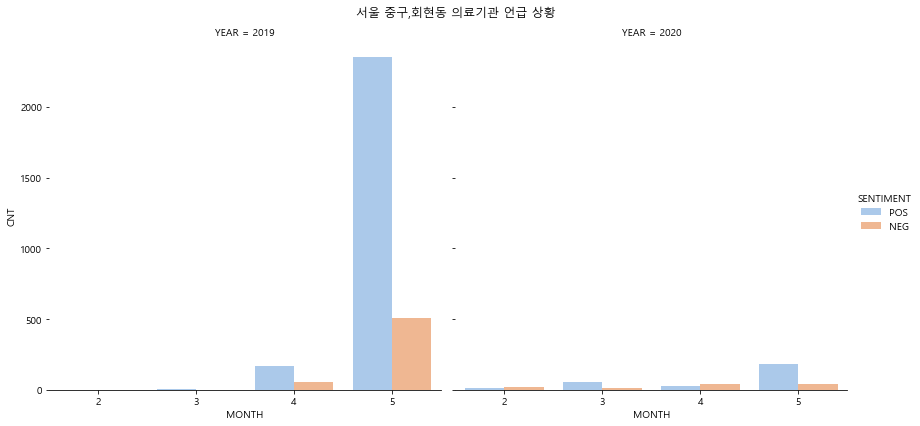

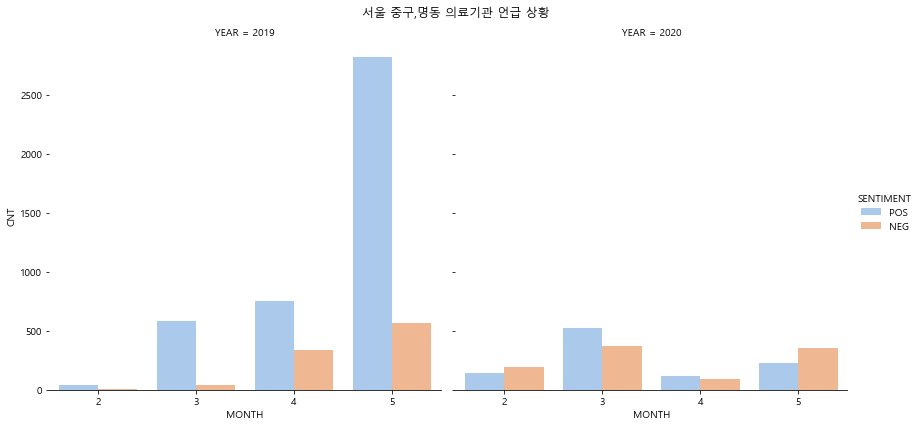

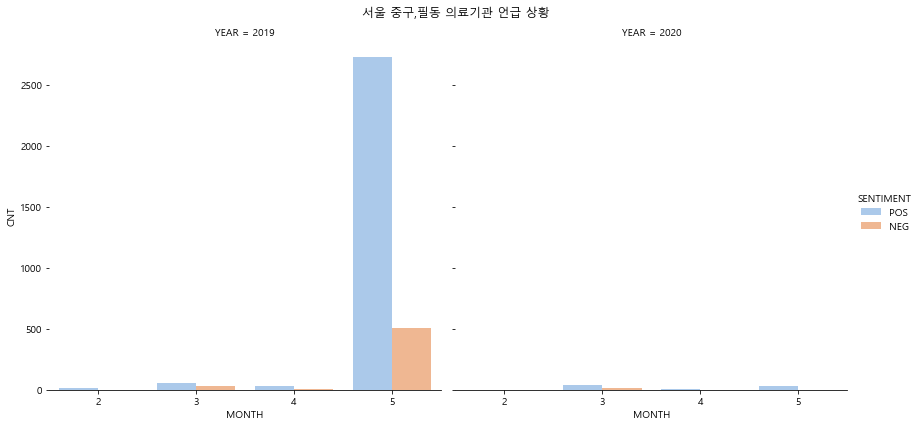

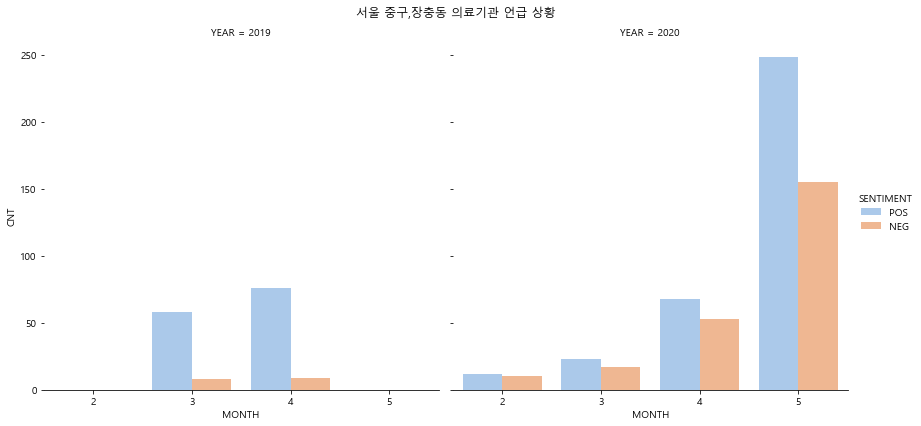

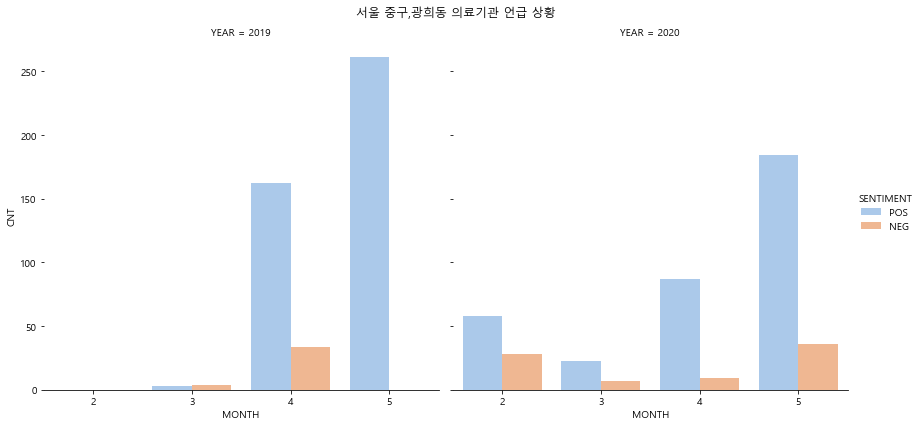

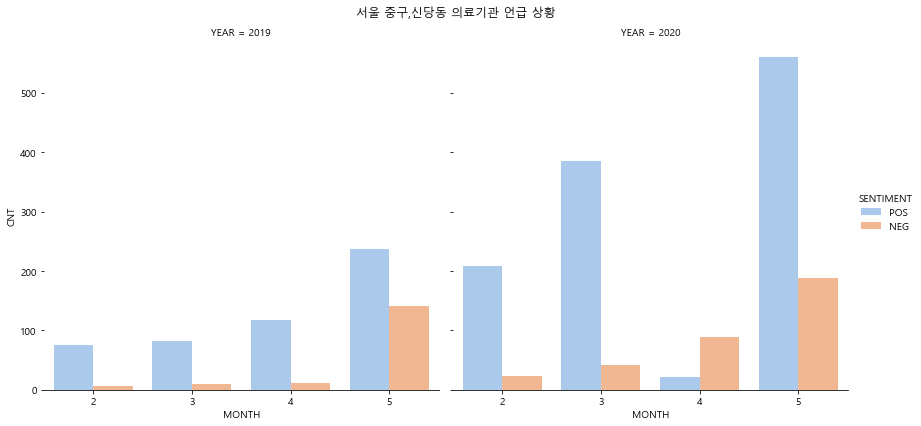

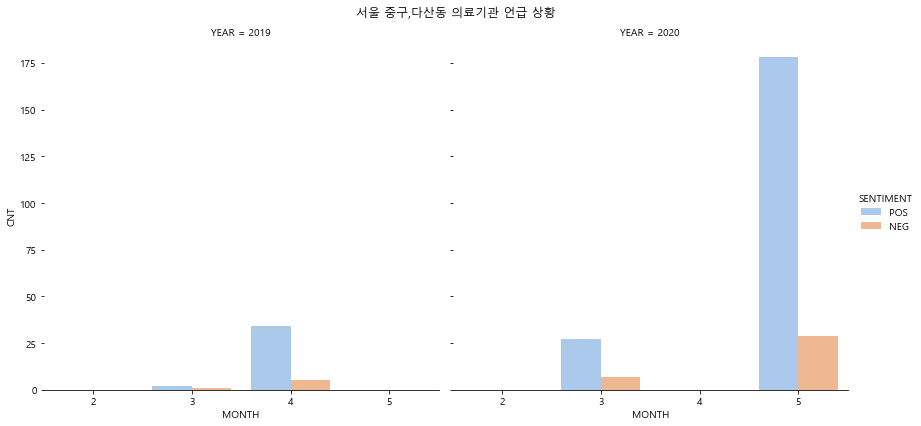

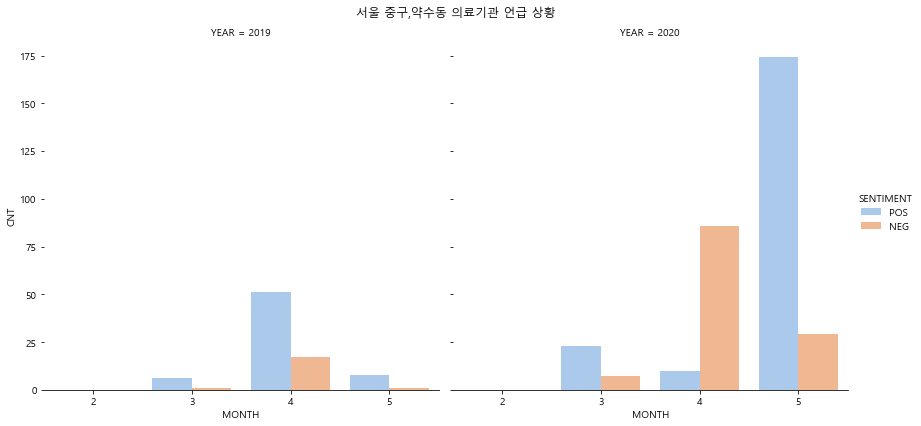

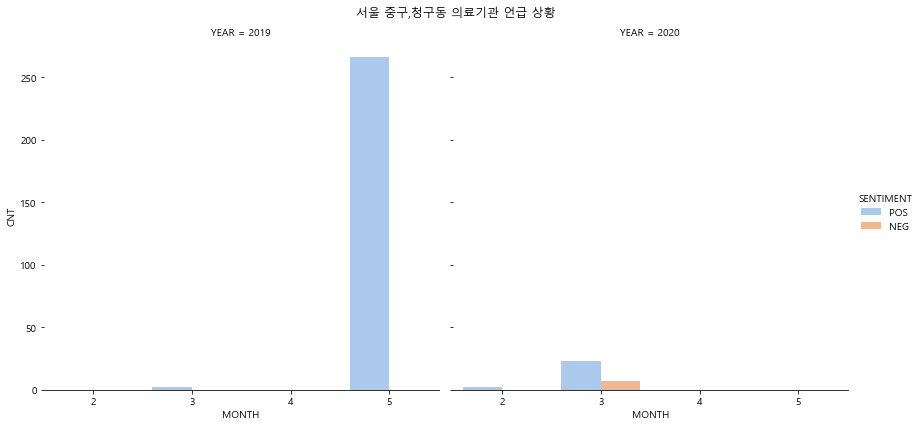

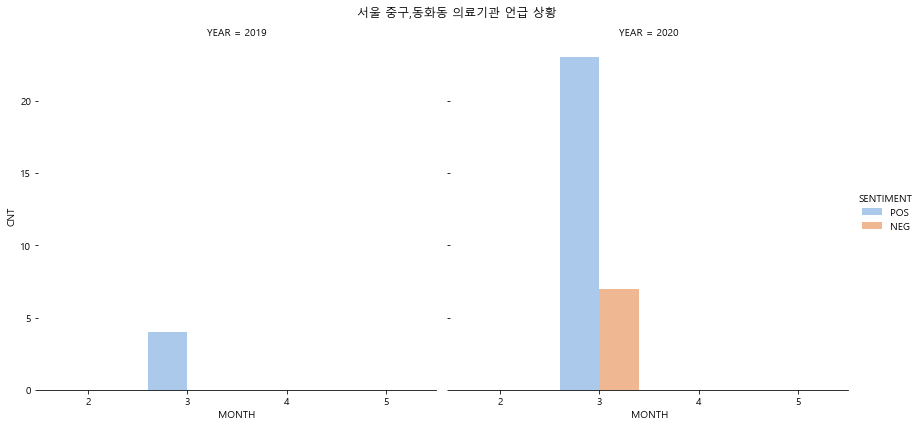

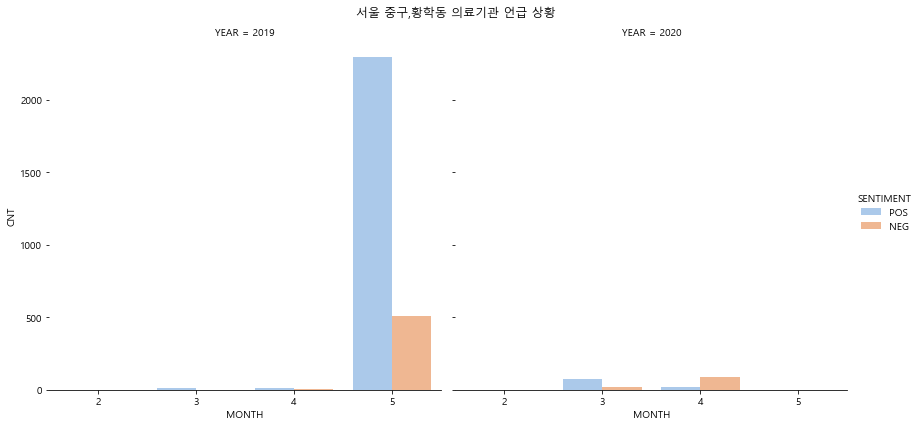

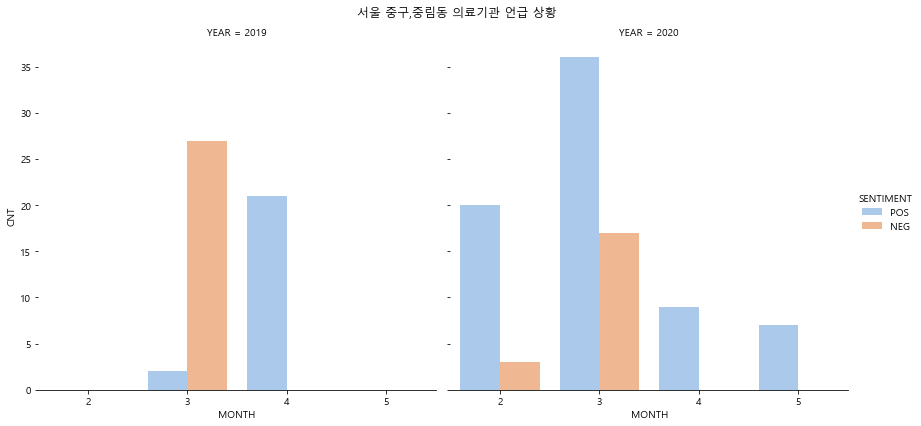

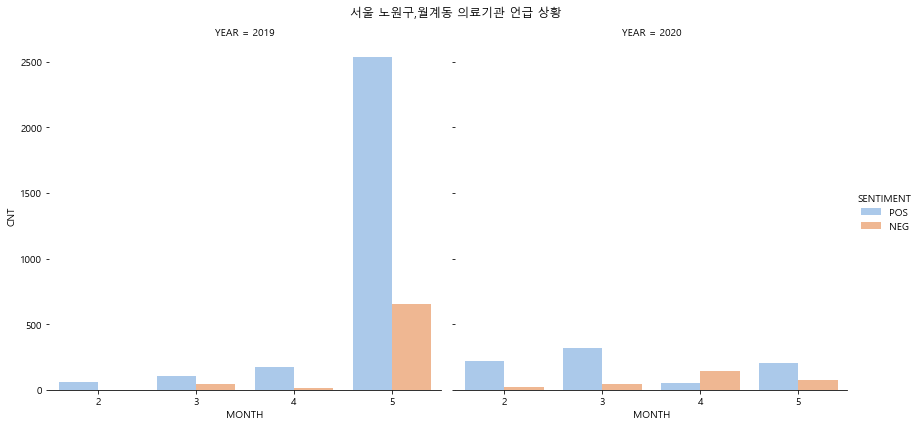

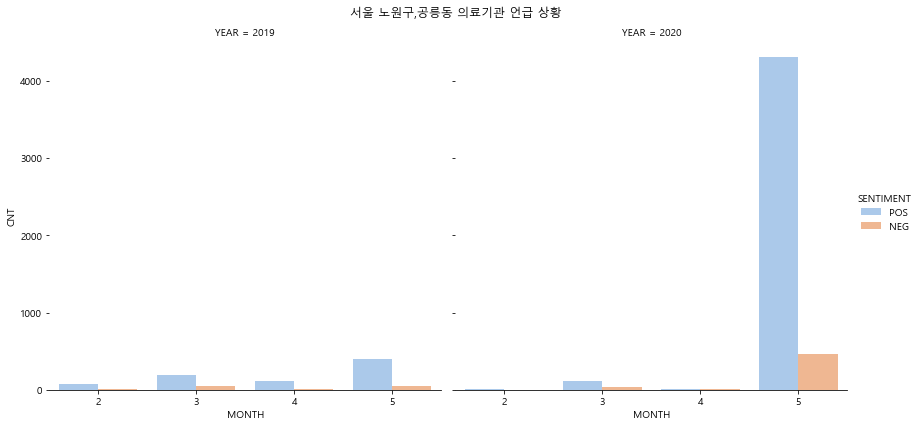

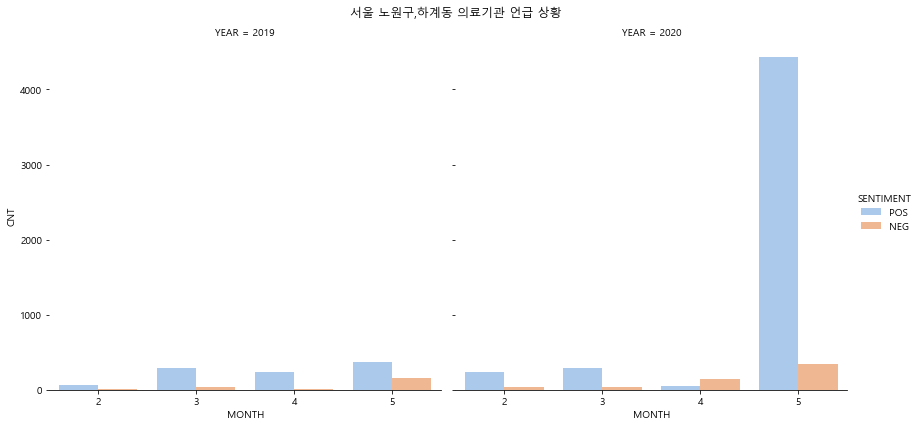

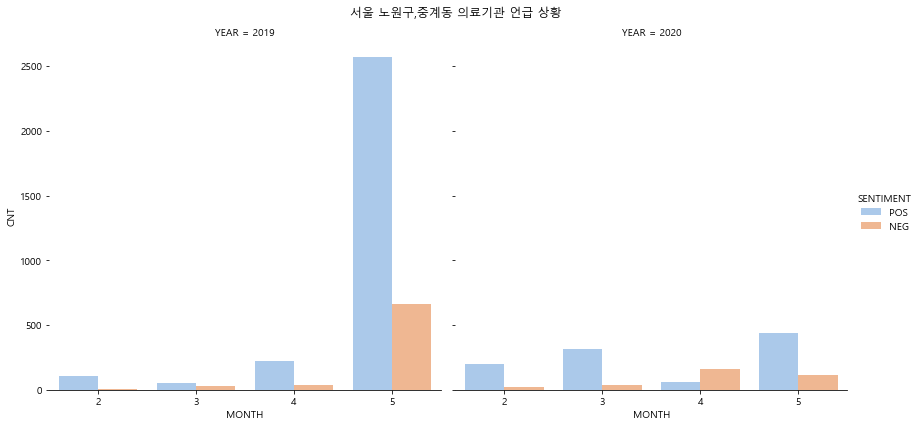

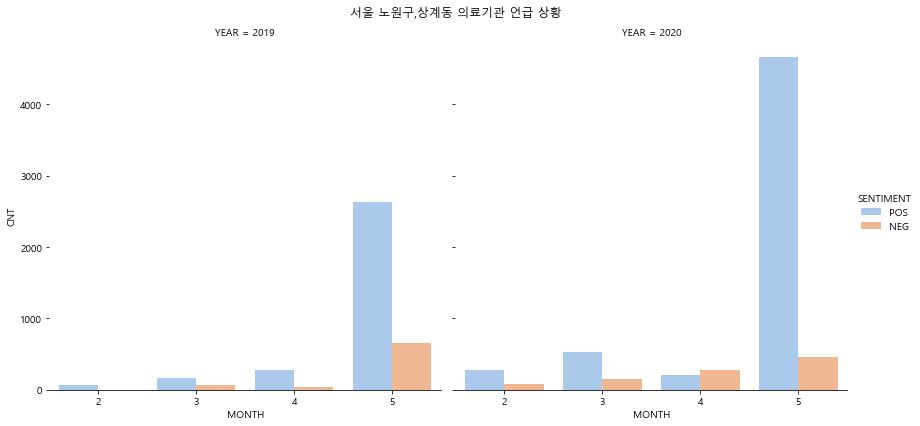

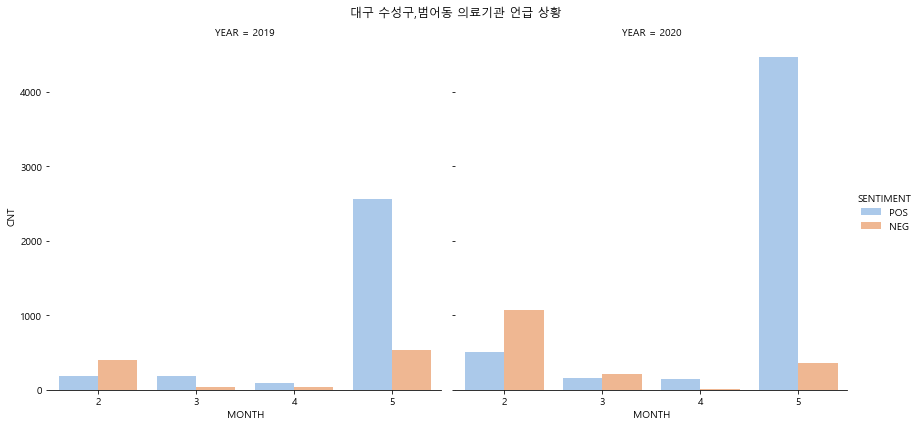

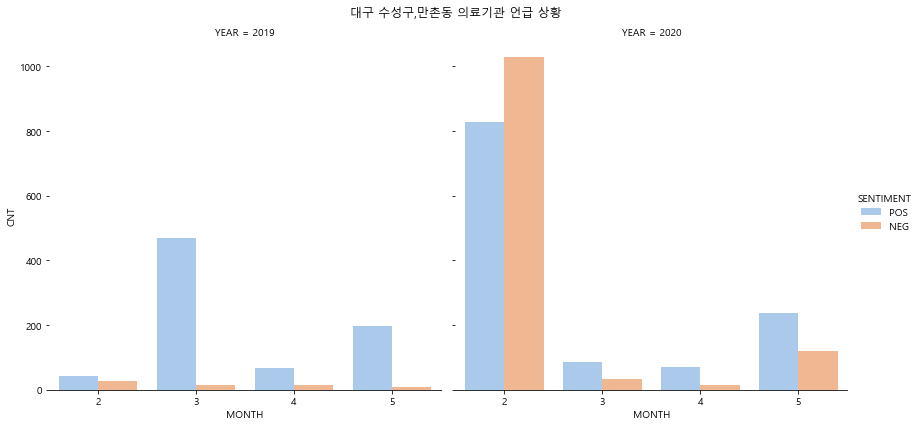

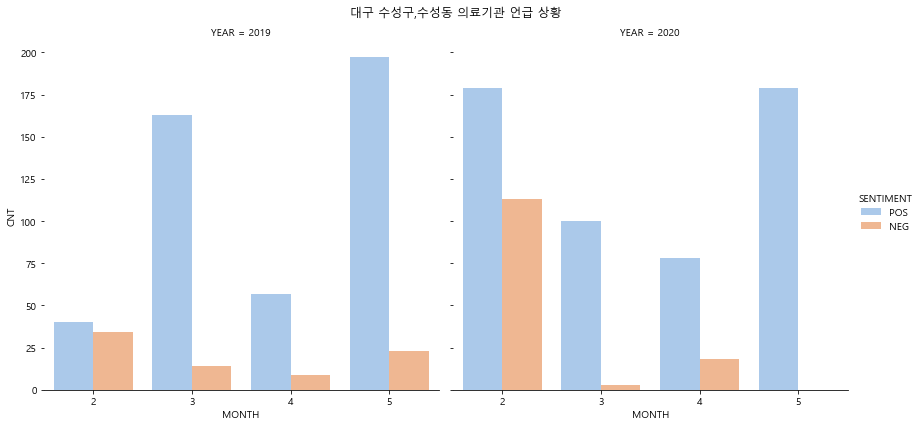

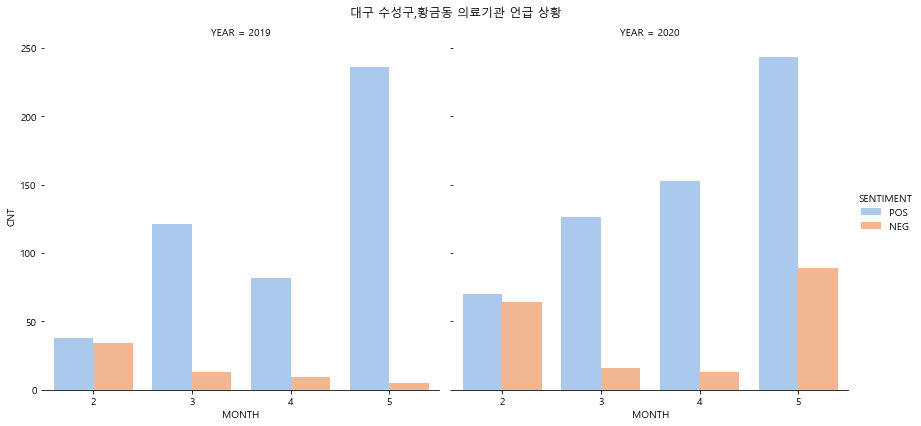

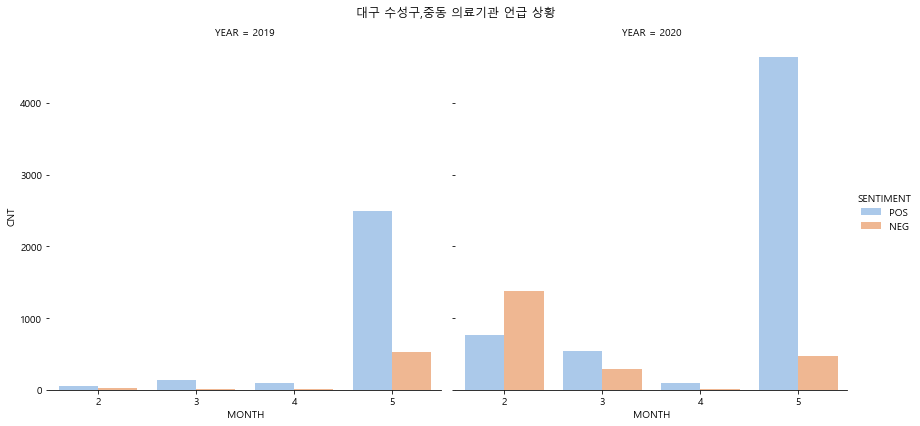

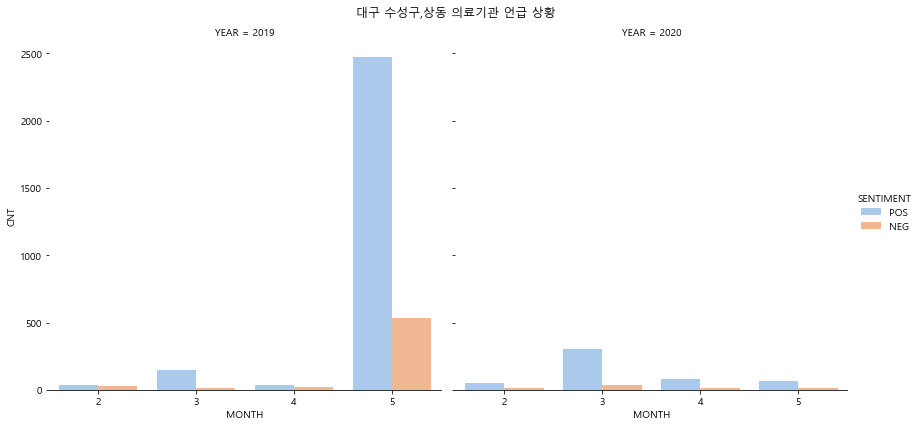

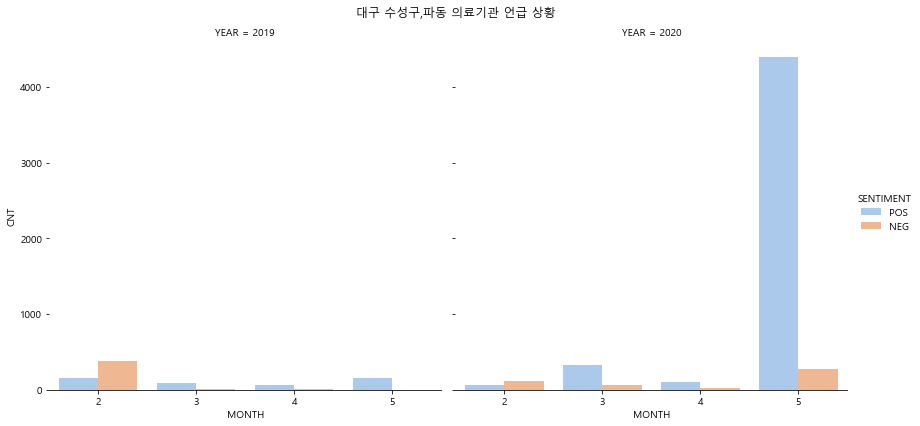

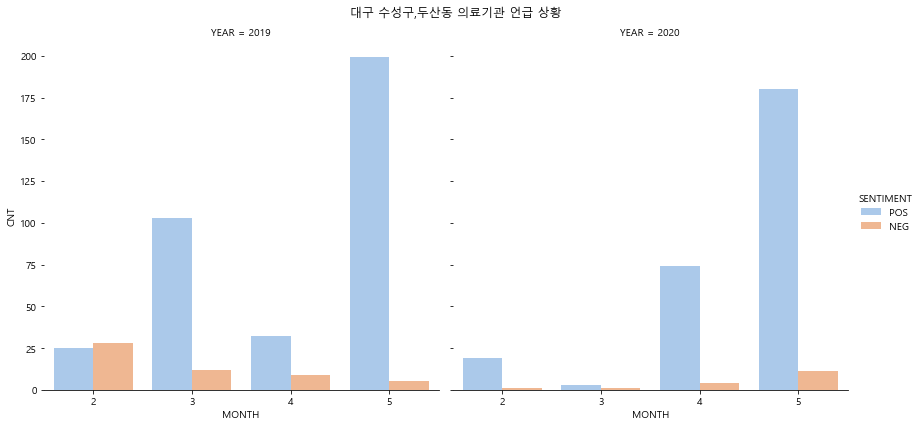

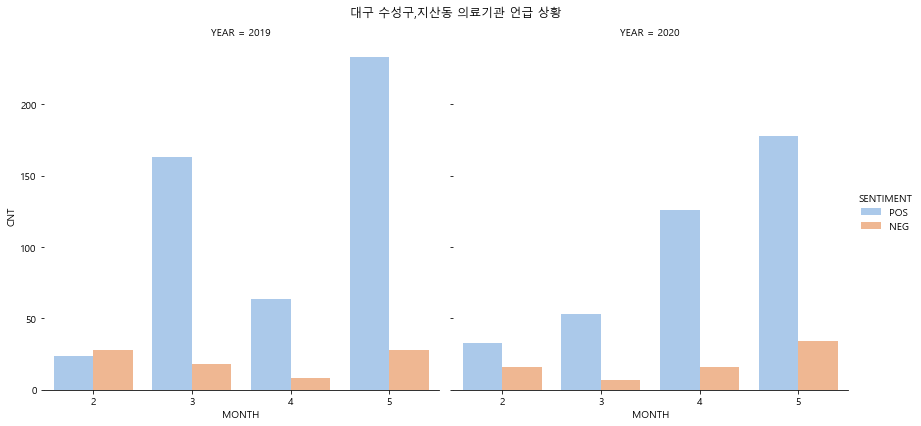

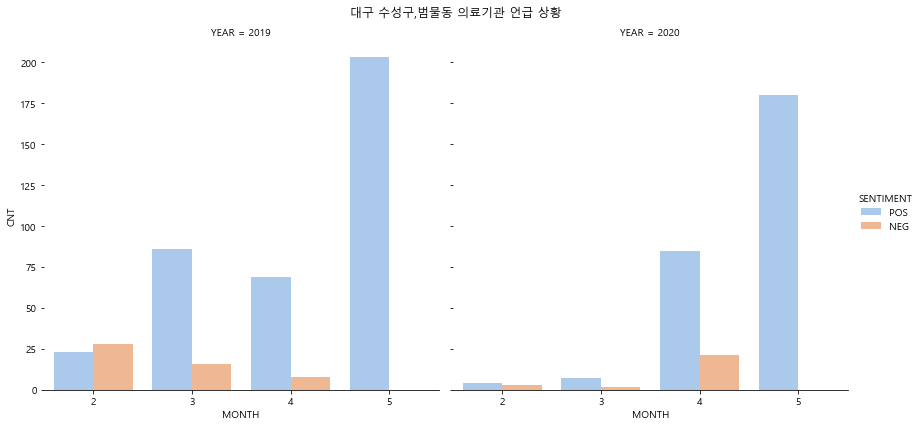

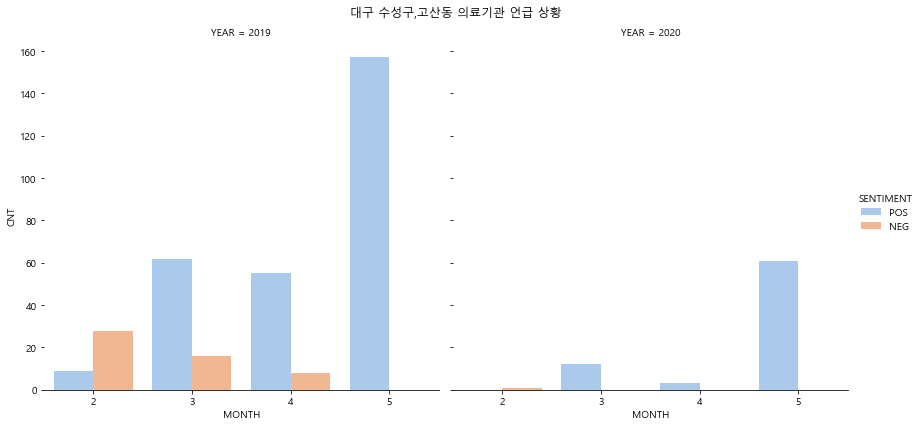

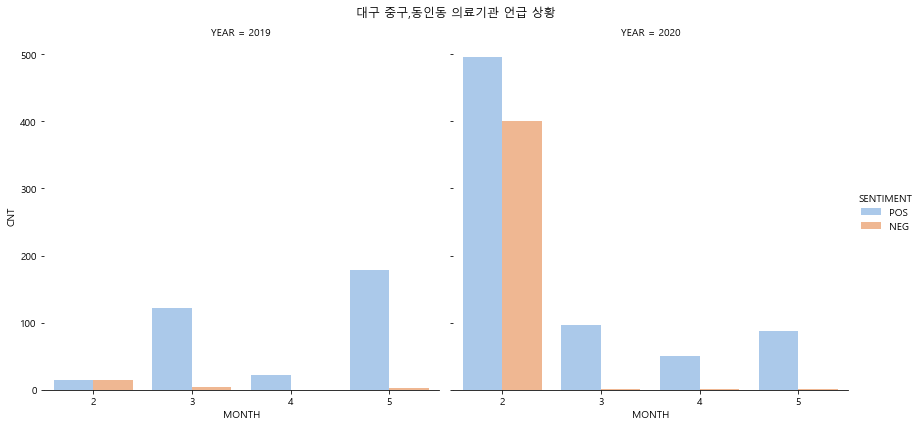

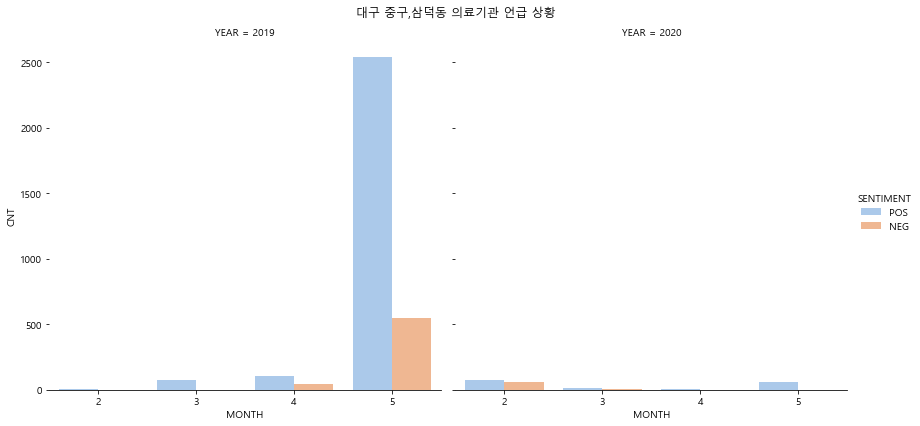

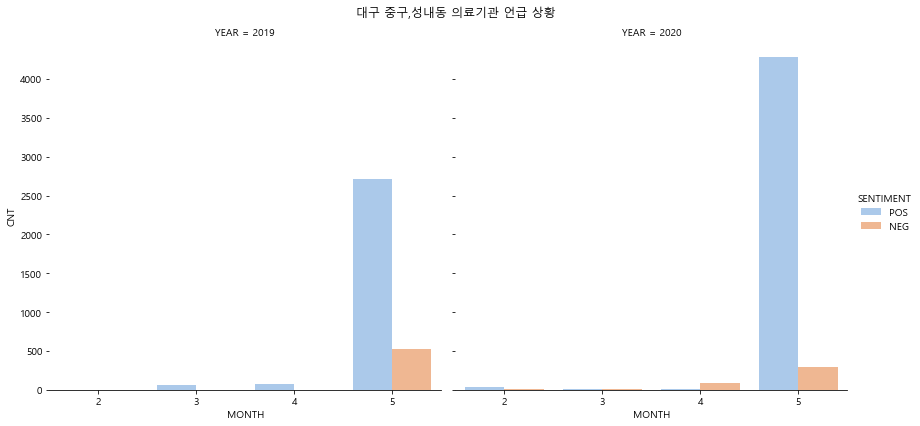

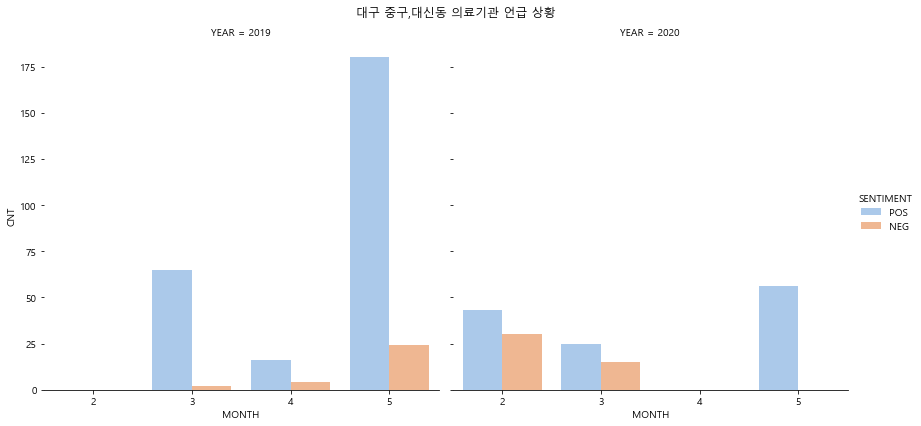

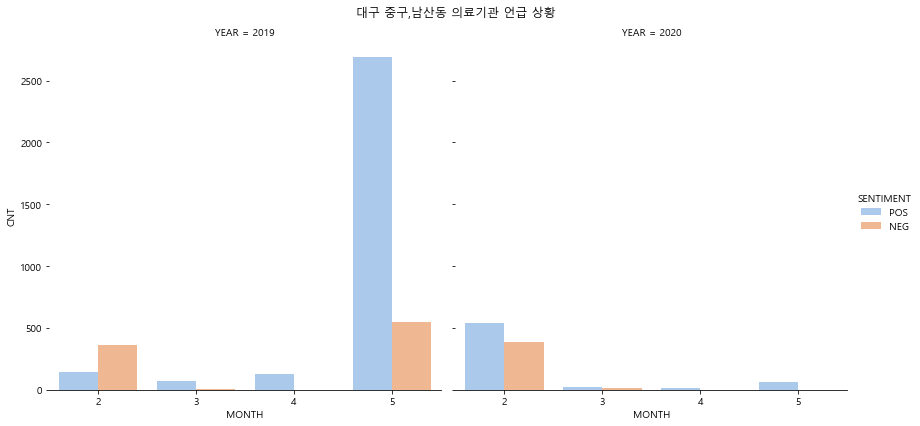

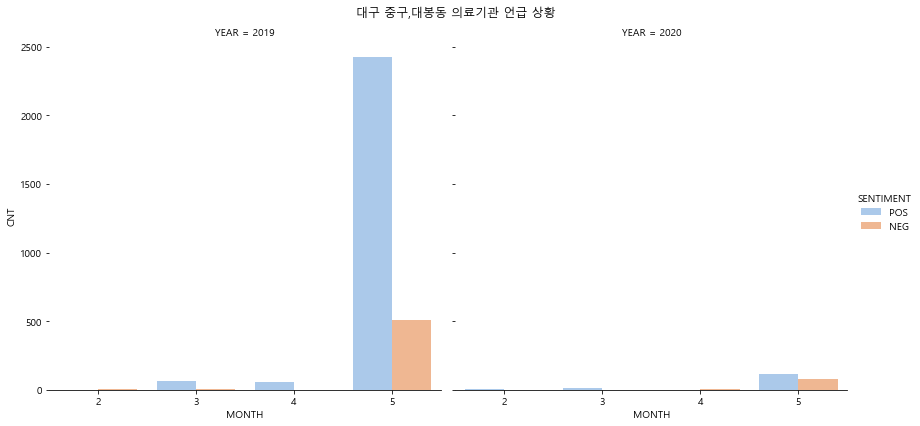

In [43]:
## 행정동별 의료기관 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP4"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 의료기관 언급 상황')

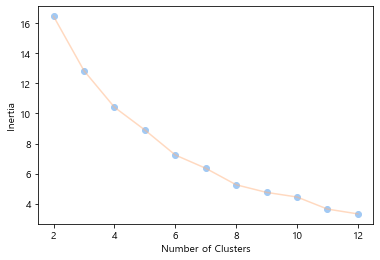

<Figure size 720x720 with 0 Axes>

In [44]:
up4 = pd.pivot_table(pg.query('UP == "UP4"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up4.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(up4)
print(pd.Series(kmeans.labels_).value_counts())

1    17
2     8
3     7
0     3
dtype: int64


In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(up4.iloc[:,])
up4.columns = [' '.join(col).strip() for col in up4.columns.values]
up4['cls'] = kmeans.labels_
up4_per = pd.merge(up4.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

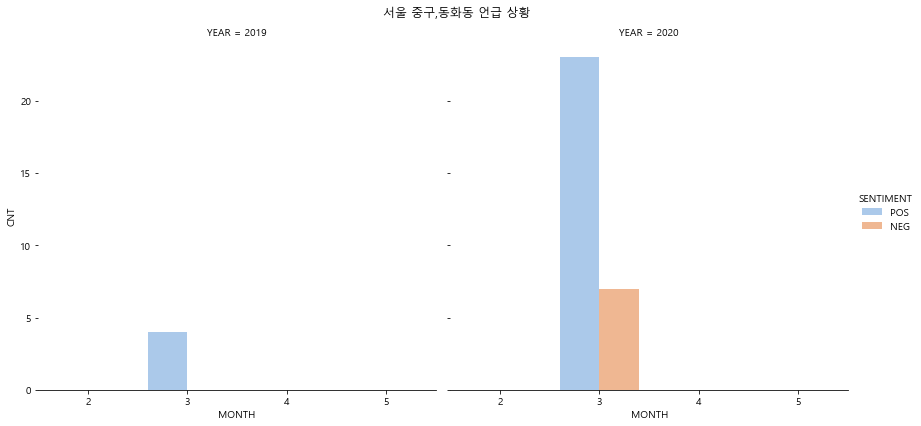

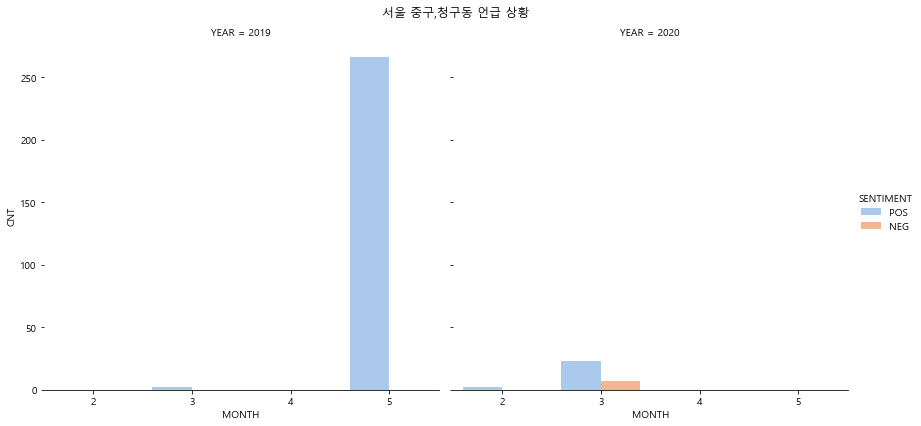

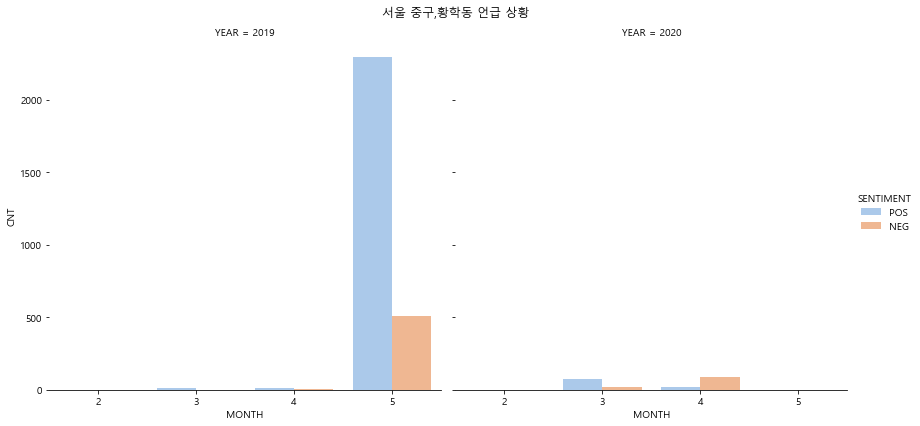

In [47]:
UPcluster(up4_per,1) #예외도 있지만 나쁘지 않음

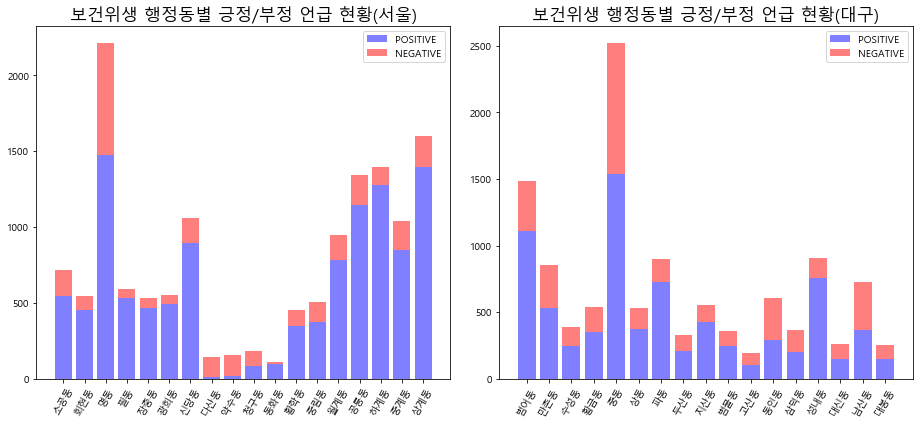

In [48]:
## 보건위생 : 서울은 명동, 대구는 중동의 언급량 많음. 서울은 언급량이 극과 극인 동 존재.

plt.figure(figsize=(13, 6))

plt.subplot(121)
df24_pos_S = df[df['CAT'].str.startswith('UP5_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df24_neg_S = df[df['CAT'].str.startswith('UP5_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df24_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df24_neg_S, color='r', alpha=alpha,
             bottom=df24_pos_S) # stacked bar chart
plt.title('보건위생 행정동별 긍정/부정 언급 현황(서울)', fontsize=17)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df24_pos_D = df[df['CAT'].str.startswith('UP5_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df24_neg_D = df[df['CAT'].str.startswith('UP5_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df24_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df24_neg_D, color='r', alpha=alpha,
             bottom=df24_pos_D) # stacked bar chart
plt.title('보건위생 행정동별 긍정/부정 언급 현황(대구)', fontsize=17)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.tight_layout()
plt.show()

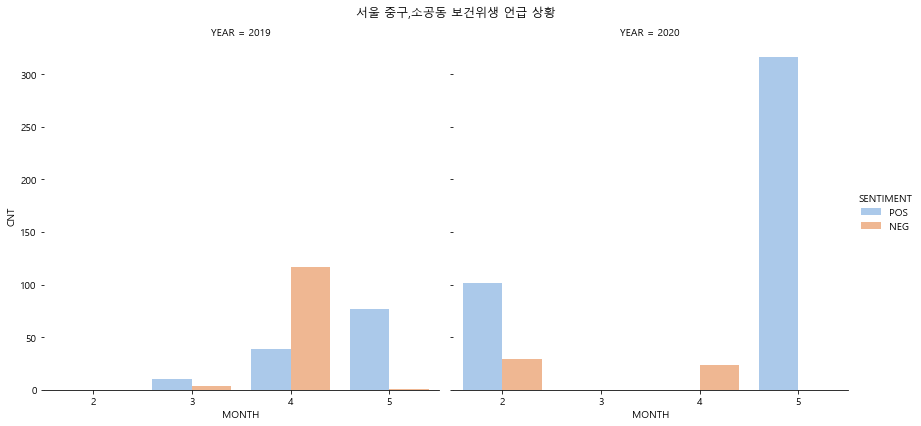

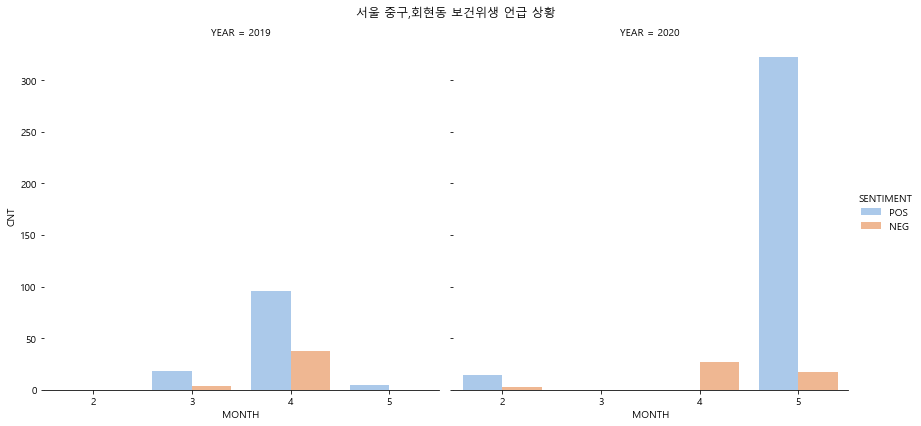

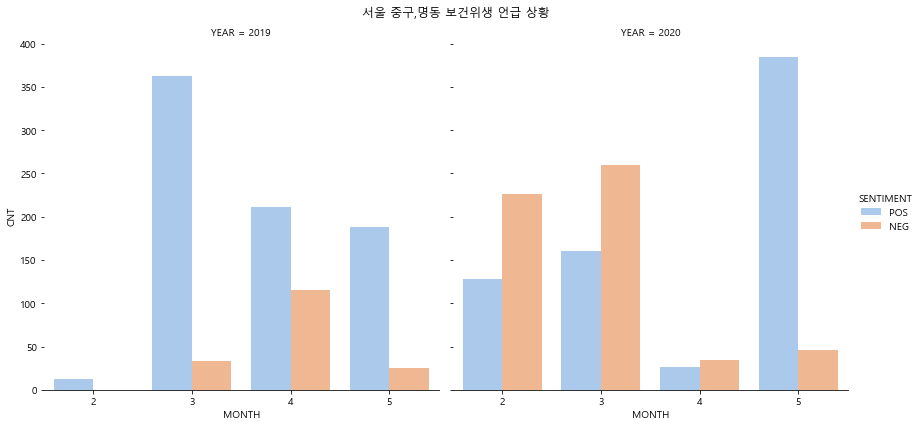

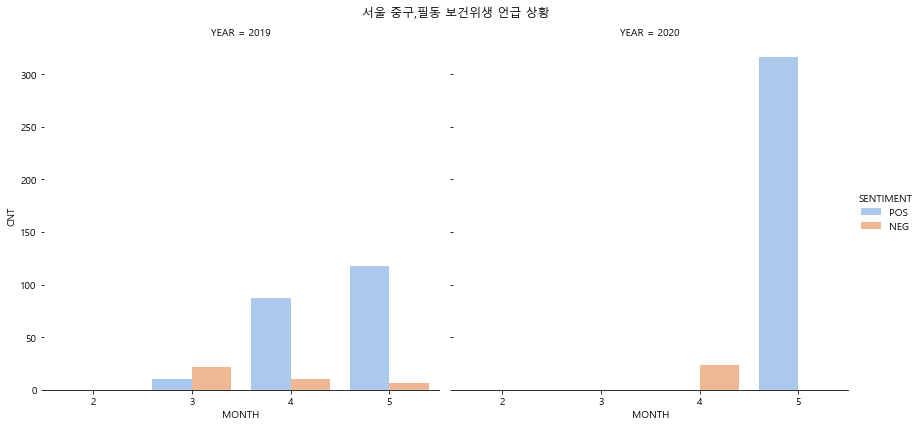

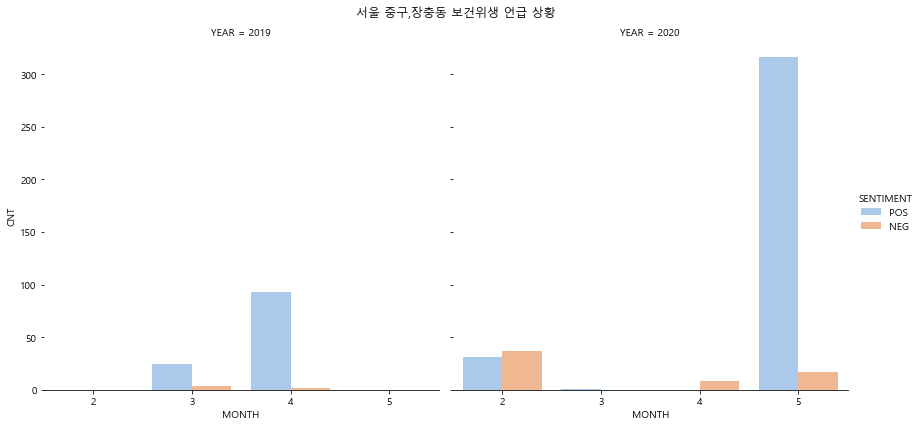

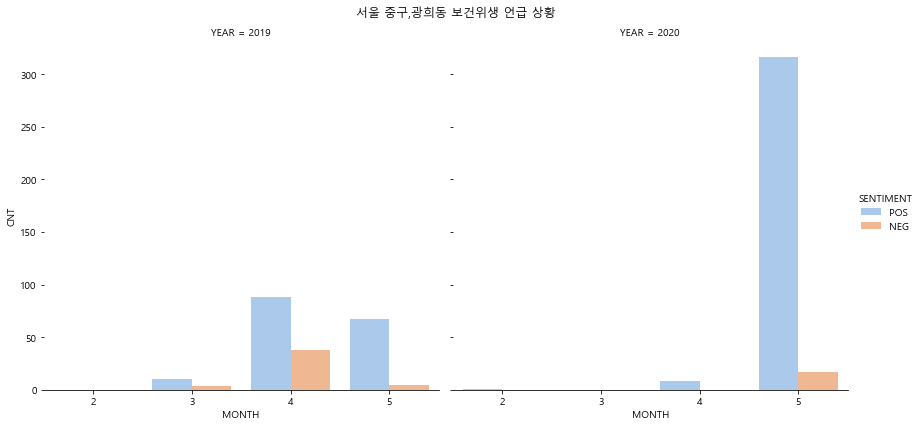

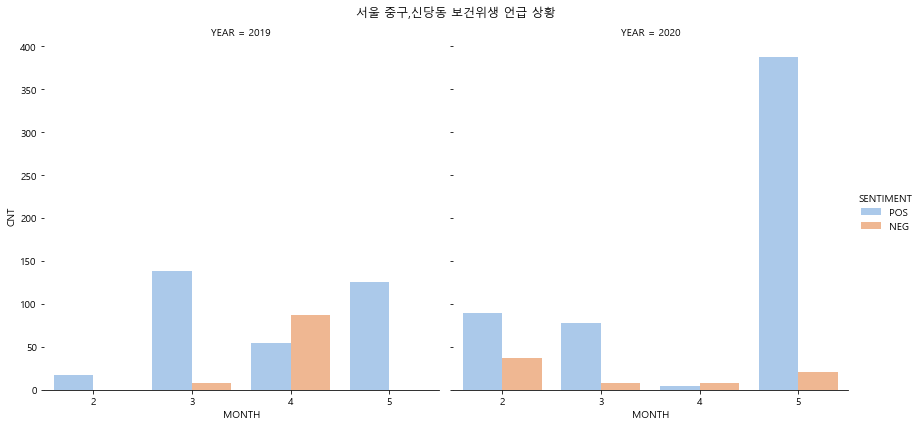

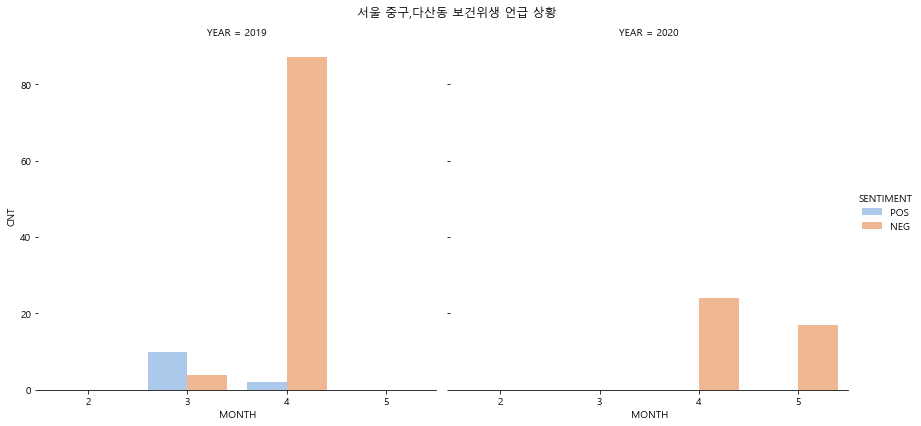

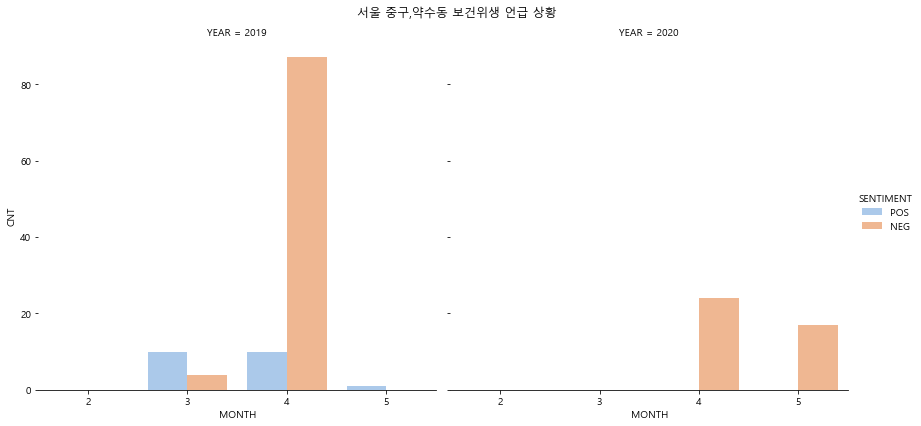

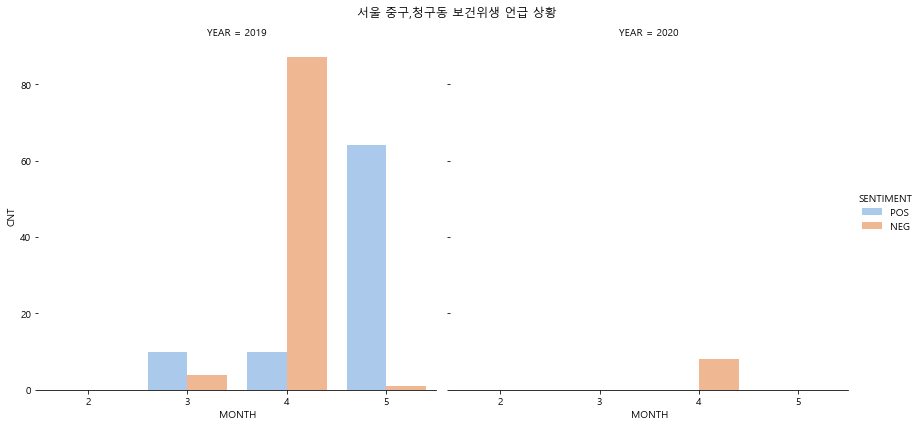

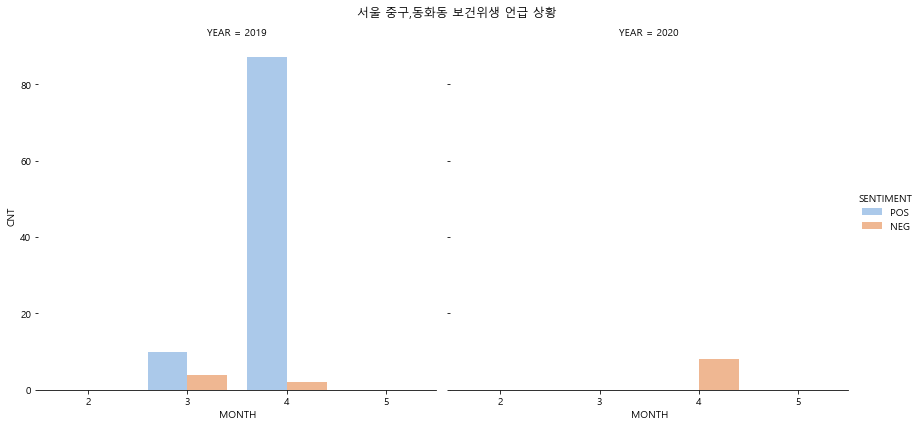

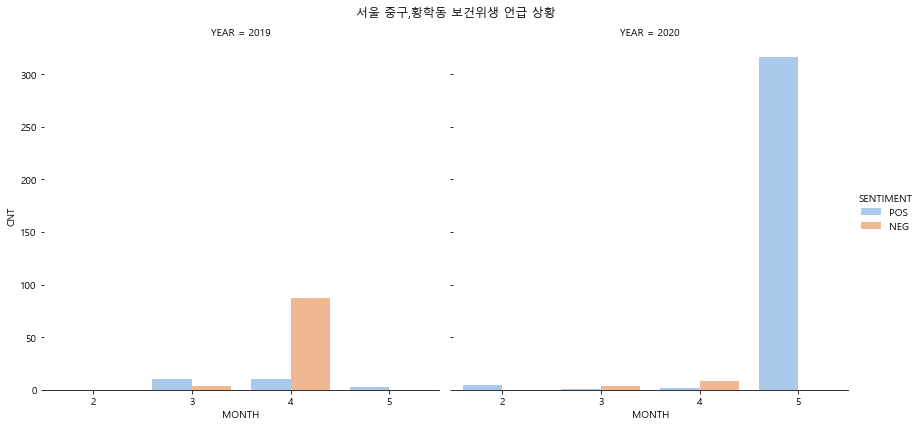

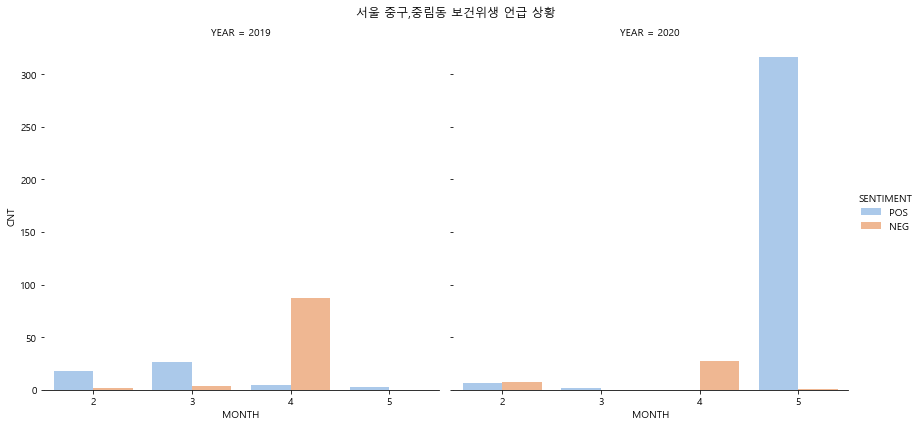

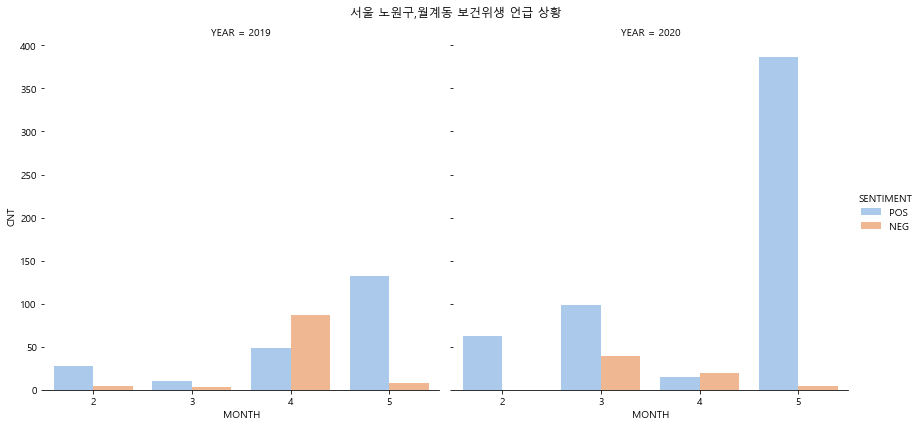

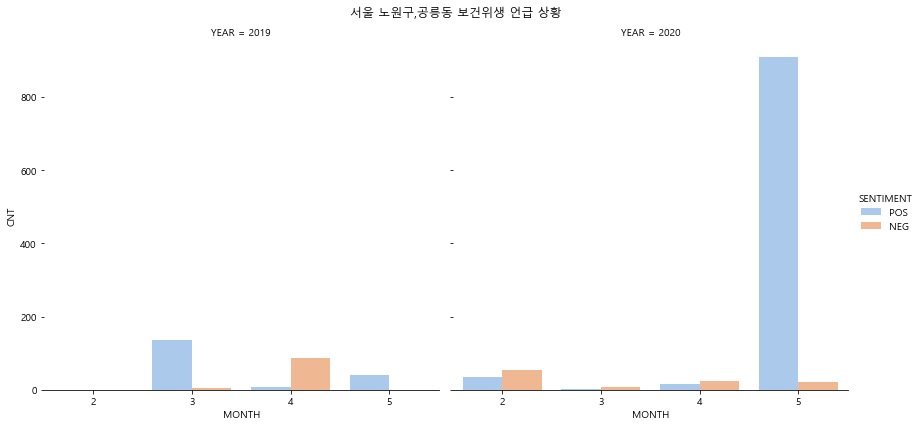

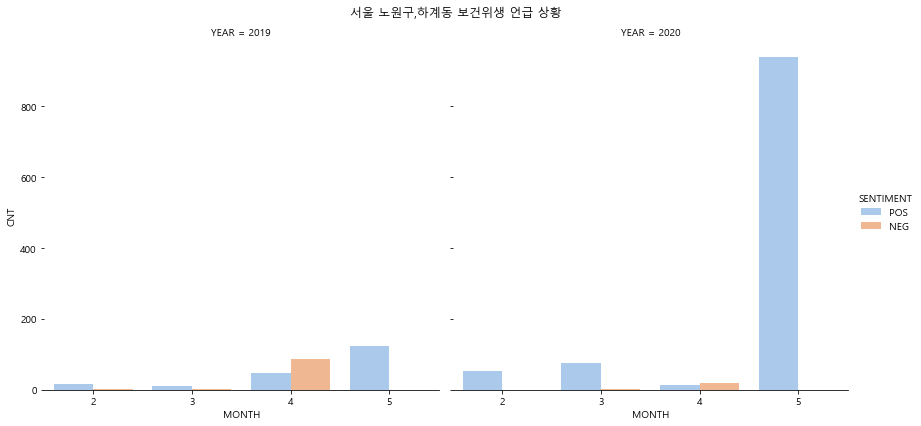

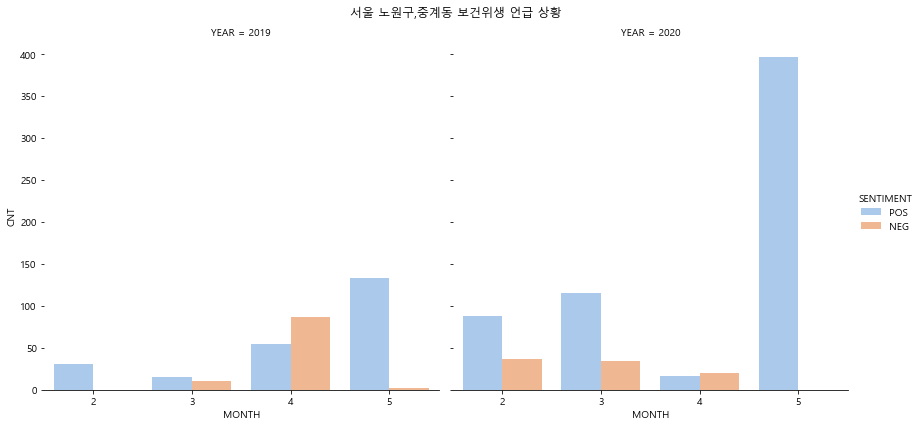

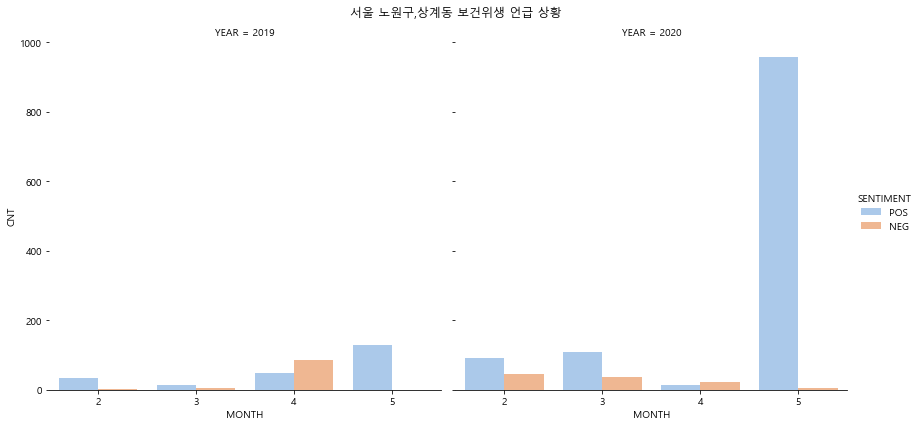

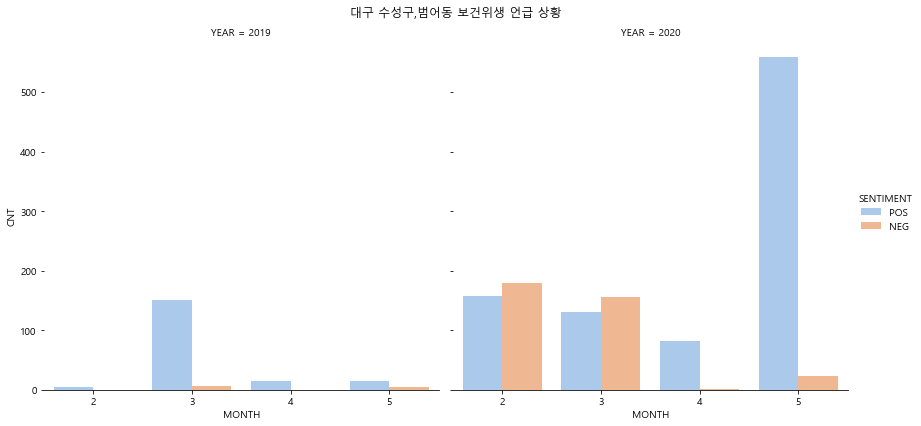

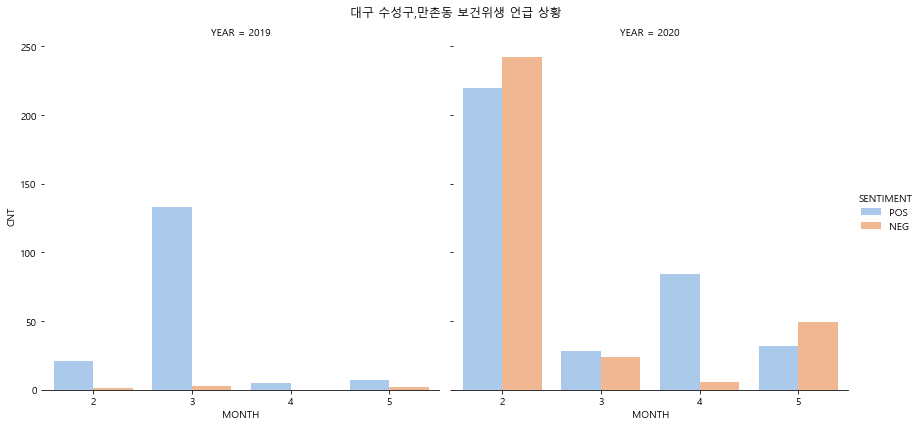

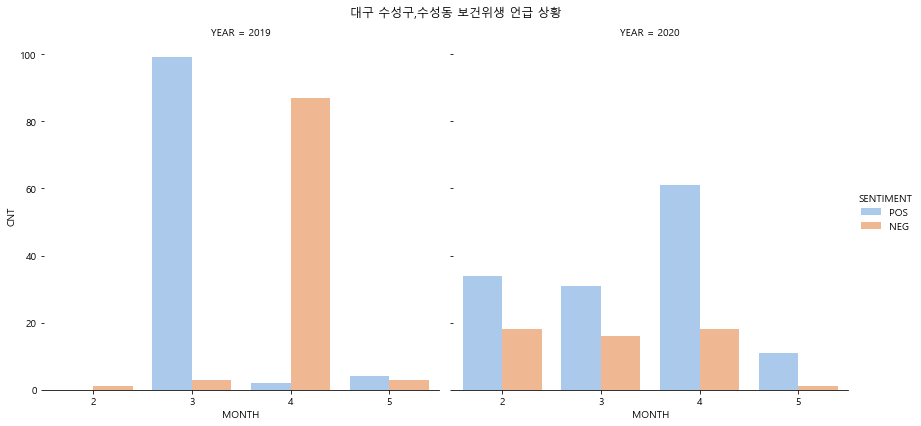

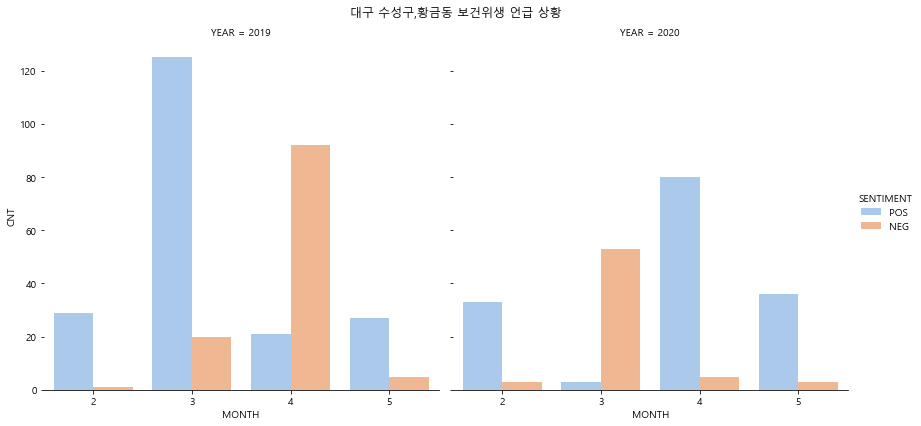

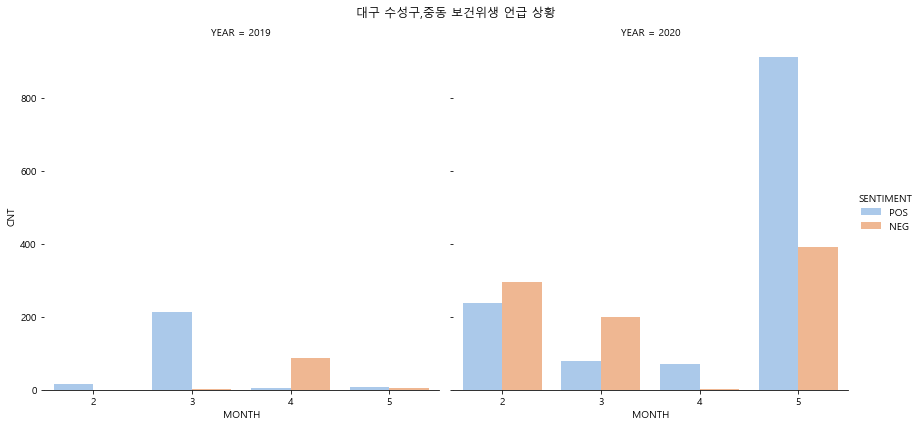

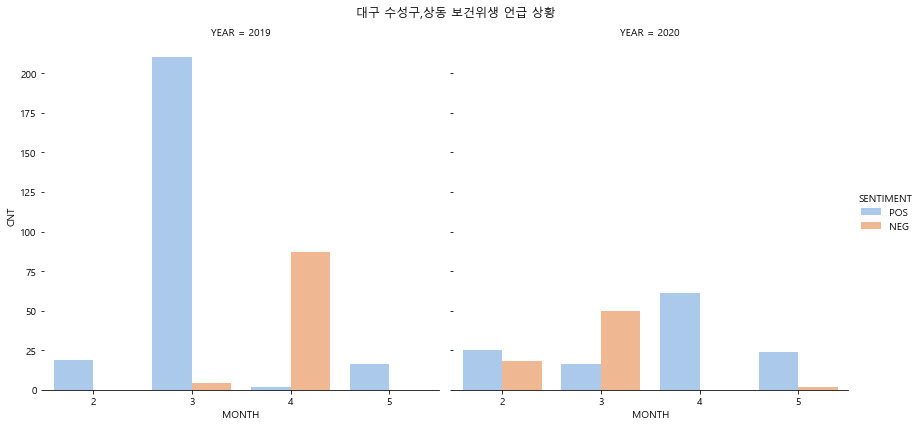

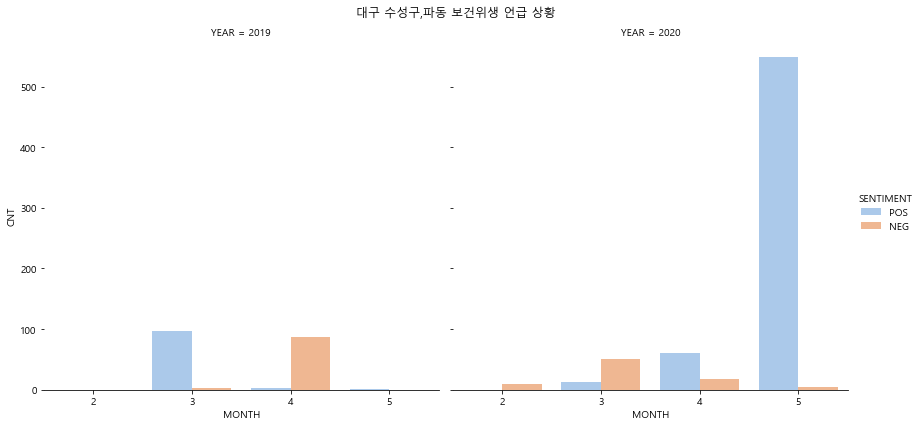

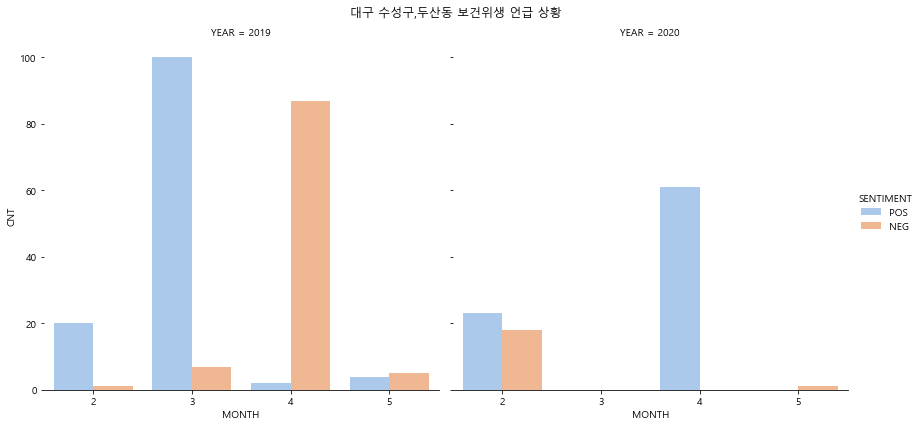

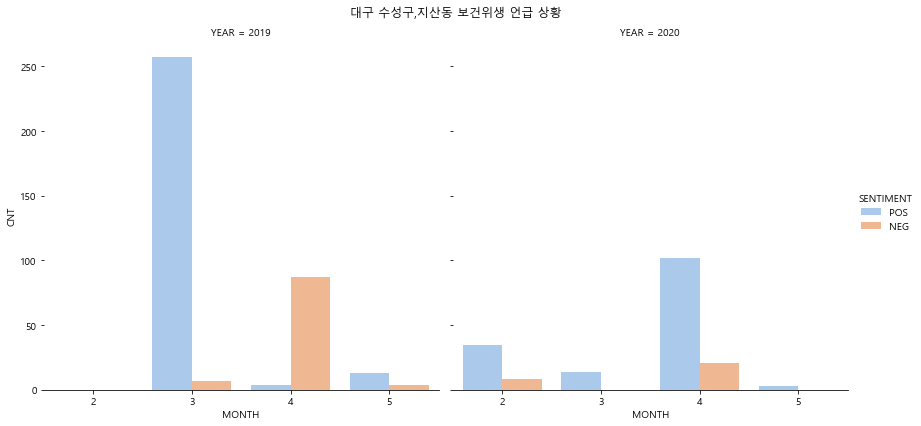

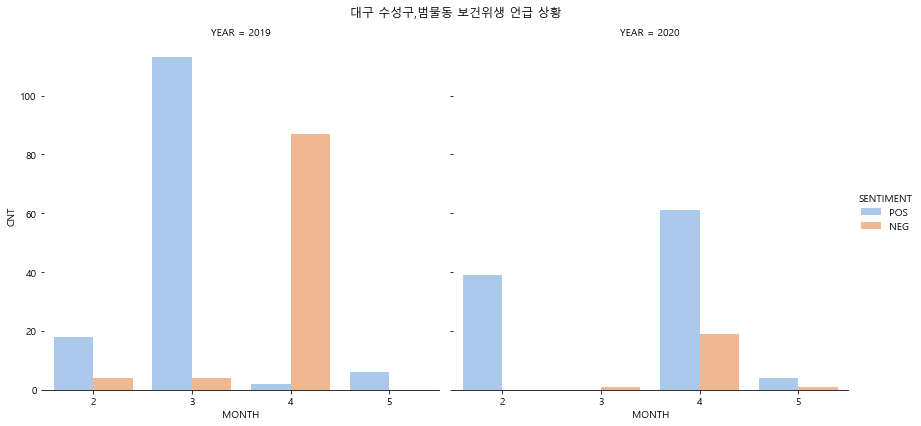

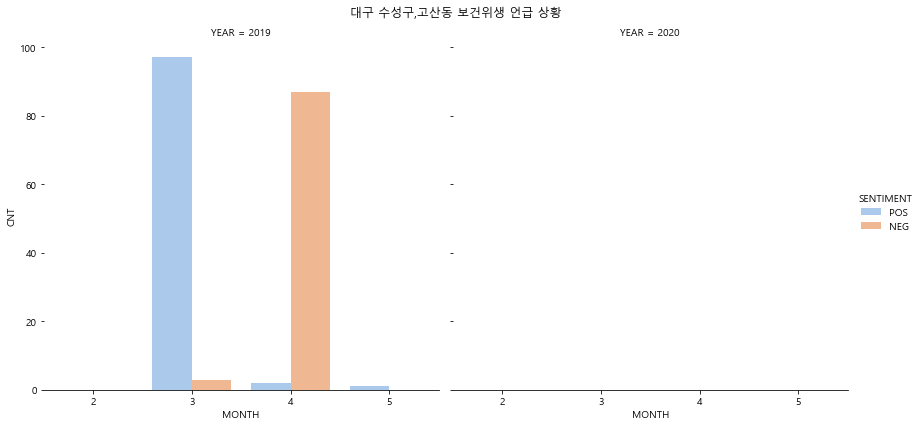

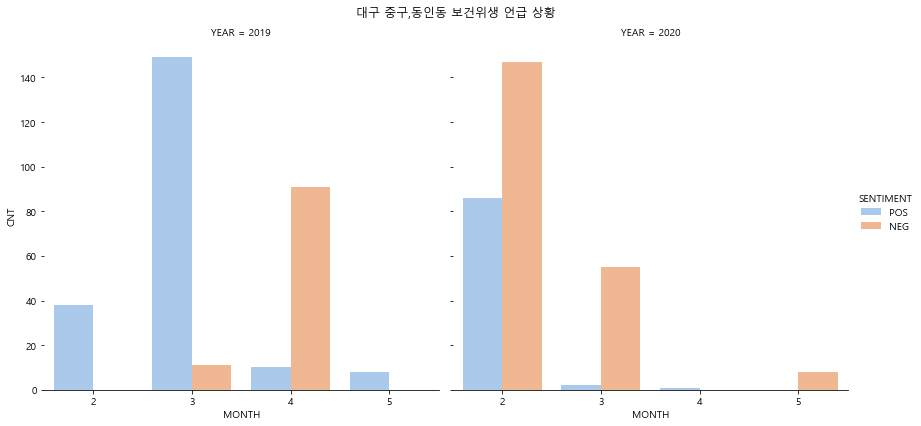

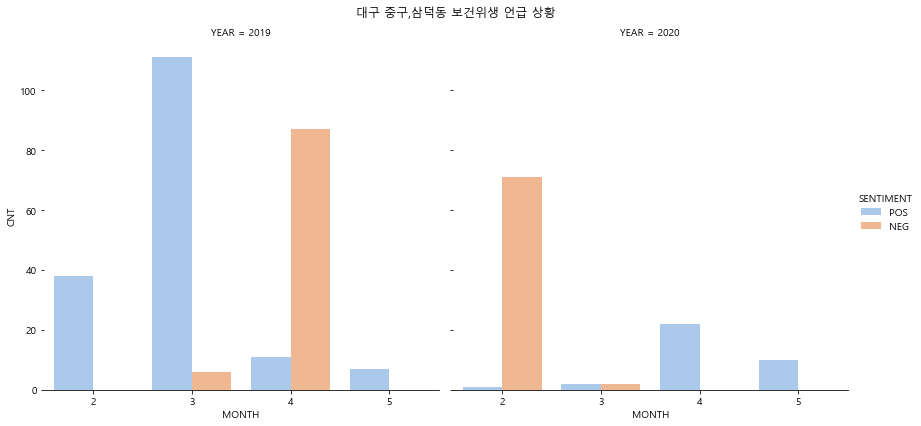

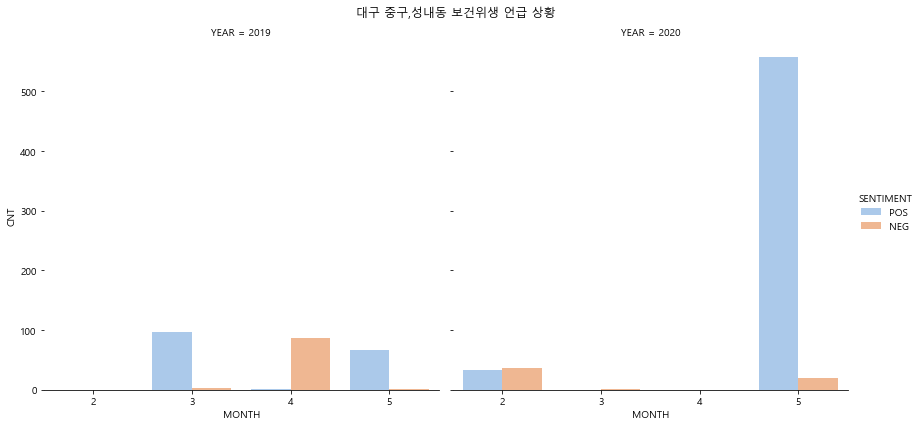

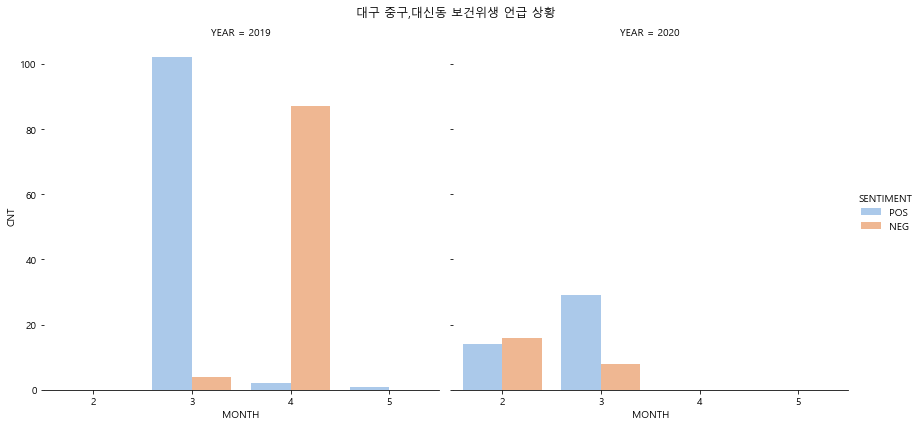

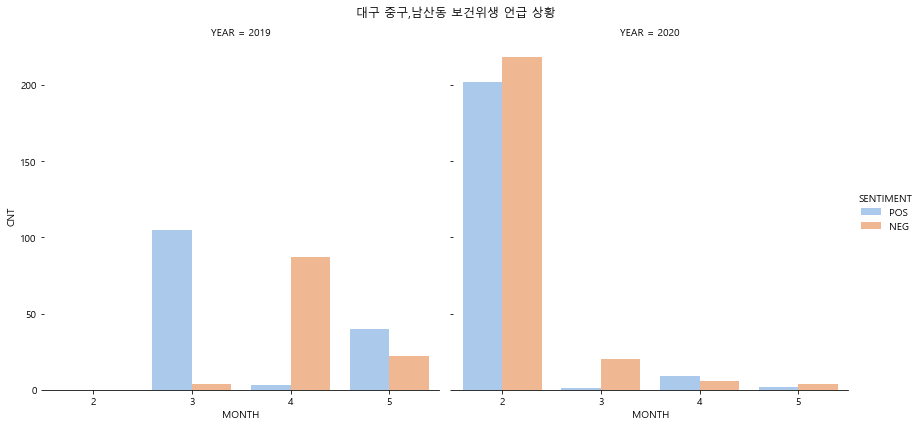

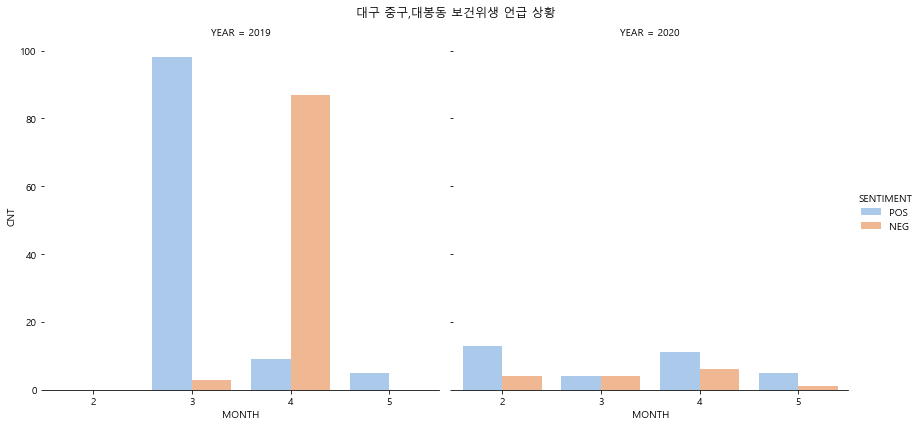

In [49]:
## 행정동별 보건위생 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP5"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 보건위생 언급 상황')

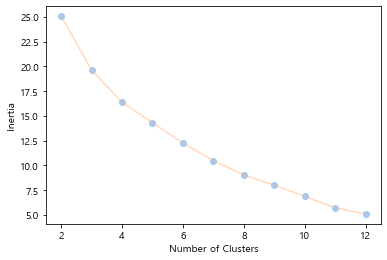

<Figure size 720x720 with 0 Axes>

In [50]:
up5 = pd.pivot_table(pg.query('UP == "UP5"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up5.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(up5)
print(pd.Series(kmeans.labels_).value_counts())

3    10
1    10
2     7
0     6
4     2
dtype: int64


In [52]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(up5.iloc[:,])
up5.columns = [' '.join(col).strip() for col in up5.columns.values]
up5['cls'] = kmeans.labels_
up5_per = pd.merge(up5.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

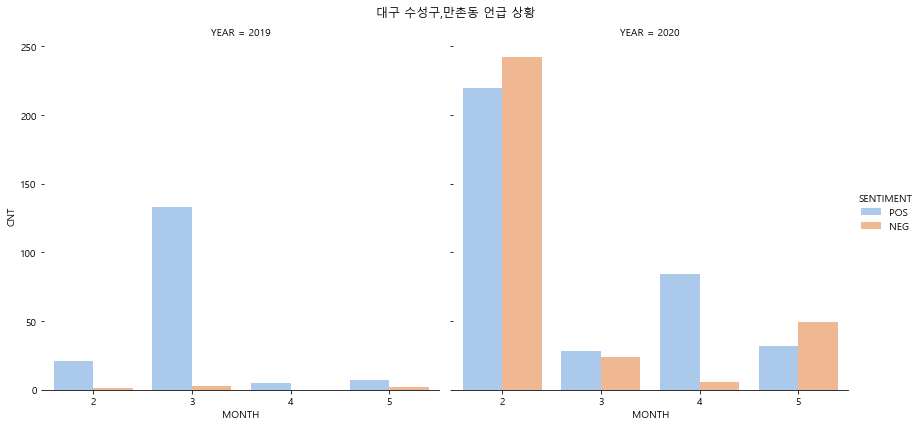

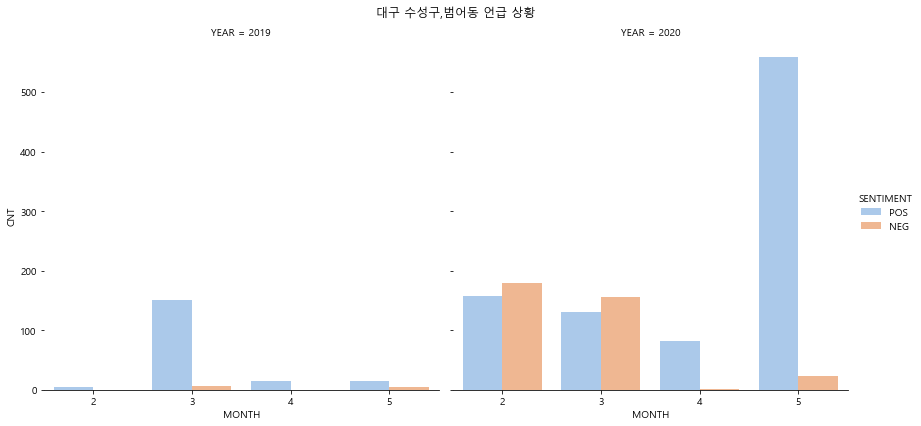

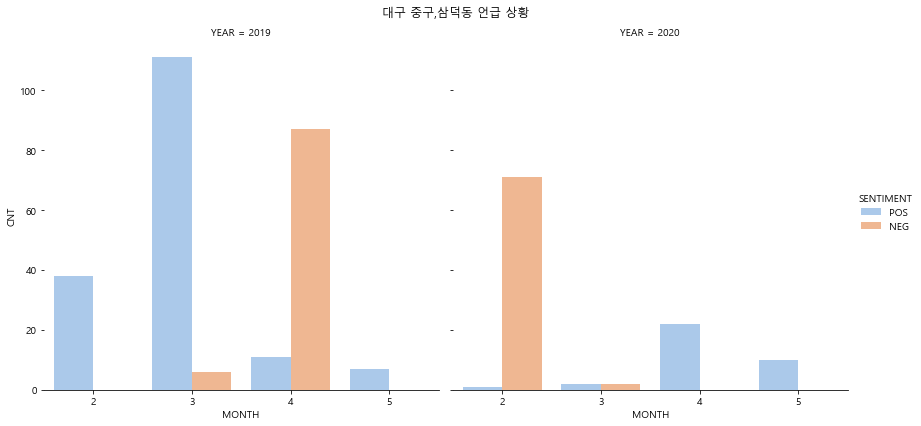

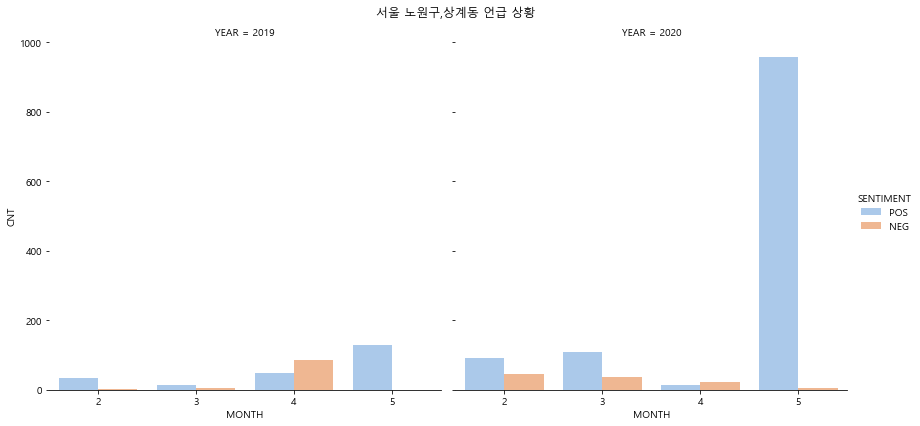

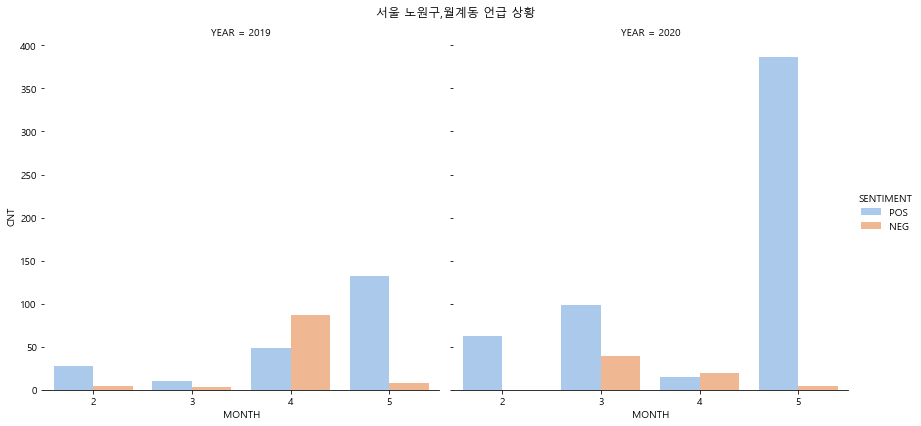

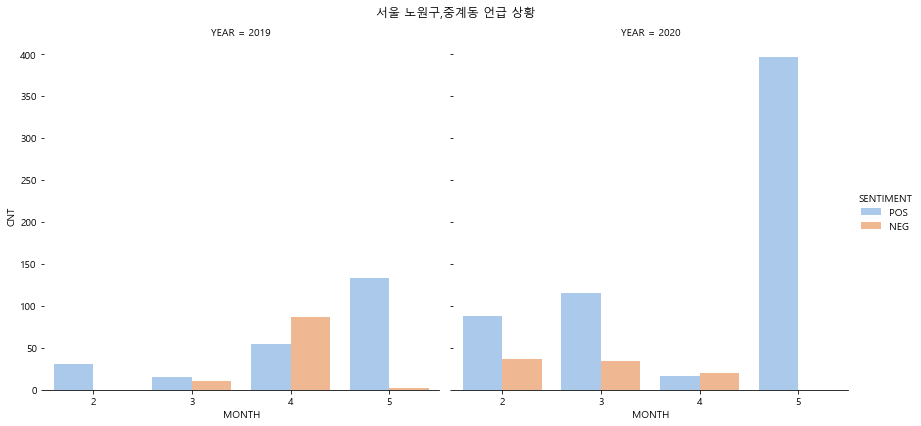

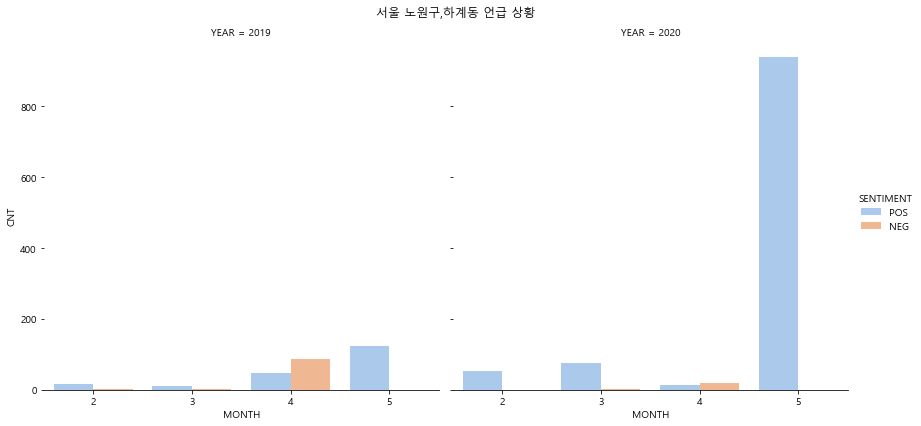

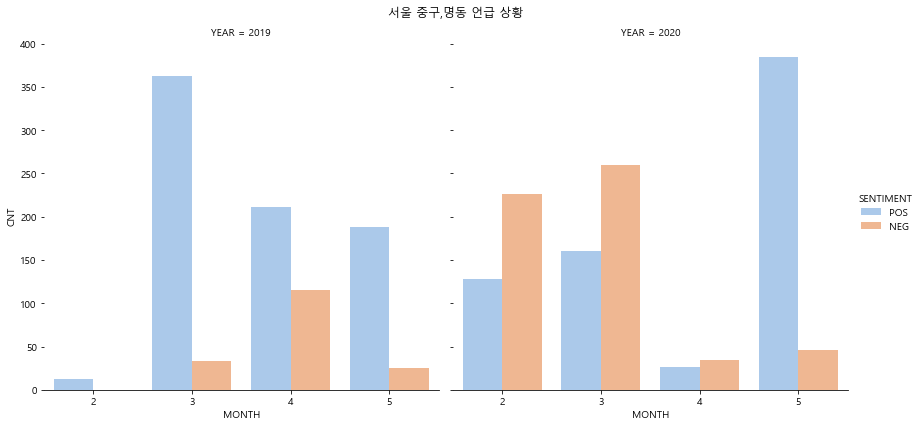

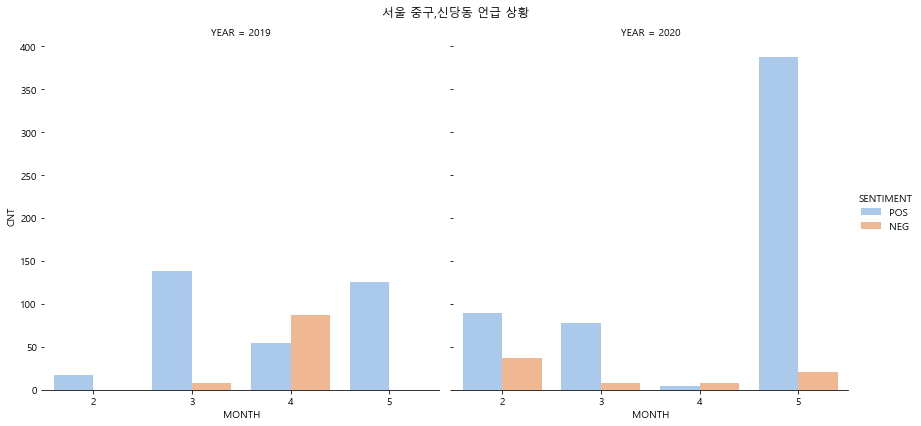

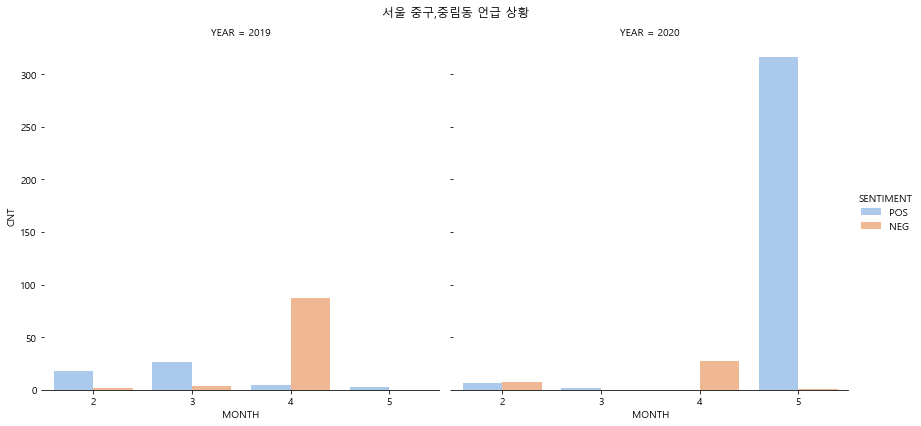

In [53]:
UPcluster(up5_per,2) #실...패?

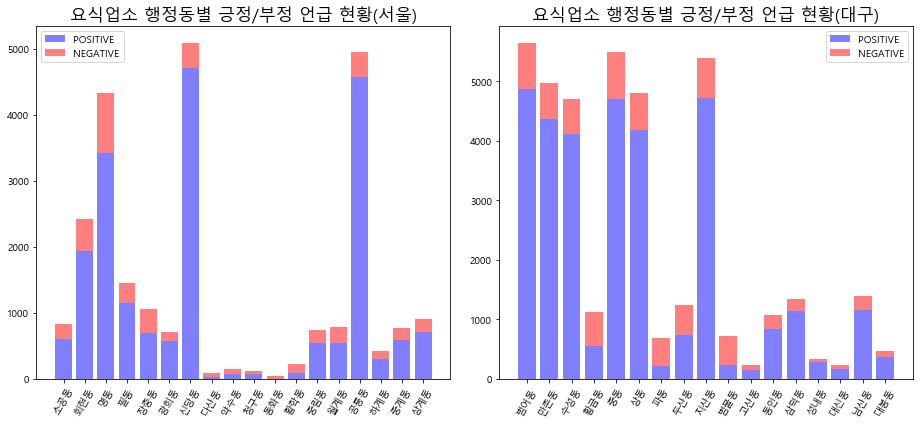

In [54]:
## 요식업소 : 서울과 대구 모두 극과 극으로 두드러진 경우가 많음

plt.figure(figsize=(13, 6))

plt.subplot(121)
df25_pos_S = df[df['CAT'].str.startswith('UP6_POS')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df25_neg_S = df[df['CAT'].str.startswith('UP6_NEG')].query('(GU_CD == 140) or (GU_CD == 350)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label1 = list(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'])
N = len(df.query('(GU_CD == 140) or (GU_CD == 350)')['DONG_NM'].unique())
index1 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index1, df25_pos_S, color='b', alpha=alpha)
p2 = plt.bar(index1, df25_neg_S, color='r', alpha=alpha,
             bottom=df25_pos_S) # stacked bar chart
plt.title('요식업소 행정동별 긍정/부정 언급 현황(서울)', fontsize=17)
plt.xticks(index1, label1, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.subplot(122)
df25_pos_D = df[df['CAT'].str.startswith('UP6_POS')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
df25_neg_D = df[df['CAT'].str.startswith('UP6_NEG')].query('(GU_CD == 260) or (GU_CD == 110)').groupby(['SEQ','DONG_NM'])['CNT'].sum()
label2 = list(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'])
N = len(df.query('(GU_CD == 260) or (GU_CD == 110)')['DONG_NM'].unique())
index2 = np.arange(N)
alpha = 0.5
p1 = plt.bar(index2, df25_pos_D, color='b', alpha=alpha)
p2 = plt.bar(index2, df25_neg_D, color='r', alpha=alpha,
             bottom=df25_pos_D) # stacked bar chart
plt.title('요식업소 행정동별 긍정/부정 언급 현황(대구)', fontsize=17)
plt.xticks(index2, label2, rotation=60, fontsize=10)
plt.legend((p1[0], p2[0]), ('POSITIVE', 'NEGATIVE'), fontsize=10)

plt.tight_layout()
plt.show()

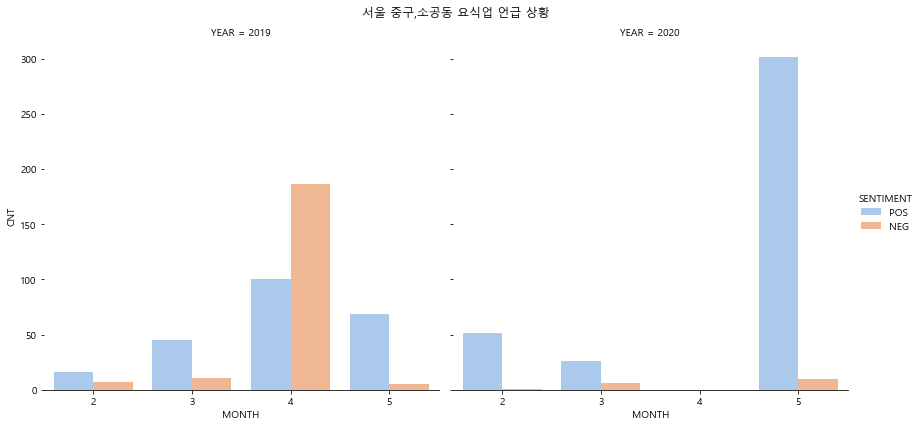

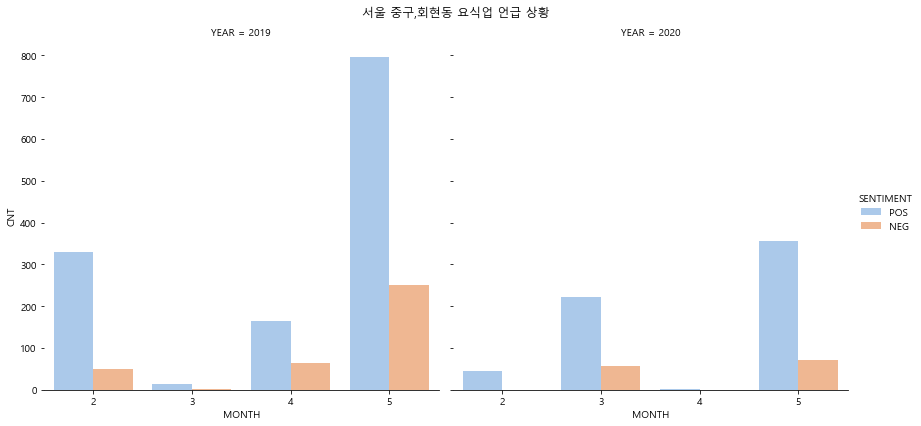

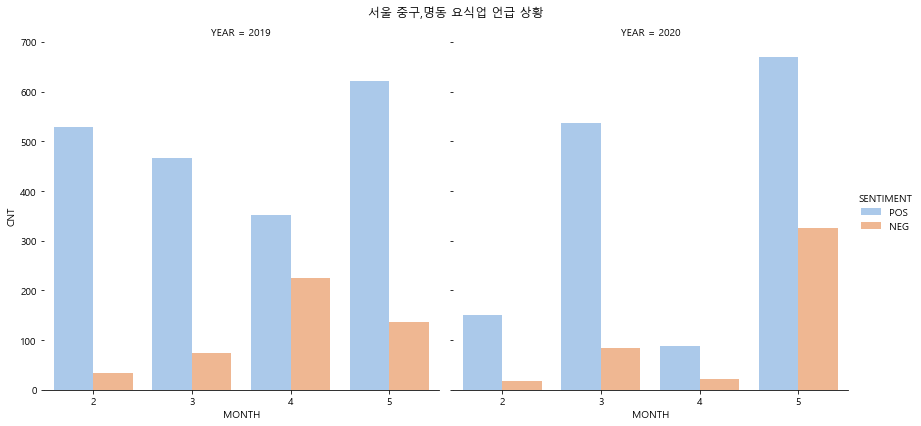

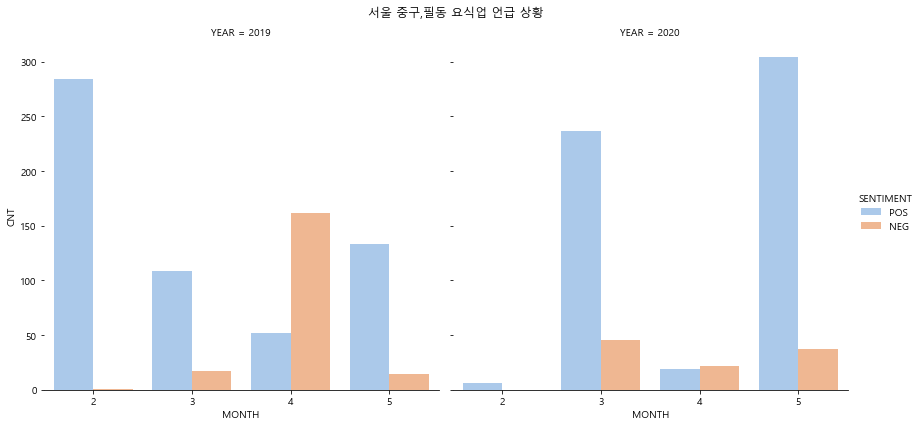

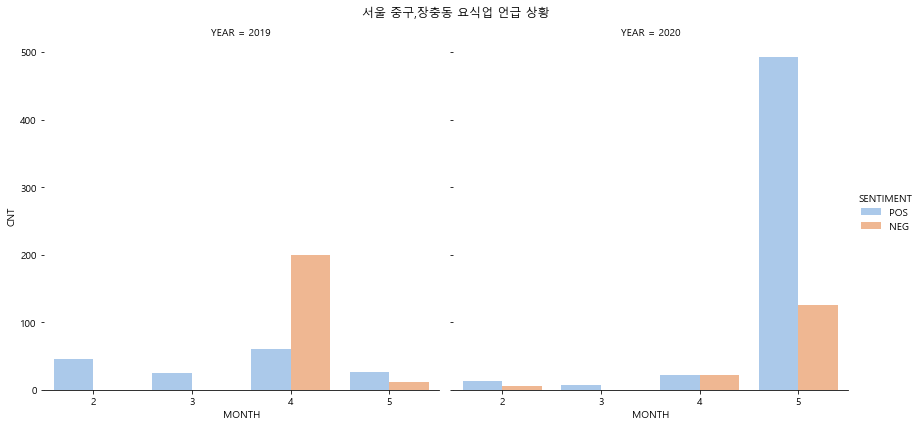

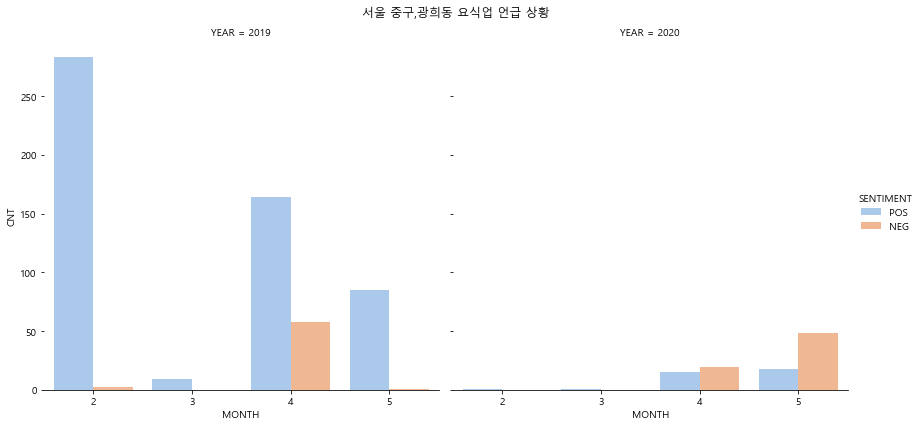

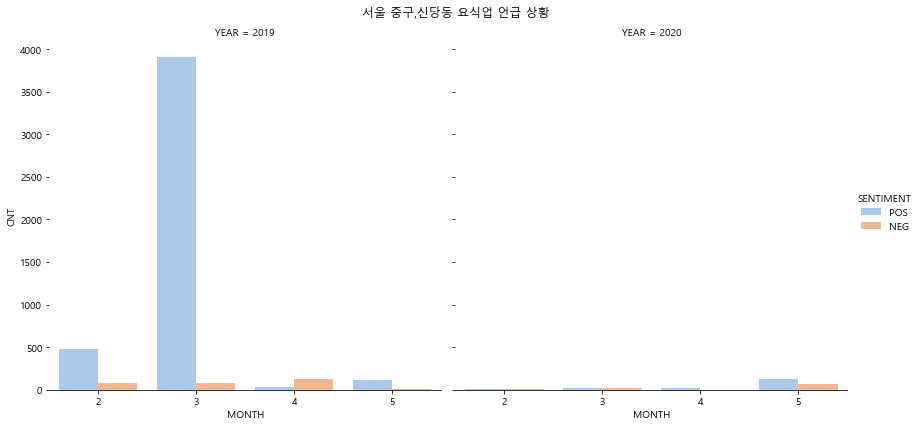

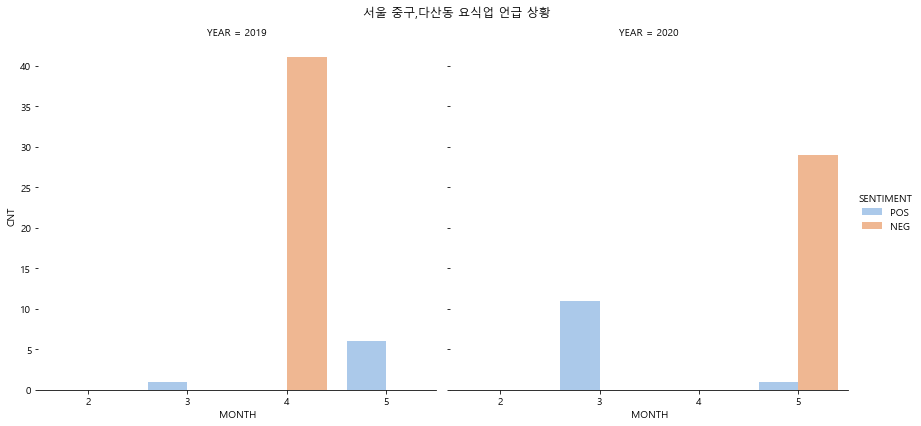

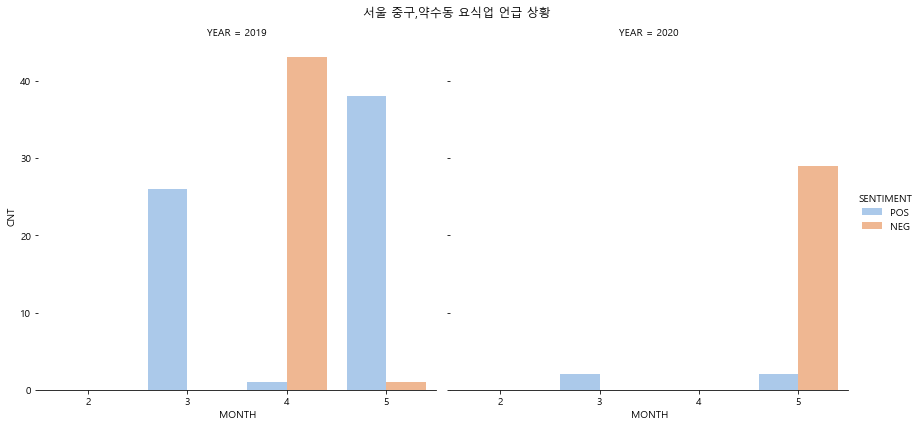

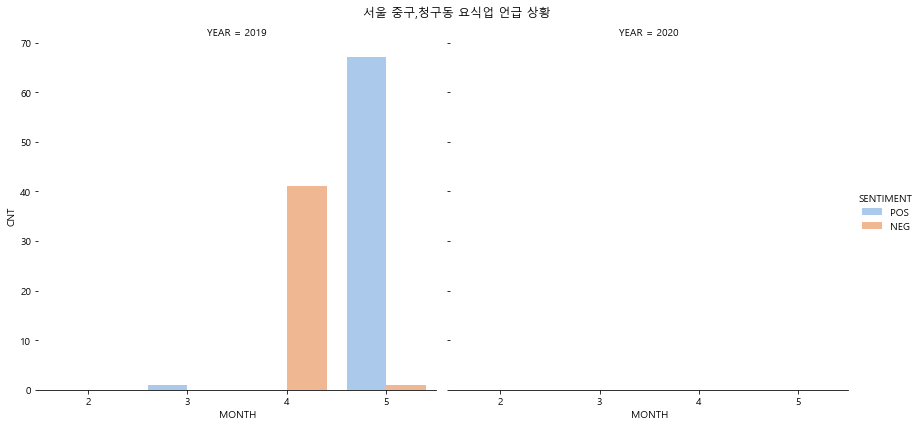

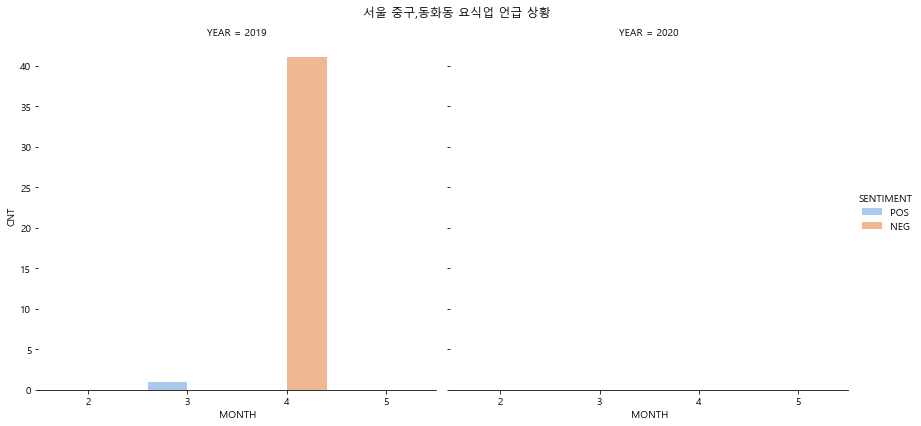

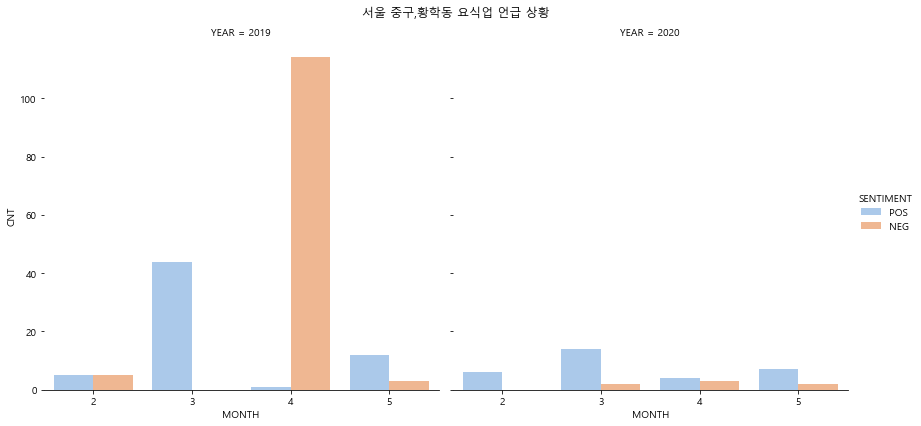

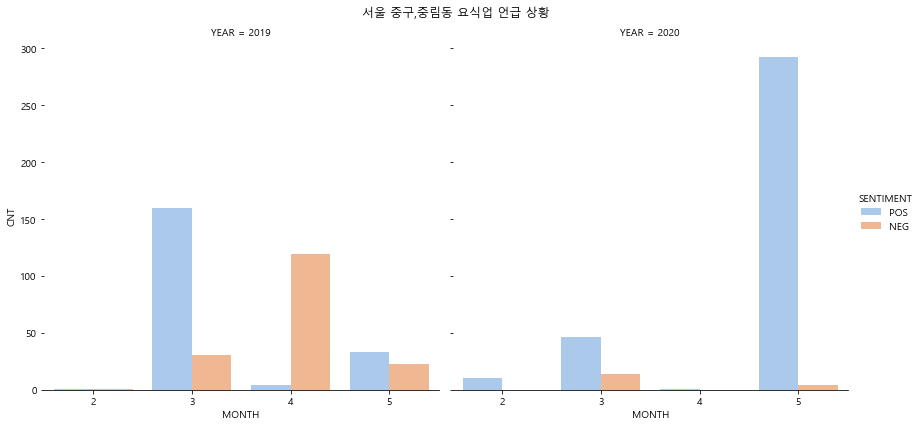

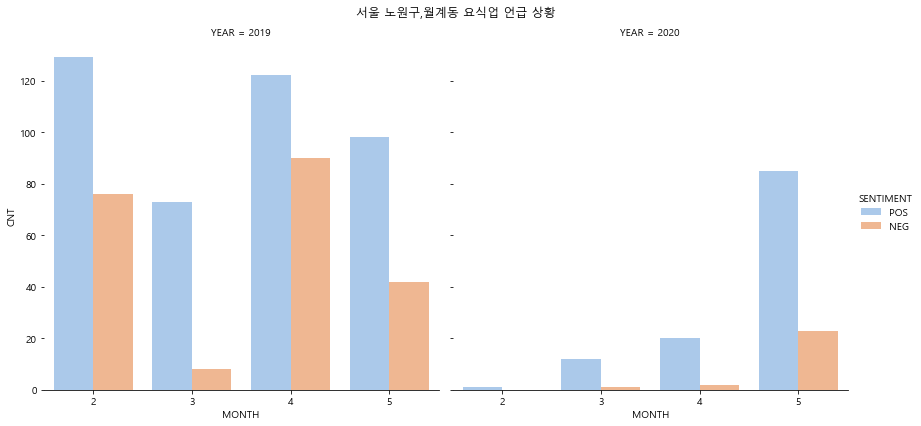

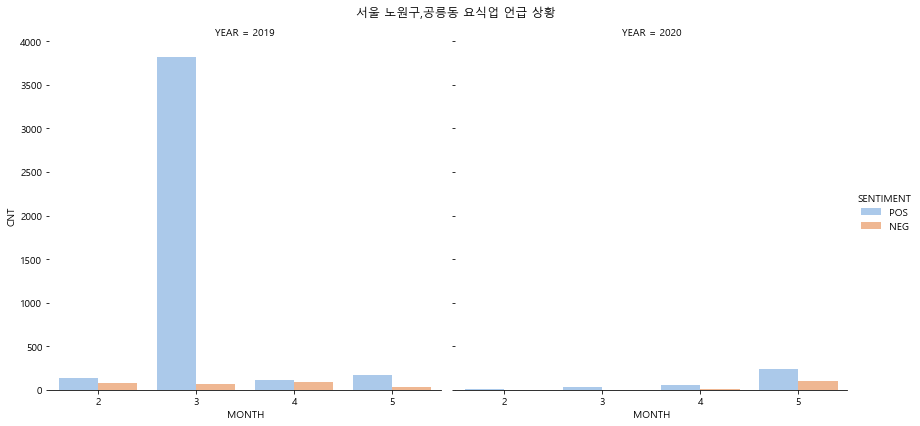

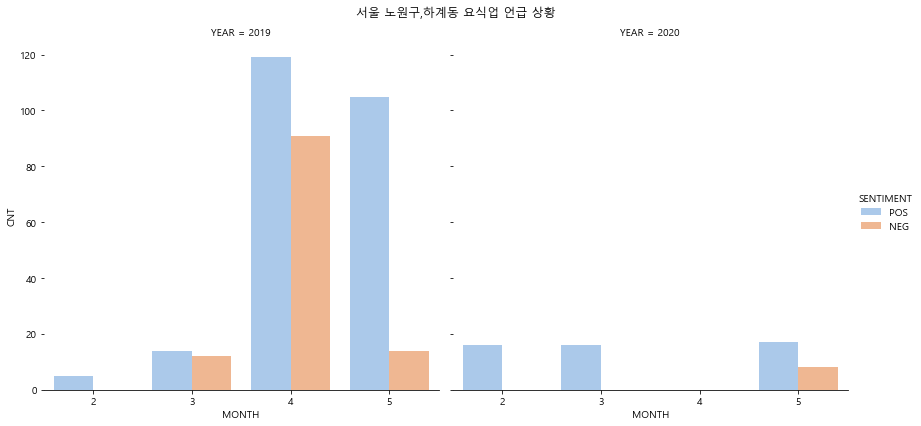

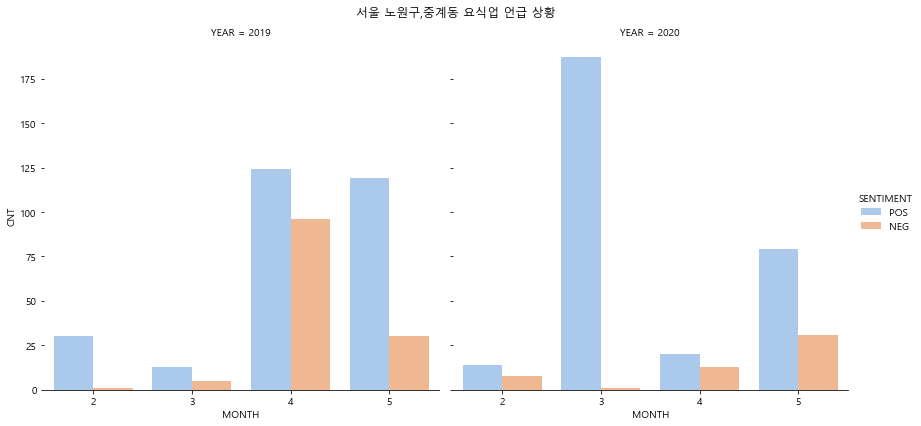

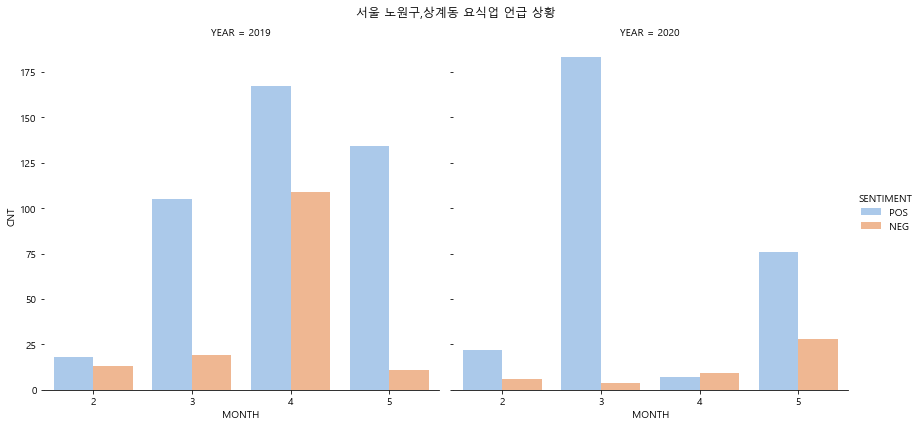

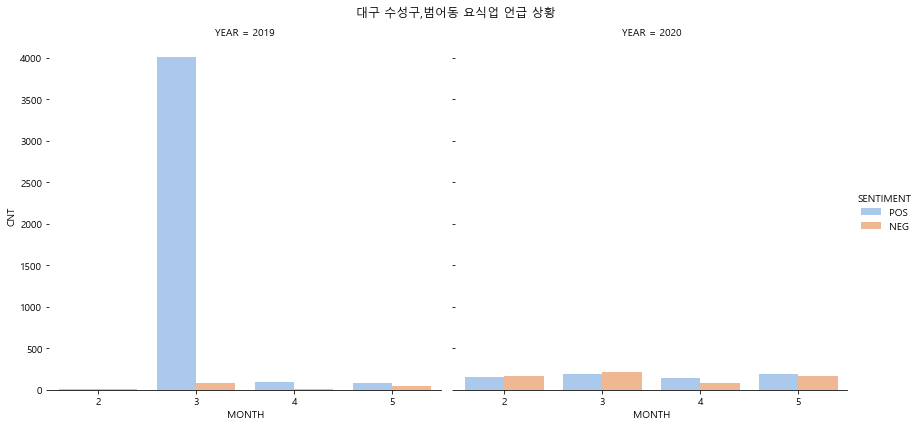

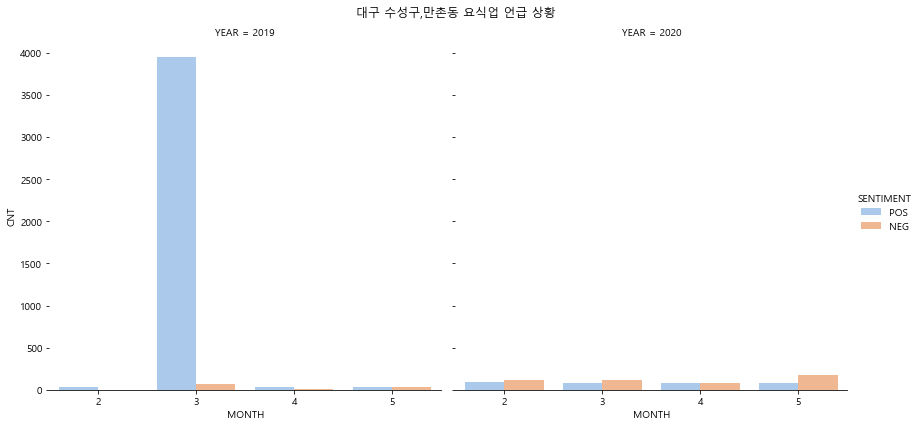

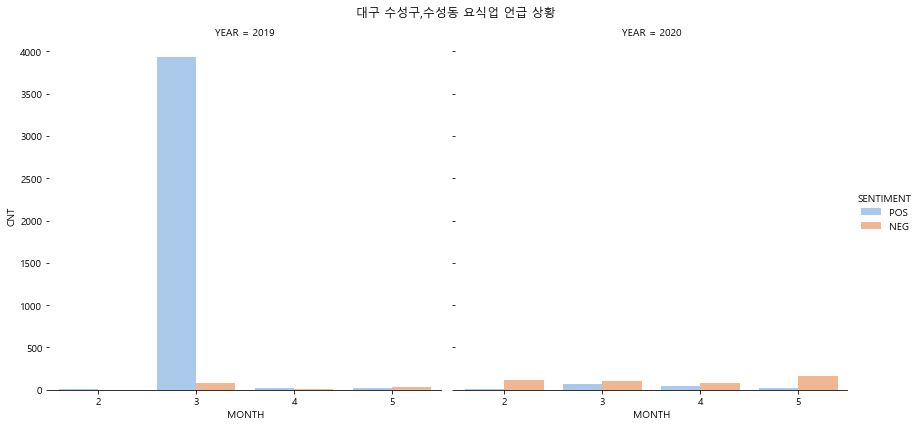

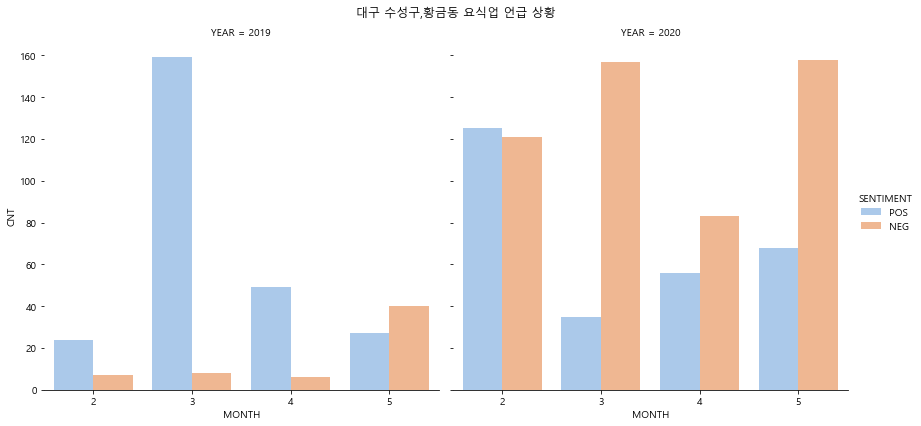

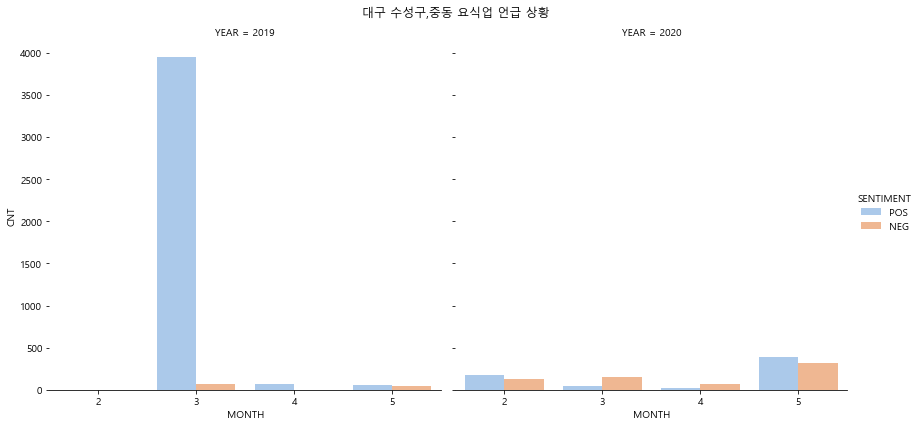

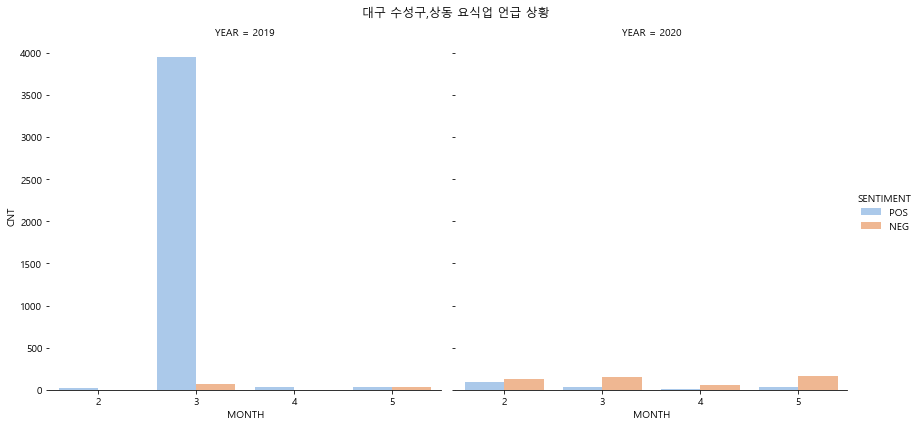

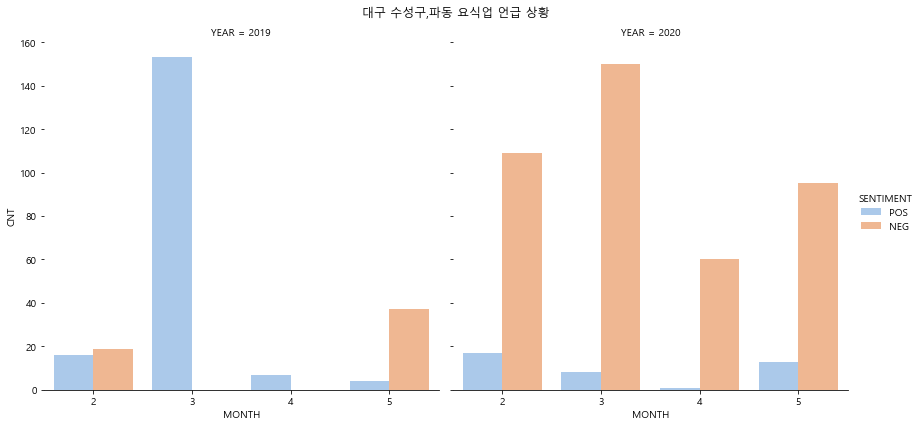

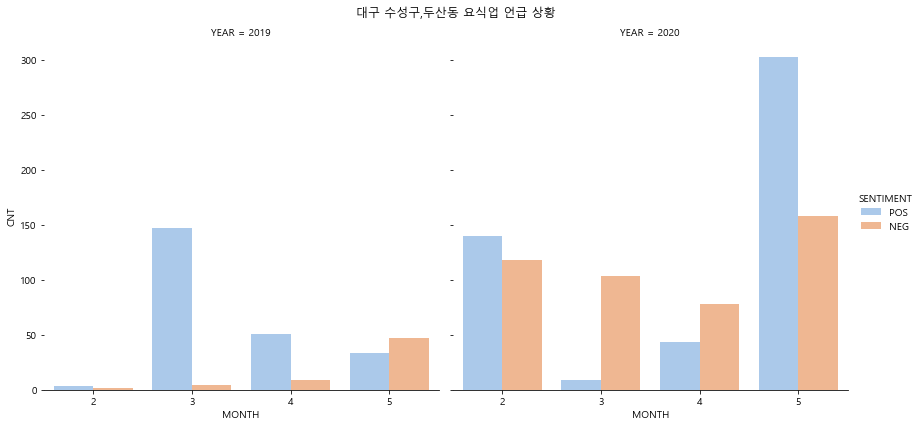

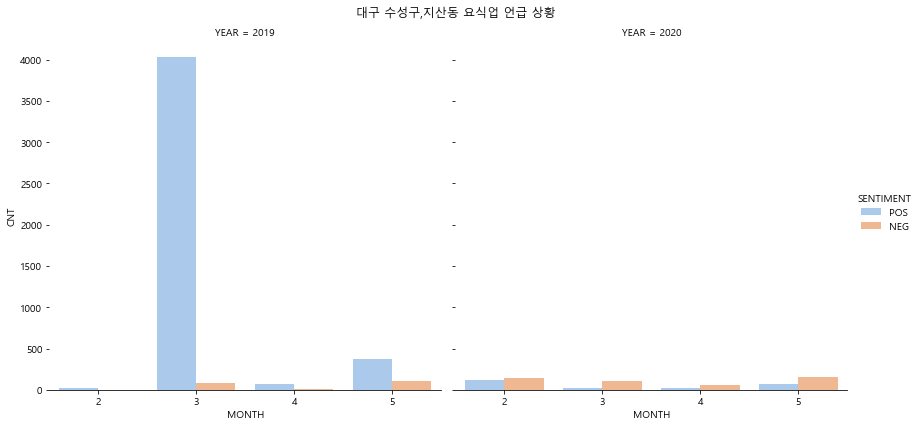

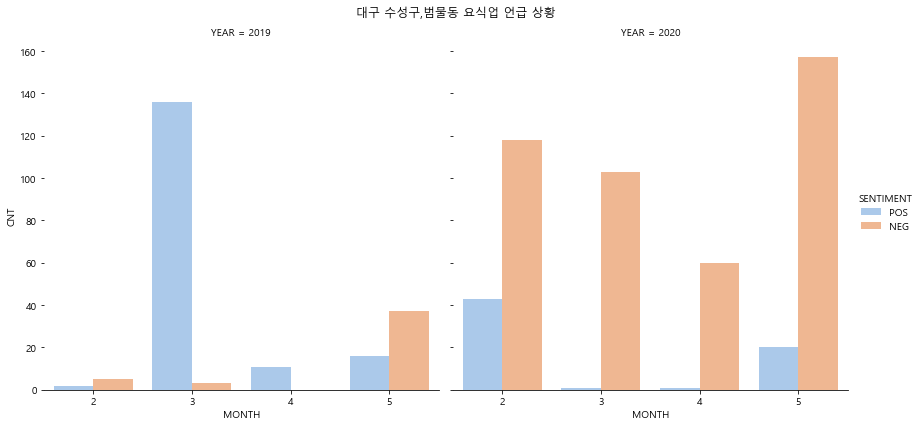

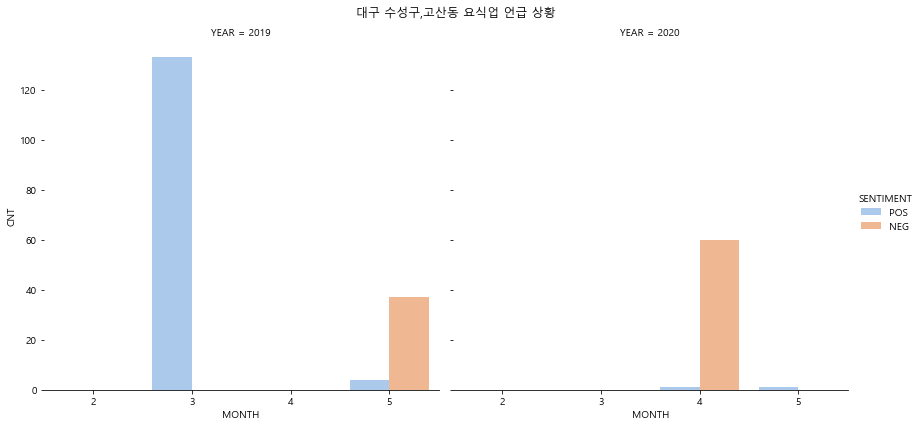

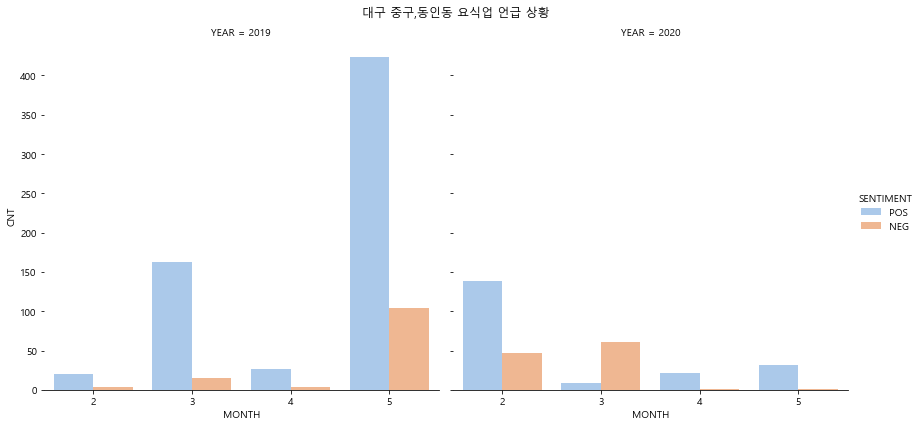

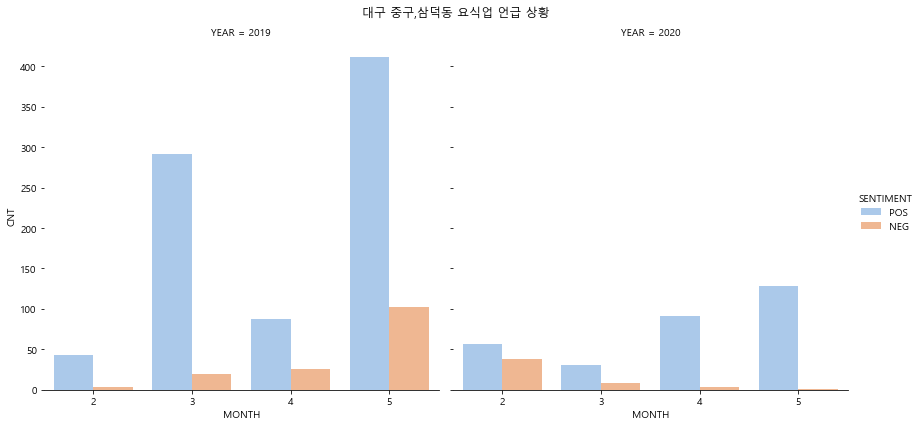

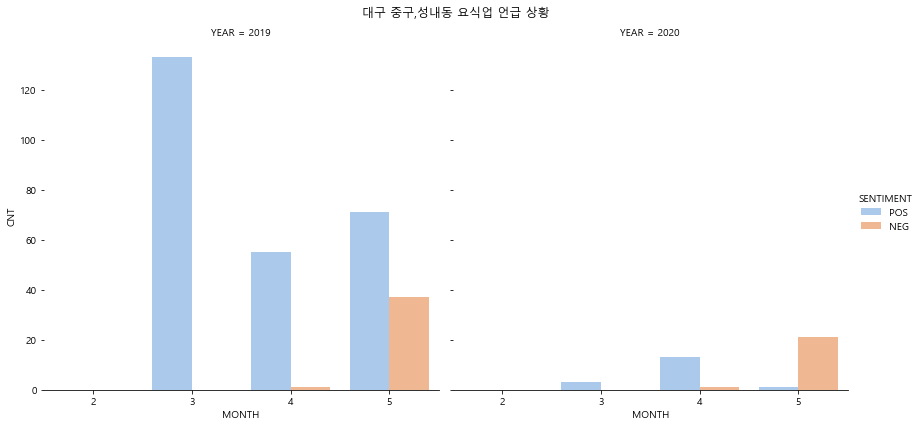

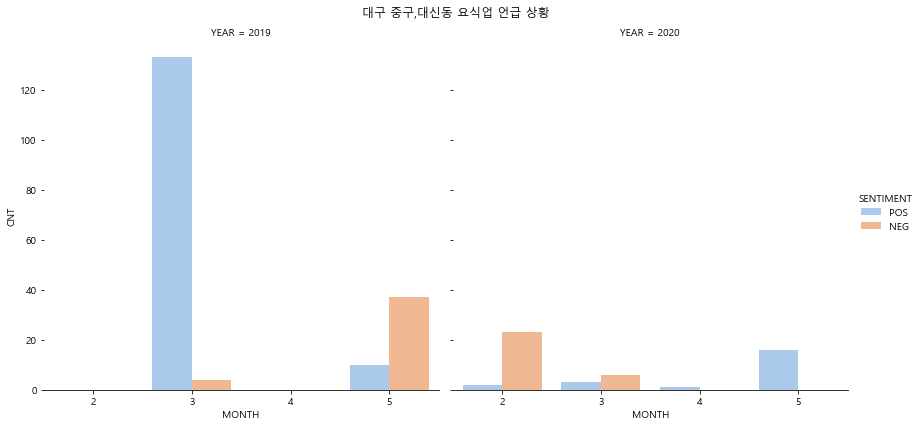

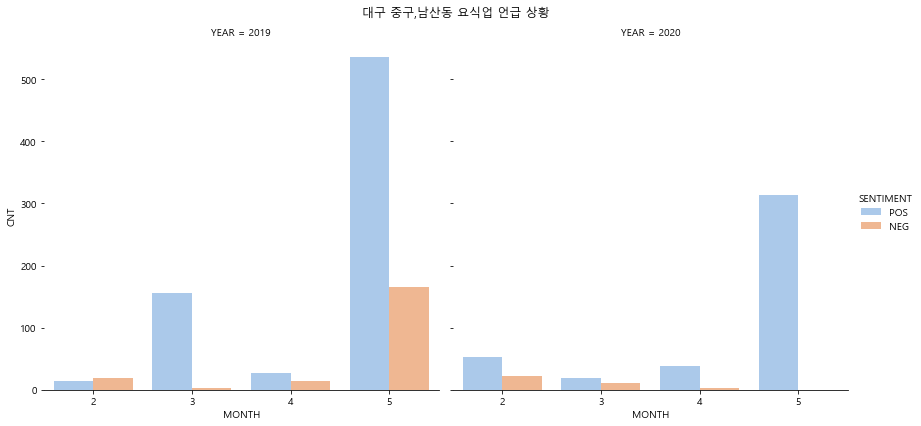

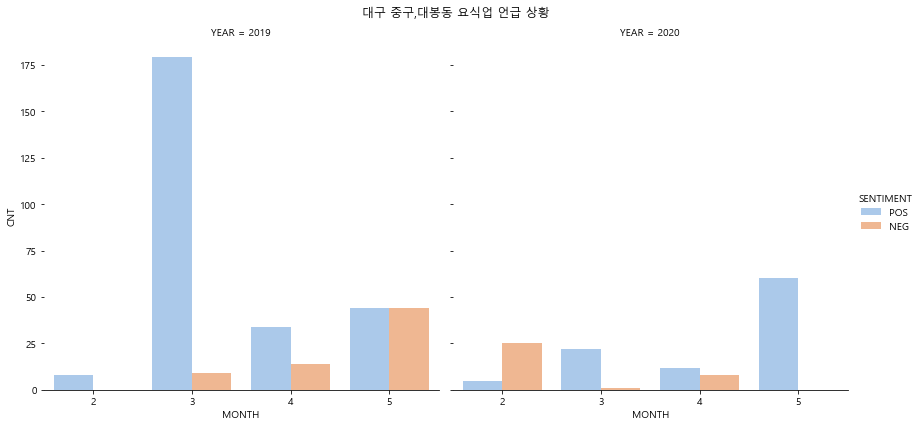

In [55]:
## 행정동별 요식업 언급 현황(2019/2020) => GROUPING 가능
j0 = f.iloc[:,-6:].query('UP == "UP6"').set_index('UP').reset_index(drop=True)
gd = j0['GU_DONG'].unique()

for d in gd:
    temp = j0.loc[j0['GU_DONG']==d, :]
    j = sns.catplot(data=temp, x='MONTH', y='CNT', size=6, kind='bar', hue='SENTIMENT', col='YEAR', col_wrap=2)
    j.despine(left=True)
    plt.subplots_adjust(top=0.9)
    j.fig.suptitle(d + ' 요식업 언급 상황')

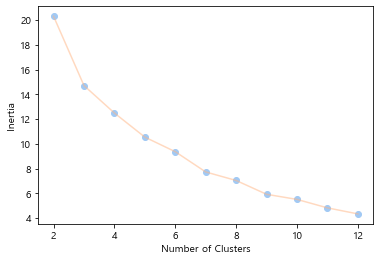

<Figure size 720x720 with 0 Axes>

In [56]:
up6 = pd.pivot_table(pg.query('UP == "UP6"'),index=['GU_DONG'],columns=['Y_M'],values=['per'])

from sklearn.cluster import KMeans

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(up6.iloc[:,])
    inertia.append(kmeans.inertia_) #Inertia can be recognized as a measure of how internally coherent clusters are.

plt.plot(n_clusters, inertia, 'o')
plt.plot(n_clusters, inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [57]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(up6)
print(pd.Series(kmeans.labels_).value_counts())

0    10
2     9
3     8
5     3
1     3
4     2
dtype: int64


In [58]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(up6.iloc[:,])
up6.columns = [' '.join(col).strip() for col in up6.columns.values]
up6['cls'] = kmeans.labels_
up6_per = pd.merge(up6.reset_index()[['GU_DONG','cls']],j0,on='GU_DONG')

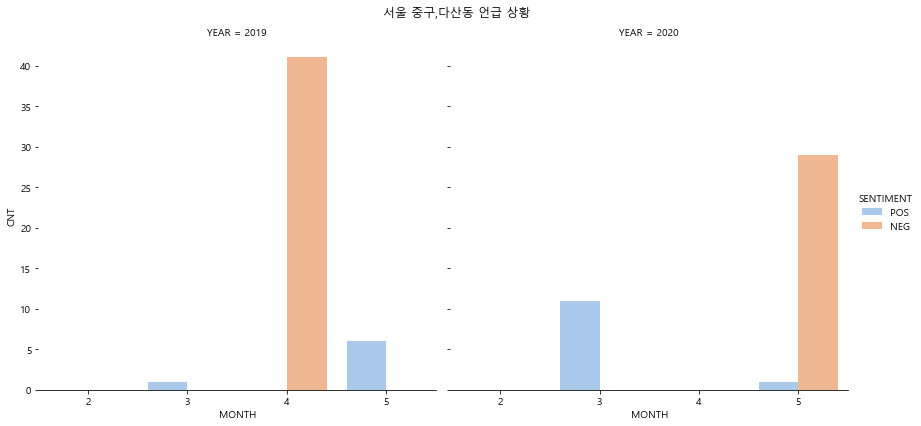

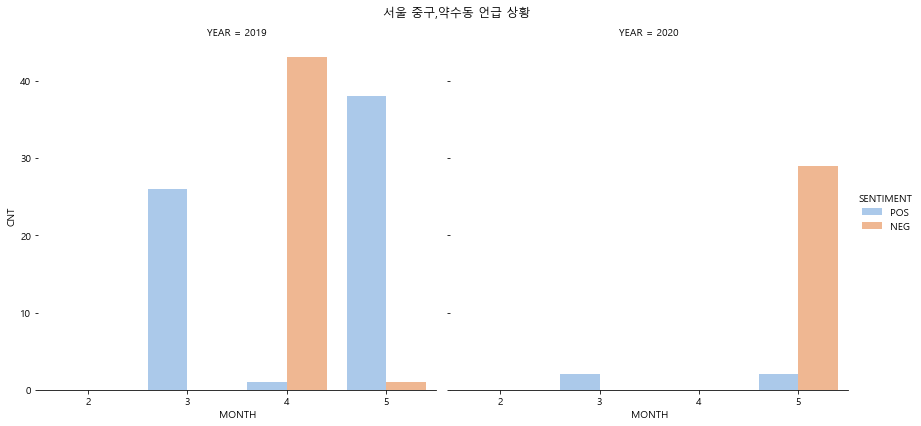

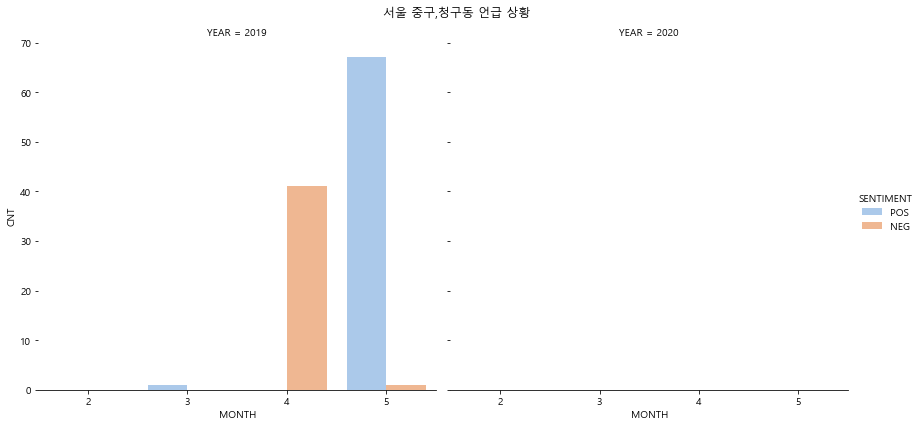

In [59]:
UPcluster(up6_per,1) #예외도 있지만 나쁘지 않음

In [61]:
up1_per

GU_DONG  cls CNT  MONTH  YEAR SENTIMENT
0    대구 수성구,고산동    0   0      2  2019       POS
1    대구 수성구,고산동    0   1      3  2019       POS
2    대구 수성구,고산동    0   0      4  2019       POS
3    대구 수성구,고산동    0  77      5  2019       POS
4    대구 수성구,고산동    0   0      2  2020       POS
..          ...  ...  ..    ...   ...       ...
555   서울 중구,회현동    1   0      5  2019       NEG
556   서울 중구,회현동    1   0      2  2020       NEG
557   서울 중구,회현동    1   0      3  2020       NEG
558   서울 중구,회현동    1   0      4  2020       NEG
559   서울 중구,회현동    1  74      5  2020       NEG

[560 rows x 6 columns]

## 화제어
-활용방안 : 추가 데이터(ex - 인스타그램 : 기간이 동일한 데이터를 모을 수 x => 비교하기 어려움) 수집 / 주어진 데이터 oversampling => 데이터 수집 후 word2vec으로 군집화

## 가설 1. 